In [1]:
#!pip install torch transformers
!pip install scispacy
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz
!pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.1/en_ner_bc5cdr_md-0.5.1.tar.gz
#!pip install transformers torch pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 515.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.1/71.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.3/243.3 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 24.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_sci_sm: filename=en_core_sci_sm-0.5.4-py3-none-any.whl size=14778487 sha256=ac9097ba76ee90dd24bac4982c80570ac12ad2cc2ae46ec214e5c063d91ccbcc
  Stored in directory: /root/.cache/pip/wheels/7f/29/44/dd461872b8547b8e8007f03418fb8061f5c05c71447982bcff
Successfully built en_core_sci_sm
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.2/120.2 MB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.

In [2]:
import torch
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline
import requests
import time
import random
import csv
import datetime
from bs4 import BeautifulSoup
import pandas as pd
from urllib.parse import urlparse
import os

import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from google.colab import drive
import scispacy
import spacy
import string
import numpy as np


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
#load disease_data csv file

from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/MyDrive/Omdena/NLP in drug prediction/merge_demo_amos_v2.csv')

Mounted at /content/gdrive


In [4]:
#@title data cleaning function
def clean_text1(df):
  ############Standardize names in 'Disease name'###########
  disease_mapping = {
      "ovulation symptoms": "ovulation symptoms",
    "atrial fibrillation": "atrial fibrillation",
    "atrial fibrillation (afib)": "atrial fibrillation",
    "atrial fibrillation (afib) warning symptoms": "atrial fibrillation",
    "aromatic l-amino acid decarboxylase deficiency": "aromatic l-amino acid decarboxylase deficiency",
    "cystitis": "cystitis",
    "cystitis, acute bacterial": "cystitis",
    "cystitis, interstitial": "cystitis",
    "cystitis, noninfectious": "cystitis",
    "aortic aneurysm": "aortic aneurysm",
    "abdominal binder": "abdominal binder",
    "abdominal bloating": "abdominal bloating",
    "abdominal distension": "abdominal distension",
    "abdominal pain": "abdominal pain",
    "abdominal pain in children": "abdominal pain in children",
    "abdominal pain in pregnancy": "abdominal pain in pregnancy",
    "abdominal radiological procedure": "abdominal radiological procedure",
    "abdominopelvic fistulas": "abdominopelvic fistulas",
    "abdominoplasty": "abdominoplasty",
    "abg (arterial blood gas) test": "abg (arterial blood gas) test",
    "abnormal (dysfunctional) uterine bleeding": "abnormal (dysfunctional) uterine bleeding",
    "abnormal electrocardiogram": "abnormal electrocardiogram",
    "abnormal glucose tolerance": "abnormal glucose tolerance",
    "abnormal uterine bleeding": "abnormal uterine bleeding",
    "abortion": "abortion",
    "abortion induction in ectopic pregnancy": "abortion induction in ectopic pregnancy",
    "above the knee amputation": "above the knee amputation",
    "abrasion": "abrasion",
    "abrasion in children": "abrasion in children",
    "abscess": "abscess",
    "abscess, brain": "abscess",
    "abscess follow-up": "abscess follow-up",
    "abscess in children": "abscess in children",
    "abscess incision and drainage": "abscess incision and drainage",
    "abscessed tooth": "abscessed tooth",
    "absence seizure": "absence seizure",
    "abuse of alcohol": "abuse of alcohol",
    "abvd chemo regimen": "abvd chemo regimen",
    "acanthamoeba keratitis": "acanthamoeba keratitis",
    "acanthosis nigricans": "acanthosis nigricans",
    "acanthosis nigricans in children": "acanthosis nigricans in children",
    "accelerating angina": "accelerating angina",
    "accidental bowel leakage": "accidental bowel leakage",
    "acetaminophen overdose": "acetaminophen overdose",
    "acetaminophen toxicity": "acetaminophen toxicity",
    "achalasia": "achalasia",
    "achilles tendinitis": "achilles tendinitis",
    "achilles tendon lengthening": "achilles tendon lengthening",
    "achilles tendon repair": "achilles tendon repair",
    "achilles tendon rupture": "achilles tendon rupture",
    "achlorhydria": "achlorhydria",
    "achondroplasia": "achondroplasia",
    "acid reflux": "acid reflux",
    "acid sphingomyelinase deficiency": "acid sphingomyelinase deficiency",
    "acidosis": "acidosis",
    "acidosis, lactic": "acidosis",
    "acidosis, respiratory": "acidosis",
    "acinetobacter pneumonia": "acinetobacter pneumonia",
    "acl injury": "acl injury",
    "acl injury in children": "acl injury in children",
    "acl tear": "acl tear",
    "acne": "acne",
    "acne rosacea": "acne rosacea",
    "acne vulgaris": "acne vulgaris",
    "acoustic neuroma": "acoustic neuroma",
    "acoustic neuroma microsurgery": "acoustic neuroma microsurgery",
    "acquired blepharoptosis": "acquired blepharoptosis",
    "acquired cytomegalovirus": "acquired cytomegalovirus",
    "acquired hypothyroidism in children": "acquired hypothyroidism in children",
    "acquired immune deficiency syndrome": "acquired immune deficiency syndrome",
    "acquired immunodeficiency syndrome": "acquired immunodeficiency syndrome",
    "acquired methemoglobinemia": "acquired methemoglobinemia",
    "acquired von willebrand syndrome": "acquired von willebrand syndrome",
    "acromegaly": "acromegaly",
    "acromelalgia": "acromelalgia",
    "acromioclavicular joint reconstruction": "acromioclavicular joint reconstruction",
    "acromioclavicular separation": "acromioclavicular separation",
    "actinic keratosis": "actinic keratosis",
    "actinomycosis": "actinomycosis",
    "activated charcoal": "activated charcoal",
    "activated phosphoinositide 3-kinase delta syndrome": "activated phosphoinositide 3-kinase delta syndrome",
    "activated pi3k-delta syndrome": "activated pi3k-delta syndrome",
    "active range of motion exercises": "active range of motion exercises",
    "acupuncture": "acupuncture",
    "acute abdomen": "acute abdomen",
    "acute abdominal pain": "acute abdominal pain",
    "acute abdominal pain in children": "acute abdominal pain in children",
    "acute alcohol intoxication": "acute alcohol intoxication",
    "acute asthma": "acute asthma",
    "acute blood loss anemia": "acute blood loss anemia",
    "acute bronchitis": "acute bronchitis",
    "acute bronchitis in children": "acute bronchitis in children",
    "acute chest syndrome": "acute chest syndrome",
    "acute childhood leukemia": "acute childhood leukemia",
    "acute cholecystitis": "acute cholecystitis",
    "acute coronary syndrome": "acute coronary syndrome",
    "acute coronary syndrome, prophylaxis": "acute coronary syndrome",
    "acute cough": "acute cough",
    "acute cough in children": "acute cough in children",
    "acute delirium": "acute delirium",
    "acute dental trauma": "acute dental trauma",
    "acute dental trauma in children": "acute dental trauma in children",
    "acute diarrhea": "acute diarrhea",
    "acute diarrhea in children": "acute diarrhea in children",
    "acute glomerulonephritis": "acute glomerulonephritis",
    "acute graft versus host disease": "acute graft versus host disease",
    "acute granulocytic leukemia": "acute granulocytic leukemia",
    "acute headache": "acute headache",
    "acute headache in children": "acute headache in children",
    "acute hypothermia": "acute hypothermia",
    "acute intermittent porphyria": "acute intermittent porphyria",
    "acute kidney injury": "acute kidney injury",
    "acute liver failure": "acute liver failure",
    "acute low back pain": "acute low back pain",
    "acute lymphoblastic leukemia": "acute lymphoblastic leukemia",
    "acute lymphocytic leukemia": "acute lymphocytic leukemia",
    "acute lymphocytic leukemia in children": "acute lymphocytic leukemia in children",
    "acute middle ear infection": "acute middle ear infection",
    "acute myeloblastic leukemia": "acute myeloblastic leukemia",
    "acute myelogenous leukemia": "acute myelogenous leukemia",
    "acute myeloid leukemia": "acute myeloid leukemia",
    "acute nausea and vomiting": "acute nausea and vomiting",
    "acute neck pain": "acute neck pain",
    "acute nonlymphocytic leukemia": "acute nonlymphocytic leukemia",
    "acute otitis externa": "acute otitis externa",
    "acute paraphimosis": "acute paraphimosis",
    "acute pericarditis": "acute pericarditis",
    "acute porphyria": "acute porphyria",
    "acute post-hemorrhagic anemia": "acute post-hemorrhagic anemia",
    "acute promyelocytic leukemia": "acute promyelocytic leukemia",
    "acute rash": "acute rash",
    "acute respiratory distress syndrome": "acute respiratory distress syndrome",
    "acute respiratory failure": "acute respiratory failure",
    "acute sinusitis": "acute sinusitis",
    "acute stress reaction": "acute stress reaction",
    "acute urinary retention in women": "acute urinary retention in women",
    "acute wounds": "acute wounds",
    "ada deficiency": "ada deficiency",
    "adams-stokes syndrome": "adams-stokes syndrome",
    "add (adhd)": "add (adhd)",
    "addison disease": "addison disease",
    "addison disease in children": "addison disease in children",
    "addison's disease": "addison's disease",
    "adenitis": "adenitis",
    "adenocarcinoma of renal cells": "adenocarcinoma of renal cells",
    "adenoidectomy": "adenoidectomy",
    "adenoidectomy in children": "adenoidectomy in children",
    "adenomyosis": "adenomyosis",
    "adenosine deaminase deficiency": "adenosine deaminase deficiency",
    "adenovirus prophylaxis": "adenovirus prophylaxis",
    "adhd": "adhd",
    "adhd in adolescents": "adhd in adolescents",
    "adhd in adults": "adhd in adults",
    "adhd in children": "adhd in children",
    "adhd in teens": "adhd in teens",
    "adhesions, gastrointestinal": "adhesions, gastrointestinal",
    "adhesive arachnoiditis": "adhesive arachnoiditis",
    "adhesive capsulitis": "adhesive capsulitis",
    "adiposis dolorosa": "adiposis dolorosa",
    "adjunct to antibiotic therapy": "adjunct to antibiotic therapy",
    "adjustable gastric band removal": "adjustable gastric band removal",
    "adjustable gastric band surgery": "adjustable gastric band surgery",
    "adjustment disorders": "adjustment disorders",
    "adpkd (polycystic kidney disease)": "adpkd (polycystic kidney disease)",
    "adrenal cortical carcinoma": "adrenal cortical carcinoma",
    "adrenal crisis, acute": "adrenal crisis, acute",
    "adrenal failure": "adrenal failure",
    "adrenal gland biopsy": "adrenal gland biopsy",
    "adrenal gland disorders": "adrenal gland disorders",
    "adrenal hemorrhage": "adrenal hemorrhage",
    "adrenal insufficiency": "adrenal insufficiency",
    "adrenal insufficiency, exogenous": "adrenal insufficiency",
    "adrenal insufficiency in children": "adrenal insufficiency in children",
    "adrenal pheochromocytoma": "adrenal pheochromocytoma",
    "adrenal tuberculosis": "adrenal tuberculosis",
    "adrenal tumor": "adrenal tumor",
    "adrenocortical insufficiency": "adrenocortical insufficiency",
    "adrenogenital syndrome": "adrenogenital syndrome",
    "adult attention-deficit/hyperactivity disorder (adhd)": "adult attention-deficit/hyperactivity disorder (adhd)",
    "adult congenital heart disease": "adult congenital heart disease",
    "adult cpr steps": "adult cpr steps",
    "adult human growth hormone deficiency": "adult human growth hormone deficiency",
    "adult male circumcision": "adult male circumcision",
    "adult overdose": "adult overdose",
    "adult soft tissue sarcoma": "adult soft tissue sarcoma",
    "adult still disease": "adult still disease",
    "adult still's disease": "adult still's disease",
    "adult x-ray": "adult x-ray",
    "adult-onset asthma": "adult-onset asthma",
    "adult-onset still disease": "adult-onset still disease",
    "advance directives": "advance directives",
    "adverse drug reaction": "adverse drug reaction",
    "af (atrial fibrillation)": "af (atrial fibrillation)",
    "afib": "afib",
    "african trypanosomiasis": "african trypanosomiasis",
    "age spots": "age spots",
    "age-related blurry near vision": "age-related blurry near vision",
    "age-related hearing loss": "age-related hearing loss",
    "aggressive behavior": "aggressive behavior",
    "aggressive fibromatosis": "aggressive fibromatosis",
    "agitated state": "agitated state",
    "agitation": "agitation",
    "agnogenic myeloid metaplasia": "agnogenic myeloid metaplasia",
    "agoraphobia": "agoraphobia",
    "agranulocytosis": "agranulocytosis",
    "aids": "aids",
    "aids (acquired immunodeficiency syndrome)": "aids",
    "aids (hiv infection)": "aids",
    "aids related anorexia": "aids related anorexia",
    "aids related wasting": "aids related wasting",
    "aids wasting": "aids wasting",
    "air travel with oxygen": "air travel with oxygen",
    "airbag injury": "airbag injury",
    "airborne precautions": "airborne precautions",
    "akathisia": "akathisia",
    "albinism": "albinism",
    "alcl alk-positive": "alcl alk-positive",
    "alcohol and teens": "alcohol and teens",
    "alcohol dependence": "alcohol dependence",
    "alcohol hepatitis": "alcohol hepatitis",
    "alcohol intoxication": "alcohol intoxication",
    "alcohol poisoning": "alcohol poisoning",
    "alcohol use disorder": "alcohol use disorder",
    "alcohol withdrawal": "alcohol withdrawal",
    "alcohol withdrawal delirium": "alcohol withdrawal delirium",
    "alcohol-induced sleep disorder": "alcohol-induced sleep disorder",
    "alcoholic cardiomyopathy": "alcoholic cardiomyopathy",
    "alcoholic cirrhosis": "alcoholic cirrhosis",
    "alcoholic dementia": "alcoholic dementia",
    "alcoholic fatty liver disease": "alcoholic fatty liver disease",
    "alcoholic gastritis": "alcoholic gastritis",
    "alcoholic gastritis with hemorrhage": "alcoholic gastritis with hemorrhage",
    "alcoholic hepatitis": "alcoholic hepatitis",
    "alcoholic liver damage": "alcoholic liver damage",
    "alcoholic liver disease": "alcoholic liver disease",
    "alcoholic psychosis": "alcoholic psychosis",
    "alcoholism": "alcoholism",
    "alcoholism and alcohol abuse": "alcoholism and alcohol abuse",
    "alk-positive alcl": "alk-positive alcl",
    "alkaline vagina": "alkaline vagina",
    "alkalosis": "alkalosis",
    "alkalosis, respiratory": "alkalosis",
    "alkylating agent cystitis": "alkylating agent cystitis",
    "all leukemia": "all leukemia",
    "allergic asthma": "allergic asthma",
    "allergic cascade": "allergic cascade",
    "allergic colitis": "allergic colitis",
    "allergic conjunctivitis": "allergic conjunctivitis",
    "allergic dermatitis": "allergic dermatitis",
    "allergic drug reaction": "allergic drug reaction",
    "allergic esophagitis": "allergic esophagitis",
    "allergic purpura": "allergic purpura",
    "allergic reactions": "allergic reactions",
    "allergic rhinitis": "allergic rhinitis",
    "allergic rhinitis in children": "allergic rhinitis in children",
    "allergic urticaria": "allergic urticaria",
    "allergies": "allergies",
    "allergies in children": "allergies in children",
    "allergy (allergies)": "allergy (allergies)",
    "allergy testing": "allergy testing",
    "allergy testing in children": "allergy testing in children",
    "allergy treatment begins at home": "allergy treatment begins at home",
    "alopecia": "alopecia",
    "alopecia areata": "alopecia areata",
    "alpha thalassemia": "alpha thalassemia",
    "alport syndrome": "alport syndrome",
    "als (amyotrophic lateral sclerosis)": "als (amyotrophic lateral sclerosis)",
    "altered consciousness": "altered consciousness",
    "altered mental status": "altered mental status",
    "alternative treatment (cam) for ms": "alternative treatment (cam) for ms",
    "aluminum toxicity": "aluminum toxicity",
    "alveolar echinococcosis": "alveolar echinococcosis",
    "alveolar rhabdomyosarcoma": "alveolar rhabdomyosarcoma",
    "alveolar soft part sarcoma": "alveolar soft part sarcoma",
    "alzheimer disease": "alzheimer disease",
    "alzheimer's disease": "alzheimer's disease",
    "amalgam and composite fillings": "amalgam and composite fillings",
    "amblyopia": "amblyopia",
    "amblyopia in children": "amblyopia in children",
    "ambulatory electroencephalogram": "ambulatory electroencephalogram",
    "ambulatory electroencephalogram in children": "ambulatory electroencephalogram in children",
    "amebiasis": "amebiasis",
    "amebiasis (entamoeba histolytica) infection": "amebiasis",
    "amebic dysentery": "amebic dysentery",
    "amebic liver abscess": "amebic liver abscess",
    "ameloblastoma": "ameloblastoma",
    "amenorrhea": "amenorrhea",
    "amenorrhea, primary": "amenorrhea",
    "amenorrhoea, secondary": "amenorrhoea, secondary",
    "american trypanosomiasis": "american trypanosomiasis",
    "aml (acute myeloid leukemia)": "aml (acute myeloid leukemia)",
    "amnesia": "amnesia",
    "amniocentesis": "amniocentesis",
    "amoebiasis": "amoebiasis",
    "amoebic infection": "amoebic infection",
    "ampullary cancer": "ampullary cancer",
    "amyloid cardiomyopathy": "amyloid cardiomyopathy",
    "amyloidosis": "amyloidosis",
    "amyloidosis, primary": "amyloidosis",
    "amyotrophic lateral sclerosis": "amyotrophic lateral sclerosis",
    "amyotrophic lateral sclerosis (als)": "amyotrophic lateral sclerosis",
    "anabolic steroid abuse": "anabolic steroid abuse",
    "anaerobic pneumonia": "anaerobic pneumonia",
    "anal cancer": "anal cancer",
    "anal fissure": "anal fissure",
    "anal fissure and fistula": "anal fissure and fistula",
    "anal fistula": "anal fistula",
    "anal fulguration": "anal fulguration",
    "anal incontinence": "anal incontinence",
    "anal itching": "anal itching",
    "anal itching (pruritus ani)": "anal itching",
    "anaphylactic reaction": "anaphylactic reaction",
    "anaphylactic shock": "anaphylactic shock",
    "anaphylaxis": "anaphylaxis",
    "anaphylaxis (severe allergic reaction)": "anaphylaxis",
    "anaphylaxis in children": "anaphylaxis in children",
    "anaplastic astrocytoma": "anaplastic astrocytoma",
    "anaplastic oligodendroglioma": "anaplastic oligodendroglioma",
    "anaplastic thyroid cancer": "anaplastic thyroid cancer",
    "ancylostoma": "ancylostoma",
    "ancylostoma braziliense": "ancylostoma braziliense",
    "ancylostomiasis": "ancylostomiasis",
    "anders disease": "anders disease",
    "androgenetic alopecia": "androgenetic alopecia",
    "anemia": "anemia",
    "anemia, chemotherapy induced": "anemia",
    "anemia, drug induced": "anemia",
    "anemia, drug-induced immune hemolytic": "anemia",
    "anemia, folate deficiency": "anemia",
    "anemia, iron deficiency": "anemia",
    "anemia, megaloblastic": "anemia",
    "anemia, posthemorrhagic": "anemia",
    "anemia, sickle cell": "anemia",
    "anemia associated with chronic disease": "anemia associated with chronic disease",
    "anemia associated with ckd": "anemia associated with ckd",
    "anemia associated with folate deficiency": "anemia associated with folate deficiency",
    "anemia associated with iron deficiency": "anemia associated with iron deficiency",
    "anemia associated with prematurity": "anemia associated with prematurity",
    "anemia associated with zidovudine": "anemia associated with zidovudine",
    "anemia due to ckd": "anemia due to ckd",
    "anemia of chronic disease": "anemia of chronic disease",
    "anemia of prematurity": "anemia of prematurity",
    "anemia of unspecified nutritional deficiency": "anemia of unspecified nutritional deficiency",
    "anemia prior to surgery": "anemia prior to surgery",
    "anesthesia": "anesthesia",
    "anesthetic adjunct": "anesthetic adjunct",
    "aneurysm": "aneurysm",
    "aneurysm, brain": "aneurysm",
    "aneurysm, cerebral": "aneurysm",
    "angelman syndrome": "angelman syndrome",
    "angina": "angina",
    "angina, chronic": "angina",
    "angina, stable": "angina",
    "angina, unstable": "angina",
    "angina pectoris": "angina pectoris",
    "angina pectoris prophylaxis": "angina pectoris prophylaxis",
    "angina symptoms": "angina symptoms",
    "angio-seal": "angio-seal",
    "angioblastoma": "angioblastoma",
    "angiocardiography": "angiocardiography",
    "angiodysplasia of the gastrointestinal tract": "angiodysplasia of the gastrointestinal tract",
    "angioedema": "angioedema",
    "angiofibroma": "angiofibroma",
    "angiogram": "angiogram",
    "angiography": "angiography",
    "angiography - magnetic resonance": "angiography - magnetic resonance",
    "angiography - peripheral": "angiography - peripheral",
    "angiomyolipoma": "angiomyolipoma",
    "angioneurotic edema": "angioneurotic edema",
    "angiostrongylosis": "angiostrongylosis",
    "angular cheilitis": "angular cheilitis",
    "angular stomatitis": "angular stomatitis",
    "animal bite": "animal bite",
    "ankle arthroscopy": "ankle arthroscopy",
    "ankle arthrotomy": "ankle arthrotomy",
    "ankle bursitis": "ankle bursitis",
    "ankle dislocation": "ankle dislocation",
    "ankle exercises": "ankle exercises",
    "ankle fracture": "ankle fracture",
    "ankle fracture in children": "ankle fracture in children",
    "ankle pain (tendonitis)": "ankle pain (tendonitis)",
    "ankle sprain": "ankle sprain",
    "ankle sprain in children": "ankle sprain in children",
    "ankle stirrup splint": "ankle stirrup splint",
    "ankle strain": "ankle strain",
    "ankle swelling": "ankle swelling",
    "ankyloglossia": "ankyloglossia",
    "ankylosing hyperostosis": "ankylosing hyperostosis",
    "ankylosing spondylitis": "ankylosing spondylitis",
    "ankylosing spondylitis (as)": "ankylosing spondylitis",
    "anomic aphasia exercises": "anomic aphasia exercises",
    "anorectal abscess and anal fistula": "anorectal abscess and anal fistula",
    "anorexia": "anorexia",
    "anorexia, aids-associated": "anorexia",
    "anorexia in adolescents": "anorexia in adolescents",
    "anorexia in children": "anorexia in children",
    "anorexia in older adults": "anorexia in older adults",
    "anorexia nervosa": "anorexia nervosa",
    "anorexia/feeding problems": "anorexia/feeding problems",
    "anorexiants": "anorexiants",
    "anterior cervical discectomy": "anterior cervical discectomy",
    "anterior hip replacement": "anterior hip replacement",
    "anterior posterior spinal fusion": "anterior posterior spinal fusion",
    "anterior vaginal prolapse (cystocele)": "anterior vaginal prolapse (cystocele)",
    "anterior vaginal repair": "anterior vaginal repair",
    "anthrax": "anthrax",
    "anthrax (bacillus anthracis)": "anthrax",
    "anthrax, cutaneous": "anthrax",
    "anthrax, inhalation": "anthrax",
    "anthrax, skin": "anthrax",
    "anthrax blood test": "anthrax blood test",
    "anthrax in children": "anthrax in children",
    "anthrax prophylaxis": "anthrax prophylaxis",
    "anthrax vaccine": "anthrax vaccine",
    "anti nmda receptor encephalitis": "anti nmda receptor encephalitis",
    "anti-anxiety": "anti-anxiety",
    "anti-freeze poisoning": "anti-freeze poisoning",
    "anti-obesity medications": "anti-obesity medications",
    "antibiotic medication allergy": "antibiotic medication allergy",
    "antibiotic resistant bacteria": "antibiotic resistant bacteria",
    "antibiotic-associated colitis": "antibiotic-associated colitis",
    "anticholinergic syndrome": "anticholinergic syndrome",
    "anticholinesterase overdose": "anticholinesterase overdose",
    "anticholinesterase poisoning": "anticholinesterase poisoning",
    "anticoagulation during pregnancy": "anticoagulation during pregnancy",
    "anticonception": "anticonception",
    "antidepressant-induced sexual dysfunction": "antidepressant-induced sexual dysfunction",
    "antiemetics": "antiemetics",
    "antimicrobial resistance": "antimicrobial resistance",
    "antiphospholipid syndrome": "antiphospholipid syndrome",
    "antiretroviral medication allergy": "antiretroviral medication allergy",
    "antisocial personality disorder": "antisocial personality disorder",
    "antistreptolysin o": "antistreptolysin o",
    "antithrombin iii deficiency": "antithrombin iii deficiency",
    "antrectomy with vagotomy": "antrectomy with vagotomy",
    "anuria": "anuria",
    "anxiety": "anxiety",
    "anxiety and stress": "anxiety and stress",
    "anxiety disorder": "anxiety disorder",
    "anxiety disorders": "anxiety disorders",
    "anxiety in adolescents": "anxiety in adolescents",
    "anxiety in children": "anxiety in children",
    "anxiolysis in adults": "anxiolysis in adults",
    "anxiolysis in children": "anxiolysis in children",
    "anxious personality disorder": "anxious personality disorder",
    "aortic balloon valvuloplasty": "aortic balloon valvuloplasty",
    "aortic coarctation": "aortic coarctation",
    "aortic disease": "aortic disease",
    "aortic dissection": "aortic dissection",
    "aortic insufficiency": "aortic insufficiency",
    "aortic regurgitation": "aortic regurgitation",
    "aortic root aneurysm": "aortic root aneurysm",
    "aortic stenosis": "aortic stenosis",
    "aortic valve disease": "aortic valve disease",
    "aortic valve insufficiency": "aortic valve insufficiency",
    "aortic valve prolapse": "aortic valve prolapse",
    "aortic valve regurgitation": "aortic valve regurgitation",
    "aortic valve replacement": "aortic valve replacement",
    "aortic valve stenosis": "aortic valve stenosis",
    "aortitis": "aortitis",
    "aortofemoral bypass": "aortofemoral bypass",
    "aortography": "aortography",
    "apd (auditory processing disorder)": "apd (auditory processing disorder)",
    "apds (activated pi3k-delta syndrome)": "apds (activated pi3k-delta syndrome)",
    "aphakia": "aphakia",
    "aphasia": "aphasia",
    "aphthous stomatitis": "aphthous stomatitis",
    "aphthous stomatitis, recurrent": "aphthous stomatitis",
    "aphthous ulcer": "aphthous ulcer",
    "aplastic anemia": "aplastic anemia",
    "apnea of prematurity": "apnea of prematurity",
    "appendectomy": "appendectomy",
    "appendicitis": "appendicitis",
    "appendicitis in adolescents": "appendicitis in adolescents",
    "appendicitis in children": "appendicitis in children",
    "aps (antiphospholipid syndrome)": "aps (antiphospholipid syndrome)",
    "ards": "ards",
    "ards (acute respiratory distress syndrome)": "ards",
    "ards (respiratory distress syndrome)": "ards",
    "are canker sores contagious?": "are canker sores contagious?",
    "are ground-glass opacities common?": "are ground-glass opacities common?",
    "arm fracture in adults": "arm fracture in adults",
    "arm fracture in children": "arm fracture in children",
    "arm pain": "arm pain",
    "arnold's neuralgia": "arnold's neuralgia",
    "arrhythmia": "arrhythmia",
    "arsenic poisoning": "arsenic poisoning",
    "arsenic poisoning, mild": "arsenic poisoning",
    "arsenic poisoning, severe": "arsenic poisoning",
    "arterial thrombosis": "arterial thrombosis",
    "arteriogram of carotid arteries": "arteriogram of carotid arteries",
    "arteriogram of legs": "arteriogram of legs",
    "arteriosclerosis": "arteriosclerosis",
    "arteriosclerosis / atherosclerosis": "arteriosclerosis / atherosclerosis",
    "arteriosclerotic dementia": "arteriosclerotic dementia",
    "arteriosclerotic dementia with depression": "arteriosclerotic dementia with depression",
    "arteriosclerotic heart disease": "arteriosclerotic heart disease",
    "arteriovenous fistula creation for hemodialysis": "arteriovenous fistula creation for hemodialysis",
    "arteriovenous graft creation for hemodialysis": "arteriovenous graft creation for hemodialysis",
    "arteriovenous graft excision": "arteriovenous graft excision",
    "arteriovenous malformation": "arteriovenous malformation",
    "arteriovenous shunting": "arteriovenous shunting",
    "arthralgia": "arthralgia",
    "arthritis": "arthritis",
    "arthritis (joint inflammation)": "arthritis",
    "arthritis, osteoarthritis": "arthritis",
    "arthritis, reactive": "arthritis",
    "arthritis, rheumatoid": "arthritis",
    "arthrodesis": "arthrodesis",
    "arthrogram": "arthrogram",
    "arthrography": "arthrography",
    "arthroscopic acl reconstruction": "arthroscopic acl reconstruction",
    "arthroscopic acromioplasty": "arthroscopic acromioplasty",
    "arthroscopic tmj": "arthroscopic tmj",
    "asbestos exposure disorders": "asbestos exposure disorders",
    "asbestosis": "asbestosis",
    "ascariasis": "ascariasis",
    "ascariasis in children": "ascariasis in children",
    "ascaris": "ascaris",
    "ascaris lumbricoides infection": "ascaris lumbricoides infection",
    "ascending thoracic aortic aneurysm": "ascending thoracic aortic aneurysm",
    "ascites": "ascites",
    "ascites (fluid retention)": "ascites",
    "aseptic necrosis": "aseptic necrosis",
    "asmd (acid sphingomyelinase deficiency)": "asmd (acid sphingomyelinase deficiency)",
    "asperger syndrome": "asperger syndrome",
    "asperger\u00e2\u0080\u0099s syndrome": "asperger\u00e2\u0080\u0099s syndrome",
    "aspergillosis": "aspergillosis",
    "aspergillosis, aspergilloma": "aspergillosis",
    "aspergillosis, invasive": "aspergillosis",
    "aspergillosis, invasive pulmonary": "aspergillosis",
    "aspergillosis, meningitis": "aspergillosis",
    "aspergillosis, meningitis with 5-fc": "aspergillosis",
    "aspergillus": "aspergillus",
    "asphyxia": "asphyxia",
    "aspiration of vomitus": "aspiration of vomitus",
    "aspiration pneumonia": "aspiration pneumonia",
    "aspiration pneumonitis": "aspiration pneumonitis",
    "aspiration precautions": "aspiration precautions",
    "asps (alveolar soft part sarcoma)": "asps (alveolar soft part sarcoma)",
    "assisted ventilation therapy": "assisted ventilation therapy",
    "asthenic personality disorder": "asthenic personality disorder",
    "asthma": "asthma",
    "asthma, acute": "asthma",
    "asthma, allergic": "asthma",
    "asthma, maintenance": "asthma",
    "asthma, prevention": "asthma",
    "asthma attack": "asthma attack",
    "asthma attack in children": "asthma attack in children",
    "asthma complexities": "asthma complexities",
    "asthma in children": "asthma in children",
    "asthma medications": "asthma medications",
    "asthma over-the-counter treatment": "asthma over-the-counter treatment",
    "asthma with status asthmaticus": "asthma with status asthmaticus",
    "astigmatism": "astigmatism",
    "asystole": "asystole",
    "at-risk alcohol use": "at-risk alcohol use",
    "ataxia": "ataxia",
    "atelectasis": "atelectasis",
    "atherectomy": "atherectomy",
    "atherosclerosis": "atherosclerosis",
    "athlete's foot": "athlete's foot",
    "atopic dermatitis": "atopic dermatitis",
    "atopic dermatitis (eczema)": "atopic dermatitis",
    "atopic dermatitis vs. contact dermatitis": "atopic dermatitis vs. contact dermatitis",
    "atopic eczema": "atopic eczema",
    "atrial flutter": "atrial flutter",
    "atrial flutter vs. atrial fibrillation": "atrial flutter vs. atrial fibrillation",
    "atrial septal defect": "atrial septal defect",
    "atrial septal defect (asd)": "atrial septal defect",
    "atrial septal defect in children": "atrial septal defect in children",
    "atrial septal defect repair": "atrial septal defect repair",
    "atrial tachycardia": "atrial tachycardia",
    "atrophic urethritis": "atrophic urethritis",
    "atrophic vaginitis": "atrophic vaginitis",
    "attention deficit disorder": "attention deficit disorder",
    "attention deficit hyperactivity disorder": "attention deficit hyperactivity disorder",
    "attention-deficit/hyperactivity disorder (adhd) in children": "attention-deficit/hyperactivity disorder (adhd) in children",
    "attr-cm (cardiomyopathy of transthyretin-mediated amyloidosis)": "attr-cm (cardiomyopathy of transthyretin-mediated amyloidosis)",
    "atypical facial pain": "atypical facial pain",
    "atypical genitalia": "atypical genitalia",
    "atypical mole": "atypical mole",
    "atypical mycobacterial disease": "atypical mycobacterial disease",
    "atypical mycobacterial infection": "atypical mycobacterial infection",
    "atypical pneumonia": "atypical pneumonia",
    "aud (alcohol use disorder)": "aud (alcohol use disorder)",
    "auditory comprehension deficit": "auditory comprehension deficit",
    "auditory perception problem": "auditory perception problem",
    "auditory processing disorder": "auditory processing disorder",
    "auditory processing disorder (apd)": "auditory processing disorder",
    "autism": "autism",
    "autism spectrum disorder": "autism spectrum disorder",
    "autistic disorder": "autistic disorder",
    "autoimmune disease": "autoimmune disease",
    "autoimmune disorders": "autoimmune disorders",
    "autoimmune hemolytic anemia": "autoimmune hemolytic anemia",
    "autoimmune hepatitis": "autoimmune hepatitis",
    "autoimmune neutropenia": "autoimmune neutropenia",
    "autoimmune thyroid disorders": "autoimmune thyroid disorders",
    "autoinflammatory disease": "autoinflammatory disease",
    "autoinflammatory syndromes": "autoinflammatory syndromes",
    "autonomic dysreflexia": "autonomic dysreflexia",
    "autonomic neuropathy": "autonomic neuropathy",
    "autosomal dominant polycystic kidney disease": "autosomal dominant polycystic kidney disease",
    "av heart block": "av heart block",
    "av malformations": "av malformations",
    "avascular necrosis": "avascular necrosis",
    "avian influenza": "avian influenza",
    "avian influenza in children": "avian influenza in children",
    "avn (aseptic necrosis)": "avn (aseptic necrosis)",
    "avoidant personality disorder": "avoidant personality disorder",
    "avulsion fracture": "avulsion fracture",
    "azacitidine plus venetoclax chemo regimen": "azacitidine plus venetoclax chemo regimen",
    "azoospermia": "azoospermia",
    "azul": "azul",
    "b virus": "b virus",
    "b-cell lymphoma": "b-cell lymphoma",
    "babesiosis": "babesiosis",
    "back pain": "back pain",
    "back pain in children": "back pain in children",
    "backache": "backache",
    "bacteremia": "bacteremia",
    "bacterial conjunctivitis": "bacterial conjunctivitis",
    "bacterial diarrhea": "bacterial diarrhea",
    "bacterial endocarditis prevention": "bacterial endocarditis prevention",
    "bacterial endocarditis prophylaxis": "bacterial endocarditis prophylaxis",
    "bacterial eye infection": "bacterial eye infection",
    "bacterial infection": "bacterial infection",
    "bacterial meningitis": "bacterial meningitis",
    "bacterial meningitis in children": "bacterial meningitis in children",
    "bacterial overgrowth syndrome": "bacterial overgrowth syndrome",
    "bacterial pneumonia": "bacterial pneumonia",
    "bacterial skin infection": "bacterial skin infection",
    "bacterial vaginosis": "bacterial vaginosis",
    "bacterial vaginosis (bv)": "bacterial vaginosis",
    "bad breath": "bad breath",
    "bad breath (halitosis)": "bad breath",
    "bags under eyes": "bags under eyes",
    "baker cyst": "baker cyst",
    "baker's cyst (popliteal cyst)": "baker's cyst (popliteal cyst)",
    "balamuthia mandrillaris": "balamuthia mandrillaris",
    "balance disorder": "balance disorder",
    "balance problems": "balance problems",
    "balanitis": "balanitis",
    "balanitis (penis disorder)": "balanitis",
    "balanoposthitis": "balanoposthitis",
    "balantidium coli": "balantidium coli",
    "balding": "balding",
    "baldness": "baldness",
    "baldness, female pattern": "baldness",
    "baldness, male pattern": "baldness",
    "bandage change": "bandage change",
    "barber's itch": "barber's itch",
    "barbiturate use disorder": "barbiturate use disorder",
    "barium enema": "barium enema",
    "barium meal transit": "barium meal transit",
    "barium poisoning": "barium poisoning",
    "barium swallow": "barium swallow",
    "barlow syndrome": "barlow syndrome",
    "barotitis media": "barotitis media",
    "barotrauma": "barotrauma",
    "barrett esophagus": "barrett esophagus",
    "barrett's esophagus": "barrett's esophagus",
    "barrett's syndrome": "barrett's syndrome",
    "barrier methods of contraception": "barrier methods of contraception",
    "bartholin cyst": "bartholin cyst",
    "bartonellosis": "bartonellosis",
    "bartonellosis in children": "bartonellosis in children",
    "bartter syndrome": "bartter syndrome",
    "basal cell carcinoma": "basal cell carcinoma",
    "basal cell skin cancer": "basal cell skin cancer",
    "basic carbohydrate counting": "basic carbohydrate counting",
    "basic metabolic panel": "basic metabolic panel",
    "bath salts": "bath salts",
    "bcc (basal cell carcinoma)": "bcc (basal cell carcinoma)",
    "bdd (body dysmorphic disorder)": "bdd (body dysmorphic disorder)",
    "beard ringworm": "beard ringworm",
    "becker muscular dystrophy": "becker muscular dystrophy",
    "bed (binge eating disorder)": "bed (binge eating disorder)",
    "bed bugs": "bed bugs",
    "bed rest": "bed rest",
    "bed sores": "bed sores",
    "bed-wetting": "bed-wetting",
    "bedbug bites": "bedbug bites",
    "bedbugs": "bedbugs",
    "bedbugs vs. lice": "bedbugs vs. lice",
    "bedsores (pressure ulcers)": "bedsores (pressure ulcers)",
    "bedwetting": "bedwetting",
    "bedwetting (nocturnal enuresis)": "bedwetting",
    "bee and wasp sting": "bee and wasp sting",
    "bee sting": "bee sting",
    "beef tapeworm infection": "beef tapeworm infection",
    "before breast reconstruction": "before breast reconstruction",
    "before chemoembolization": "before chemoembolization",
    "before colonoscopy": "before colonoscopy",
    "before colonoscopy in children": "before colonoscopy in children",
    "before cryosurgery for prostate cancer": "before cryosurgery for prostate cancer",
    "before esophagectomy": "before esophagectomy",
    "behcet syndrome": "behcet syndrome",
    "behcet's disease": "behcet's disease",
    "beh\u00e3\u00a7et's disease syndrome": "beh\u00e3\u00a7et's disease syndrome",
    "bejel": "bejel",
    "belesh": "belesh",
    "bell palsy": "bell palsy",
    "bell's palsy": "bell's palsy",
    "bell's palsy (facial nerve problems)": "bell's palsy",
    "below the knee amputation": "below the knee amputation",
    "belt lipectomy": "belt lipectomy",
    "bendamustine plus rituximab chemo regimen": "bendamustine plus rituximab chemo regimen",
    "benefits of an active lifestyle": "benefits of an active lifestyle",
    "benign bone tumor": "benign bone tumor",
    "benign essential tremor": "benign essential tremor",
    "benign fasciculation syndrome": "benign fasciculation syndrome",
    "benign intracranial hypertension": "benign intracranial hypertension",
    "benign liver tumor": "benign liver tumor",
    "benign myalgic encephalomyelitis": "benign myalgic encephalomyelitis",
    "benign paroxysmal positional vertigo": "benign paroxysmal positional vertigo",
    "benign paroxysmal positional vertigo (bppv)": "benign paroxysmal positional vertigo",
    "benign prostatic enlargement": "benign prostatic enlargement",
    "benign prostatic hyperplasia": "benign prostatic hyperplasia",
    "benign prostatic hyperplasia (bph)": "benign prostatic hyperplasia",
    "benign prostatic hypertrophy": "benign prostatic hypertrophy",
    "benign symmetrical lipomatosis": "benign symmetrical lipomatosis",
    "benzodiazepine overdose": "benzodiazepine overdose",
    "benzodiazepine use disorder": "benzodiazepine use disorder",
    "benzodiazepine withdrawal": "benzodiazepine withdrawal",
    "berger's disease": "berger's disease",
    "beriberi": "beriberi",
    "bernhardt-roth syndrome": "bernhardt-roth syndrome",
    "berylliosis": "berylliosis",
    "beryllium disease, chronic": "beryllium disease, chronic",
    "beta thalassemia": "beta thalassemia",
    "bfs (muscle twitching)": "bfs (muscle twitching)",
    "biceps tenodesis": "biceps tenodesis",
    "bicuspid aortic valve disease": "bicuspid aortic valve disease",
    "bicycle helmet use": "bicycle helmet use",
    "bicycle safety": "bicycle safety",
    "bilateral acoustic neurofibromatosis": "bilateral acoustic neurofibromatosis",
    "bile acid synthesis disorders": "bile acid synthesis disorders",
    "bile calculus": "bile calculus",
    "bile duct cancer": "bile duct cancer",
    "bile duct cancer (cholangiocarcinoma)": "bile duct cancer",
    "bile duct stone": "bile duct stone",
    "bilharzia (schistosomiasis)": "bilharzia (schistosomiasis)",
    "bilharzia (schistosomiasis) in children": "bilharzia (schistosomiasis)",
    "biliary atresia": "biliary atresia",
    "biliary bypass": "biliary bypass",
    "biliary calculus": "biliary calculus",
    "biliary cholangitis": "biliary cholangitis",
    "biliary cirrhosis": "biliary cirrhosis",
    "biliary colic": "biliary colic",
    "biliary dyskinesia": "biliary dyskinesia",
    "biliary fistula": "biliary fistula",
    "biliary obstruction": "biliary obstruction",
    "biliary tract and hepatic tumor": "biliary tract and hepatic tumor",
    "biliary tract surgery": "biliary tract surgery",
    "biliary tract tumor": "biliary tract tumor",
    "bilirubin and bilirubin blood test": "bilirubin and bilirubin blood test",
    "billowing mitral valve": "billowing mitral valve",
    "binge eating disorder": "binge eating disorder",
    "binge eating disorder in adolescents": "binge eating disorder in adolescents",
    "binge-eating disorder": "binge-eating disorder",
    "bipap": "bipap",
    "bipolar affective disorder": "bipolar affective disorder",
    "bipolar disorder": "bipolar disorder",
    "bipolar i disorder": "bipolar i disorder",
    "bipolar ii disorder": "bipolar ii disorder",
    "bird flu": "bird flu",
    "bird flu (avian influenza)": "bird flu",
    "birth control": "birth control",
    "birth control implant": "birth control implant",
    "birth control pills": "birth control pills",
    "birth mark": "birth mark",
    "bk virus infection": "bk virus infection",
    "black eye": "black eye",
    "black widow spider bite": "black widow spider bite",
    "blackheads": "blackheads",
    "bladder biopsy": "bladder biopsy",
    "bladder calculi": "bladder calculi",
    "bladder cancer": "bladder cancer",
    "bladder diverticulectomy": "bladder diverticulectomy",
    "bladder dysfunction": "bladder dysfunction",
    "bladder fulguration": "bladder fulguration",
    "bladder infection": "bladder infection",
    "bladder infection (cystitis)": "bladder infection",
    "bladder neck suspension": "bladder neck suspension",
    "bladder pain syndrome": "bladder pain syndrome",
    "bladder sling for men": "bladder sling for men",
    "bladder sling for women": "bladder sling for women",
    "bladder stones": "bladder stones",
    "bladder ultrasound": "bladder ultrasound",
    "bladder, weak": "bladder, weak",
    "blastic plasmacytoid dendritic cell neoplasm": "blastic plasmacytoid dendritic cell neoplasm",
    "blastocystis hominis": "blastocystis hominis",
    "blastocystis infection": "blastocystis infection",
    "blastomycosis": "blastomycosis",
    "bleeding associated with coagulation defect": "bleeding associated with coagulation defect",
    "bleeding disorder": "bleeding disorder",
    "bleeding during cancer treatment": "bleeding during cancer treatment",
    "bleeding, dysfunctional uterine": "bleeding, dysfunctional uterine",
    "blepharitis": "blepharitis",
    "blepharoconjunctivitis": "blepharoconjunctivitis",
    "blepharoptosis": "blepharoptosis",
    "blepharospasm": "blepharospasm",
    "blind loop syndrome": "blind loop syndrome",
    "blister": "blister",
    "bloating": "bloating",
    "blocked nose": "blocked nose",
    "blocked tear duct": "blocked tear duct",
    "blocked tear duct in children": "blocked tear duct in children",
    "blocked tear duct in infants": "blocked tear duct in infants",
    "blood and urine ketones": "blood and urine ketones",
    "blood cell transplantation": "blood cell transplantation",
    "blood clot in the legs": "blood clot in the legs",
    "blood clots": "blood clots",
    "blood disorders": "blood disorders",
    "blood in semen (hematospermia)": "blood in semen (hematospermia)",
    "blood in the urine (hematuria)": "blood in the urine (hematuria)",
    "blood in urine (hematuria)": "blood in urine (hematuria)",
    "blood loss anemia": "blood loss anemia",
    "blood thinners": "blood thinners",
    "blood transfusion": "blood transfusion",
    "blood transfusion reactions": "blood transfusion reactions",
    "blunt abdominal injury": "blunt abdominal injury",
    "blunt abdominal injury in children": "blunt abdominal injury in children",
    "blunt chest trauma": "blunt chest trauma",
    "blunt chest trauma  in children": "blunt chest trauma  in children",
    "blurred vision": "blurred vision",
    "bms (burning mouth syndrome)": "bms (burning mouth syndrome)",
    "bocavirus infection (hbov, human bocavirus)": "bocavirus infection (hbov, human bocavirus)",
    "body dysmorphic disorder": "body dysmorphic disorder",
    "body image in adolescents": "body image in adolescents",
    "body imaging": "body imaging",
    "body lice": "body lice",
    "body ringworm": "body ringworm",
    "body substance exposure": "body substance exposure",
    "boils (skin abscesses)": "boils (skin abscesses)",
    "bone anchored hearing aid surgery": "bone anchored hearing aid surgery",
    "bone biopsy": "bone biopsy",
    "bone bruise": "bone bruise",
    "bone bruise in children": "bone bruise in children",
    "bone cancer": "bone cancer",
    "bone density scan": "bone density scan",
    "bone density test": "bone density test",
    "bone fracture": "bone fracture",
    "bone infection": "bone infection",
    "bone marrow biopsy": "bone marrow biopsy",
    "bone marrow depression/low blood counts": "bone marrow depression/low blood counts",
    "bone marrow harvesting": "bone marrow harvesting",
    "bone marrow transplantation": "bone marrow transplantation",
    "bone marrow transplantation, myeloid reconstruction": "bone marrow transplantation",
    "bone metastases": "bone metastases",
    "bone metastases of breast cancer": "bone metastases of breast cancer",
    "bone metastasis": "bone metastasis",
    "bone scan": "bone scan",
    "bone spurs": "bone spurs",
    "bone spurs (osteophytes)": "bone spurs",
    "bone thinning": "bone thinning",
    "bone tumor": "bone tumor",
    "borderline personality disorder": "borderline personality disorder",
    "borderline personality disorder (bpd)": "borderline personality disorder",
    "bottle feeding your baby": "bottle feeding your baby",
    "botulism": "botulism",
    "botulism prophylaxis": "botulism prophylaxis",
    "bouba": "bouba",
    "bourbon virus": "bourbon virus",
    "bourbon virus disease": "bourbon virus disease",
    "bowel incontinence": "bowel incontinence",
    "bowel incontinence (fecal incontinence)": "bowel incontinence",
    "bowel management after bariatric surgery": "bowel management after bariatric surgery",
    "bowel obstruction": "bowel obstruction",
    "bowel preparation": "bowel preparation",
    "bowel resection": "bowel resection",
    "boxer fracture": "boxer fracture",
    "bpd (borderline personality disorder)": "bpd (borderline personality disorder)",
    "bph (benign prostatic hyperplasia)": "bph (benign prostatic hyperplasia)",
    "brachial plexitis": "brachial plexitis",
    "brachial plexopathy": "brachial plexopathy",
    "brachial plexus avulsion": "brachial plexus avulsion",
    "brachial plexus dysfunction": "brachial plexus dysfunction",
    "brachial plexus injury": "brachial plexus injury",
    "brachytherapy": "brachytherapy",
    "bradyarrhythmia": "bradyarrhythmia",
    "bradycardia": "bradycardia",
    "brain aneurysm": "brain aneurysm",
    "brain aneurysm (cerebral aneurysm)": "brain aneurysm",
    "brain anomalies incl. congenital": "brain anomalies incl. congenital",
    "brain avm (arteriovenous malformation)": "brain avm (arteriovenous malformation)",
    "brain biopsy": "brain biopsy",
    "brain cancer": "brain cancer",
    "brain eating amoeba infection": "brain eating amoeba infection",
    "brain fog": "brain fog",
    "brain hemorrhage (brain bleeding)": "brain hemorrhage (brain bleeding)",
    "brain injury": "brain injury",
    "brain metastases": "brain metastases",
    "brain metastasis": "brain metastasis",
    "brain tumor": "brain tumor",
    "brain tumor, metastatic": "brain tumor",
    "brain tumors in children": "brain tumors in children",
    "brainstem infarction": "brainstem infarction",
    "braxton hicks contractions": "braxton hicks contractions",
    "breakouts": "breakouts",
    "breakthrough pain": "breakthrough pain",
    "breast asymmetry disorder": "breast asymmetry disorder",
    "breast augmentation": "breast augmentation",
    "breast biopsy": "breast biopsy",
    "breast cancer": "breast cancer",
    "breast cancer, adjuvant": "breast cancer",
    "breast cancer, bone metastases": "breast cancer",
    "breast cancer, male": "breast cancer",
    "breast cancer, metastatic": "breast cancer",
    "breast cancer, palliative": "breast cancer",
    "breast cancer, prevention": "breast cancer",
    "breast cancer in men": "breast cancer in men",
    "breast cancer in women": "breast cancer in women",
    "breast cancer prevention": "breast cancer prevention",
    "breast cancer recurrence": "breast cancer recurrence",
    "breast cancer screening": "breast cancer screening",
    "breast cancer staging": "breast cancer staging",
    "breast cancer treatment by stage": "breast cancer treatment by stage",
    "breast conditions": "breast conditions",
    "breast cysts": "breast cysts",
    "breast implant removal": "breast implant removal",
    "breast lumpectomy": "breast lumpectomy",
    "breast mass": "breast mass",
    "breast milk insufficiency": "breast milk insufficiency",
    "breast pain": "breast pain",
    "breast reconstruction with autologous tissue": "breast reconstruction with autologous tissue",
    "breast reduction": "breast reduction",
    "breast self exam for women": "breast self exam for women",
    "breastfeeding and breast engorgement": "breastfeeding and breast engorgement",
    "breastfeeding and breast implants": "breastfeeding and breast implants",
    "breastfeeding and formula feeding": "breastfeeding and formula feeding",
    "breastfeeding and nipple soreness": "breastfeeding and nipple soreness",
    "breastfeeding and plugged ducts": "breastfeeding and plugged ducts",
    "breastfeeding and the working mom": "breastfeeding and the working mom",
    "breastfeeding and your diet": "breastfeeding and your diet",
    "breastfeeding twins": "breastfeeding twins",
    "breastfeeding your baby": "breastfeeding your baby",
    "breath test": "breath test",
    "breathing techniques": "breathing techniques",
    "brief psychotic disorder": "brief psychotic disorder",
    "brittle bone disease": "brittle bone disease",
    "broken ankle": "broken ankle",
    "broken arm": "broken arm",
    "broken bone": "broken bone",
    "broken collarbone": "broken collarbone",
    "broken finger": "broken finger",
    "broken foot (fracture)": "broken foot (fracture)",
    "broken heart syndrome": "broken heart syndrome",
    "broken leg": "broken leg",
    "broken nose": "broken nose",
    "broken ribs": "broken ribs",
    "broken toe (fracture)": "broken toe (fracture)",
    "broken wrist": "broken wrist",
    "bronchial asthma": "bronchial asthma",
    "bronchiectasis": "bronchiectasis",
    "bronchiectasis (acquired, congenital)": "bronchiectasis",
    "bronchiectasis in children": "bronchiectasis in children",
    "bronchiolitis": "bronchiolitis",
    "bronchitis": "bronchitis",
    "bronchogenic carcinoma": "bronchogenic carcinoma",
    "bronchopleural fistula": "bronchopleural fistula",
    "bronchopneumonia": "bronchopneumonia",
    "bronchopulmonary dysplasia": "bronchopulmonary dysplasia",
    "bronchospasm": "bronchospasm",
    "bronchospasm during anesthesia": "bronchospasm during anesthesia",
    "bronchospasm prophylaxis": "bronchospasm prophylaxis",
    "bronchospastic disease": "bronchospastic disease",
    "brow lift": "brow lift",
    "brown recluse spider bite": "brown recluse spider bite",
    "brucellosis": "brucellosis",
    "brucellosis in children": "brucellosis in children",
    "brue (brief resolved unexplained event)": "brue (brief resolved unexplained event)",
    "bruxism": "bruxism",
    "bubonic plague": "bubonic plague",
    "buckle fracture": "buckle fracture",
    "budd-chiari syndrome": "budd-chiari syndrome",
    "buerger disease": "buerger disease",
    "buerger's disease": "buerger's disease",
    "bulimia": "bulimia",
    "bulimia in adolescents": "bulimia in adolescents",
    "bulimia in children": "bulimia in children",
    "bulimia nervosa": "bulimia nervosa",
    "bullous pemphigoid": "bullous pemphigoid",
    "bullying caused by your child": "bullying caused by your child",
    "bullying toward you": "bullying toward you",
    "bullying toward your child": "bullying toward your child",
    "bundle branch block": "bundle branch block",
    "bunion": "bunion",
    "bunionectomy": "bunionectomy",
    "bunions (hallux valgus)": "bunions (hallux valgus)",
    "burkholderia pseudomallei": "burkholderia pseudomallei",
    "burkitt lymphoma": "burkitt lymphoma",
    "burkitt's lymphoma": "burkitt's lymphoma",
    "burkitt's tumor": "burkitt's tumor",
    "burn prevention in children": "burn prevention in children",
    "burning mouth syndrome": "burning mouth syndrome",
    "burning thigh pain": "burning thigh pain",
    "burnout": "burnout",
    "burns": "burns",
    "burns, external": "burns",
    "burns, minor": "burns",
    "burns, nitrogen retention": "burns",
    "burping": "burping",
    "bursitis": "bursitis",
    "buruli ulcer": "buruli ulcer",
    "buruli ulcer in children": "buruli ulcer in children",
    "c-ptsd (post traumatic stress disorder)": "c-ptsd (post traumatic stress disorder)",
    "c-reactive protein (crp) test": "c-reactive protein (crp) test",
    "c-section": "c-section",
    "c. diff": "c. diff",
    "c. diff (clostridioides difficile) infection": "c. diff",
    "c. difficile": "c. difficile",
    "c. difficile infection": "c. difficile infection",
    "ca-mrsa (methicillin-resistant staphylococcus aureus infection)": "ca-mrsa (methicillin-resistant staphylococcus aureus infection)",
    "cabg (coronary artery bypass graft)": "cabg (coronary artery bypass graft)",
    "cachexia": "cachexia",
    "cad (coronary artery disease)": "cad (coronary artery disease)",
    "caffeine use": "caffeine use",
    "caffeine use and athletic performance": "caffeine use and athletic performance",
    "calcaneal fracture": "calcaneal fracture",
    "calcific tendinitis": "calcific tendinitis",
    "calcium and osteoporosis": "calcium and osteoporosis",
    "calcium oxalate calculi with hyperuricosuria": "calcium oxalate calculi with hyperuricosuria",
    "cald (cerebral adrenoleukodystrophy)": "cald (cerebral adrenoleukodystrophy)",
    "calorie counting diet": "calorie counting diet",
    "campylobacter enteritis": "campylobacter enteritis",
    "campylobacter gastroenteritis": "campylobacter gastroenteritis",
    "canaloplasty": "canaloplasty",
    "cancer": "cancer",
    "cancer, acute childhood leukemia": "cancer",
    "cancer, acute granulocytic leukemia": "cancer",
    "cancer, acute lymphocytic leukemia": "cancer",
    "cancer, acute myelogenous leukemia": "cancer",
    "cancer, acute myeloid leukemia": "cancer",
    "cancer, acute promyelocytic leukemia": "cancer",
    "cancer, anal": "cancer",
    "cancer, basal cell carcinoma": "cancer",
    "cancer, bile duct": "cancer",
    "cancer, bladder": "cancer",
    "cancer, bone": "cancer",
    "cancer, brain": "cancer",
    "cancer, bronchogenic carcinoma": "cancer",
    "cancer, burkitt lymphoma": "cancer",
    "cancer, cervix": "cancer",
    "cancer, chronic eosinophilic leukemia": "cancer",
    "cancer, chronic lymphocytic leukemia": "cancer",
    "cancer, chronic myelogenous leukemia": "cancer",
    "cancer, colon": "cancer",
    "cancer, colorectal": "cancer",
    "cancer, cutaneous t-cell lymphoma": "cancer",
    "cancer, dermatofibrosarcoma protuberans": "cancer",
    "cancer, endometrial": "cancer",
    "cancer, fallopian tube": "cancer",
    "cancer, gastric": "cancer",
    "cancer, hairy cell leukemia": "cancer",
    "cancer, hodgkin's lymphoma": "cancer",
    "cancer, hypernephroma": "cancer",
    "cancer, kaposi's sarcoma": "cancer",
    "cancer, kidney": "cancer",
    "cancer, leukemia": "cancer",
    "cancer, lung": "cancer",
    "cancer, lung, small cell": "cancer",
    "cancer, lymphoma": "cancer",
    "cancer, malignant pleural mesothelioma": "cancer",
    "cancer, melanoma": "cancer",
    "cancer, meningeal leukemia": "cancer",
    "cancer, nephroblastoma": "cancer",
    "cancer, non-hodgkin's lymphoma": "cancer",
    "cancer, osteogenic sarcoma": "cancer",
    "cancer, osteosarcoma": "cancer",
    "cancer, ovaries": "cancer",
    "cancer, pancreas": "cancer",
    "cancer, pancreatic": "cancer",
    "cancer, prostate": "cancer",
    "cancer, rectal": "cancer",
    "cancer, renal": "cancer",
    "cancer, renal cell carcinoma": "cancer",
    "cancer, rhabdomyosarcoma": "cancer",
    "cancer, skin": "cancer",
    "cancer, soft tissue sarcoma": "cancer",
    "cancer, squamous cell carcinoma": "cancer",
    "cancer, stomach": "cancer",
    "cancer, testes": "cancer",
    "cancer, testicular": "cancer",
    "cancer, uterine": "cancer",
    "cancer, wilms' tumor": "cancer",
    "cancer - resources": "cancer - resources",
    "cancer and lymph nodes": "cancer and lymph nodes",
    "cancer cachexia": "cancer cachexia",
    "cancer pain": "cancer pain",
    "cancer treatment - early menopause": "cancer treatment - early menopause",
    "cancer treatment - preventing infection": "cancer treatment - preventing infection",
    "cancer treatments": "cancer treatments",
    "candida auris infection": "candida auris infection",
    "candida esophagitis": "candida esophagitis",
    "candida urinary tract infection": "candida urinary tract infection",
    "candidal esophagitis, see esophageal candidiasis": "candidal esophagitis, see esophageal candidiasis",
    "candidemia": "candidemia",
    "candidiasis, cutaneous": "candidiasis, oral",
    "candidiasis, oral": "candidiasis, oral",
    "candidiasis, vaginal": "candidiasis, oral",
    "canker sore": "canker sore",
    "canker sores": "canker sores",
    "cannabis use disorder": "cannabis use disorder",
    "canthal lines": "canthal lines",
    "capd (auditory processing disorder)": "capd (auditory processing disorder)",
    "capecitabine overdose": "capecitabine overdose",
    "capillariasis": "capillariasis",
    "caplan syndrome": "caplan syndrome",
    "capnocytophaga canimorsus": "capnocytophaga canimorsus",
    "caps (cryopyrin-associated periodic syndromes)": "caps (cryopyrin-associated periodic syndromes)",
    "capsule endoscopy": "capsule endoscopy",
    "carate": "carate",
    "carbon monoxide poisoning": "carbon monoxide poisoning",
    "carbon monoxide poisoning in children": "carbon monoxide poisoning in children",
    "carcinoid syndrome": "carcinoid syndrome",
    "carcinoid syndrome (tumor)": "carcinoid syndrome",
    "carcinoid syndrome diarrhea": "carcinoid syndrome diarrhea",
    "carcinoid tumor": "carcinoid tumor",
    "carcinoma": "carcinoma",
    "carcinoma of prostate": "carcinoma of prostate",
    "cardiac ablation": "cardiac ablation",
    "cardiac arrest": "cardiac arrest",
    "cardiac arrhythmia": "cardiac arrhythmia",
    "cardiac computed tomography scan": "cardiac computed tomography scan",
    "cardiac echo": "cardiac echo",
    "cardiac rehabilitation": "cardiac rehabilitation",
    "cardiac resynchronization therapy": "cardiac resynchronization therapy",
    "cardiac sonography": "cardiac sonography",
    "cardiac stress test": "cardiac stress test",
    "cardiac tamponade": "cardiac tamponade",
    "cardiac thrombolysis": "cardiac thrombolysis",
    "cardiogenic shock": "cardiogenic shock",
    "cardiomyopathy": "cardiomyopathy",
    "cardiomyopathy, alcoholic": "cardiomyopathy",
    "cardiomyopathy, dilated": "cardiomyopathy",
    "cardiomyopathy, hypertrophic": "cardiomyopathy",
    "cardiomyopathy, ischemic": "cardiomyopathy",
    "cardiomyopathy, peripartum": "cardiomyopathy",
    "cardiomyopathy, restrictive": "cardiomyopathy",
    "cardiomyopathy of transthyretin-mediated amyloidosis": "cardiomyopathy of transthyretin-mediated amyloidosis",
    "cardiomyopathy prophylaxis": "cardiomyopathy prophylaxis",
    "cardiothoracic surgery": "cardiothoracic surgery",
    "cardiovascular conditions and disorders": "cardiovascular conditions and disorders",
    "cardiovascular risk reduction": "cardiovascular risk reduction",
    "cardioversion": "cardioversion",
    "care after general anesthesia": "care after general anesthesia",
    "care after local anesthesia": "care after local anesthesia",
    "care after taser removal": "care after taser removal",
    "care for your absorbable stitches": "care for your absorbable stitches",
    "care for your contact lenses": "care for your contact lenses",
    "care for your stitches": "care for your stitches",
    "caring for your baby": "caring for your baby",
    "caring for your breastfed baby": "caring for your breastfed baby",
    "carnitine deficiency": "carnitine deficiency",
    "carotid artery disease": "carotid artery disease",
    "carotid artery stent placement": "carotid artery stent placement",
    "carotid atherosclerosis": "carotid atherosclerosis",
    "carotid endarterectomy": "carotid endarterectomy",
    "carpal tunnel surgery": "carpal tunnel surgery",
    "carpal tunnel syndrome": "carpal tunnel syndrome",
    "carpal tunnel syndrome exercises": "carpal tunnel syndrome exercises",
    "carpometacarpal ligament repair": "carpometacarpal ligament repair",
    "carpopedal spasm": "carpopedal spasm",
    "cast care": "cast care",
    "castleman disease": "castleman disease",
    "castleman's disease": "castleman's disease",
    "cat scratch disease": "cat scratch disease",
    "cat scratch fever": "cat scratch fever",
    "cataplexy": "cataplexy",
    "cataract": "cataract",
    "cataract removal": "cataract removal",
    "cataracts": "cataracts",
    "catatonic schizophrenia": "catatonic schizophrenia",
    "catheter-associated urinary tract infection": "catheter-associated urinary tract infection",
    "cauda equina syndrome": "cauda equina syndrome",
    "causalgia": "causalgia",
    "cavernosal/penile tissue abnormalities": "cavernosal/penile tissue abnormalities",
    "cavernous hemangioma": "cavernous hemangioma",
    "cavernous hepatic hemangioma": "cavernous hepatic hemangioma",
    "cavernous malformations": "cavernous malformations",
    "cavities (dental)": "cavities (dental)",
    "cavities and tooth decay": "cavities and tooth decay",
    "cdad (clostridioides difficile infection)": "cdad (clostridioides difficile infection)",
    "cdd (cdkl5 deficiency disorder)": "cdd (cdkl5 deficiency disorder)",
    "cdi (clostridioides difficile infection)": "cdi (clostridioides difficile infection)",
    "cdkl5 deficiency disorder": "cdkl5 deficiency disorder",
    "celiac disease": "celiac disease",
    "celiac disease (gluten enteropathy)": "celiac disease",
    "celiac disease, sprue": "celiac disease",
    "celiac sprue": "celiac sprue",
    "cell phones and cancer": "cell phones and cancer",
    "cellulite": "cellulite",
    "cellulitis": "cellulitis",
    "cellulitis in children": "cellulitis in children",
    "central auditory dysfunction": "central auditory dysfunction",
    "central auditory processing disorder": "central auditory processing disorder",
    "central bilateral acoustic nf": "central bilateral acoustic nf",
    "central diabetes insipidus": "central diabetes insipidus",
    "central line associated bloodstream infection": "central line associated bloodstream infection",
    "central nervous system disorders": "central nervous system disorders",
    "central nervous system infection": "central nervous system infection",
    "central precocious puberty": "central precocious puberty",
    "central sleep apnea": "central sleep apnea",
    "cephalohematoma": "cephalohematoma",
    "cerebellar degeneration": "cerebellar degeneration",
    "cerebral abscess": "cerebral abscess",
    "cerebral adrenoleukodystrophy": "cerebral adrenoleukodystrophy",
    "cerebral aneurysm": "cerebral aneurysm",
    "cerebral arteriography": "cerebral arteriography",
    "cerebral edema": "cerebral edema",
    "cerebral hemorrhage": "cerebral hemorrhage",
    "cerebral palsy": "cerebral palsy",
    "cerebral spasticity": "cerebral spasticity",
    "cerebral sphingolipidosis": "cerebral sphingolipidosis",
    "cerebral thrombosis/embolism": "cerebral thrombosis/embolism",
    "cerebral vascular disorder": "cerebral vascular disorder",
    "cerebrospinal fluid leak": "cerebrospinal fluid leak",
    "cerebrovascular accident": "cerebrovascular accident",
    "cerebrovascular insufficiency": "cerebrovascular insufficiency",
    "cerumen removal": "cerumen removal",
    "cervical cancer": "cervical cancer",
    "cervical cerclage": "cervical cerclage",
    "cervical cone biopsy": "cervical cone biopsy",
    "cervical disc herniation": "cervical disc herniation",
    "cervical dysplasia": "cervical dysplasia",
    "cervical dystonia": "cervical dystonia",
    "cervical facet block": "cervical facet block",
    "cervical fracture": "cervical fracture",
    "cervical intraepithelial neoplasia": "cervical intraepithelial neoplasia",
    "cervical nerve root injection": "cervical nerve root injection",
    "cervical radiculopathy": "cervical radiculopathy",
    "cervical ripening": "cervical ripening",
    "cervical spinal stenosis": "cervical spinal stenosis",
    "cervical sprain": "cervical sprain",
    "cervical strain": "cervical strain",
    "cervical sympathectomy": "cervical sympathectomy",
    "cervicitis": "cervicitis",
    "cesarean section": "cesarean section",
    "cestodiasis": "cestodiasis",
    "cfids (chronic fatigue syndrome)": "cfids (chronic fatigue syndrome)",
    "cfs (chronic fatigue syndrome)": "cfs (chronic fatigue syndrome)",
    "chagas disease": "chagas disease",
    "chalazion": "chalazion",
    "chancroid": "chancroid",
    "change of life": "change of life",
    "chaple disease": "chaple disease",
    "chaple syndrome": "chaple syndrome",
    "chapped lips": "chapped lips",
    "charcot-marie-tooth disease": "charcot-marie-tooth disease",
    "charley horse": "charley horse",
    "chd (coronary artery disease)": "chd (coronary artery disease)",
    "cheilectomy": "cheilectomy",
    "chemical cystitis": "chemical cystitis",
    "chemical eye burns": "chemical eye burns",
    "chemical injury": "chemical injury",
    "chemical pleurodesis": "chemical pleurodesis",
    "chemical pneumonitis": "chemical pneumonitis",
    "chemical pregnancy": "chemical pregnancy",
    "chemical sensitivity": "chemical sensitivity",
    "chemical skin burn": "chemical skin burn",
    "chemo brain": "chemo brain",
    "chemo induced nausea and vomiting": "chemo induced nausea and vomiting",
    "chemoembolization cancer therapy": "chemoembolization cancer therapy",
    "chemotherapy toxicity": "chemotherapy toxicity",
    "chest contusion": "chest contusion",
    "chest pain": "chest pain",
    "chest tube care at home": "chest tube care at home",
    "chest tubes": "chest tubes",
    "chest tubes in children": "chest tubes in children",
    "chest wall pain": "chest wall pain",
    "chest wall pain in children": "chest wall pain in children",
    "chest wall reconstruction": "chest wall reconstruction",
    "chesty cough": "chesty cough",
    "chf (heart failure)": "chf (heart failure)",
    "chiari malformation": "chiari malformation",
    "chickenpox": "chickenpox",
    "chickenpox vaccine": "chickenpox vaccine",
    "chickenpox vaccine for children": "chickenpox vaccine for children",
    "chigger bite": "chigger bite",
    "chikungunya": "chikungunya",
    "chikungunya disease prevention": "chikungunya disease prevention",
    "chikungunya disease prophylaxis": "chikungunya disease prophylaxis",
    "chikungunya fever": "chikungunya fever",
    "chikungunya hemorrhagic fever": "chikungunya hemorrhagic fever",
    "chikungunya virus": "chikungunya virus",
    "chikungunya virus infection": "chikungunya virus infection",
    "chikv disease": "chikv disease",
    "chilblains": "chilblains",
    "child abuse": "child abuse",
    "child maltreatment - neglect": "child maltreatment - neglect",
    "child maltreatment - physical abuse": "child maltreatment - physical abuse",
    "child maltreatment - psychological abuse": "child maltreatment - psychological abuse",
    "child safety seats": "child safety seats",
    "childhood absence epilepsy": "childhood absence epilepsy",
    "childhood apraxia of speech": "childhood apraxia of speech",
    "childhood hodgkin lymphoma": "childhood hodgkin lymphoma",
    "childhood hyperkinesis": "childhood hyperkinesis",
    "childhood non-hodgkin lymphoma": "childhood non-hodgkin lymphoma",
    "childhood obesity": "childhood obesity",
    "childhood schizophrenia": "childhood schizophrenia",
    "children and hearing aids": "children and hearing aids",
    "children's cancer centers": "children's cancer centers",
    "chlamydia": "chlamydia",
    "chlamydia infection": "chlamydia infection",
    "chlamydia infections in women": "chlamydia infections in women",
    "chlamydia trachomatis": "chlamydia trachomatis",
    "chlamydial infections - male": "chlamydial infections - male",
    "chlamydial urethritis": "chlamydial urethritis",
    "chlorhexidine bathing": "chlorhexidine bathing",
    "choking agent poisoning": "choking agent poisoning",
    "choking in children": "choking in children",
    "cholangiocarcinoma": "cholangiocarcinoma",
    "cholangiocarcinoma (bile duct cancer)": "cholangiocarcinoma",
    "cholangiocarcinoma of biliary tract": "cholangiocarcinoma of biliary tract",
    "cholangitis": "cholangitis",
    "cholecystitis": "cholecystitis",
    "choledocholithiasis": "choledocholithiasis",
    "cholelithiasis": "cholelithiasis",
    "cholelithiasis with acute cholecystitis": "cholelithiasis with acute cholecystitis",
    "cholelithiasis with obstruction": "cholelithiasis with obstruction",
    "cholera": "cholera",
    "cholera in children": "cholera in children",
    "cholera prophylaxis": "cholera prophylaxis",
    "cholera vaccine": "cholera vaccine",
    "cholestasis of pregnancy": "cholestasis of pregnancy",
    "cholestatic conjugated hyperbilirubinemia": "cholestatic conjugated hyperbilirubinemia",
    "cholestatic pruritus in alagille syndrome": "cholestatic pruritus in alagille syndrome",
    "cholesterol and your child's health": "cholesterol and your child's health",
    "cholesterol and your health": "cholesterol and your health",
    "cholesterol, high": "cholesterol, high",
    "cholesterolemia": "cholesterolemia",
    "chorioblastoma": "chorioblastoma",
    "choriocarcinoma": "choriocarcinoma",
    "chorioditis": "chorioditis",
    "chorioepithelioma": "chorioepithelioma",
    "chorioretinitis": "chorioretinitis",
    "choroidal hemangioma": "choroidal hemangioma",
    "choroidal melanoma": "choroidal melanoma",
    "choroidal nevus": "choroidal nevus",
    "christmas disease": "christmas disease",
    "chromoblastomycosis": "chromoblastomycosis",
    "chromomycosis": "chromomycosis",
    "chronic abdominal pain": "chronic abdominal pain",
    "chronic abdominal pain in children": "chronic abdominal pain in children",
    "chronic active hepatitis": "chronic active hepatitis",
    "chronic back pain": "chronic back pain",
    "chronic beryllium disease": "chronic beryllium disease",
    "chronic brain syndrome": "chronic brain syndrome",
    "chronic bronchitis": "chronic bronchitis",
    "chronic central venous catheterization": "chronic central venous catheterization",
    "chronic cholecystitis": "chronic cholecystitis",
    "chronic cough": "chronic cough",
    "chronic daily headache": "chronic daily headache",
    "chronic daily headaches": "chronic daily headaches",
    "chronic depression": "chronic depression",
    "chronic diarrhea": "chronic diarrhea",
    "chronic diarrhea in children": "chronic diarrhea in children",
    "chronic dysphagia": "chronic dysphagia",
    "chronic eosinophilic leukemia": "chronic eosinophilic leukemia",
    "chronic fatigue syndrome": "chronic fatigue syndrome",
    "chronic glomerulonephritis": "chronic glomerulonephritis",
    "chronic graft versus host disease": "chronic graft versus host disease",
    "chronic granulocytic leukemia": "chronic granulocytic leukemia",
    "chronic granulomatous disease": "chronic granulomatous disease",
    "chronic hepatitis b": "chronic hepatitis b",
    "chronic hepatitis c": "chronic hepatitis c",
    "chronic hives": "chronic hives",
    "chronic hypertension": "chronic hypertension",
    "chronic idiopathic constipation": "chronic idiopathic constipation",
    "chronic inflammatory demyelinating polyneuropathy": "chronic inflammatory demyelinating polyneuropathy",
    "chronic inflammatory demyelinating polyradiculoneuropathy": "chronic inflammatory demyelinating polyradiculoneuropathy",
    "chronic kidney disease": "chronic kidney disease",
    "chronic kidney disease diet": "chronic kidney disease diet",
    "chronic kidney disease-associated pruritus": "chronic kidney disease-associated pruritus",
    "chronic liver disease": "chronic liver disease",
    "chronic lyme disease": "chronic lyme disease",
    "chronic lymphocytic leukemia": "chronic lymphocytic leukemia",
    "chronic lymphocytic thyroiditis": "chronic lymphocytic thyroiditis",
    "chronic middle ear infection": "chronic middle ear infection",
    "chronic migraine": "chronic migraine",
    "chronic motor tic disorder": "chronic motor tic disorder",
    "chronic mucocutaneous candidiasis": "chronic mucocutaneous candidiasis",
    "chronic myelogenous leukemia": "chronic myelogenous leukemia",
    "chronic myeloid leukemia": "chronic myeloid leukemia",
    "chronic myofascial pain": "chronic myofascial pain",
    "chronic neck pain": "chronic neck pain",
    "chronic obstructive airway disease": "chronic obstructive airway disease",
    "chronic obstructive lung disease": "chronic obstructive lung disease",
    "chronic obstructive pulmonary disease": "chronic obstructive pulmonary disease",
    "chronic obstructive pulmonary disease, acute": "chronic obstructive pulmonary disease",
    "chronic obstructive pulmonary disease, maintenance": "chronic obstructive pulmonary disease",
    "chronic orthostatic intolerance": "chronic orthostatic intolerance",
    "chronic otitis media": "chronic otitis media",
    "chronic pain": "chronic pain",
    "chronic pelvic pain": "chronic pelvic pain",
    "chronic pelvic pain syndrome": "chronic pelvic pain syndrome",
    "chronic pericarditis": "chronic pericarditis",
    "chronic post traumatic headache": "chronic post traumatic headache",
    "chronic prostate pain": "chronic prostate pain",
    "chronic renal disease": "chronic renal disease",
    "chronic renal failure": "chronic renal failure",
    "chronic respiratory failure": "chronic respiratory failure",
    "chronic rhinitis (post-nasal drip)": "chronic rhinitis (post-nasal drip)",
    "chronic rhinosinusitis with nasal polyps": "chronic rhinosinusitis with nasal polyps",
    "chronic rhinosinusitis without nasal polyps": "chronic rhinosinusitis without nasal polyps",
    "chronic sinusitis": "chronic sinusitis",
    "chronic spasticity": "chronic spasticity",
    "chronic traumatic encephalopathy": "chronic traumatic encephalopathy",
    "chronic urinary retention in women": "chronic urinary retention in women",
    "chronic vocal tic disorder": "chronic vocal tic disorder",
    "chronic wounds": "chronic wounds",
    "churg-strauss allergic angiitis": "churg-strauss allergic angiitis",
    "churg-strauss syndrome": "churg-strauss syndrome",
    "chylomicronemia syndrome": "chylomicronemia syndrome",
    "cic (chronic idiopathic constipation)": "cic (chronic idiopathic constipation)",
    "cidp (chronic inflammatory demyelinating polyradiculoneuropathy)": "cidp (chronic inflammatory demyelinating polyradiculoneuropathy)",
    "cigarette smoker": "cigarette smoker",
    "cigarette smoking and your health": "cigarette smoking and your health",
    "ciguatera poisoning": "ciguatera poisoning",
    "circadian rhythm disorders": "circadian rhythm disorders",
    "circumcision of your baby": "circumcision of your baby",
    "circumcision of your older child": "circumcision of your older child",
    "circumscribed scleroderma": "circumscribed scleroderma",
    "cirrhosis": "cirrhosis",
    "cirrhosis (liver)": "cirrhosis",
    "cirrhosis of the liver": "cirrhosis of the liver",
    "cisternogram": "cisternogram",
    "ckd (chronic kidney disease)": "ckd (chronic kidney disease)",
    "ckd-ap": "ckd-ap",
    "clamshell brace": "clamshell brace",
    "claudication": "claudication",
    "clavicle fracture": "clavicle fracture",
    "clavicle fracture in children": "clavicle fracture in children",
    "clear liquid diet": "clear liquid diet",
    "cleft lip and cleft palate": "cleft lip and cleft palate",
    "climacteric": "climacteric",
    "clinical depression": "clinical depression",
    "cll (chronic lymphocytic leukemia)": "cll (chronic lymphocytic leukemia)",
    "cln2 disease": "cln2 disease",
    "clornorchis sinensis": "clornorchis sinensis",
    "closed reduction": "closed reduction",
    "clostridial infection": "clostridial infection",
    "clostridioides difficile colitis": "clostridioides difficile colitis",
    "clostridioides difficile infection": "clostridioides difficile infection",
    "clostridium difficile colitis": "clostridium difficile colitis",
    "clostridium difficile infection": "clostridium difficile infection",
    "clostridium difficile infection recurrence prevention": "clostridium difficile infection recurrence prevention",
    "clostridium difficile-associated diarrhea": "clostridium difficile-associated diarrhea",
    "clostridium infection": "clostridium infection",
    "closure of colostomy": "closure of colostomy",
    "clotting disorders during pregnancy": "clotting disorders during pregnancy",
    "clubfoot": "clubfoot",
    "cluster headache": "cluster headache",
    "cluster headache in children": "cluster headache in children",
    "cluster headaches": "cluster headaches",
    "cluster-tic syndrome": "cluster-tic syndrome",
    "cml (chronic myelogenous leukemia)": "cml (chronic myelogenous leukemia)",
    "cmp (chronic myofascial pain)": "cmp (chronic myofascial pain)",
    "cmt (charcot-marie-tooth disease)": "cmt (charcot-marie-tooth disease)",
    "cmv colitis": "cmv colitis",
    "cmv gastroenteritis": "cmv gastroenteritis",
    "cmv infection": "cmv infection",
    "cmv infection in transplant patients": "cmv infection in transplant patients",
    "cmv pneumonia": "cmv pneumonia",
    "cmv prevention during pregnancy": "cmv prevention during pregnancy",
    "cmv prophylaxis": "cmv prophylaxis",
    "cmv retinitis": "cmv retinitis",
    "cmv, congenital": "cmv, congenital",
    "cns abscess": "cns abscess",
    "cns infection": "cns infection",
    "cns magnetic resonance imaging": "cns magnetic resonance imaging",
    "cns tuberculosis": "cns tuberculosis",
    "coagulation defects and disorders": "coagulation defects and disorders",
    "coagulopathy": "coagulopathy",
    "coagulopathy of renal failure": "coagulopathy of renal failure",
    "coal miner's elbow": "coal miner's elbow",
    "coarctation of the aorta": "coarctation of the aorta",
    "coats' disease": "coats' disease",
    "cocaine and crack addiction": "cocaine and crack addiction",
    "cocaine intoxication": "cocaine intoxication",
    "cocaine use disorder": "cocaine use disorder",
    "coccidioidomycosis": "coccidioidomycosis",
    "coccidioidomycosis, acute pulmonary": "coccidioidomycosis",
    "coccidioidomycosis, chronic pulmonary": "coccidioidomycosis",
    "coccidioidomycosis, disseminated": "coccidioidomycosis",
    "coccidioidomycosis, meningitis": "coccidioidomycosis",
    "coccidioidomycosis, prophylaxis": "coccidioidomycosis",
    "coccygectomy": "coccygectomy",
    "coccyx injury": "coccyx injury",
    "cochlear implant surgery": "cochlear implant surgery",
    "cochlear implant surgery in children": "cochlear implant surgery in children",
    "cognitive behavioral therapy": "cognitive behavioral therapy",
    "cognitive behavioral therapy in children": "cognitive behavioral therapy in children",
    "cold": "cold",
    "cold, flu, allergy treatments": "cold",
    "cold agglutinin disease": "cold agglutinin disease",
    "cold compress or soak": "cold compress or soak",
    "cold knife cone biopsy": "cold knife cone biopsy",
    "cold sore": "cold sore",
    "cold sores": "cold sores",
    "cold symptoms": "cold symptoms",
    "cold symptoms in children": "cold symptoms in children",
    "cold vs. flu: differences, similarities": "cold vs. flu: differences, similarities",
    "colectomy": "colectomy",
    "colectomy diet": "colectomy diet",
    "colic in babies": "colic in babies",
    "colitis": "colitis",
    "colitis, noninfectious": "colitis",
    "colitis, pseudomembranous": "colitis",
    "colitis ulcerosa": "colitis ulcerosa",
    "collagen vascular disease": "collagen vascular disease",
    "colon cancer": "colon cancer",
    "colon cancer (colorectal cancer)": "colon cancer",
    "colon cancer screening": "colon cancer screening",
    "colon carcinoma": "colon carcinoma",
    "colon polyps": "colon polyps",
    "colon stricture": "colon stricture",
    "colonic ileus": "colonic ileus",
    "colonic ulceration": "colonic ulceration",
    "colonoscopy": "colonoscopy",
    "colonoscopy in children": "colonoscopy in children",
    "color blindness": "color blindness",
    "color vision defect, acquired": "color vision defect, acquired",
    "colorectal cancer": "colorectal cancer",
    "colorectal cancer - resources": "colorectal cancer - resources",
    "colorectal carcinoma": "colorectal carcinoma",
    "colorectal polyps": "colorectal polyps",
    "colostomy": "colostomy",
    "colostomy care": "colostomy care",
    "colostomy closure": "colostomy closure",
    "colostomy creation": "colostomy creation",
    "colostomy irrigation": "colostomy irrigation",
    "colpocleisis": "colpocleisis",
    "colposcopy": "colposcopy",
    "coma": "coma",
    "coma induction": "coma induction",
    "comfort measures": "comfort measures",
    "common bile duct stone": "common bile duct stone",
    "common cold": "common cold",
    "common ichthyosis": "common ichthyosis",
    "common variable immunodeficiency": "common variable immunodeficiency",
    "common wart": "common wart",
    "common warts": "common warts",
    "community acquired pneumonia": "community acquired pneumonia",
    "community-acquired mrsa": "community-acquired mrsa",
    "community-acquired pneumonia in adults": "community-acquired pneumonia in adults",
    "compartment syndrome": "compartment syndrome",
    "compartment syndrome in children": "compartment syndrome in children",
    "complete blenderized diet": "complete blenderized diet",
    "complete blood count": "complete blood count",
    "complete heart block": "complete heart block",
    "complete hydatidiform mole": "complete hydatidiform mole",
    "complex partial seizure": "complex partial seizure",
    "complex post traumatic stress disorder": "complex post traumatic stress disorder",
    "complex regional pain syndrome": "complex regional pain syndrome",
    "complicated grief": "complicated grief",
    "complicated migraine": "complicated migraine",
    "complications of infection": "complications of infection",
    "comprehensive metabolic panel": "comprehensive metabolic panel",
    "compression fracture of vertebral column": "compression fracture of vertebral column",
    "compression fractures of the back": "compression fractures of the back",
    "compulsive hoarding": "compulsive hoarding",
    "computed tomographic myelography": "computed tomographic myelography",
    "computed tomography": "computed tomography",
    "concussion": "concussion",
    "concussion (mild traumatic brain injury)": "concussion",
    "concussion in children": "concussion in children",
    "conduct disorder in children": "conduct disorder in children",
    "condyloma": "condyloma",
    "condylomata acuminata": "condylomata acuminata",
    "congenital adrenal hyperplasia": "congenital adrenal hyperplasia",
    "congenital athymia": "congenital athymia",
    "congenital cataract": "congenital cataract",
    "congenital cytomegalovirus": "congenital cytomegalovirus",
    "congenital fibrinogen deficiency": "congenital fibrinogen deficiency",
    "congenital heart defects in children": "congenital heart defects in children",
    "congenital heart disease": "congenital heart disease",
    "congenital heart disease in adults": "congenital heart disease in adults",
    "congenital heart disease in children": "congenital heart disease in children",
    "congenital herpes simplex": "congenital herpes simplex",
    "congenital hypothyroidism in children": "congenital hypothyroidism in children",
    "congenital myotonia": "congenital myotonia",
    "congenital nephrotic syndrome": "congenital nephrotic syndrome",
    "congenital syphilis": "congenital syphilis",
    "congenital von willebrand disease": "congenital von willebrand disease",
    "congenital zika virus": "congenital zika virus",
    "congestive heart failure": "congestive heart failure",
    "congestive heart failure (chf) overview": "congestive heart failure",
    "conjunctival mucosa-associated lymphoid tissue lymphoma": "conjunctival mucosa-associated lymphoid tissue lymphoma",
    "conjunctivitides, allergic": "conjunctivitides, allergic",
    "conjunctivitis": "conjunctivitis",
    "conjunctivitis, allergic": "conjunctivitis",
    "conjunctivitis, bacterial": "conjunctivitis",
    "connective tissue diseases (ctds)": "connective tissue diseases (ctds)",
    "connective tissue disorders": "connective tissue disorders",
    "constipation": "constipation",
    "constipation, acute": "constipation",
    "constipation, chronic": "constipation",
    "constipation, chronic idiopathic": "constipation",
    "constipation, drug induced": "constipation",
    "constipation, opioid-induced": "constipation",
    "constipation in children": "constipation in children",
    "constipation-predominant ibs": "constipation-predominant ibs",
    "constipation-predominant irritable bowel syndrome": "constipation-predominant irritable bowel syndrome",
    "constrictive pericarditis": "constrictive pericarditis",
    "consumption coagulopathy": "consumption coagulopathy",
    "contact dermatitis": "contact dermatitis",
    "contact precautions": "contact precautions",
    "continuous bladder irrigation": "continuous bladder irrigation",
    "continuous passive motion machine": "continuous passive motion machine",
    "contraception": "contraception",
    "contracture": "contracture",
    "controlled hypotension": "controlled hypotension",
    "contusion in adults": "contusion in adults",
    "contusion in children": "contusion in children",
    "conversion disorder": "conversion disorder",
    "convulsion": "convulsion",
    "cooled radiofrequency ablation": "cooled radiofrequency ablation",
    "cooley's anemia": "cooley's anemia",
    "copd": "copd",
    "copd (chronic obstructive pulmonary disease)": "copd",
    "copd, acute": "copd",
    "copd, maintenance": "copd",
    "copd vs. asthma": "copd vs. asthma",
    "copd vs. emphysema": "copd vs. emphysema",
    "copd: breathing exercises": "copd: breathing exercises",
    "copd: prevent exacerbations": "copd: prevent exacerbations",
    "cor pulmonale": "cor pulmonale",
    "cord care": "cord care",
    "core needle breast biopsy": "core needle breast biopsy",
    "core strengthening exercises": "core strengthening exercises",
    "corneal cystine crystal accumulation": "corneal cystine crystal accumulation",
    "corneal flash burns": "corneal flash burns",
    "corneal refractive surgery": "corneal refractive surgery",
    "corneal ulcer": "corneal ulcer",
    "corns and calluses": "corns and calluses",
    "coronary angioplasty": "coronary angioplasty",
    "coronary arteriography": "coronary arteriography",
    "coronary artery disease": "coronary artery disease",
    "coronary artery disease in women": "coronary artery disease in women",
    "coronary heart disease": "coronary heart disease",
    "coronary intravascular stent placement": "coronary intravascular stent placement",
    "coronavirus": "coronavirus",
    "coronavirus disease 2019 (covid-19)": "coronavirus disease 2019 (covid-19)",
    "corpectomy": "corpectomy",
    "corrosive esophagitis": "corrosive esophagitis",
    "corrosive esophagitis in children": "corrosive esophagitis in children",
    "coryza": "coryza",
    "cosmetic allergies (makeup allergy)": "cosmetic allergies (makeup allergy)",
    "costochondritis": "costochondritis",
    "costochondritis and tietze syndrome": "costochondritis and tietze syndrome",
    "cough": "cough",
    "cough and blocked nose": "cough and blocked nose",
    "cough and nasal congestion": "cough and nasal congestion",
    "coughing up blood (hemoptysis)": "coughing up blood (hemoptysis)",
    "covid 19": "covid 19",
    "covid-19": "covid-19",
    "covid-19 (coronavirus disease 2019)": "covid-19",
    "covid-19 (coronavirus, 2019-ncov)": "covid-19",
    "covid-19 2-dose vaccines": "covid-19 2-dose vaccines",
    "covid-19 and children": "covid-19 and children",
    "covid-19 and chronic health conditions": "covid-19 and chronic health conditions",
    "covid-19 and pregnancy": "covid-19 and pregnancy",
    "covid-19 antibody test": "covid-19 antibody test",
    "covid-19 symptoms": "covid-19 symptoms",
    "covid-19 vaccine (1 dose)": "covid-19 vaccine (1 dose)",
    "covid-19 vaccines": "covid-19 vaccines",
    "covid-19 virus test": "covid-19 virus test",
    "covid-19 vs. flu vs. cold": "covid-19 vs. flu vs. cold",
    "covid-19: slow the coronavirus spread": "covid-19: slow the coronavirus spread",
    "coxsackievirus": "coxsackievirus",
    "cp (prostatitis)": "cp (prostatitis)",
    "cpap": "cpap",
    "cpps (prostatitis)": "cpps (prostatitis)",
    "cpr steps child": "cpr steps child",
    "crabs": "crabs",
    "cradle cap": "cradle cap",
    "craniosynostosis": "craniosynostosis",
    "craniotomy for a brain bleed": "craniotomy for a brain bleed",
    "craniotomy for tumor resection": "craniotomy for tumor resection",
    "crd (chronic kidney disease)": "crd (chronic kidney disease)",
    "cre (carbapenem resistant enterobacteriaceae)": "cre (carbapenem resistant enterobacteriaceae)",
    "cre infection (carbapenem-resistant enterobacteriaceae)": "cre infection (carbapenem-resistant enterobacteriaceae)",
    "creeping eruption": "creeping eruption",
    "crescentic glomerulonephritis": "crescentic glomerulonephritis",
    "crest syndrome": "crest syndrome",
    "creutzfeldt-jakob disease": "creutzfeldt-jakob disease",
    "crf (renal failure)": "crf (renal failure)",
    "crigler-najjar syndrome": "crigler-najjar syndrome",
    "crimean congo haemorrhagic fever": "crimean congo haemorrhagic fever",
    "crimean-congo haemorrhagic fever": "crimean-congo haemorrhagic fever",
    "crimean-congo haemorrhagic fever in children": "crimean-congo haemorrhagic fever in children",
    "crimean\u00e2\u0080\u0093congo hemorrhagic fever": "crimean\u00e2\u0080\u0093congo hemorrhagic fever",
    "crohn disease": "crohn disease",
    "crohn's": "crohn's",
    "crohn's disease": "crohn's disease",
    "crohn's disease, active": "crohn's disease",
    "crohn's disease, maintenance": "crohn's disease",
    "cronobacter infection": "cronobacter infection",
    "cronobacter infection in children": "cronobacter infection in children",
    "croup": "croup",
    "croup in children": "croup in children",
    "crow's feet": "crow's feet",
    "crps (reflex sympathetic dystrophy syndrome)": "crps (reflex sympathetic dystrophy syndrome)",
    "crssnp": "crssnp",
    "crswnp": "crswnp",
    "crush injury": "crush injury",
    "crutch instructions": "crutch instructions",
    "cryocuff": "cryocuff",
    "cryoglobulinemia": "cryoglobulinemia",
    "cryopyrin-associated periodic syndromes": "cryopyrin-associated periodic syndromes",
    "cryosurgery for prostate cancer": "cryosurgery for prostate cancer",
    "cryotherapy for prostate cancer": "cryotherapy for prostate cancer",
    "cryotherapy wart removal": "cryotherapy wart removal",
    "cryptococcal meningitis": "cryptococcal meningitis",
    "cryptococcal meningitis, immunocompetent host": "cryptococcal meningitis",
    "cryptococcal meningitis, immunosuppressed host": "cryptococcal meningitis",
    "cryptococcosis": "cryptococcosis",
    "cryptococcosis, prophylaxis": "cryptococcosis",
    "cryptococcus (cryptococcosis)": "cryptococcus (cryptococcosis)",
    "cryptosporidiosis": "cryptosporidiosis",
    "cryptosporidiosis in children": "cryptosporidiosis in children",
    "cryptosporidium enteritis": "cryptosporidium enteritis",
    "cryptosporidium infection": "cryptosporidium infection",
    "csd (bartonellosis)": "csd (bartonellosis)",
    "csssi": "csssi",
    "ct (computed tomography) scan": "ct (computed tomography) scan",
    "ctcl (cutaneous t-cell lymphoma)": "ctcl (cutaneous t-cell lymphoma)",
    "cte (chronic traumatic encephalopathy)": "cte (chronic traumatic encephalopathy)",
    "cubital tunnel syndrome": "cubital tunnel syndrome",
    "cushing syndrome": "cushing syndrome",
    "cushing's syndrome": "cushing's syndrome",
    "cushing's syndrome, ectopic": "cushing's syndrome",
    "cushing's syndrome, exogenous": "cushing's syndrome",
    "cutaneous anthrax": "cutaneous anthrax",
    "cutaneous apudoma": "cutaneous apudoma",
    "cutaneous bacillus anthracis": "cutaneous bacillus anthracis",
    "cutaneous candidiasis": "cutaneous candidiasis",
    "cutaneous fungal infection": "cutaneous fungal infection",
    "cutaneous larva migrans": "cutaneous larva migrans",
    "cutaneous leishmaniasis": "cutaneous leishmaniasis",
    "cutaneous mastocytosis": "cutaneous mastocytosis",
    "cutaneous sporotrichosis": "cutaneous sporotrichosis",
    "cutaneous t-cell lymphoma": "cutaneous t-cell lymphoma",
    "cuts, minor": "cuts, minor",
    "cuts, scrapes, and puncture wounds": "cuts, minor",
    "cva (ischemic stroke)": "cva (ischemic stroke)",
    "cvd history - myocardial infarction": "cvd history - myocardial infarction",
    "cyanide poisoning": "cyanide poisoning",
    "cyclic vomiting syndrome": "cyclic vomiting syndrome",
    "cyclic vomiting syndrome (cvs)": "cyclic vomiting syndrome",
    "cyclic vomiting syndrome in children": "cyclic vomiting syndrome in children",
    "cyclical vomiting syndrome": "cyclical vomiting syndrome",
    "cyclin-dependent kinase-like 5 deficiency disorder": "cyclin-dependent kinase-like 5 deficiency disorder",
    "cyclitis": "cyclitis",
    "cyclophotocoagulation for glaucoma": "cyclophotocoagulation for glaucoma",
    "cyclospora infection (cyclosporiasis)": "cyclospora infection (cyclosporiasis)",
    "cyclothymia": "cyclothymia",
    "cyclothymia (cyclothymic disorder)": "cyclothymia",
    "cyclothymic disorder": "cyclothymic disorder",
    "cyst": "cyst",
    "cystectomy with ileal conduit": "cystectomy with ileal conduit",
    "cystic acne": "cystic acne",
    "cystic fibrosis": "cystic fibrosis",
    "cystic fibrosis in children": "cystic fibrosis in children",
    "cystic fibrosis with ileus": "cystic fibrosis with ileus",
    "cystic hygroma": "cystic hygroma",
    "cysticercosis": "cysticercosis",
    "cysticercosis (pork tapeworm infection)": "cysticercosis",
    "cysticercosis in children": "cysticercosis in children",
    "cysticercus cellulosae": "cysticercus cellulosae",
    "cystinuria": "cystinuria",
    "cystitis prophylaxis": "cystitis prophylaxis",
    "cystocele": "cystocele",
    "cystoscopy": "cystoscopy",
    "cystoscopy in children": "cystoscopy in children",
    "cystourethrography": "cystourethrography",
    "cysts": "cysts",
    "cytokine release syndrome": "cytokine release syndrome",
    "cytokine-associated toxicity": "cytokine-associated toxicity",
    "cytomegaloviral pneumonia": "cytomegaloviral pneumonia",
    "cytomegalovirus (cmv) infection": "cytomegalovirus (cmv) infection",
    "cytomegalovirus and pregnancy": "cytomegalovirus and pregnancy",
    "cytomegalovirus colitis": "cytomegalovirus colitis",
    "cytomegalovirus gastroenteritis": "cytomegalovirus gastroenteritis",
    "cytomegalovirus infection": "cytomegalovirus infection",
    "cytomegalovirus pneumonia": "cytomegalovirus pneumonia",
    "cytomegalovirus prophylaxis": "cytomegalovirus prophylaxis",
    "cytomegalovirus retinitis": "cytomegalovirus retinitis",
    "d-stat dressing": "d-stat dressing",
    "da epoch chemo regimen": "da epoch chemo regimen",
    "dacryocystitis": "dacryocystitis",
    "dandruff": "dandruff",
    "dandruff (seborrhea)": "dandruff",
    "dandruff vs. dry scalp": "dandruff vs. dry scalp",
    "dash eating plan": "dash eating plan",
    "daytime sleep disorder": "daytime sleep disorder",
    "dcis (breast cancer)": "dcis (breast cancer)",
    "dcr (dacryocystorhinostomy)": "dcr (dacryocystorhinostomy)",
    "de quervain disease": "de quervain disease",
    "de quervain release": "de quervain release",
    "de quervain tenosynovitis": "de quervain tenosynovitis",
    "de quervain's tenosynovitis": "de quervain's tenosynovitis",
    "deafness": "deafness",
    "deafness (hearing loss)": "deafness",
    "dealing with chronic cancer": "dealing with chronic cancer",
    "death and dying": "death and dying",
    "deb (epidermolysis bullosa)": "deb (epidermolysis bullosa)",
    "debridement": "debridement",
    "decision aid for hip osteoarthritis": "decision aid for hip osteoarthritis",
    "decision aid for knee osteoarthritis": "decision aid for knee osteoarthritis",
    "decompressive craniectomy": "decompressive craniectomy",
    "decubitus sore": "decubitus sore",
    "decubitus ulcer": "decubitus ulcer",
    "deep neck infection": "deep neck infection",
    "deep sedation": "deep sedation",
    "deep sedation in children": "deep sedation in children",
    "deep vein thrombosis": "deep vein thrombosis",
    "deep vein thrombosis (dvt)": "deep vein thrombosis",
    "deep vein thrombosis, first event": "deep vein thrombosis",
    "deep vein thrombosis, prophylaxis": "deep vein thrombosis",
    "deep vein thrombosis, recurrent event": "deep vein thrombosis",
    "deep vein thrombosis prevention": "deep vein thrombosis prevention",
    "deep venous thrombosis": "deep venous thrombosis",
    "deferoxamine infusion test": "deferoxamine infusion test",
    "deficiency of interleukin-1 receptor antagonist": "deficiency of interleukin-1 receptor antagonist",
    "degenerative arthritis": "degenerative arthritis",
    "degenerative disc disease": "degenerative disc disease",
    "degenerative joint disease": "degenerative joint disease",
    "dehydration": "dehydration",
    "dehydration in adults & children": "dehydration in adults & children",
    "dehydration in children": "dehydration in children",
    "dehydration: causes and prevention": "dehydration: causes and prevention",
    "delayed gastric emptying": "delayed gastric emptying",
    "delayed puberty, male": "delayed puberty, male",
    "delayed sleep-wake phase disorder": "delayed sleep-wake phase disorder",
    "deliberate induced hypotension": "deliberate induced hypotension",
    "delirium": "delirium",
    "delirium tremens": "delirium tremens",
    "delivery": "delivery",
    "dementia": "dementia",
    "dementia with depressive features": "dementia with depressive features",
    "dementia with lewy bodies": "dementia with lewy bodies",
    "dendritic keratitis": "dendritic keratitis",
    "dendritic ulcers": "dendritic ulcers",
    "dengue": "dengue",
    "dengue fever": "dengue fever",
    "dengue hemorrhagic fever": "dengue hemorrhagic fever",
    "dengue in children": "dengue in children",
    "dengue shock syndrome": "dengue shock syndrome",
    "dengue vaccine": "dengue vaccine",
    "dental": "dental",
    "dental abscess": "dental abscess",
    "dental antibiotic prophylaxis": "dental antibiotic prophylaxis",
    "dental cavities": "dental cavities",
    "dental injuries": "dental injuries",
    "dental laceration": "dental laceration",
    "dental pain": "dental pain",
    "dental sealant": "dental sealant",
    "dependent personality disorder": "dependent personality disorder",
    "depersonalization-derealization disorder": "depersonalization-derealization disorder",
    "deprescribing opioids and benzodiazepines": "deprescribing opioids and benzodiazepines",
    "depression": "depression",
    "depression (major depressive disorder)": "depression",
    "depression, chronic": "depression",
    "depression, neurotic": "depression",
    "depression, postnatal": "depression",
    "depression, postpartum": "depression",
    "depression, psychotic": "depression",
    "depression after spinal cord injury": "depression after spinal cord injury",
    "depression in children": "depression in children",
    "depression in older adults": "depression in older adults",
    "depression management for adolescents": "depression management for adolescents",
    "depression management for older adults": "depression management for older adults",
    "depressive disorder in adolescents": "depressive disorder in adolescents",
    "depressive disorder in children": "depressive disorder in children",
    "depressive disorder, other": "depressive disorder, other",
    "depressive psychosis": "depressive psychosis",
    "dercum syndrome": "dercum syndrome",
    "dercum's disease": "dercum's disease",
    "dermal cyst excision": "dermal cyst excision",
    "dermal necrosis": "dermal necrosis",
    "dermal necrosis, prophylaxis": "dermal necrosis",
    "dermal necrosis, treatment": "dermal necrosis",
    "dermal ulcer": "dermal ulcer",
    "dermatillomania": "dermatillomania",
    "dermatitis": "dermatitis",
    "dermatitis, allergic": "dermatitis",
    "dermatitis, atopic": "dermatitis",
    "dermatitis, contact": "dermatitis",
    "dermatitis, diaper": "dermatitis",
    "dermatitis, drug-induced": "dermatitis",
    "dermatitis herpetiformis": "dermatitis herpetiformis",
    "dermatitis verrucosa": "dermatitis verrucosa",
    "dermatofibrosarcoma protuberans": "dermatofibrosarcoma protuberans",
    "dermatographia (dermatographism)": "dermatographia (dermatographism)",
    "dermatographism": "dermatographism",
    "dermatoheliosis": "dermatoheliosis",
    "dermatologic lesion": "dermatologic lesion",
    "dermatological disorders": "dermatological disorders",
    "dermatomyositis": "dermatomyositis",
    "dermatophytosis": "dermatophytosis",
    "dermatosclerosis": "dermatosclerosis",
    "descending thoracic aortic aneurysm": "descending thoracic aortic aneurysm",
    "desert storm syndrome": "desert storm syndrome",
    "desmoid fibromatosis": "desmoid fibromatosis",
    "desmoid tumor": "desmoid tumor",
    "detached retina": "detached retina",
    "detrusor hyperreflexia": "detrusor hyperreflexia",
    "detrusor instability": "detrusor instability",
    "deviated septum": "deviated septum",
    "diabetes": "diabetes",
    "diabetes, type 1": "diabetes",
    "diabetes, type 3c": "diabetes",
    "diabetes - foot ulcers": "diabetes - foot ulcers",
    "diabetes - insulin therapy": "diabetes - insulin therapy",
    "diabetes - keeping active": "diabetes - keeping active",
    "diabetes and alcohol": "diabetes and alcohol",
    "diabetes and exercise": "diabetes and exercise",
    "diabetes and eye disease": "diabetes and eye disease",
    "diabetes and kidney disease": "diabetes and kidney disease",
    "diabetes and nerve damage": "diabetes and nerve damage",
    "diabetes and nutrition": "diabetes and nutrition",
    "diabetes and pregnancy": "diabetes and pregnancy",
    "diabetes and your mouth": "diabetes and your mouth",
    "diabetes and your skin": "diabetes and your skin",
    "diabetes eye care": "diabetes eye care",
    "diabetes eye exams": "diabetes eye exams",
    "diabetes foot problems": "diabetes foot problems",
    "diabetes insipidus": "diabetes insipidus",
    "diabetes mellitus": "diabetes mellitus",
    "diabetes myths and facts": "diabetes myths and facts",
    "diabetes tests and checkups": "diabetes tests and checkups",
    "diabetes treatment": "diabetes treatment",
    "diabetes type 1: management": "diabetes type 1: management",
    "diabetes \u00e2\u0080\u0093 resources": "diabetes \u00e2\u0080\u0093 resources",
    "diabetic coma": "diabetic coma",
    "diabetic foot ulcer": "diabetic foot ulcer",
    "diabetic gastroparesis": "diabetic gastroparesis",
    "diabetic home care and monitoring": "diabetic home care and monitoring",
    "diabetic hyperglycemia": "diabetic hyperglycemia",
    "diabetic hyperglycemic hyperosmolar coma": "diabetic hyperglycemic hyperosmolar coma",
    "diabetic ketoacidosis": "diabetic ketoacidosis",
    "diabetic ketoacidosis in children": "diabetic ketoacidosis in children",
    "diabetic kidney disease": "diabetic kidney disease",
    "diabetic macular edema": "diabetic macular edema",
    "diabetic nephropathy (kidney disease)": "diabetic nephropathy (kidney disease)",
    "diabetic nerve damage": "diabetic nerve damage",
    "diabetic neuropathic ulcers": "diabetic neuropathic ulcers",
    "diabetic neuropathy": "diabetic neuropathy",
    "diabetic peripheral neuropathy": "diabetic peripheral neuropathy",
    "diabetic retinopathy": "diabetic retinopathy",
    "diagnosis and investigation": "diagnosis and investigation",
    "diagnostic bronchograms": "diagnostic bronchograms",
    "diagnostic knee arthroscopy": "diagnostic knee arthroscopy",
    "dialysis nutrition plan": "dialysis nutrition plan",
    "diaper dermatitis": "diaper dermatitis",
    "diaper dermatitis, candida-associated": "diaper dermatitis",
    "diaper dermatitis, irritant-induced": "diaper dermatitis",
    "diaper rash": "diaper rash",
    "diarrhea": "diarrhea",
    "diarrhea, acute": "diarrhea",
    "diarrhea, antibiotic-associated": "diarrhea",
    "diarrhea, chronic": "diarrhea",
    "diarrhea, drug-induced": "diarrhea",
    "diarrhea-predominant ibs": "diarrhea-predominant ibs",
    "diarrhea-predominant irritable bowel syndrome": "diarrhea-predominant irritable bowel syndrome",
    "diastasis recti and pregnancy": "diastasis recti and pregnancy",
    "dic (bleeding disorder)": "dic (bleeding disorder)",
    "dichuchwa": "dichuchwa",
    "did (dissociative identity disorder)": "did (dissociative identity disorder)",
    "dientamoeba fragilis": "dientamoeba fragilis",
    "dientamoebiasis": "dientamoebiasis",
    "diet and cancer": "diet and cancer",
    "diet drugs": "diet drugs",
    "diet medications": "diet medications",
    "dietary fiber supplementation": "dietary fiber supplementation",
    "dietary supplementation": "dietary supplementation",
    "differences: autism and pervasive development": "differences: autism and pervasive development",
    "difficulty passing stool": "difficulty passing stool",
    "difficulty sleeping": "difficulty sleeping",
    "difficulty swallowing": "difficulty swallowing",
    "diffuse esophageal spasms": "diffuse esophageal spasms",
    "diffuse idiopathic skeletal hyperostosis": "diffuse idiopathic skeletal hyperostosis",
    "diffuse large b-cell lymphoma": "diffuse large b-cell lymphoma",
    "diffuse proliferative glomerulonephritis": "diffuse proliferative glomerulonephritis",
    "digeorge syndrome (22q11.2 deletion syndrome)": "digeorge syndrome (22q11.2 deletion syndrome)",
    "digital subtraction angiography": "digital subtraction angiography",
    "digitalis glycoside toxicity": "digitalis glycoside toxicity",
    "digitalis toxicity": "digitalis toxicity",
    "digoxin toxicity": "digoxin toxicity",
    "dilantin toxicity": "dilantin toxicity",
    "dilated cardiomyopathy": "dilated cardiomyopathy",
    "dilation and curettage": "dilation and curettage",
    "diphtheria": "diphtheria",
    "diphtheria in children": "diphtheria in children",
    "diphtheria prophylaxis": "diphtheria prophylaxis",
    "diphyllobothriasis": "diphyllobothriasis",
    "diphyllobothrium latum": "diphyllobothrium latum",
    "diplopia": "diplopia",
    "dipylidium caninum": "dipylidium caninum",
    "dira (interleukin-1 receptor antagonist deficiency)": "dira (interleukin-1 receptor antagonist deficiency)",
    "direct visual internal urethrotomy": "direct visual internal urethrotomy",
    "direct vs. indirect hernia": "direct vs. indirect hernia",
    "discoid eczema": "discoid eczema",
    "discoid lupus erythematosus": "discoid lupus erythematosus",
    "dish (diffuse idiopathic skeletal hyperostosis)": "dish (diffuse idiopathic skeletal hyperostosis)",
    "dislocated ankle (ankle dislocation)": "dislocated ankle (ankle dislocation)",
    "dislocated knee": "dislocated knee",
    "dislocated shoulder": "dislocated shoulder",
    "disorders of consciousness": "disorders of consciousness",
    "disorganized schizophrenia": "disorganized schizophrenia",
    "disruptive mood dysregulation disorder": "disruptive mood dysregulation disorder",
    "disseminated intravascular coagulation": "disseminated intravascular coagulation",
    "disseminated lupus erythematosus": "disseminated lupus erythematosus",
    "disseminated tuberculosis": "disseminated tuberculosis",
    "dissociative disorders": "dissociative disorders",
    "dissociative identity disorder": "dissociative identity disorder",
    "dissolution of dermal filler": "dissolution of dermal filler",
    "dissolving dermal filler": "dissolving dermal filler",
    "diverticulitis": "diverticulitis",
    "diverticulitis diet": "diverticulitis diet",
    "diverticulitis with hemorrhage": "diverticulitis with hemorrhage",
    "diverticulosis": "diverticulosis",
    "diverticulosis (diverticulitis)": "diverticulosis",
    "diverticulosis diet": "diverticulosis diet",
    "diverticulosis vs. diverticulitis": "diverticulosis vs. diverticulitis",
    "dizziness": "dizziness",
    "dizziness (dizzy spells)": "dizziness",
    "djd (osteoarthritis)": "djd (osteoarthritis)",
    "dka (diabetic ketoacidosis)": "dka (diabetic ketoacidosis)",
    "dlb (lewy body dementia)": "dlb (lewy body dementia)",
    "dlbcl (diffuse large b-cell lymphoma)": "dlbcl (diffuse large b-cell lymphoma)",
    "dle (lupus erythematosus)": "dle (lupus erythematosus)",
    "dme (diabetic macular edema)": "dme (diabetic macular edema)",
    "do hemifacial spasms go away?": "do hemifacial spasms go away?",
    "do hypochondriacs feel real symptoms?": "do hypochondriacs feel real symptoms?",
    "do lice like dandruff?": "do lice like dandruff?",
    "do vaginal cysts go away?": "do vaginal cysts go away?",
    "docetaxel plus cyclophosphamide chemo regimen": "docetaxel plus cyclophosphamide chemo regimen",
    "does hydrocephalus go away?": "does hydrocephalus go away?",
    "does nicotine cause head rush?": "does nicotine cause head rush?",
    "does nmo qualify for disability?": "does nmo qualify for disability?",
    "does pots ever go away?": "does pots ever go away?",
    "dog bite": "dog bite",
    "dog tapeworm infection": "dog tapeworm infection",
    "domestic violence": "domestic violence",
    "double chin": "double chin",
    "double uterus": "double uterus",
    "double vision (diplopia)": "double vision (diplopia)",
    "down syndrome": "down syndrome",
    "dpd (dependent personality disorder)": "dpd (dependent personality disorder)",
    "dpn (diabetic peripheral neuropathy)": "dpn (diabetic peripheral neuropathy)",
    "dracunculiasis": "dracunculiasis",
    "dravet syndrome": "dravet syndrome",
    "dressler's syndrome": "dressler's syndrome",
    "driving restrictions": "driving restrictions",
    "drooling": "drooling",
    "droopy eyelid": "droopy eyelid",
    "droplet precautions": "droplet precautions",
    "dropsy": "dropsy",
    "drowning (dry, wet, near)": "drowning (dry, wet, near)",
    "drowsiness": "drowsiness",
    "drug abuse": "drug abuse",
    "drug abuse and addiction": "drug abuse and addiction",
    "drug addiction": "drug addiction",
    "drug addiction (substance use disorder)": "drug addiction",
    "drug allergy": "drug allergy",
    "drug allergy (medication allergy)": "drug allergy",
    "drug and substance abuse": "drug and substance abuse",
    "drug dependence": "drug dependence",
    "drug induced vitamin/mineral deficiency": "drug induced vitamin/mineral deficiency",
    "drug psychosis": "drug psychosis",
    "drug-induced dementia": "drug-induced dementia",
    "drug-induced immune hemolytic anemia": "drug-induced immune hemolytic anemia",
    "drug-induced immune thrombocytopenia": "drug-induced immune thrombocytopenia",
    "drug-induced sleep disorder": "drug-induced sleep disorder",
    "drusen": "drusen",
    "dry cough": "dry cough",
    "dry eye disease": "dry eye disease",
    "dry eye syndrome": "dry eye syndrome",
    "dry eyes": "dry eyes",
    "dry macular degeneration": "dry macular degeneration",
    "dry mouth": "dry mouth",
    "dry mouth (xerostomia)": "dry mouth",
    "dry mouth during cancer treatment": "dry mouth during cancer treatment",
    "dry skin": "dry skin",
    "dry socket": "dry socket",
    "dry socket in children": "dry socket in children",
    "dswpd (delayed sleep-wake phase disorder)": "dswpd (delayed sleep-wake phase disorder)",
    "dt's": "dt's",
    "dtap vaccine for children": "dtap vaccine for children",
    "dub (abnormal uterine bleeding)": "dub (abnormal uterine bleeding)",
    "dubin-johnson syndrome": "dubin-johnson syndrome",
    "duchenne muscular dystrophy": "duchenne muscular dystrophy",
    "duck syndrome": "duck syndrome",
    "ductal carcinoma in situ": "ductal carcinoma in situ",
    "duhring's disease": "duhring's disease",
    "dumping syndrome": "dumping syndrome",
    "duodenal diverticulum": "duodenal diverticulum",
    "duodenal ulcer": "duodenal ulcer",
    "duodenal ulcer prophylaxis": "duodenal ulcer prophylaxis",
    "duodenitis": "duodenitis",
    "duodenitis/gastritis with hemorrhage": "duodenitis/gastritis with hemorrhage",
    "dupuytren contracture": "dupuytren contracture",
    "dupuytren contracture repair": "dupuytren contracture repair",
    "dupuytren's contracture": "dupuytren's contracture",
    "dupuytren's contracture disease": "dupuytren's contracture disease",
    "dupuytren's disease": "dupuytren's disease",
    "dvt (deep vein thrombosis)": "dvt (deep vein thrombosis)",
    "dwarf tapeworm infection": "dwarf tapeworm infection",
    "dwarfism": "dwarfism",
    "dysarthria": "dysarthria",
    "dysautonomia": "dysautonomia",
    "dyscalculia in children": "dyscalculia in children",
    "dysentery": "dysentery",
    "dyshidrosis": "dyshidrosis",
    "dyshidrotic eczema": "dyshidrotic eczema",
    "dyslexia": "dyslexia",
    "dyslexia in children": "dyslexia in children",
    "dyslipidemia": "dyslipidemia",
    "dysmenorrhea": "dysmenorrhea",
    "dyspareunia": "dyspareunia",
    "dyspareunia in women": "dyspareunia in women",
    "dyspepsia": "dyspepsia",
    "dyspepsia (indigestion)": "dyspepsia",
    "dysphagia": "dysphagia",
    "dysphonia (spasmodic)": "dysphonia (spasmodic)",
    "dysplasia": "dysplasia",
    "dyspnea": "dyspnea",
    "dyspnea scale and exercise": "dyspnea scale and exercise",
    "dyspnoea": "dyspnoea",
    "dysrhythmia": "dysrhythmia",
    "dyssomnia": "dyssomnia",
    "dysthymia": "dysthymia",
    "dysthymic disorder": "dysthymic disorder",
    "dystonia": "dystonia",
    "dystrophia myotonica": "dystrophia myotonica",
    "dystrophic epidermolysis bullosa": "dystrophic epidermolysis bullosa",
    "dysuria": "dysuria",
    "e. coli": "e. coli",
    "e. coli 0157:h7 infection": "e. coli 0157:h7 infection",
    "e. coli enteritis": "e. coli enteritis",
    "e. coli infection": "e. coli infection",
    "ear abrasion": "ear abrasion",
    "ear conditions": "ear conditions",
    "ear foreign body": "ear foreign body",
    "ear infection": "ear infection",
    "ear infection, acute outer": "ear infection",
    "ear infection, chronic middle": "ear infection",
    "ear infection, chronic outer": "ear infection",
    "ear infection, outer": "ear infection",
    "ear infection home treatment": "ear infection home treatment",
    "ear infection in children": "ear infection in children",
    "ear pain": "ear pain",
    "ear polyps in children": "ear polyps in children",
    "ear wax": "ear wax",
    "ear wax impaction": "ear wax impaction",
    "earache": "earache",
    "early childhood cavities": "early childhood cavities",
    "early labor signs": "early labor signs",
    "earwax blockage": "earwax blockage",
    "eating disorder, anorexia": "eating disorder, anorexia",
    "eating disorders": "eating disorders",
    "eating during cancer treatment": "eating during cancer treatment",
    "eaton-lambert syndrome": "eaton-lambert syndrome",
    "ebola": "ebola",
    "ebola hemorrhagic fever": "ebola hemorrhagic fever",
    "ebola virus disease": "ebola virus disease",
    "ebola zaire disease": "ebola zaire disease",
    "ebola zaire disease prophylaxis": "ebola zaire disease prophylaxis",
    "ebv (mononucleosis)": "ebv (mononucleosis)",
    "ecchymosis": "ecchymosis",
    "echinococcosis": "echinococcosis",
    "echinococcus": "echinococcus",
    "echo test": "echo test",
    "echocardiography": "echocardiography",
    "eclampsia": "eclampsia",
    "ecmo (extracorporeal membrane oxygenation)": "ecmo (extracorporeal membrane oxygenation)",
    "ecps": "ecps",
    "ectopic pregnancy": "ectopic pregnancy",
    "ectopic pregnancy (tubal pregnancy)": "ectopic pregnancy",
    "ectropion": "ectropion",
    "eczema": "eczema",
    "eczema in children": "eczema in children",
    "ed (erectile dysfunction)": "ed (erectile dysfunction)",
    "edema": "edema",
    "edwards syndrome": "edwards syndrome",
    "ee (eosinophilic esophagitis)": "ee (eosinophilic esophagitis)",
    "efd (executive function disorder)": "efd (executive function disorder)",
    "ehlers-danlos syndrome": "ehlers-danlos syndrome",
    "ehrlichiosis": "ehrlichiosis",
    "ehrlichiosis and anaplasmosis": "ehrlichiosis and anaplasmosis",
    "eid (borderline personality disorder)": "eid (borderline personality disorder)",
    "eird (borderline personality disorder)": "eird (borderline personality disorder)",
    "eisenmenger syndrome": "eisenmenger syndrome",
    "ejaculatory disorders": "ejaculatory disorders",
    "ekbom disease": "ekbom disease",
    "elbow arthroscopy": "elbow arthroscopy",
    "elbow bursitis": "elbow bursitis",
    "elbow bursitis exercises": "elbow bursitis exercises",
    "elbow dislocation": "elbow dislocation",
    "elbow fracture": "elbow fracture",
    "elbow fracture in children": "elbow fracture in children",
    "elbow sprain": "elbow sprain",
    "elbow strain": "elbow strain",
    "elder neglect": "elder neglect",
    "electrical burn in children": "electrical burn in children",
    "electrical burns in adults": "electrical burns in adults",
    "electrocardiogram": "electrocardiogram",
    "electroconvulsive therapy": "electroconvulsive therapy",
    "electroencephalogram": "electroencephalogram",
    "electroencephalogram in children": "electroencephalogram in children",
    "electrolyte abnormalities": "electrolyte abnormalities",
    "electrolytes": "electrolytes",
    "electromechanical dissociation": "electromechanical dissociation",
    "electromyography": "electromyography",
    "electronic cigarettes and your health": "electronic cigarettes and your health",
    "electrophysiology study": "electrophysiology study",
    "elevated inr": "elevated inr",
    "elimination disorders in children": "elimination disorders in children",
    "embolectomy": "embolectomy",
    "embolization": "embolization",
    "embryonal rhabdomyosarcoma": "embryonal rhabdomyosarcoma",
    "emergency contraception": "emergency contraception",
    "emergency contraceptive pills": "emergency contraceptive pills",
    "emery-dreifuss muscular dystrophy": "emery-dreifuss muscular dystrophy",
    "emesis induction": "emesis induction",
    "emetophobia": "emetophobia",
    "emotion-impulse regulation disorder": "emotion-impulse regulation disorder",
    "emotional dysregulation disorder": "emotional dysregulation disorder",
    "emotional eating": "emotional eating",
    "emotional intensity disorder": "emotional intensity disorder",
    "emotional regulation disorder": "emotional regulation disorder",
    "emotionally unstable personality disorder": "emotionally unstable personality disorder",
    "empeines": "empeines",
    "emphysema": "emphysema",
    "emphysema (lung condition)": "emphysema",
    "encephalitis": "encephalitis",
    "encephalomyelitis, acute disseminated": "encephalomyelitis, acute disseminated",
    "encephalopathy": "encephalopathy",
    "encephalopathy vs encephalitis: differences": "encephalopathy vs encephalitis: differences",
    "encopresis": "encopresis",
    "end stage kidney disease": "end stage kidney disease",
    "end-stage renal disease": "end-stage renal disease",
    "endemic syphilis": "endemic syphilis",
    "endocarditis": "endocarditis",
    "endocarditis in children": "endocarditis in children",
    "endometrial ablation": "endometrial ablation",
    "endometrial adenocarcinoma": "endometrial adenocarcinoma",
    "endometrial biopsy": "endometrial biopsy",
    "endometrial cancer": "endometrial cancer",
    "endometrial carcinoma": "endometrial carcinoma",
    "endometrial dysplasia": "endometrial dysplasia",
    "endometrial hyperplasia": "endometrial hyperplasia",
    "endometrial hyperplasia, prophylaxis": "endometrial hyperplasia",
    "endometrial polyps": "endometrial polyps",
    "endometriosis": "endometriosis",
    "endometritis": "endometritis",
    "endoscopic biliary stent placement": "endoscopic biliary stent placement",
    "endoscopy or radiology premedication": "endoscopy or radiology premedication",
    "endotracheal tube": "endotracheal tube",
    "endovenous ablation": "endovenous ablation",
    "energy conservation techniques": "energy conservation techniques",
    "enhanced external counterpulsation": "enhanced external counterpulsation",
    "enlarged breasts in men (gynecomastia)": "enlarged breasts in men (gynecomastia)",
    "enlarged prostate": "enlarged prostate",
    "enlarged prostate (bph)": "enlarged prostate",
    "enlarged spleen": "enlarged spleen",
    "enlarged spleen (splenomegaly)": "enlarged spleen",
    "enteritis": "enteritis",
    "enteritis, noninfectious": "enteritis",
    "enterobiasis": "enterobiasis",
    "enterobius vermicularis": "enterobius vermicularis",
    "enterocele": "enterocele",
    "enterocele repair": "enterocele repair",
    "enterocolitis": "enterocolitis",
    "enterovirulent e. coli (eec)": "enterovirulent e. coli (eec)",
    "enterovirus": "enterovirus",
    "enterovirus (non-polio enterovirus infection)": "enterovirus",
    "enterovirus d68 infection": "enterovirus d68 infection",
    "enthesitis and enthesopathy": "enthesitis and enthesopathy",
    "enthesitis related arthritis, juvenile": "enthesitis related arthritis, juvenile",
    "enthesitis-related arthritis": "enthesitis-related arthritis",
    "enthesitis-related jia": "enthesitis-related jia",
    "enthesitis-related juvenile idiopathic arthritis": "enthesitis-related juvenile idiopathic arthritis",
    "enuresis": "enuresis",
    "environmental illness": "environmental illness",
    "enzymopathy, unspecified": "enzymopathy, unspecified",
    "eosinophilic esophagitis": "eosinophilic esophagitis",
    "eosinophilic esophagitis (eoe)": "eosinophilic esophagitis",
    "eosinophilic fasciitis (shulman's syndrome)": "eosinophilic fasciitis (shulman's syndrome)",
    "eosinophilic folliculitis": "eosinophilic folliculitis",
    "eosinophilic granulomatosis with polyangiitis": "eosinophilic granulomatosis with polyangiitis",
    "eosinophilic pustular folliculitis": "eosinophilic pustular folliculitis",
    "epicondylitis, tennis elbow": "epicondylitis, tennis elbow",
    "epidemic vomiting syndrome": "epidemic vomiting syndrome",
    "epidermal inclusion cysts": "epidermal inclusion cysts",
    "epidermoid cysts": "epidermoid cysts",
    "epidermolysis bullosa": "epidermolysis bullosa",
    "epidermolysis bullosa (eb)": "epidermolysis bullosa",
    "epididymitis": "epididymitis",
    "epididymitis, non-specific": "epididymitis",
    "epididymitis, sexually transmitted": "epididymitis",
    "epididymo-orchitis": "epididymo-orchitis",
    "epidural adhesiolysis": "epidural adhesiolysis",
    "epidural anesthesia": "epidural anesthesia",
    "epidural blood patch": "epidural blood patch",
    "epidural steroid injection": "epidural steroid injection",
    "epigastric pain": "epigastric pain",
    "epiglottitis": "epiglottitis",
    "epiglottitis in children": "epiglottitis in children",
    "epilepsy": "epilepsy",
    "epilepsy and pregnancy": "epilepsy and pregnancy",
    "epilepsy during the childbearing years": "epilepsy during the childbearing years",
    "epilepsy in children": "epilepsy in children",
    "epilepsy in older adults": "epilepsy in older adults",
    "epiploic appendagitis": "epiploic appendagitis",
    "episcleritis": "episcleritis",
    "episiotomy": "episiotomy",
    "epithelioid sarcoma": "epithelioid sarcoma",
    "epstein-barr virus": "epstein-barr virus",
    "epstein-barr virus (ebv)": "epstein-barr virus",
    "era (enthesitis-related arthritis)": "era (enthesitis-related arthritis)",
    "eras (enhanced recovery after surgery)": "eras (enhanced recovery after surgery)",
    "ercp (endoscopic retrograde cholangiopancreatography)": "ercp (endoscopic retrograde cholangiopancreatography)",
    "erd (borderline personality disorder)": "erd (borderline personality disorder)",
    "erdheim-chester disease": "erdheim-chester disease",
    "erectile dysfunction": "erectile dysfunction",
    "erectile dysfunction (ed)": "erectile dysfunction",
    "erectile dysfunction (ed, impotence)": "erectile dysfunction",
    "erection problems": "erection problems",
    "erosive esophagitis": "erosive esophagitis",
    "erosive gastritis": "erosive gastritis",
    "erythema": "erythema",
    "erythema infectiosum (fifth disease)": "erythema infectiosum (fifth disease)",
    "erythema mulitforme": "erythema mulitforme",
    "erythema nodosum": "erythema nodosum",
    "erythermalgia": "erythermalgia",
    "erythroblastopenia": "erythroblastopenia",
    "erythroblastosis fetalis": "erythroblastosis fetalis",
    "erythrodermic psoriasis": "erythrodermic psoriasis",
    "erythromelalgia": "erythromelalgia",
    "esophageal banding": "esophageal banding",
    "esophageal cancer": "esophageal cancer",
    "esophageal candidiasis": "esophageal candidiasis",
    "esophageal carcinoma": "esophageal carcinoma",
    "esophageal dilation": "esophageal dilation",
    "esophageal disease": "esophageal disease",
    "esophageal foreign body": "esophageal foreign body",
    "esophageal foreign body in children": "esophageal foreign body in children",
    "esophageal hemorrhage": "esophageal hemorrhage",
    "esophageal obstruction": "esophageal obstruction",
    "esophageal ph test": "esophageal ph test",
    "esophageal radiofrequency ablation": "esophageal radiofrequency ablation",
    "esophageal reflux": "esophageal reflux",
    "esophageal spasm": "esophageal spasm",
    "esophageal spasms": "esophageal spasms",
    "esophageal stricture": "esophageal stricture",
    "esophageal ulceration": "esophageal ulceration",
    "esophageal ulceration with bleeding": "esophageal ulceration with bleeding",
    "esophageal variceal hemorrhage prophylaxis": "esophageal variceal hemorrhage prophylaxis",
    "esophageal varices": "esophageal varices",
    "esophageal varices with bleeding": "esophageal varices with bleeding",
    "esophagectomy": "esophagectomy",
    "esophagitis": "esophagitis",
    "essential mixed cryoglobulinemia": "essential mixed cryoglobulinemia",
    "essential tremor": "essential tremor",
    "essential tremor in children": "essential tremor in children",
    "etd (eustachian tube dysfunction)": "etd (eustachian tube dysfunction)",
    "ethylene glycol poisoning": "ethylene glycol poisoning",
    "eumycetoma": "eumycetoma",
    "eupd (borderline personality disorder)": "eupd (borderline personality disorder)",
    "eustachian tube dysfunction": "eustachian tube dysfunction",
    "eustachian tube problems": "eustachian tube problems",
    "euvolemic hyponatremia": "euvolemic hyponatremia",
    "ev-d68 (enterovirus d68 infection)": "ev-d68 (enterovirus d68 infection)",
    "evan's syndrome": "evan's syndrome",
    "evar (endovascular aortic aneurysm repair)": "evar (endovascular aortic aneurysm repair)",
    "evd (zaire ebolavirus infection)": "evd (zaire ebolavirus infection)",
    "evoked potential tests": "evoked potential tests",
    "exaggerated startle disease": "exaggerated startle disease",
    "exanthem subitum": "exanthem subitum",
    "excessive daytime sleepiness": "excessive daytime sleepiness",
    "excessive perspiration": "excessive perspiration",
    "excessive salivation": "excessive salivation",
    "excessive sleepiness": "excessive sleepiness",
    "excessive sweating (hyperhidrosis)": "excessive sweating (hyperhidrosis)",
    "exchange transfusion": "exchange transfusion",
    "exchange transfusion in newborns": "exchange transfusion in newborns",
    "excision of skin lesion": "excision of skin lesion",
    "excision of vocal cord polyps": "excision of vocal cord polyps",
    "excoriation disorder": "excoriation disorder",
    "executive function disorder": "executive function disorder",
    "executive function disorder in children": "executive function disorder in children",
    "exercise safety": "exercise safety",
    "exercise-induced asthma": "exercise-induced asthma",
    "exercise-induced bronchoconstriction": "exercise-induced bronchoconstriction",
    "exercise-induced bronchospasm in children": "exercise-induced bronchospasm in children",
    "exocrine pancreatic insufficiency": "exocrine pancreatic insufficiency",
    "exocrine pancreatic insufficiency (epi)": "exocrine pancreatic insufficiency",
    "expectoration": "expectoration",
    "exploratory laparoscopy": "exploratory laparoscopy",
    "exploratory laparotomy": "exploratory laparotomy",
    "exposure to hepatitis b virus": "exposure to hepatitis b virus",
    "expressive aphasia exercises": "expressive aphasia exercises",
    "extended spectrum beta-lactamase": "extended spectrum beta-lactamase",
    "external beam radiation therapy": "external beam radiation therapy",
    "external cephalic version": "external cephalic version",
    "extra-ovarian serous carcinoma": "extra-ovarian serous carcinoma",
    "extracorporeal perfusion": "extracorporeal perfusion",
    "extraesophageal reflux": "extraesophageal reflux",
    "extrapulmonary tuberculosis": "extrapulmonary tuberculosis",
    "extrapyramidal reaction": "extrapyramidal reaction",
    "extrapyramidal symptoms": "extrapyramidal symptoms",
    "extravasation": "extravasation",
    "extrinsic factor deficiency": "extrinsic factor deficiency",
    "eye (visual) floaters": "eye (visual) floaters",
    "eye allergy": "eye allergy",
    "eye conditions": "eye conditions",
    "eye disorders": "eye disorders",
    "eye floaters": "eye floaters",
    "eye foreign body": "eye foreign body",
    "eye foreign body in children": "eye foreign body in children",
    "eye herpes (ocular herpes)": "eye herpes (ocular herpes)",
    "eye infection, bacterial": "eye infection, bacterial",
    "eye lift": "eye lift",
    "eye movement desensitization and reprocessing": "eye movement desensitization and reprocessing",
    "eye pain": "eye pain",
    "eye redness": "eye redness",
    "eye redness/itching": "eye redness/itching",
    "eye removal surgery": "eye removal surgery",
    "eye strain": "eye strain",
    "eyelash hypotrichosis": "eyelash hypotrichosis",
    "eyelid bump": "eyelid bump",
    "eyelid chalazion removal": "eyelid chalazion removal",
    "eyelid surgery": "eyelid surgery",
    "eyelid swelling": "eyelid swelling",
    "eyestrain": "eyestrain",
    "fabry disease": "fabry disease",
    "face coverings (masks) and covid-19": "face coverings (masks) and covid-19",
    "face lift": "face lift",
    "facial contusion": "facial contusion",
    "facial fat loss": "facial fat loss",
    "facial fracture": "facial fracture",
    "facial fracture in children": "facial fracture in children",
    "facial laceration": "facial laceration",
    "facial lipoatrophy": "facial lipoatrophy",
    "facial wasting": "facial wasting",
    "facial wrinkles": "facial wrinkles",
    "facioscapulohumeral muscular dystrophy": "facioscapulohumeral muscular dystrophy",
    "factitious disorder": "factitious disorder",
    "factor ix deficiency": "factor ix deficiency",
    "factor ix hemophilia": "factor ix hemophilia",
    "factor v leiden": "factor v leiden",
    "factor vii deficiency": "factor vii deficiency",
    "factor x deficiency": "factor x deficiency",
    "factor xiii deficiency": "factor xiii deficiency",
    "faecal impaction": "faecal impaction",
    "failure to thrive": "failure to thrive",
    "fainting": "fainting",
    "fainting (syncope)": "fainting",
    "fall prevention": "fall prevention",
    "fall prevention for children": "fall prevention for children",
    "fall prevention for older adults": "fall prevention for older adults",
    "fallopian tube cancer": "fallopian tube cancer",
    "familial adenomatous polyposis": "familial adenomatous polyposis",
    "familial chylomicronemia syndrome": "familial chylomicronemia syndrome",
    "familial cold autoinflammatory syndrome": "familial cold autoinflammatory syndrome",
    "familial cold urticaria": "familial cold urticaria",
    "familial hibernian fever": "familial hibernian fever",
    "familial hypercholesterolemia": "familial hypercholesterolemia",
    "familial hypercholesterolemia, heterozygous": "familial hypercholesterolemia",
    "familial hypercholesterolemia, homozygous": "familial hypercholesterolemia",
    "familial hypophosphatemia": "familial hypophosphatemia",
    "familial mediterranean fever": "familial mediterranean fever",
    "familial periodic paralysis": "familial periodic paralysis",
    "familial tremor": "familial tremor",
    "family history of cerebrovascular disease": "family history of cerebrovascular disease",
    "family history of musculoskeletal disorder": "family history of musculoskeletal disorder",
    "family history of myocardial infarction": "family history of myocardial infarction",
    "family screen time plan": "family screen time plan",
    "farsightedness": "farsightedness",
    "fasciculations": "fasciculations",
    "fascioliasis": "fascioliasis",
    "fasciolopsis buski, intestinal fluke": "fasciolopsis buski, intestinal fluke",
    "fasciotomy": "fasciotomy",
    "fasciotomy in children": "fasciotomy in children",
    "fast heart rate": "fast heart rate",
    "fast heartbeat": "fast heartbeat",
    "fatigue": "fatigue",
    "fatigue and exhaustion": "fatigue and exhaustion",
    "fatty liver (nonalcoholic fatty liver)": "fatty liver (nonalcoholic fatty liver)",
    "fcs (familial chylomicronemia syndrome)": "fcs (familial chylomicronemia syndrome)",
    "febrile neutropenia": "febrile neutropenia",
    "febrile seizure in children": "febrile seizure in children",
    "febrility": "febrility",
    "fecal impaction": "fecal impaction",
    "fecal incontinence": "fecal incontinence",
    "felty's syndrome": "felty's syndrome",
    "felty's syndrome (felty syndrome)": "felty's syndrome",
    "female athlete triad": "female athlete triad",
    "female condom use": "female condom use",
    "female infertility": "female infertility",
    "female pattern baldness": "female pattern baldness",
    "female pattern hair loss": "female pattern hair loss",
    "female sexual dysfunction": "female sexual dysfunction",
    "femoropopliteal bypass": "femoropopliteal bypass",
    "fertility control": "fertility control",
    "fess (functional endoscopic sinus surgery)": "fess (functional endoscopic sinus surgery)",
    "fetal alcohol syndrome": "fetal alcohol syndrome",
    "fetal alcohol syndrome (fas)": "fetal alcohol syndrome",
    "fetal macrosomia": "fetal macrosomia",
    "fetal maturation": "fetal maturation",
    "fetal movement": "fetal movement",
    "fever": "fever",
    "fever in adults": "fever in adults",
    "fever in children": "fever in children",
    "fibrinogen deficiency, congenital": "fibrinogen deficiency, congenital",
    "fibrinolytic bleeding": "fibrinolytic bleeding",
    "fibroadenoma": "fibroadenoma",
    "fibrocystic breast changes": "fibrocystic breast changes",
    "fibrocystic breast disease": "fibrocystic breast disease",
    "fibrocystic breasts": "fibrocystic breasts",
    "fibrodysplasia ossificans progressiva": "fibrodysplasia ossificans progressiva",
    "fibromatosis": "fibromatosis",
    "fibromuscular dysplasia": "fibromuscular dysplasia",
    "fibromyalgia": "fibromyalgia",
    "fifth disease": "fifth disease",
    "filariasis": "filariasis",
    "filariasis, elephantiasis": "filariasis",
    "filariasis in children": "filariasis in children",
    "fine needle breast biopsy": "fine needle breast biopsy",
    "finger amputation": "finger amputation",
    "finger dislocation": "finger dislocation",
    "finger fracture": "finger fracture",
    "finger fracture in children": "finger fracture in children",
    "finger laceration": "finger laceration",
    "finger sprain": "finger sprain",
    "first trimester pregnancy": "first trimester pregnancy",
    "fish scale disease": "fish scale disease",
    "fish tapeworm infection": "fish tapeworm infection",
    "fissured tongue": "fissured tongue",
    "fistulogram": "fistulogram",
    "fits": "fits",
    "flank pain": "flank pain",
    "flash burn of skin": "flash burn of skin",
    "flat warts": "flat warts",
    "flatfeet": "flatfeet",
    "flatfoot": "flatfoot",
    "flatfoot in children": "flatfoot in children",
    "flatulence": "flatulence",
    "flea bites (in humans)": "flea bites (in humans)",
    "fleet enema": "fleet enema",
    "flexible bronchoscopy": "flexible bronchoscopy",
    "flexible sigmoidoscopy": "flexible sigmoidoscopy",
    "floppy mitral valve": "floppy mitral valve",
    "flu": "flu",
    "flu (influenza)": "flu",
    "flu prevention": "flu prevention",
    "flu shot (vaccine) for adults": "flu shot (vaccine) for adults",
    "flu shot (vaccine) for children": "flu shot (vaccine) for adults",
    "fluid restriction": "fluid restriction",
    "fluid retention": "fluid retention",
    "fluoroscopy": "fluoroscopy",
    "fluorouracil overdose": "fluorouracil overdose",
    "fmd (fibromuscular dysplasia)": "fmd (fibromuscular dysplasia)",
    "fnh (benign liver tumor)": "fnh (benign liver tumor)",
    "focal nodular hyperplasia": "focal nodular hyperplasia",
    "focal segmental glomerulosclerosis": "focal segmental glomerulosclerosis",
    "focal segmental glomerulosclerosis (fsgs)": "focal segmental glomerulosclerosis",
    "folate deficiency": "folate deficiency",
    "foley catheter placement and care": "foley catheter placement and care",
    "foley catheter removal": "foley catheter removal",
    "folfiri plus cetuximab chemo regimen": "folfiri plus cetuximab chemo regimen",
    "folfirinox chemo regimen": "folfirinox chemo regimen",
    "folic acid antagonist overdose": "folic acid antagonist overdose",
    "folic acid deficiency": "folic acid deficiency",
    "folic acid/cyanocobalamin deficiency": "folic acid/cyanocobalamin deficiency",
    "follicle stimulation": "follicle stimulation",
    "follicular keratosis": "follicular keratosis",
    "follicular lichen planus": "follicular lichen planus",
    "follicular lymphoma": "follicular lymphoma",
    "folliculitis": "folliculitis",
    "food allergies": "food allergies",
    "food allergy": "food allergy",
    "food impaction": "food impaction",
    "food poisoning": "food poisoning",
    "food poisoning, campylobacter enteritis": "food poisoning",
    "foot care": "foot care",
    "foot contusion": "foot contusion",
    "foot drop": "foot drop",
    "foot fracture in adults": "foot fracture in adults",
    "foot fracture in children": "foot fracture in children",
    "foot osteotomy": "foot osteotomy",
    "foot pain": "foot pain",
    "foot sprain": "foot sprain",
    "foraminotomy": "foraminotomy",
    "forehead lines": "forehead lines",
    "foreign body in the pharynx": "foreign body in the pharynx",
    "foreign body ingestion": "foreign body ingestion",
    "foreign body ingestion in children": "foreign body ingestion in children",
    "foreskin care": "foreskin care",
    "forestier's disease": "forestier's disease",
    "formula intolerance": "formula intolerance",
    "fracture, bone": "fracture, bone",
    "frambesia tropica": "frambesia tropica",
    "fredrickson type iia hyperlipoproteinemia": "fredrickson type iia hyperlipoproteinemia",
    "fredrickson type iib hyperlipoproteinemia": "fredrickson type iib hyperlipoproteinemia",
    "fredrickson type iii hyperlipoproteinemia": "fredrickson type iii hyperlipoproteinemia",
    "fredrickson type iv hyperlipoproteinemia": "fredrickson type iv hyperlipoproteinemia",
    "fredrickson type v hyperlipoproteinemia": "fredrickson type v hyperlipoproteinemia",
    "frenga": "frenga",
    "frenulectomy in adults": "frenulectomy in adults",
    "frenulectomy in children": "frenulectomy in children",
    "frequent bowel movements": "frequent bowel movements",
    "frequent urination": "frequent urination",
    "frontal fibrosing alopecia": "frontal fibrosing alopecia",
    "frontal lobe seizures": "frontal lobe seizures",
    "frontal lobe seizures in children": "frontal lobe seizures in children",
    "frontotemporal dementia": "frontotemporal dementia",
    "frostbite": "frostbite",
    "frown lines": "frown lines",
    "frozen shoulder": "frozen shoulder",
    "fructose intolerance": "fructose intolerance",
    "fuchs dystrophy": "fuchs dystrophy",
    "full liquid diet": "full liquid diet",
    "functional constipation": "functional constipation",
    "functional dyspepsia": "functional dyspepsia",
    "functional gastric disorder": "functional gastric disorder",
    "functional ovarian cysts": "functional ovarian cysts",
    "fundoplication in adults": "fundoplication in adults",
    "fundoplication in children": "fundoplication in children",
    "fungal arthritis": "fungal arthritis",
    "fungal endocarditis": "fungal endocarditis",
    "fungal infection": "fungal infection",
    "fungal infection, body": "fungal infection",
    "fungal infection, feet": "fungal infection",
    "fungal infection, fingernail": "fungal infection",
    "fungal infection, groin": "fungal infection",
    "fungal infection, internal and disseminated": "fungal infection",
    "fungal infection, nails": "fungal infection",
    "fungal infection, scalp": "fungal infection",
    "fungal infection, toenail": "fungal infection",
    "fungal infection prevention": "fungal infection prevention",
    "fungal infection prophylaxis": "fungal infection prophylaxis",
    "fungal meningitis": "fungal meningitis",
    "fungal nails": "fungal nails",
    "fungal peritonitis": "fungal peritonitis",
    "fungal pneumonia": "fungal pneumonia",
    "furunculosis and carbunculosis": "furunculosis and carbunculosis",
    "fusariosis": "fusariosis",
    "fusospirochetosis, trench mouth": "fusospirochetosis, trench mouth",
    "ga (geographic atrophy)": "ga (geographic atrophy)",
    "gad (generalized anxiety disorder)": "gad (generalized anxiety disorder)",
    "galactorrhea": "galactorrhea",
    "galactosemia": "galactosemia",
    "gallbladder and bile duct cancer": "gallbladder and bile duct cancer",
    "gallbladder cancer": "gallbladder cancer",
    "gallbladder contraction": "gallbladder contraction",
    "gallbladder disease": "gallbladder disease",
    "gallbladder ejection fraction": "gallbladder ejection fraction",
    "gallbladder fistula": "gallbladder fistula",
    "gallbladder obstruction w/o calculus": "gallbladder obstruction w/o calculus",
    "gallium scan": "gallium scan",
    "gallstone ileus": "gallstone ileus",
    "gallstones": "gallstones",
    "galveston orientation and amnesia test": "galveston orientation and amnesia test",
    "ganglion cyst": "ganglion cyst",
    "ganglion cyst removal": "ganglion cyst removal",
    "gangrene": "gangrene",
    "gangrene in children": "gangrene in children",
    "gardner\u00e2\u0080\u0099s syndrome (gs)": "gardner\u00e2\u0080\u0099s syndrome (gs)",
    "gas": "gas",
    "gas and bloating": "gas and bloating",
    "gastrectomy": "gastrectomy",
    "gastric bypass surgery": "gastric bypass surgery",
    "gastric cancer": "gastric cancer",
    "gastric carcinoma": "gastric carcinoma",
    "gastric motility disorder": "gastric motility disorder",
    "gastric polyps": "gastric polyps",
    "gastric ulcer": "gastric ulcer",
    "gastric ulcer maintenance treatment": "gastric ulcer maintenance treatment",
    "gastric ulcer prophylaxis": "gastric ulcer prophylaxis",
    "gastric ulcer relapse": "gastric ulcer relapse",
    "gastrinoma": "gastrinoma",
    "gastritis": "gastritis",
    "gastritis in children": "gastritis in children",
    "gastritis/duodenitis": "gastritis/duodenitis",
    "gastroenteritis": "gastroenteritis",
    "gastroenteritis (stomach flu)": "gastroenteritis",
    "gastroenteritis, viral": "gastroenteritis",
    "gastroenteritis in children": "gastroenteritis in children",
    "gastroenteropancreatic neuroendocrine tumor": "gastroenteropancreatic neuroendocrine tumor",
    "gastroesophageal junction adenocarcinoma": "gastroesophageal junction adenocarcinoma",
    "gastroesophageal reflux disease": "gastroesophageal reflux disease",
    "gastroesophageal reflux disease (gerd)": "gastroesophageal reflux disease",
    "gastroesophageal reflux in infants": "gastroesophageal reflux in infants",
    "gastrointestinal bleeding": "gastrointestinal bleeding",
    "gastrointestinal bleeding in children": "gastrointestinal bleeding in children",
    "gastrointestinal candidiasis": "gastrointestinal candidiasis",
    "gastrointestinal carcinoid": "gastrointestinal carcinoid",
    "gastrointestinal decontamination": "gastrointestinal decontamination",
    "gastrointestinal disorders": "gastrointestinal disorders",
    "gastrointestinal diverticula": "gastrointestinal diverticula",
    "gastrointestinal diverticula with hemorrhage": "gastrointestinal diverticula with hemorrhage",
    "gastrointestinal fistula": "gastrointestinal fistula",
    "gastrointestinal hemorrhage": "gastrointestinal hemorrhage",
    "gastrointestinal obstruction": "gastrointestinal obstruction",
    "gastrointestinal perforation": "gastrointestinal perforation",
    "gastrointestinal stromal tumor": "gastrointestinal stromal tumor",
    "gastrointestinal surgery": "gastrointestinal surgery",
    "gastrointestinal tract examination": "gastrointestinal tract examination",
    "gastroparesis": "gastroparesis",
    "gastroschisis": "gastroschisis",
    "gastroschisis repair": "gastroschisis repair",
    "gastrostomy care for newborns": "gastrostomy care for newborns",
    "gaucher disease": "gaucher disease",
    "gbm (glioblastoma multiforme)": "gbm (glioblastoma multiforme)",
    "gctts (tenosynovial giant cell tumor)": "gctts (tenosynovial giant cell tumor)",
    "gender affirming hormone therapy": "gender affirming hormone therapy",
    "gender dysphoria": "gender dysphoria",
    "gender identity disorder": "gender identity disorder",
    "gender identity in adolescents": "gender identity in adolescents",
    "gender identity in your adolescent": "gender identity in your adolescent",
    "general allergic reaction": "general allergic reaction",
    "general allergic reaction in children": "general allergic reaction in children",
    "general anesthesia": "general anesthesia",
    "general anesthesia for children": "general anesthesia for children",
    "general headache": "general headache",
    "general headache in children": "general headache in children",
    "general mass excision": "general mass excision",
    "generalized anxiety disorder": "generalized anxiety disorder",
    "generalized anxiety disorder in children": "generalized anxiety disorder in children",
    "generalized pustular psoriasis": "generalized pustular psoriasis",
    "generalized tonic clonic seizures": "generalized tonic clonic seizures",
    "genital herpes": "genital herpes",
    "genital herpes infection": "genital herpes infection",
    "genital warts": "genital warts",
    "genitourinary surgery": "genitourinary surgery",
    "geographic atrophy": "geographic atrophy",
    "geographic tongue": "geographic tongue",
    "gep nets": "gep nets",
    "gerd": "gerd",
    "gerd (gastroesophageal reflux disease)": "gerd",
    "gerd: is the damage reversible?": "gerd: is the damage reversible?",
    "germ cell tumor": "germ cell tumor",
    "gestational diabetes": "gestational diabetes",
    "gestational diabetes - self-care": "gestational diabetes - self-care",
    "gestational diabetes diet": "gestational diabetes diet",
    "gestational trophoblastic disease": "gestational trophoblastic disease",
    "gestational trophoblastic neoplasia": "gestational trophoblastic neoplasia",
    "gi (gastrointestinal) soft diet": "gi (gastrointestinal) soft diet",
    "giant cell arteritis": "giant cell arteritis",
    "giant cell arteritis (temporal arteritis)": "giant cell arteritis",
    "giant cell tumor of bone": "giant cell tumor of bone",
    "giardiasis": "giardiasis",
    "giardiasis (giardia lamblia)": "giardiasis",
    "gid (gender dysphoria)": "gid (gender dysphoria)",
    "gilbert syndrome": "gilbert syndrome",
    "gingivitis": "gingivitis",
    "gingivostomatitis": "gingivostomatitis",
    "gingivostomatitis in children": "gingivostomatitis in children",
    "gitelman syndrome": "gitelman syndrome",
    "glabellar lines": "glabellar lines",
    "glanders": "glanders",
    "glandular fever": "glandular fever",
    "glanzmann's disease": "glanzmann's disease",
    "glanzmann\u00e2\u0080\u0099s thrombasthenia": "glanzmann\u00e2\u0080\u0099s thrombasthenia",
    "glasgow coma scale": "glasgow coma scale",
    "glaucoma": "glaucoma",
    "glaucoma, narrow angle": "glaucoma",
    "glaucoma, open angle": "glaucoma",
    "glaucoma with pupillary block": "glaucoma with pupillary block",
    "glaucoma/intraocular hypertension": "glaucoma/intraocular hypertension",
    "glioblastoma": "glioblastoma",
    "glioma": "glioma",
    "glioma, malignant": "glioma",
    "global aphasia exercises": "global aphasia exercises",
    "glomerular filtration rate test": "glomerular filtration rate test",
    "glomerulonephritis": "glomerulonephritis",
    "glossopyrosis": "glossopyrosis",
    "glucagonoma": "glucagonoma",
    "glucose screen for gestational diabetes": "glucose screen for gestational diabetes",
    "gluteal injury": "gluteal injury",
    "gluten intolerance": "gluten intolerance",
    "gluten-free diet": "gluten-free diet",
    "gluten-sensitive enteropathy": "gluten-sensitive enteropathy",
    "glycemic index and diabetes": "glycemic index and diabetes",
    "gnathostomiasis": "gnathostomiasis",
    "goiter": "goiter",
    "gold poisoning": "gold poisoning",
    "gold poisoning, mild": "gold poisoning",
    "gold poisoning, severe": "gold poisoning",
    "golfer's elbow": "golfer's elbow",
    "gonadotropin deficiency": "gonadotropin deficiency",
    "gonadotropin inhibition": "gonadotropin inhibition",
    "gonarthrosis": "gonarthrosis",
    "gonococcal infection": "gonococcal infection",
    "gonococcal infection, disseminated": "gonococcal infection",
    "gonococcal infection, uncomplicated": "gonococcal infection",
    "gonorrhea": "gonorrhea",
    "goodpasture syndrome": "goodpasture syndrome",
    "goodpasture's syndrome": "goodpasture's syndrome",
    "gout": "gout",
    "gout, acute": "gout",
    "gout, prophylaxis": "gout",
    "gout flares": "gout flares",
    "gouty arthritis": "gouty arthritis",
    "gouty nephropathy": "gouty nephropathy",
    "gpp (generalized pustular psoriasis)": "gpp (generalized pustular psoriasis)",
    "graft versus host disease": "graft versus host disease",
    "gram negative infection": "gram negative infection",
    "gram-negative meningitis": "gram-negative meningitis",
    "granulocytopenia": "granulocytopenia",
    "granuloma annulare": "granuloma annulare",
    "granuloma inguinale": "granuloma inguinale",
    "granulomatosis with polyangiitis": "granulomatosis with polyangiitis",
    "granulopenia": "granulopenia",
    "graves disease": "graves disease",
    "graves' disease": "graves' disease",
    "graves' ophthalmopathy": "graves' ophthalmopathy",
    "grief and loss": "grief and loss",
    "groin pain": "groin pain",
    "groin strain": "groin strain",
    "grommets": "grommets",
    "group a streptococcal pharyngitis": "group a streptococcal pharyngitis",
    "group b strep": "group b strep",
    "group b strep infection": "group b strep infection",
    "growth hormone deficiency in adults": "growth hormone deficiency in adults",
    "growth hormone deficiency in children": "growth hormone deficiency in children",
    "growth hormone reserve test": "growth hormone reserve test",
    "growth plate fractures": "growth plate fractures",
    "growth retardation": "growth retardation",
    "growth retardation, chronic renal failure": "growth retardation",
    "gtp-ch deficiency": "gtp-ch deficiency",
    "guillain-barre syndrome": "guillain-barre syndrome",
    "guinea worm disease": "guinea worm disease",
    "guinea worm disease (dracunculiasis)": "guinea worm disease",
    "gulf war illness": "gulf war illness",
    "gulf war syndrome": "gulf war syndrome",
    "gum abscess": "gum abscess",
    "gum disease": "gum disease",
    "gum disease (gingivitis)": "gum disease",
    "gum problems": "gum problems",
    "gunshot wound to a limb": "gunshot wound to a limb",
    "gunshot wound to the abdomen": "gunshot wound to the abdomen",
    "gunshot wound to the chest": "gunshot wound to the chest",
    "gunshot wound to the spine": "gunshot wound to the spine",
    "gusb deficiency": "gusb deficiency",
    "guttate psoriasis": "guttate psoriasis",
    "gvhd (graft versus host disease)": "gvhd (graft versus host disease)",
    "gwi (gulf war syndrome)": "gwi (gulf war syndrome)",
    "gws (gulf war syndrome)": "gws (gulf war syndrome)",
    "gynecological conditions": "gynecological conditions",
    "gynecomastia": "gynecomastia",
    "h influenzae meningitis": "h influenzae meningitis",
    "h. pylori": "h. pylori",
    "h1n1 flu (swine flu)": "h1n1 flu (swine flu)",
    "h1n1 influenza (swine flu)": "h1n1 influenza (swine flu)",
    "ha-mrsa (methicillin-resistant staphylococcus aureus infection)": "ha-mrsa (methicillin-resistant staphylococcus aureus infection)",
    "hae (hereditary angioedema)": "hae (hereditary angioedema)",
    "haemophagocytic lymphohistiocytosis": "haemophagocytic lymphohistiocytosis",
    "haemophagocytic syndrome": "haemophagocytic syndrome",
    "haemophilus influenzae prophylaxis": "haemophilus influenzae prophylaxis",
    "hair care": "hair care",
    "hair loss": "hair loss",
    "hair removal": "hair removal",
    "hairy cell leukemia": "hairy cell leukemia",
    "hallucinations": "hallucinations",
    "halo brace": "halo brace",
    "hammertoe correction": "hammertoe correction",
    "hamstring exercises": "hamstring exercises",
    "hamstring injury": "hamstring injury",
    "hand foot syndrome": "hand foot syndrome",
    "hand fracture": "hand fracture",
    "hand fracture in children": "hand fracture in children",
    "hand sprain": "hand sprain",
    "hand, foot, and mouth disease": "hand, foot, and mouth disease",
    "hangover": "hangover",
    "hangovers": "hangovers",
    "hansen disease (leprosy)": "hansen disease (leprosy)",
    "hansen\u0092s disease (leprosy)": "hansen\u0092s disease (leprosy)",
    "hantavirus infection": "hantavirus infection",
    "hantavirus pulmonary syndrome (hps, orthohantavirus)": "hantavirus pulmonary syndrome (hps, orthohantavirus)",
    "hardening of the arteries": "hardening of the arteries",
    "hardware removal": "hardware removal",
    "hashimoto's disease": "hashimoto's disease",
    "hashimoto's thyroiditis": "hashimoto's thyroiditis",
    "hattr": "hattr",
    "hay fever": "hay fever",
    "hay fever (allergic rhinitis)": "hay fever",
    "hazardous medicine safety": "hazardous medicine safety",
    "hb ss": "hb ss",
    "hcc (hepatocellular carcinoma)": "hcc (hepatocellular carcinoma)",
    "hcl (hairy cell leukemia)": "hcl (hairy cell leukemia)",
    "hcm (hypertrophic cardiomyopathy)": "hcm (hypertrophic cardiomyopathy)",
    "hcvad chemo regimen": "hcvad chemo regimen",
    "head & neck cancer": "head & neck cancer",
    "head & neck surgery": "head & neck surgery",
    "head and neck cancer": "head and neck cancer",
    "head and neck cancers": "head and neck cancers",
    "head imaging": "head imaging",
    "head injury": "head injury",
    "head injury in children": "head injury in children",
    "head injury with intracranial hemorrhage": "head injury with intracranial hemorrhage",
    "head laceration": "head laceration",
    "head lice": "head lice",
    "head lice in children": "head lice in children",
    "head lice vs. dandruff": "head lice vs. dandruff",
    "headache": "headache",
    "healthy living for adolescents": "healthy living for adolescents",
    "healthy living for children": "healthy living for children",
    "healthy living for infants": "healthy living for infants",
    "healthy meal plan for children": "healthy meal plan for children",
    "healthy snacks for athletes": "healthy snacks for athletes",
    "hearing loss": "hearing loss",
    "hearing loss in children": "hearing loss in children",
    "heart arrhythmia": "heart arrhythmia",
    "heart attack": "heart attack",
    "heart attack (myocardial infarction)": "heart attack",
    "heart attack vs. heartburn": "heart attack vs. heartburn",
    "heart attack vs. stroke": "heart attack vs. stroke",
    "heart block": "heart block",
    "heart catheterization": "heart catheterization",
    "heart catheterization in children": "heart catheterization in children",
    "heart disease": "heart disease",
    "heart disease (coronary artery disease)": "heart disease",
    "heart disease and restrictive cardiomyopathy": "heart disease and restrictive cardiomyopathy",
    "heart failure": "heart failure",
    "heart healthy diet": "heart healthy diet",
    "heart murmur": "heart murmur",
    "heart pains": "heart pains",
    "heart palpitations": "heart palpitations",
    "heart palpitations in adolescents": "heart palpitations in adolescents",
    "heart rhythm disorders (arrhythmias)": "heart rhythm disorders (arrhythmias)",
    "heart transplant": "heart transplant",
    "heart ultrasound": "heart ultrasound",
    "heart valve disease": "heart valve disease",
    "heartburn": "heartburn",
    "heat cramps": "heat cramps",
    "heat exhaustion": "heat exhaustion",
    "heat pack application": "heat pack application",
    "heat rash": "heat rash",
    "heat stress": "heat stress",
    "heat stroke": "heat stroke",
    "heatstroke": "heatstroke",
    "heavy menstrual bleeding": "heavy menstrual bleeding",
    "heavy metal poisoning": "heavy metal poisoning",
    "heel spur": "heel spur",
    "heel spurs": "heel spurs",
    "helicobacter pylori": "helicobacter pylori",
    "helicobacter pylori (h. pylori) infection": "helicobacter pylori",
    "helicobacter pylori infection": "helicobacter pylori infection",
    "hellp syndrome": "hellp syndrome",
    "helminthiasis": "helminthiasis",
    "helminthiasis in children": "helminthiasis in children",
    "helminthic infection": "helminthic infection",
    "help prevent suicide": "help prevent suicide",
    "hemangioma": "hemangioma",
    "hemangioma of the liver": "hemangioma of the liver",
    "hemarthrosis": "hemarthrosis",
    "hematemesis": "hematemesis",
    "hematoma": "hematoma",
    "hematopoietic stem cell mobilization": "hematopoietic stem cell mobilization",
    "hematospermia": "hematospermia",
    "hematuria": "hematuria",
    "hemifacial spasm": "hemifacial spasm",
    "hemiplegic migraine": "hemiplegic migraine",
    "hemoccult test": "hemoccult test",
    "hemochromatosis": "hemochromatosis",
    "hemodialysis": "hemodialysis",
    "hemodialysis anticoagulation": "hemodialysis anticoagulation",
    "hemodialysis for acute kidney failure": "hemodialysis for acute kidney failure",
    "hemoglobin a1c": "hemoglobin a1c",
    "hemoglobin ss disease": "hemoglobin ss disease",
    "hemoglobinopathy": "hemoglobinopathy",
    "hemolytic anemia": "hemolytic anemia",
    "hemolytic uremic syndrome": "hemolytic uremic syndrome",
    "hemolytic uremic syndrome (hus)": "hemolytic uremic syndrome",
    "hemopericardium": "hemopericardium",
    "hemophagocytic lymphohistiocytosis": "hemophagocytic lymphohistiocytosis",
    "hemophagocytic syndrome": "hemophagocytic syndrome",
    "hemophilia": "hemophilia",
    "hemophilia a": "hemophilia a",
    "hemophilia a with inhibitors": "hemophilia a with inhibitors",
    "hemophilia b": "hemophilia b",
    "hemophilia b with inhibitors": "hemophilia b with inhibitors",
    "hemophilia in children": "hemophilia in children",
    "hemorrhage, intracerebral": "hemorrhage, intracerebral",
    "hemorrhagic cystitis prophylaxis": "hemorrhagic cystitis prophylaxis",
    "hemorrhagic familial nephritis": "hemorrhagic familial nephritis",
    "hemorrhagic fever": "hemorrhagic fever",
    "hemorrhagic nephrosonephritis": "hemorrhagic nephrosonephritis",
    "hemorrhoidectomy": "hemorrhoidectomy",
    "hemorrhoids": "hemorrhoids",
    "hemorrhoids (piles)": "hemorrhoids",
    "hemosiderosis": "hemosiderosis",
    "hemostasis": "hemostasis",
    "hemovac drain care": "hemovac drain care",
    "hendra disease": "hendra disease",
    "hendra virus": "hendra virus",
    "henoch-schonlein purpura": "henoch-schonlein purpura",
    "henoch-schonlein purpura (hsp)": "henoch-schonlein purpura",
    "heparin overdose": "heparin overdose",
    "heparin-induced thrombocytopenia": "heparin-induced thrombocytopenia",
    "hepatic adenoma": "hepatic adenoma",
    "hepatic coma": "hepatic coma",
    "hepatic encephalopathy": "hepatic encephalopathy",
    "hepatic hemangioma": "hepatic hemangioma",
    "hepatic portoenterostomy in infants": "hepatic portoenterostomy in infants",
    "hepatic tumor": "hepatic tumor",
    "hepatic vein obstruction, budd-chiari": "hepatic vein obstruction, budd-chiari",
    "hepatic veno-occlusive disease": "hepatic veno-occlusive disease",
    "hepatitis": "hepatitis",
    "hepatitis a": "hepatitis a",
    "hepatitis a in children": "hepatitis a in children",
    "hepatitis a prophylaxis": "hepatitis a prophylaxis",
    "hepatitis a vaccine": "hepatitis a vaccine",
    "hepatitis a vaccine for children": "hepatitis a vaccine for children",
    "hepatitis b": "hepatitis b",
    "hepatitis b (hbv, hep b)": "hepatitis b",
    "hepatitis b, chronic": "hepatitis b",
    "hepatitis b - children": "hepatitis b - children",
    "hepatitis b in children": "hepatitis b in children",
    "hepatitis b prevention": "hepatitis b prevention",
    "hepatitis b prophylaxis": "hepatitis b prophylaxis",
    "hepatitis b vaccine": "hepatitis b vaccine",
    "hepatitis b vaccine for children": "hepatitis b vaccine for children",
    "hepatitis b virus": "hepatitis b virus",
    "hepatitis b virus hbv": "hepatitis b virus hbv",
    "hepatitis b virus in children": "hepatitis b virus in children",
    "hepatitis c": "hepatitis c",
    "hepatitis c (hcv, hep c)": "hepatitis c",
    "hepatitis c, chronic": "hepatitis c",
    "hepatitis c - children": "hepatitis c - children",
    "hepatitis c in children": "hepatitis c in children",
    "hepatitis c virus": "hepatitis c virus",
    "hepatitis d": "hepatitis d",
    "hepatitis e viral infection": "hepatitis e viral infection",
    "hepatitis e virus": "hepatitis e virus",
    "hepatocellular adenoma": "hepatocellular adenoma",
    "hepatocellular carcinoma": "hepatocellular carcinoma",
    "hepatorenal syndrome": "hepatorenal syndrome",
    "herbal supplementation": "herbal supplementation",
    "hereditary amyloidosis": "hereditary amyloidosis",
    "hereditary angioedema": "hereditary angioedema",
    "hereditary angioedema (hae)": "hereditary angioedema",
    "hereditary hemorrhagic telangiectasia": "hereditary hemorrhagic telangiectasia",
    "hereditary motor and sensory neuropathy": "hereditary motor and sensory neuropathy",
    "hereditary nephritis": "hereditary nephritis",
    "hereditary orotic aciduria": "hereditary orotic aciduria",
    "hereditary transthyretin-related amyloidosis": "hereditary transthyretin-related amyloidosis",
    "hereditary tyrosinemia type 1": "hereditary tyrosinemia type 1",
    "hernia": "hernia",
    "hernia (abdominal hernia)": "hernia",
    "hernia - hiatal": "hernia - hiatal",
    "herniated disc (disk)": "herniated disc (disk)",
    "herniated disk": "herniated disk",
    "herpangina": "herpangina",
    "herpes oticus": "herpes oticus",
    "herpes simplex (hsv)": "herpes simplex (hsv)",
    "herpes simplex, mucocutaneous/immunocompetent host": "herpes simplex (hsv)",
    "herpes simplex, mucocutaneous/immunocompromised host": "herpes simplex (hsv)",
    "herpes simplex, prophylaxis": "herpes simplex (hsv)",
    "herpes simplex, suppression": "herpes simplex (hsv)",
    "herpes simplex - congenital": "herpes simplex - congenital",
    "herpes simplex dendritic keratitis": "herpes simplex dendritic keratitis",
    "herpes simplex encephalitis": "herpes simplex encephalitis",
    "herpes simplex iridocyclitis": "herpes simplex iridocyclitis",
    "herpes simplex labialis": "herpes simplex labialis",
    "herpes simplex otitis externa": "herpes simplex otitis externa",
    "herpes zoster": "herpes zoster",
    "herpes zoster, prophylaxis": "herpes zoster",
    "herpes zoster auricularis": "herpes zoster auricularis",
    "herpes zoster iridocyclitis": "herpes zoster iridocyclitis",
    "herpes zoster meningitis": "herpes zoster meningitis",
    "herpes zoster myelitis": "herpes zoster myelitis",
    "herpes zoster oticus": "herpes zoster oticus",
    "herpes zoster otitis externa": "herpes zoster otitis externa",
    "herpes zoster peripheral neuropathy": "herpes zoster peripheral neuropathy",
    "herpetic keratitis": "herpetic keratitis",
    "heterophyes heterophyes, intestinal fluke": "heterophyes heterophyes, intestinal fluke",
    "heterotopic ossification": "heterotopic ossification",
    "heterotopic ossification, spinal cord injury": "heterotopic ossification",
    "heterotopic ossification, total hip arthroplasty": "heterotopic ossification",
    "heterozygous familial hypercholesterolemia": "heterozygous familial hypercholesterolemia",
    "heterozygous fh": "heterozygous fh",
    "hga (ehrlichiosis)": "hga (ehrlichiosis)",
    "hge (ehrlichiosis)": "hge (ehrlichiosis)",
    "hgps (hutchinson-gilford syndrome)": "hgps (hutchinson-gilford syndrome)",
    "hht (osler-weber-rendu syndrome)": "hht (osler-weber-rendu syndrome)",
    "hiatal hernia": "hiatal hernia",
    "hiatal hernia in children": "hiatal hernia in children",
    "hib vaccine": "hib vaccine",
    "hiccups": "hiccups",
    "hida scan": "hida scan",
    "hidradenitis suppurativa": "hidradenitis suppurativa",
    "hidradenitis suppurativa (acne inversa)": "hidradenitis suppurativa",
    "hids (hyperimmunoglobulin d syndrome)": "hids (hyperimmunoglobulin d syndrome)",
    "high blood pressure": "high blood pressure",
    "high blood pressure (hypertension)": "high blood pressure",
    "high blood pressure treatment": "high blood pressure treatment",
    "high blood sugar": "high blood sugar",
    "high cholesterol": "high cholesterol",
    "high cholesterol, familial heterozygous": "high cholesterol",
    "high cholesterol, familial homozygous": "high cholesterol",
    "high fiber diet": "high fiber diet",
    "high flow nasal cannula": "high flow nasal cannula",
    "high protein diet": "high protein diet",
    "high risk percutaneous transluminal angioplasty": "high risk percutaneous transluminal angioplasty",
    "high temperature": "high temperature",
    "high triglycerides": "high triglycerides",
    "high troponin levels": "high troponin levels",
    "high-grade b-cell lymphoma": "high-grade b-cell lymphoma",
    "hinged knee brace": "hinged knee brace",
    "hip abduction pillow": "hip abduction pillow",
    "hip arthroplasty": "hip arthroplasty",
    "hip arthroscopy": "hip arthroscopy",
    "hip bursitis": "hip bursitis",
    "hip bursitis exercises": "hip bursitis exercises",
    "hip contusion": "hip contusion",
    "hip dislocation": "hip dislocation",
    "hip dysplasia": "hip dysplasia",
    "hip fracture": "hip fracture",
    "hip impingement": "hip impingement",
    "hip pain": "hip pain",
    "hip replacement": "hip replacement",
    "hip spica cast for children": "hip spica cast for children",
    "hip sprain": "hip sprain",
    "histiocytic lymphoma": "histiocytic lymphoma",
    "histiocytic neoplasm": "histiocytic neoplasm",
    "histiocytosis": "histiocytosis",
    "histoplasmosis": "histoplasmosis",
    "histoplasmosis, immunocompenent host": "histoplasmosis",
    "histoplasmosis, meningitis": "histoplasmosis",
    "histoplasmosis, prophylaxis": "histoplasmosis",
    "histoplasmosis in children": "histoplasmosis in children",
    "hiv": "hiv",
    "hiv (hiv infection)": "hiv",
    "hiv human immunodeficiency virus": "hiv human immunodeficiency virus",
    "hiv infection": "hiv infection",
    "hiv seroconversion syndrome": "hiv seroconversion syndrome",
    "hiv transmission": "hiv transmission",
    "hiv/aids": "hiv/aids",
    "hiv/aids (hiv infection)": "hiv/aids",
    "hiv/aids - resources": "hiv/aids - resources",
    "hives": "hives",
    "hives (urticaria)": "hives",
    "hives and angioedema": "hives and angioedema",
    "hlh (hemophagocytic lymphohistiocytosis)": "hlh (hemophagocytic lymphohistiocytosis)",
    "hme (ehrlichiosis)": "hme (ehrlichiosis)",
    "hmsn (charcot-marie-tooth disease)": "hmsn (charcot-marie-tooth disease)",
    "hoarding disorder": "hoarding disorder",
    "hoarseness": "hoarseness",
    "hodgkin disease": "hodgkin disease",
    "hodgkin lymphoma": "hodgkin lymphoma",
    "hodgkin lymphoma (hodgkin disease)": "hodgkin lymphoma",
    "hodgkin's disease": "hodgkin's disease",
    "hodgkin's lymphoma": "hodgkin's lymphoma",
    "holter monitor": "holter monitor",
    "home apnea monitor": "home apnea monitor",
    "home apnea monitor for infants": "home apnea monitor for infants",
    "homocysteine blood test": "homocysteine blood test",
    "homocystinuria": "homocystinuria",
    "homozygous familial hypercholesterolemia": "homozygous familial hypercholesterolemia",
    "homozygous fh": "homozygous fh",
    "honk, hyperosmolar non-ketotic coma": "honk, hyperosmolar non-ketotic coma",
    "hookworm": "hookworm",
    "hookworm in children": "hookworm in children",
    "hookworm infection": "hookworm infection",
    "hordeolum": "hordeolum",
    "hormonal contraceptives": "hormonal contraceptives",
    "hormone replacement therapy in women": "hormone replacement therapy in women",
    "hormone therapy for breast cancer": "hormone therapy for breast cancer",
    "hormone therapy for prostate cancer": "hormone therapy for prostate cancer",
    "horner syndrome": "horner syndrome",
    "horner syndrome in children": "horner syndrome in children",
    "hospice care": "hospice care",
    "hospital acquired pneumonia": "hospital acquired pneumonia",
    "hospital-acquired mrsa": "hospital-acquired mrsa",
    "hospital-acquired pneumonia": "hospital-acquired pneumonia",
    "hot flashes": "hot flashes",
    "housemaid's knee": "housemaid's knee",
    "hpv": "hpv",
    "hpv (human papilloma virus)": "hpv",
    "hpv (human papillomavirus) infection": "hpv",
    "hpv test": "hpv test",
    "hpv virus": "hpv virus",
    "hsdd (hypoactive sexual desire disorder)": "hsdd (hypoactive sexual desire disorder)",
    "hsv (herpes simplex (hsv))": "hsv (herpes simplex (hsv))",
    "hsv-1 (herpes simplex (hsv))": "hsv-1 (herpes simplex (hsv))",
    "hsv-2 (herpes simplex (hsv))": "hsv-2 (herpes simplex (hsv))",
    "hughes' syndrome": "hughes' syndrome",
    "human african trypanosomiasis (hat)": "human african trypanosomiasis (hat)",
    "human bite": "human bite",
    "human granulocytic anaplasmosis": "human granulocytic anaplasmosis",
    "human granulocytic ehrlichiosis": "human granulocytic ehrlichiosis",
    "human herpesvirus 8": "human herpesvirus 8",
    "human immunodeficiency virus (hiv)": "human immunodeficiency virus (hiv)",
    "human immunodeficiency virus infection": "human immunodeficiency virus infection",
    "human monocytic ehrlichiosis": "human monocytic ehrlichiosis",
    "human papilloma virus": "human papilloma virus",
    "human papillomavirus (hpv)": "human papillomavirus (hpv)",
    "human papillomavirus prophylaxis": "human papillomavirus prophylaxis",
    "hungry bone syndrome": "hungry bone syndrome",
    "hunt syndrome": "hunt syndrome",
    "huntington chorea": "huntington chorea",
    "huntington's disease": "huntington's disease",
    "hurler syndrome": "hurler syndrome",
    "hutchinson-gilford progeria syndrome": "hutchinson-gilford progeria syndrome",
    "hutchinson-gilford syndrome": "hutchinson-gilford syndrome",
    "hvni (high-velocity nasal insufflation)": "hvni (high-velocity nasal insufflation)",
    "hydatid disease": "hydatid disease",
    "hydrocarbon pneumonia": "hydrocarbon pneumonia",
    "hydrocele": "hydrocele",
    "hydrocele in children": "hydrocele in children",
    "hydrocelectomy": "hydrocelectomy",
    "hydrocephalus": "hydrocephalus",
    "hydrocephalus in children": "hydrocephalus in children",
    "hydronephrosis": "hydronephrosis",
    "hydronephrosis in children": "hydronephrosis in children",
    "hydrothermal endometrial ablation": "hydrothermal endometrial ablation",
    "hymenolepiasis": "hymenolepiasis",
    "hymenolepis nana": "hymenolepis nana",
    "hyperacousis": "hyperacousis",
    "hyperacusis": "hyperacusis",
    "hyperadrenocorticism": "hyperadrenocorticism",
    "hyperaldosteronism": "hyperaldosteronism",
    "hyperammonemia": "hyperammonemia",
    "hyperbilirubinemia": "hyperbilirubinemia",
    "hypercalcemia": "hypercalcemia",
    "hypercalcemia of malignancy": "hypercalcemia of malignancy",
    "hypercalciuria": "hypercalciuria",
    "hypercholesterolemia, familial": "hypercholesterolemia, familial",
    "hypercholesterolemia, familial heterozygous": "hypercholesterolemia, familial",
    "hypercholesterolemia, familial homozygous": "hypercholesterolemia, familial",
    "hypercoagulation": "hypercoagulation",
    "hyperekplexia": "hyperekplexia",
    "hyperemesis gravidarum": "hyperemesis gravidarum",
    "hyperemesis gravidarum with metabolic disturbance": "hyperemesis gravidarum with metabolic disturbance",
    "hypereosinophilic syndrome": "hypereosinophilic syndrome",
    "hyperexplexia": "hyperexplexia",
    "hyperglycemia": "hyperglycemia",
    "hyperglycemia (high blood sugar)": "hyperglycemia",
    "hyperhidrosis": "hyperhidrosis",
    "hyperhomocysteinemia": "hyperhomocysteinemia",
    "hyperhomocystenemia": "hyperhomocystenemia",
    "hyperimmunoglobulin d periodic fever syndrome": "hyperimmunoglobulin d periodic fever syndrome",
    "hyperimmunoglobulin d syndrome": "hyperimmunoglobulin d syndrome",
    "hyperkalemia": "hyperkalemia",
    "hyperkalemia (high potassium)": "hyperkalemia",
    "hyperkalemic periodic paralysis": "hyperkalemic periodic paralysis",
    "hyperkinetic syndrome of childhood": "hyperkinetic syndrome of childhood",
    "hyperlipidemia": "hyperlipidemia",
    "hyperlipoproteinemia": "hyperlipoproteinemia",
    "hyperlipoproteinemia, fredrickson type iia": "hyperlipoproteinemia",
    "hyperlipoproteinemia, fredrickson type iib": "hyperlipoproteinemia",
    "hyperlipoproteinemia, fredrickson type iii": "hyperlipoproteinemia",
    "hyperlipoproteinemia, fredrickson type iv": "hyperlipoproteinemia",
    "hyperlipoproteinemia, fredrickson type v": "hyperlipoproteinemia",
    "hyperlipoproteinemia type iia, elevated ldl": "hyperlipoproteinemia type iia, elevated ldl",
    "hyperlipoproteinemia type iv, elevated vldl": "hyperlipoproteinemia type iv, elevated vldl",
    "hypermagnesemia": "hypermagnesemia",
    "hypernatremia": "hypernatremia",
    "hypernephroma": "hypernephroma",
    "hyperopia": "hyperopia",
    "hyperosmolar hyperglycemic state": "hyperosmolar hyperglycemic state",
    "hyperostotic spondylosis": "hyperostotic spondylosis",
    "hyperoxaluria and oxalosis": "hyperoxaluria and oxalosis",
    "hyperparathyroidism": "hyperparathyroidism",
    "hyperparathyroidism secondary to renal impairment": "hyperparathyroidism secondary to renal impairment",
    "hyperphosphatemia": "hyperphosphatemia",
    "hyperphosphatemia of renal failure": "hyperphosphatemia of renal failure",
    "hyperpigmentation": "hyperpigmentation",
    "hyperprolactinemia": "hyperprolactinemia",
    "hypersecretory conditions": "hypersecretory conditions",
    "hypersensitivity vasculitis": "hypersensitivity vasculitis",
    "hypersexuality state": "hypersexuality state",
    "hypersomnia": "hypersomnia",
    "hypertension": "hypertension",
    "hypertension and diabetes": "hypertension and diabetes",
    "hypertension during pregnancy": "hypertension during pregnancy",
    "hypertension in adolescents": "hypertension in adolescents",
    "hypertension in children": "hypertension in children",
    "hypertension in the older adult": "hypertension in the older adult",
    "hypertension-induced chronic kidney disease": "hypertension-induced chronic kidney disease",
    "hypertensive congestive heart failure": "hypertensive congestive heart failure",
    "hypertensive crisis": "hypertensive crisis",
    "hypertensive emergency": "hypertensive emergency",
    "hypertensive encephalopathy": "hypertensive encephalopathy",
    "hypertensive heart disease": "hypertensive heart disease",
    "hypertensive hemorrhage": "hypertensive hemorrhage",
    "hypertensive renal disease": "hypertensive renal disease",
    "hypertensive retinopathy": "hypertensive retinopathy",
    "hypertensive urgency": "hypertensive urgency",
    "hyperthermia (heat-related illness)": "hyperthermia (heat-related illness)",
    "hyperthermia for treating cancer": "hyperthermia for treating cancer",
    "hyperthyroidism": "hyperthyroidism",
    "hyperthyroidism (overactive thyroid)": "hyperthyroidism",
    "hyperthyroidism in pregnancy": "hyperthyroidism in pregnancy",
    "hypertriglyceridemia": "hypertriglyceridemia",
    "hypertrophic cardiomyopathy": "hypertrophic cardiomyopathy",
    "hypertrophic osteoarthritis": "hypertrophic osteoarthritis",
    "hyperuricemia secondary to chemotherapy": "hyperuricemia secondary to chemotherapy",
    "hyperventilation": "hyperventilation",
    "hypervitaminosis a": "hypervitaminosis a",
    "hypervitaminosis d": "hypervitaminosis d",
    "hyphema": "hyphema",
    "hypoactive sexual desire disorder": "hypoactive sexual desire disorder",
    "hypocalcemia": "hypocalcemia",
    "hypochondriasis": "hypochondriasis",
    "hypochromic anemia": "hypochromic anemia",
    "hypodermoclysis": "hypodermoclysis",
    "hypoestrogenism": "hypoestrogenism",
    "hypoglycemia": "hypoglycemia",
    "hypoglycemia (low blood sugar)": "hypoglycemia",
    "hypoglycemia in adolescents with diabetes": "hypoglycemia in adolescents with diabetes",
    "hypoglycemia in infancy": "hypoglycemia in infancy",
    "hypogonadism": "hypogonadism",
    "hypogonadism, male": "hypogonadism",
    "hypogonadotropic hypogonadism - male": "hypogonadotropic hypogonadism - male",
    "hypokalemia": "hypokalemia",
    "hypokalemic periodic paralysis": "hypokalemic periodic paralysis",
    "hypomagnesemia": "hypomagnesemia",
    "hypomania": "hypomania",
    "hypomineralization of the tooth": "hypomineralization of the tooth",
    "hyponatremia": "hyponatremia",
    "hyponatremia, euvolemic": "hyponatremia",
    "hypophosphatasia": "hypophosphatasia",
    "hypophosphatemia": "hypophosphatemia",
    "hypopituitarism": "hypopituitarism",
    "hypoplasminogenemia": "hypoplasminogenemia",
    "hypoproteinemia": "hypoproteinemia",
    "hypoprothrombinemia": "hypoprothrombinemia",
    "hypoprothrombinemia, anticoagulant induced": "hypoprothrombinemia",
    "hypoprothrombinemia, prophylaxis": "hypoprothrombinemia",
    "hypospadias": "hypospadias",
    "hypospadias repair": "hypospadias repair",
    "hypotension": "hypotension",
    "hypotension in infants": "hypotension in infants",
    "hypotension secondary to hemodialysis": "hypotension secondary to hemodialysis",
    "hypothermia": "hypothermia",
    "hypothermia (extended exposure to cold)": "hypothermia",
    "hypothyroidism": "hypothyroidism",
    "hypothyroidism (underactive thyroid)": "hypothyroidism",
    "hypothyroidism, after thyroid removal": "hypothyroidism",
    "hypothyroidism, post-thyroidectomy": "hypothyroidism",
    "hypothyroidism during pregnancy": "hypothyroidism during pregnancy",
    "hypothyroidism in pregnancy": "hypothyroidism in pregnancy",
    "hypotrichosis of eyelashes": "hypotrichosis of eyelashes",
    "hypoventilation": "hypoventilation",
    "hypovolemia": "hypovolemia",
    "hypoxemia": "hypoxemia",
    "hypoxemia and pulmonary rehab": "hypoxemia and pulmonary rehab",
    "hypoxia": "hypoxia",
    "hypoxia (hypoxemia)": "hypoxia",
    "hysterectomy": "hysterectomy",
    "hysterical neurosis": "hysterical neurosis",
    "hysterosalpingography": "hysterosalpingography",
    "hysteroscopic sterilization": "hysteroscopic sterilization",
    "hysteroscopy": "hysteroscopy",
    "hysterotomy": "hysterotomy",
    "ibd (inflammatory bowel disease)": "ibd (inflammatory bowel disease)",
    "ibm (inclusion body myositis)": "ibm (inclusion body myositis)",
    "ibs (irritable bowel syndrome)": "ibs (irritable bowel syndrome)",
    "ice pack application": "ice pack application",
    "ichthyosis vulgaris": "ichthyosis vulgaris",
    "icp (pseudotumor cerebri)": "icp (pseudotumor cerebri)",
    "icu agitation": "icu agitation",
    "icu psychosis": "icu psychosis",
    "idiopathic hypersomnia": "idiopathic hypersomnia",
    "idiopathic hypersomnolence": "idiopathic hypersomnolence",
    "idiopathic hypertrophic subaortic stenosis": "idiopathic hypertrophic subaortic stenosis",
    "idiopathic immune hepatitis": "idiopathic immune hepatitis",
    "idiopathic intracranial hypertension": "idiopathic intracranial hypertension",
    "idiopathic myelofibrosis": "idiopathic myelofibrosis",
    "idiopathic orthostatic tremor": "idiopathic orthostatic tremor",
    "idiopathic pulmonary fibrosis": "idiopathic pulmonary fibrosis",
    "idiopathic pulmonary fibrosis (ipf)": "idiopathic pulmonary fibrosis",
    "idiopathic scoliosis": "idiopathic scoliosis",
    "idiopathic short stature": "idiopathic short stature",
    "idiopathic thrombocytopenic purpura (itp)": "idiopathic thrombocytopenic purpura (itp)",
    "ied (intermittent explosive disorder)": "ied (intermittent explosive disorder)",
    "iga nephropathy": "iga nephropathy",
    "iga nephropathy (berger disease)": "iga nephropathy",
    "igan": "igan",
    "ih (idiopathic hypersomnia)": "ih (idiopathic hypersomnia)",
    "ihss (idiopathic hypertrophic subaortic stenosis)": "ihss (idiopathic hypertrophic subaortic stenosis)",
    "iih (pseudotumor cerebri)": "iih (pseudotumor cerebri)",
    "ileostomy care": "ileostomy care",
    "ileostomy creation": "ileostomy creation",
    "ileostomy diet": "ileostomy diet",
    "ileostomy reversal": "ileostomy reversal",
    "ileus": "ileus",
    "iliotibial (it) band syndrome": "iliotibial (it) band syndrome",
    "iliotibial band syndrome": "iliotibial band syndrome",
    "iliotibial band syndrome exercises": "iliotibial band syndrome exercises",
    "illness anxiety disorder": "illness anxiety disorder",
    "imaging of lung": "imaging of lung",
    "immune dysfunction syndrome": "immune dysfunction syndrome",
    "immune thrombocytopenia": "immune thrombocytopenia",
    "immune thrombocytopenia (itp)": "immune thrombocytopenia",
    "immune thrombocytopenia in children": "immune thrombocytopenia in children",
    "immune thrombocytopenic purpura": "immune thrombocytopenic purpura",
    "immunizations for people with diabetes": "immunizations for people with diabetes",
    "immunocytoma": "immunocytoma",
    "immunodeficiency": "immunodeficiency",
    "immunoglobulin deficiency": "immunoglobulin deficiency",
    "immunosuppression": "immunosuppression",
    "immunotherapy for cancer": "immunotherapy for cancer",
    "impaction of the bowels": "impaction of the bowels",
    "impaired fasting glucose": "impaired fasting glucose",
    "impaired glucose tolerance": "impaired glucose tolerance",
    "impaired kidney function": "impaired kidney function",
    "impaired swallowing": "impaired swallowing",
    "impetigo": "impetigo",
    "implantable cardioverter defibrillator": "implantable cardioverter defibrillator",
    "implanted venous access port": "implanted venous access port",
    "impotence": "impotence",
    "impulse control disorder": "impulse control disorder",
    "impulse control disorder in children": "impulse control disorder in children",
    "impulsive personality disorder": "impulsive personality disorder",
    "imt (inflammatory myofibroblastic tumor)": "imt (inflammatory myofibroblastic tumor)",
    "inability to sleep": "inability to sleep",
    "inactivated polio vaccine for adults": "inactivated polio vaccine for adults",
    "inactivated polio vaccine for children": "inactivated polio vaccine for children",
    "incision and drainage": "incision and drainage",
    "incisional hernia": "incisional hernia",
    "inclusion body myositis": "inclusion body myositis",
    "inclusion conjunctivitis": "inclusion conjunctivitis",
    "inclusion-cell (i-cell) disease": "inclusion-cell (i-cell) disease",
    "incompetent cervix": "incompetent cervix",
    "incontinence": "incontinence",
    "incontinence, urge": "incontinence",
    "indigestion": "indigestion",
    "indoor allergens": "indoor allergens",
    "induced hypotension": "induced hypotension",
    "induced thyroid disorders": "induced thyroid disorders",
    "induction of cyclic withdrawal bleeding": "induction of cyclic withdrawal bleeding",
    "induction of labor": "induction of labor",
    "infant apnea": "infant apnea",
    "infant colic": "infant colic",
    "infant hemangioma": "infant hemangioma",
    "infant reflux": "infant reflux",
    "infant thrush": "infant thrush",
    "infantile acropustulosis": "infantile acropustulosis",
    "infantile eczema": "infantile eczema",
    "infantile hemangioendothelioma": "infantile hemangioendothelioma",
    "infantile hemangioma": "infantile hemangioma",
    "infantile spasms": "infantile spasms",
    "infection": "infection",
    "infection, amoebic": "infection",
    "infection, atypical mycobacterial": "infection",
    "infection, bacterial": "infection",
    "infection, bladder": "infection",
    "infection, blastocystis": "infection",
    "infection, chlamydia": "infection",
    "infection, fungal": "infection",
    "infection, fungal, body": "infection",
    "infection, fungal, feet": "infection",
    "infection, fungal, fingernail": "infection",
    "infection, fungal, groin": "infection",
    "infection, fungal, nails": "infection",
    "infection, fungal, scalp": "infection",
    "infection, fungal, toenail": "infection",
    "infection, postoperative": "infection",
    "infection, sinus": "infection",
    "infection, skin, bacterial": "infection",
    "infection, whipworm": "infection",
    "infection prophylaxis": "infection prophylaxis",
    "infection prophylaxis, bone marrow transplantation": "infection prophylaxis",
    "infection prophylaxis, chronic lymphocytic leukemia": "infection prophylaxis",
    "infectious anterior uveitis": "infectious anterior uveitis",
    "infectious colitis": "infectious colitis",
    "infectious diarrhea": "infectious diarrhea",
    "infectious diarrhea, campylobacter enteritis": "infectious diarrhea",
    "infectious endocarditis": "infectious endocarditis",
    "infectious endophthalmitis": "infectious endophthalmitis",
    "infectious gastroenteritis": "infectious gastroenteritis",
    "infectious heart disease": "infectious heart disease",
    "infectious hepatitis": "infectious hepatitis",
    "infectious hepatitis with coma": "infectious hepatitis with coma",
    "infectious myositis": "infectious myositis",
    "infectious optic neuritis": "infectious optic neuritis",
    "infectious pericarditis": "infectious pericarditis",
    "infectious posterior uveitis": "infectious posterior uveitis",
    "infertility": "infertility",
    "infiltrative cardiomyopathy": "infiltrative cardiomyopathy",
    "inflammatory bowel disease": "inflammatory bowel disease",
    "inflammatory bowel disease (ibd)": "inflammatory bowel disease",
    "inflammatory breast cancer": "inflammatory breast cancer",
    "inflammatory conditions": "inflammatory conditions",
    "inflammatory fibrosarcoma": "inflammatory fibrosarcoma",
    "inflammatory myofibroblastic tumor": "inflammatory myofibroblastic tumor",
    "inflammatory pseudotumor": "inflammatory pseudotumor",
    "influenza": "influenza",
    "influenza (flu)": "influenza",
    "influenza a": "influenza a",
    "influenza in children": "influenza in children",
    "influenza prophylaxis": "influenza prophylaxis",
    "influenza with pneumonia": "influenza with pneumonia",
    "information about antibiotic use": "information about antibiotic use",
    "infrared coagulation for hemorrhoid treatment": "infrared coagulation for hemorrhoid treatment",
    "ingrown hair": "ingrown hair",
    "ingrown nail": "ingrown nail",
    "inguinal hernia": "inguinal hernia",
    "inguinal hernia in children": "inguinal hernia in children",
    "inguinal hernia repair": "inguinal hernia repair",
    "inhalation anthrax": "inhalation anthrax",
    "inhalation bacillus anthracis": "inhalation bacillus anthracis",
    "inherited metabolic disorders": "inherited metabolic disorders",
    "inhibition of intraoperative miosis": "inhibition of intraoperative miosis",
    "injectable contraception": "injectable contraception",
    "inner ear infection": "inner ear infection",
    "insect bite or sting": "insect bite or sting",
    "insect bites": "insect bites",
    "insect sting allergies": "insect sting allergies",
    "insemination": "insemination",
    "insomnia": "insomnia",
    "insomnia, stimulant-associated": "insomnia",
    "insulin dependent diabetes": "insulin dependent diabetes",
    "insulin pens": "insulin pens",
    "insulin resistance": "insulin resistance",
    "insulin resistance syndrome": "insulin resistance syndrome",
    "insulinoma": "insulinoma",
    "integrative medicine for cancer treatment": "integrative medicine for cancer treatment",
    "intellectual development disorder": "intellectual development disorder",
    "intellectual disability": "intellectual disability",
    "interleukin-1 receptor antagonist deficiency": "interleukin-1 receptor antagonist deficiency",
    "intermittent claudication": "intermittent claudication",
    "intermittent explosive disorder": "intermittent explosive disorder",
    "internal bleeding": "internal bleeding",
    "interstitial cystitis": "interstitial cystitis",
    "interstitial cystitis (ic)": "interstitial cystitis",
    "interstitial lung disease": "interstitial lung disease",
    "interstitial lung disease (interstitial pneumonia)": "interstitial lung disease",
    "interstitial pneumonia": "interstitial pneumonia",
    "interstitial pneumonitis, from asbestos exposure": "interstitial pneumonitis, from asbestos exposure",
    "intertriginous dermatitis": "intertriginous dermatitis",
    "intertrigo": "intertrigo",
    "intestinal amebiasis": "intestinal amebiasis",
    "intestinal anastomoses": "intestinal anastomoses",
    "intestinal arterial insufficiency": "intestinal arterial insufficiency",
    "intestinal gas (belching, bloating, flatulence)": "intestinal gas (belching, bloating, flatulence)",
    "intestinal ischemia": "intestinal ischemia",
    "intestinal metaplasia": "intestinal metaplasia",
    "intestinal nematodes": "intestinal nematodes",
    "intestinal obstruction": "intestinal obstruction",
    "intestinal volvulus": "intestinal volvulus",
    "intimate partner abuse in pregnancy": "intimate partner abuse in pregnancy",
    "intoeing": "intoeing",
    "intra-aortic counterpulsation pump": "intra-aortic counterpulsation pump",
    "intra-arterial digital subtraction angiography": "intra-arterial digital subtraction angiography",
    "intraabdominal infection": "intraabdominal infection",
    "intracerebral hemorrhage": "intracerebral hemorrhage",
    "intracranial hematoma": "intracranial hematoma",
    "intracranial hemorrhage": "intracranial hemorrhage",
    "intracranial hypertension": "intracranial hypertension",
    "intracranial tumors": "intracranial tumors",
    "intramedullary nailing": "intramedullary nailing",
    "intraocular hypertension": "intraocular hypertension",
    "intraocular lens placement": "intraocular lens placement",
    "intrathecal analgesia": "intrathecal analgesia",
    "intrathecal chemotherapy": "intrathecal chemotherapy",
    "intrauterine device": "intrauterine device",
    "intrauterine growth restriction": "intrauterine growth restriction",
    "intravascular volume depletion": "intravascular volume depletion",
    "intravenous chemotherapy": "intravenous chemotherapy",
    "intravenous digital subtraction angiography": "intravenous digital subtraction angiography",
    "intravenous insulin drip": "intravenous insulin drip",
    "intravenous pyelogram": "intravenous pyelogram",
    "intravenous urography": "intravenous urography",
    "intussusception in children": "intussusception in children",
    "intussusception surgical repair in children": "intussusception surgical repair in children",
    "invasive mucormycosis": "invasive mucormycosis",
    "invasive/malignant mole": "invasive/malignant mole",
    "involuntary hypertonicity": "involuntary hypertonicity",
    "ipd (borderline personality disorder)": "ipd (borderline personality disorder)",
    "ipf (idiopathic pulmonary fibrosis)": "ipf (idiopathic pulmonary fibrosis)",
    "iridocyclitis": "iridocyclitis",
    "iritis": "iritis",
    "iron deficiency anemia": "iron deficiency anemia",
    "iron overload": "iron overload",
    "iron overload disease": "iron overload disease",
    "iron poisoning": "iron poisoning",
    "iron poisoning, acute": "iron poisoning",
    "iron poisoning, chronic": "iron poisoning",
    "iron rich diet": "iron rich diet",
    "irregular heartbeat": "irregular heartbeat",
    "irregularity of bowels": "irregularity of bowels",
    "irritable bladder": "irritable bladder",
    "irritable bowel syndrome": "irritable bowel syndrome",
    "irritable bowel syndrome (ibs)": "irritable bowel syndrome",
    "irritable bowel syndrome with constipation": "irritable bowel syndrome with constipation",
    "irritable bowel syndrome with diarrhea": "irritable bowel syndrome with diarrhea",
    "ischemic bone necrosis": "ischemic bone necrosis",
    "ischemic cardiomyopathy": "ischemic cardiomyopathy",
    "ischemic colitis": "ischemic colitis",
    "ischemic heart disease": "ischemic heart disease",
    "ischemic stroke": "ischemic stroke",
    "ischemic stroke, prophylaxis": "ischemic stroke",
    "ischemic ulcers": "ischemic ulcers",
    "isolated systolic hypertension": "isolated systolic hypertension",
    "itching": "itching",
    "itchy skin": "itchy skin",
    "itchy skin (pruritus)": "itchy skin",
    "itp (immune thrombocytopenia)": "itp (immune thrombocytopenia)",
    "iv catheter clot": "iv catheter clot",
    "iv infiltration": "iv infiltration",
    "jackson-pratt drain care": "jackson-pratt drain care",
    "jammed finger": "jammed finger",
    "japanese encephalitis": "japanese encephalitis",
    "japanese encephalitis virus prophylaxis": "japanese encephalitis virus prophylaxis",
    "jaundice": "jaundice",
    "jaundice in adults (hyperbilirubinemia)": "jaundice in adults (hyperbilirubinemia)",
    "jaundice in newborns": "jaundice in newborns",
    "jaw dislocation": "jaw dislocation",
    "jaw fracture in adults": "jaw fracture in adults",
    "jaw fracture in children": "jaw fracture in children",
    "jaw tumors and cysts": "jaw tumors and cysts",
    "jaw wiring": "jaw wiring",
    "jeb (epidermolysis bullosa)": "jeb (epidermolysis bullosa)",
    "jellyfish stings": "jellyfish stings",
    "jet lag": "jet lag",
    "jet lag disorder": "jet lag disorder",
    "jock itch": "jock itch",
    "joint aspiration": "joint aspiration",
    "joint hypermobility syndrome": "joint hypermobility syndrome",
    "joint incision and drainage": "joint incision and drainage",
    "joint infection": "joint infection",
    "joint pain": "joint pain",
    "joint replacement surgery": "joint replacement surgery",
    "jra (juvenile rheumatoid arthritis)": "jra (juvenile rheumatoid arthritis)",
    "junctional epidermolysis bullosa": "junctional epidermolysis bullosa",
    "junctional premature depolarizations": "junctional premature depolarizations",
    "juvenile absence epilepsy": "juvenile absence epilepsy",
    "juvenile arthritis": "juvenile arthritis",
    "juvenile chronic polyarthritis": "juvenile chronic polyarthritis",
    "juvenile enthesitis-related arthritis": "juvenile enthesitis-related arthritis",
    "juvenile idiopathic arthritis": "juvenile idiopathic arthritis",
    "juvenile myoclonic epilepsy": "juvenile myoclonic epilepsy",
    "juvenile onset diabetes": "juvenile onset diabetes",
    "juvenile rheumatoid arthritis": "juvenile rheumatoid arthritis",
    "juvenile rheumatoid arthritis (jra)": "juvenile rheumatoid arthritis",
    "juvenile spondylarthropathy": "juvenile spondylarthropathy",
    "kahler's disease": "kahler's disease",
    "kaposi sarcoma": "kaposi sarcoma",
    "kaposi's sarcoma": "kaposi's sarcoma",
    "kaposi's sarcoma-associated herpesvirus": "kaposi's sarcoma-associated herpesvirus",
    "kawasaki disease": "kawasaki disease",
    "kegel exercises for men": "kegel exercises for men",
    "kegel exercises for women": "kegel exercises for women",
    "keloid scar": "keloid scar",
    "keratitis": "keratitis",
    "keratitis, dendritic": "keratitis",
    "keratitis sicca": "keratitis sicca",
    "keratoconjunctivitis": "keratoconjunctivitis",
    "keratoconjunctivitis sicca": "keratoconjunctivitis sicca",
    "keratoconus": "keratoconus",
    "keratolytic wart removal": "keratolytic wart removal",
    "keratoses": "keratoses",
    "keratosis": "keratosis",
    "keratosis pilaris": "keratosis pilaris",
    "keratosis pilaris (kp)": "keratosis pilaris",
    "ketogenic diet": "ketogenic diet",
    "ketogenic diet for children": "ketogenic diet for children",
    "kick counts in pregnancy": "kick counts in pregnancy",
    "kidney (renal) failure": "kidney (renal) failure",
    "kidney angiomyolipoma": "kidney angiomyolipoma",
    "kidney cancer": "kidney cancer",
    "kidney cyst": "kidney cyst",
    "kidney cysts": "kidney cysts",
    "kidney infection": "kidney infection",
    "kidney infection (pyelonephritis)": "kidney infection",
    "kidney infection in children": "kidney infection in children",
    "kidney pain": "kidney pain",
    "kidney pain vs. back pain": "kidney pain vs. back pain",
    "kidney stones": "kidney stones",
    "kidney stones (nephrolithiasis)": "kidney stones",
    "kidney stones in children": "kidney stones in children",
    "kidney transplant": "kidney transplant",
    "kidney tumor": "kidney tumor",
    "kidney tumor ablation": "kidney tumor ablation",
    "kidney ultrasound": "kidney ultrasound",
    "kissing disease": "kissing disease",
    "klebsiella pneumoniae": "klebsiella pneumoniae",
    "kleptomania": "kleptomania",
    "klinefelter syndrome": "klinefelter syndrome",
    "klippel-trenaunay syndrome": "klippel-trenaunay syndrome",
    "knee arthroscopy": "knee arthroscopy",
    "knee bursitis": "knee bursitis",
    "knee dislocation": "knee dislocation",
    "knee exercises": "knee exercises",
    "knee immobilizer": "knee immobilizer",
    "knee injury and meniscus tears": "knee injury and meniscus tears",
    "knee joint replacement": "knee joint replacement",
    "knee manipulation": "knee manipulation",
    "knee pain": "knee pain",
    "knee sprain": "knee sprain",
    "knee sprain exercises": "knee sprain exercises",
    "knee sprain in children": "knee sprain in children",
    "kok disease": "kok disease",
    "kossard disease": "kossard disease",
    "kyphoplasty": "kyphoplasty",
    "kyphoscoliosis": "kyphoscoliosis",
    "kyphosis": "kyphosis",
    "kyphosis (roundback)": "kyphosis",
    "labd (linear iga disease)": "labd (linear iga disease)",
    "labor and delivery": "labor and delivery",
    "labor induction": "labor induction",
    "labor pain": "labor pain",
    "labyrinthitis": "labyrinthitis",
    "labyrinthitis (inner ear inflammation)": "labyrinthitis",
    "laceration": "laceration",
    "laceration in children": "laceration in children",
    "laceration without closure": "laceration without closure",
    "lactation augmentation": "lactation augmentation",
    "lactation insufficiency": "lactation insufficiency",
    "lactation suppression": "lactation suppression",
    "lactic acidosis": "lactic acidosis",
    "lactose intolerance": "lactose intolerance",
    "lactose-controlled diet": "lactose-controlled diet",
    "lad (linear iga disease)": "lad (linear iga disease)",
    "lam (lymphangioleiomyomatosis)": "lam (lymphangioleiomyomatosis)",
    "lambert-eaton myasthenic syndrome": "lambert-eaton myasthenic syndrome",
    "lambert-eaton syndrome": "lambert-eaton syndrome",
    "laminectomy": "laminectomy",
    "langerhans' cell histiocytosis": "langerhans' cell histiocytosis",
    "laparoscopic adrenalectomy": "laparoscopic adrenalectomy",
    "laparoscopic appendectomy": "laparoscopic appendectomy",
    "laparoscopic appendectomy in children": "laparoscopic appendectomy in children",
    "laparoscopic bowel resection": "laparoscopic bowel resection",
    "laparoscopic cholecystectomy": "laparoscopic cholecystectomy",
    "laparoscopic cholecystectomy in children": "laparoscopic cholecystectomy in children",
    "laparoscopic colostomy reversal": "laparoscopic colostomy reversal",
    "laparoscopic cystectomy with ileal conduit": "laparoscopic cystectomy with ileal conduit",
    "laparoscopic herniorrhaphy": "laparoscopic herniorrhaphy",
    "laparoscopic hiatal hernia repair": "laparoscopic hiatal hernia repair",
    "laparoscopic hysterectomy": "laparoscopic hysterectomy",
    "laparoscopic live donor nephrectomy": "laparoscopic live donor nephrectomy",
    "laparoscopic liver biopsy": "laparoscopic liver biopsy",
    "laparoscopic oophorectomy": "laparoscopic oophorectomy",
    "laparoscopic partial nephrectomy": "laparoscopic partial nephrectomy",
    "laparoscopic radical nephrectomy": "laparoscopic radical nephrectomy",
    "laparoscopic sleeve gastrectomy": "laparoscopic sleeve gastrectomy",
    "laparoscopic splenectomy": "laparoscopic splenectomy",
    "larval helmenthiasis": "larval helmenthiasis",
    "laryngeal dystonia": "laryngeal dystonia",
    "laryngectomy": "laryngectomy",
    "laryngitis": "laryngitis",
    "laryngitis home remedies": "laryngitis home remedies",
    "laryngitis: symptoms, causes, and treatments": "laryngitis: symptoms, causes, and treatments",
    "laryngopharyngeal reflux": "laryngopharyngeal reflux",
    "laryngoscopy": "laryngoscopy",
    "laryngospasm": "laryngospasm",
    "larynx cancer (throat cancer)": "larynx cancer (throat cancer)",
    "laser assisted uvulopalatoplasty": "laser assisted uvulopalatoplasty",
    "laser prostatectomy": "laser prostatectomy",
    "laser surgery for glaucoma": "laser surgery for glaucoma",
    "laser therapy for cancer": "laser therapy for cancer",
    "lasik (laser in situ keratomileusis)": "lasik (laser in situ keratomileusis)",
    "lassa fever": "lassa fever",
    "late-infantile batten disease": "late-infantile batten disease",
    "lateral canthal lines": "lateral canthal lines",
    "latex allergy": "latex allergy",
    "lattice degeneration": "lattice degeneration",
    "launois-bensaude syndrome": "launois-bensaude syndrome",
    "lay person cpr on adults": "lay person cpr on adults",
    "lay person cpr on children": "lay person cpr on children",
    "lay person cpr on infants": "lay person cpr on infants",
    "lay person cpr on newborns": "lay person cpr on newborns",
    "le fort osteotomy": "le fort osteotomy",
    "lead poisoning in adults": "lead poisoning in adults",
    "lead poisoning in children": "lead poisoning in children",
    "lead poisoning, mild": "lead poisoning, mild",
    "lead poisoning, severe": "lead poisoning, mild",
    "leadless pacemaker": "leadless pacemaker",
    "leber's disease": "leber's disease",
    "ledderhose disease": "ledderhose disease",
    "ledderhose's disease": "ledderhose's disease",
    "left atrial appendage closure": "left atrial appendage closure",
    "left bundle branch area pacemaker": "left bundle branch area pacemaker",
    "left heart catheterization": "left heart catheterization",
    "left hemispheric stroke": "left hemispheric stroke",
    "left ventricular diastolic dysfunction": "left ventricular diastolic dysfunction",
    "left ventricular dysfunction": "left ventricular dysfunction",
    "left ventricular hypertrophy": "left ventricular hypertrophy",
    "left ventriculography": "left ventriculography",
    "left-sided and right-sided heart failure": "left-sided and right-sided heart failure",
    "leg cramps": "leg cramps",
    "leg edema": "leg edema",
    "leg exercises for acl injury": "leg exercises for acl injury",
    "leg fracture": "leg fracture",
    "leg fracture in children": "leg fracture in children",
    "leg pain": "leg pain",
    "leg sprain": "leg sprain",
    "legionella pneumonia": "legionella pneumonia",
    "legionnaires disease": "legionnaires disease",
    "leishmaniasis": "leishmaniasis",
    "lemierre's syndrome": "lemierre's syndrome",
    "lems (lambert-eaton myasthenic syndrome)": "lems (lambert-eaton myasthenic syndrome)",
    "lennox-gastaut syndrome": "lennox-gastaut syndrome",
    "leprosy": "leprosy",
    "leprosy (hansen's disease)": "leprosy",
    "leprosy, borderline": "leprosy",
    "leprosy, dapsone-resistant": "leprosy",
    "leprosy, dapsone-sensitive": "leprosy",
    "leprosy, erythema nodosum leprosum": "leprosy",
    "leprosy, lepromatous": "leprosy",
    "leprosy, tuberculoid": "leprosy",
    "leptospirosis": "leptospirosis",
    "lesch-nyhan syndrome": "lesch-nyhan syndrome",
    "lethargy": "lethargy",
    "leukemia": "leukemia",
    "leukemia, acute childhood": "leukemia",
    "leukemia, acute granulocytic": "leukemia",
    "leukemia, acute lymphocytic": "leukemia",
    "leukemia, acute myelogenous": "leukemia",
    "leukemia, acute myeloid": "leukemia",
    "leukemia, acute promyelocytic": "leukemia",
    "leukemia, chronic eosinophilic": "leukemia",
    "leukemia, chronic granulocytic": "leukemia",
    "leukemia, chronic lymphocytic": "leukemia",
    "leukemia, hairy cell": "leukemia",
    "leukemia, meningeal": "leukemia",
    "leukemic reticuloendotheliosis": "leukemic reticuloendotheliosis",
    "leukocytoclastic vasculitis": "leukocytoclastic vasculitis",
    "leukocytosis": "leukocytosis",
    "leukodystrophy": "leukodystrophy",
    "leukoplakia": "leukoplakia",
    "level 1 national dysphagia diet": "level 1 national dysphagia diet",
    "level 2 national dysphagia diet": "level 2 national dysphagia diet",
    "level 3 national dysphagia diet": "level 3 national dysphagia diet",
    "lewy body dementia": "lewy body dementia",
    "lewy body disease with dementia": "lewy body disease with dementia",
    "lhermitte's sign": "lhermitte's sign",
    "lice": "lice",
    "lice, body": "lice",
    "lice, head": "lice",
    "lice, pubic": "lice",
    "lice vs. fleas": "lice vs. fleas",
    "lichen follicularis": "lichen follicularis",
    "lichen pilaris": "lichen pilaris",
    "lichen planopilaris": "lichen planopilaris",
    "lichen planus": "lichen planus",
    "lichen planus follicularis": "lichen planus follicularis",
    "lichen sclerosus": "lichen sclerosus",
    "lichen simplex chronicus": "lichen simplex chronicus",
    "lichen simplex nuchae": "lichen simplex nuchae",
    "lichen striatus in children": "lichen striatus in children",
    "light anesthesia": "light anesthesia",
    "light sedation": "light sedation",
    "lightheadedness": "lightheadedness",
    "lightheadedness, dizzy": "lightheadedness",
    "lightning injuries": "lightning injuries",
    "limited incision rhytidectomy": "limited incision rhytidectomy",
    "limited scleroderma": "limited scleroderma",
    "linear iga bullous dermatosis": "linear iga bullous dermatosis",
    "linear iga disease": "linear iga disease",
    "linear immunoglobulin a dermatosis": "linear immunoglobulin a dermatosis",
    "lip augmentation": "lip augmentation",
    "lip cancer": "lip cancer",
    "lip enhancement": "lip enhancement",
    "lip plumping": "lip plumping",
    "lipid profile": "lipid profile",
    "lipoatrophy, facial": "lipoatrophy, facial",
    "lipodystrophy": "lipodystrophy",
    "lipodystrophy (acquired, generalized, inherited)": "lipodystrophy",
    "lipoma": "lipoma",
    "lipoma removal": "lipoma removal",
    "lipoma vs. liposarcoma": "lipoma vs. liposarcoma",
    "lipomatosis neurotica": "lipomatosis neurotica",
    "liposarcoma": "liposarcoma",
    "liposuction": "liposuction",
    "liquids and hydration for athletes": "liquids and hydration for athletes",
    "listeria": "listeria",
    "listeria monocytogenes (listeriosis)": "listeria monocytogenes (listeriosis)",
    "lithium toxicity": "lithium toxicity",
    "lithium tremor": "lithium tremor",
    "lithotripsy": "lithotripsy",
    "liver abscess": "liver abscess",
    "liver cancer": "liver cancer",
    "liver cancer (hepatocellular carcinoma)": "liver cancer",
    "liver cancer - hepatocellular carcinoma": "liver cancer - hepatocellular carcinoma",
    "liver cirrhosis": "liver cirrhosis",
    "liver disease": "liver disease",
    "liver disease diet": "liver disease diet",
    "liver fibrosis": "liver fibrosis",
    "liver fluke": "liver fluke",
    "liver hemangioma": "liver hemangioma",
    "liver magnetic resonance imaging": "liver magnetic resonance imaging",
    "liver metastasis in adenocarcinoma": "liver metastasis in adenocarcinoma",
    "liver or spleen laceration": "liver or spleen laceration",
    "liver profile": "liver profile",
    "liver resection": "liver resection",
    "liver transplant": "liver transplant",
    "liver tumor, benign": "liver tumor, benign",
    "living will": "living will",
    "loa loafilariasis": "loa loafilariasis",
    "local anesthesia": "local anesthesia",
    "local infusion pain management pump": "local infusion pain management pump",
    "localized scleroderma": "localized scleroderma",
    "loeffler's syndrome": "loeffler's syndrome",
    "loiasis": "loiasis",
    "long covid": "long covid",
    "long qt syndrome": "long qt syndrome",
    "long-chain fatty acid oxidation disorders": "long-chain fatty acid oxidation disorders",
    "long-term complications of diabetes": "long-term complications of diabetes",
    "loop electrosurgical excision procedure": "loop electrosurgical excision procedure",
    "loose bowel movements": "loose bowel movements",
    "loose motion": "loose motion",
    "loss of a child": "loss of a child",
    "loss of balance": "loss of balance",
    "lota": "lota",
    "lou gehrig's disease": "lou gehrig's disease",
    "low back strain": "low back strain",
    "low bacteria diet": "low bacteria diet",
    "low blood pressure": "low blood pressure",
    "low blood pressure (hypotension)": "low blood pressure",
    "low blood sugar": "low blood sugar",
    "low fat diet": "low fat diet",
    "low fiber diet": "low fiber diet",
    "low oxalate diet": "low oxalate diet",
    "low potassium": "low potassium",
    "low purine diet": "low purine diet",
    "low sex drive in women": "low sex drive in women",
    "low sperm count": "low sperm count",
    "low t": "low t",
    "low testosterone": "low testosterone",
    "low testosterone (low-t)": "low testosterone",
    "low thyroid": "low thyroid",
    "low tyramine diet": "low tyramine diet",
    "low-grade glioma": "low-grade glioma",
    "low-sodium diet": "low-sodium diet",
    "lower back exercises": "lower back exercises",
    "lower gastrointestinal endoscopic ultrasonography": "lower gastrointestinal endoscopic ultrasonography",
    "lower limb prosthesis": "lower limb prosthesis",
    "lower limb spasticity": "lower limb spasticity",
    "lpp (lichen planopilaris)": "lpp (lichen planopilaris)",
    "lumbar brace": "lumbar brace",
    "lumbar corset": "lumbar corset",
    "lumbar disc herniation": "lumbar disc herniation",
    "lumbar discectomy": "lumbar discectomy",
    "lumbar drain placement": "lumbar drain placement",
    "lumbar facet block": "lumbar facet block",
    "lumbar nerve root injection": "lumbar nerve root injection",
    "lumbar puncture": "lumbar puncture",
    "lumbar puncture in children": "lumbar puncture in children",
    "lumbar radiculopathy": "lumbar radiculopathy",
    "lumbar radiofrequency ablation": "lumbar radiofrequency ablation",
    "lumbar spinal fusion": "lumbar spinal fusion",
    "lumbar spinal stenosis": "lumbar spinal stenosis",
    "lumbar stenosis": "lumbar stenosis",
    "lumbosacral orthosis": "lumbosacral orthosis",
    "lumpy jaw": "lumpy jaw",
    "lung abscess": "lung abscess",
    "lung cancer": "lung cancer",
    "lung cancer, non small cell": "lung cancer",
    "lung cancer, small cell": "lung cancer",
    "lung cancer - small cell": "lung cancer - small cell",
    "lung imaging": "lung imaging",
    "lung lobectomy": "lung lobectomy",
    "lung transplant": "lung transplant",
    "lungs design and purpose": "lungs design and purpose",
    "lupus": "lupus",
    "lupus erythematosus": "lupus erythematosus",
    "lupus nephritis": "lupus nephritis",
    "lvad (left ventricular assist device)": "lvad (left ventricular assist device)",
    "lvh (left ventricular dysfunction)": "lvh (left ventricular dysfunction)",
    "lyell's syndrome": "lyell's syndrome",
    "lyme disease": "lyme disease",
    "lyme disease, arthritis": "lyme disease",
    "lyme disease, carditis": "lyme disease",
    "lyme disease, erythema chronicum migrans": "lyme disease",
    "lyme disease, neurologic": "lyme disease",
    "lymph node biopsy": "lymph node biopsy",
    "lymphadenopathy": "lymphadenopathy",
    "lymphangioleiomyomatosis": "lymphangioleiomyomatosis",
    "lymphangitis": "lymphangitis",
    "lymphatic filariasis": "lymphatic filariasis",
    "lymphatic obstruction": "lymphatic obstruction",
    "lymphedema": "lymphedema",
    "lymphoblastic lymphoma": "lymphoblastic lymphoma",
    "lymphocytic colitis": "lymphocytic colitis",
    "lymphocytic lymphoma": "lymphocytic lymphoma",
    "lymphocytopenia": "lymphocytopenia",
    "lymphoepithelioma": "lymphoepithelioma",
    "lymphogranuloma venereum": "lymphogranuloma venereum",
    "lymphoma": "lymphoma",
    "lymphoma, burkitt": "lymphoma",
    "lymphoma, cutaneous t-cell lymphoma": "lymphoma",
    "lymphoma, histiocytic": "lymphoma",
    "lymphoma, hodgkin's": "lymphoma",
    "lymphoma, lymphoblastic": "lymphoma",
    "lymphoma, lymphocytic": "lymphoma",
    "lymphoma, non-hodgkin's": "lymphoma",
    "lymphoplasmacytic lymphoma": "lymphoplasmacytic lymphoma",
    "lymphoscintigraphy": "lymphoscintigraphy",
    "lynch syndrome": "lynch syndrome",
    "lysis of abdominal adhesions": "lysis of abdominal adhesions",
    "lysosomal acid lipase deficiency": "lysosomal acid lipase deficiency",
    "mac (mycobacterium avium-intracellulare)": "mac, treatment",
    "mac, treatment": "mac, treatment",
    "macrocephaly": "macrocephaly",
    "macrophage activation syndrome": "macrophage activation syndrome",
    "macular degeneration": "macular degeneration",
    "macular edema": "macular edema",
    "madelung's disease": "madelung's disease",
    "magnesium imbalance": "magnesium imbalance",
    "magnetic resonance angiography": "magnetic resonance angiography",
    "magnetic resonance imaging": "magnetic resonance imaging",
    "major depressive disorder": "major depressive disorder",
    "malabsorption syndrome": "malabsorption syndrome",
    "malaria": "malaria",
    "malaria in children": "malaria in children",
    "malaria prevention": "malaria prevention",
    "malaria prophylaxis": "malaria prophylaxis",
    "male breast cancer": "male breast cancer",
    "male breast self exam": "male breast self exam",
    "male condom use": "male condom use",
    "male infertility": "male infertility",
    "male pattern baldness": "male pattern baldness",
    "male pattern hair loss": "male pattern hair loss",
    "malignant disease": "malignant disease",
    "malignant glioma": "malignant glioma",
    "malignant hepatoma": "malignant hepatoma",
    "malignant hypertension": "malignant hypertension",
    "malignant melanoma": "malignant melanoma",
    "malignant myeloid/lymphoid neoplasm": "malignant myeloid/lymphoid neoplasm",
    "malignant perivascular epithelioid cell neoplasm": "malignant perivascular epithelioid cell neoplasm",
    "malignant perivascular epithelioid cell tumor": "malignant perivascular epithelioid cell tumor",
    "malignant pleural effusion": "malignant pleural effusion",
    "malignant pleural mesothelioma": "malignant pleural mesothelioma",
    "malignant synovioma": "malignant synovioma",
    "malignant tumor": "malignant tumor",
    "mallory-weiss syndrome": "mallory-weiss syndrome",
    "malnourishment": "malnourishment",
    "malnutrition": "malnutrition",
    "mammogram": "mammogram",
    "managing diabetes during sick days": "managing diabetes during sick days",
    "mania": "mania",
    "mania vs hypomania": "mania vs hypomania",
    "manic depressive disorder": "manic depressive disorder",
    "manic disorder": "manic disorder",
    "manscaping pain": "manscaping pain",
    "mantle cell lymphoma": "mantle cell lymphoma",
    "mantle cell lymphoma (mcl)": "mantle cell lymphoma",
    "manual bladder irrigation": "manual bladder irrigation",
    "marburg virus": "marburg virus",
    "marburg virus disease": "marburg virus disease",
    "marburg virus disease mvd": "marburg virus disease mvd",
    "marfan syndrome": "marfan syndrome",
    "marfan syndrome in children": "marfan syndrome in children",
    "marginal zone lymphoma": "marginal zone lymphoma",
    "marijuana (cannabis)": "marijuana (cannabis)",
    "marine animal bite or sting": "marine animal bite or sting",
    "masld (nonalcoholic steatohepatitis)": "masld (nonalcoholic steatohepatitis)",
    "mastectomy": "mastectomy",
    "mastitis": "mastitis",
    "mastocytosis, cutaneous": "mastocytosis, systemic",
    "mastocytosis, systemic": "mastocytosis, systemic",
    "mastoidectomy": "mastoidectomy",
    "mastoiditis": "mastoiditis",
    "mastoiditis in children": "mastoiditis in children",
    "math anxiety in children": "math anxiety in children",
    "mcad deficiency": "mcad deficiency",
    "mccune-albright syndrome": "mccune-albright syndrome",
    "mcd (multicentric castleman\u00e2\u0080\u0099s disease)": "mcd (multicentric castleman\u00e2\u0080\u0099s disease)",
    "mci (mild cognitive impairment)": "mci (mild cognitive impairment)",
    "mcs (multiple chemical sensitivity)": "mcs (multiple chemical sensitivity)",
    "mctd (mixed connective tissue disease)": "mctd (mixed connective tissue disease)",
    "md (muscular dystrophy)": "md (muscular dystrophy)",
    "mdd (major depressive disorder)": "mdd (major depressive disorder)",
    "mds (myelodysplastic syndrome)": "mds (myelodysplastic syndrome)",
    "me (chronic fatigue syndrome)": "me (chronic fatigue syndrome)",
    "me/cfs (chronic fatigue syndrome)": "me/cfs (chronic fatigue syndrome)",
    "meal planning with diabetes exchanges": "meal planning with diabetes exchanges",
    "measles": "measles",
    "measles (rubeola)": "measles",
    "measles in adults": "measles in adults",
    "measles in children": "measles in children",
    "measles prophylaxis": "measles prophylaxis",
    "measurement list": "measurement list",
    "meatotomy": "meatotomy",
    "mechanical thrombectomy": "mechanical thrombectomy",
    "mechanical ventilation": "mechanical ventilation",
    "meconium aspiration syndrome": "meconium aspiration syndrome",
    "medial collateral ligament (mcl) injury": "medial collateral ligament (mcl) injury",
    "median arcuate ligament syndrome (mals)": "median arcuate ligament syndrome (mals)",
    "mediastinal infection": "mediastinal infection",
    "mediastinoscopy": "mediastinoscopy",
    "medical abortion": "medical abortion",
    "medical clearance for psychiatric care": "medical clearance for psychiatric care",
    "medical procedures": "medical procedures",
    "medication list": "medication list",
    "medication monitoring at home": "medication monitoring at home",
    "medication overuse headaches": "medication overuse headaches",
    "medication safety for children": "medication safety for children",
    "medication safety for older adults": "medication safety for older adults",
    "medicinal use of cannabis": "medicinal use of cannabis",
    "medicine management before surgery": "medicine management before surgery",
    "medicine refill": "medicine refill",
    "mediterranean anemia": "mediterranean anemia",
    "mediterranean diet": "mediterranean diet",
    "mefrvo": "mefrvo",
    "megacolon": "megacolon",
    "megaloblastic anemia": "megaloblastic anemia",
    "meibomian cyst": "meibomian cyst",
    "meibomian gland lipogranuloma": "meibomian gland lipogranuloma",
    "melanoma": "melanoma",
    "melanoma (skin cancer)": "melanoma",
    "melanoma, metastatic": "melanoma",
    "melanosis coli": "melanosis coli",
    "melas syndrome": "melas syndrome",
    "melasma": "melasma",
    "melena": "melena",
    "melena in children": "melena in children",
    "melioidosis": "melioidosis",
    "melioidosis (whitmore's disease)": "melioidosis",
    "melioidosis in children": "melioidosis in children",
    "membranoproliferative glomerulonephritis": "membranoproliferative glomerulonephritis",
    "membranous glomerulonephritis": "membranous glomerulonephritis",
    "membranous nephropathy": "membranous nephropathy",
    "memory loss": "memory loss",
    "memory loss in older adults": "memory loss in older adults",
    "meniere disease": "meniere disease",
    "meniere's disease": "meniere's disease",
    "meniere's disease (meniere disease)": "meniere's disease",
    "meningeal leukemia": "meningeal leukemia",
    "meningioma": "meningioma",
    "meningitis": "meningitis",
    "meningitis, haemophilus influenzae": "meningitis",
    "meningitis, listeriosis": "meningitis",
    "meningitis, lymphomatous": "meningitis",
    "meningitis, meningococcal": "meningitis",
    "meningitis, pneumococcal": "meningitis",
    "meningitis, streptococcus group b": "meningitis",
    "meningitis - cryptococcal": "meningitis - cryptococcal",
    "meningitis - tuberculous": "meningitis - tuberculous",
    "meningococcal disease": "meningococcal disease",
    "meningococcal disease (meningococcemia)": "meningococcal disease",
    "meningococcal disease prophylaxis": "meningococcal disease prophylaxis",
    "meningococcal meningitis": "meningococcal meningitis",
    "meningococcal meningitis in children": "meningococcal meningitis in children",
    "meningococcal meningitis prophylaxis": "meningococcal meningitis prophylaxis",
    "meningococcal vaccine for adults": "meningococcal vaccine for adults",
    "meningococcal vaccine for children": "meningococcal vaccine for children",
    "meniscectomy": "meniscectomy",
    "meniscus tear": "meniscus tear",
    "menopausal disorders": "menopausal disorders",
    "menopause": "menopause",
    "menorrhagia": "menorrhagia",
    "menstrual cramps": "menstrual cramps",
    "menstrual disorders": "menstrual disorders",
    "menstrual pain": "menstrual pain",
    "menstruation": "menstruation",
    "mental health": "mental health",
    "mental health: factitious disorders": "mental health: factitious disorders",
    "mental illness": "mental illness",
    "mental illness in children": "mental illness in children",
    "mental retardation": "mental retardation",
    "meralgia paresthetica": "meralgia paresthetica",
    "mercury poisoning": "mercury poisoning",
    "merkel cell carcinoma": "merkel cell carcinoma",
    "mers (middle east respiratory syndrome)": "mers (middle east respiratory syndrome)",
    "mers\u00e2\u0080\u0090cov": "mers\u00e2\u0080\u0090cov",
    "mesenteric adenitis": "mesenteric adenitis",
    "mesenteric ischemia": "mesenteric ischemia",
    "mesenteric lymphadenitis": "mesenteric lymphadenitis",
    "mesothelioma": "mesothelioma",
    "mesothelioma, malignant": "mesothelioma",
    "mesothelioma, malignant pleural": "mesothelioma",
    "metabolic acidosis": "metabolic acidosis",
    "metabolic alkalosis": "metabolic alkalosis",
    "metabolic bone disorders": "metabolic bone disorders",
    "metabolic disorders": "metabolic disorders",
    "metabolic dysfunction-associated steatotic liver disease": "metabolic dysfunction-associated steatotic liver disease",
    "metabolic syndrome": "metabolic syndrome",
    "metabolic syndrome x": "metabolic syndrome x",
    "metachromatic leukodystrophy": "metachromatic leukodystrophy",
    "metagonimus yokogawai, intestinal fluke": "metagonimus yokogawai, intestinal fluke",
    "metastatic breast cancer": "metastatic breast cancer",
    "metatarsalgia": "metatarsalgia",
    "meteorism": "meteorism",
    "methamphetamine use disorder": "methamphetamine use disorder",
    "methanol poisoning": "methanol poisoning",
    "methemoglobinemia": "methemoglobinemia",
    "methicillin-resistant staphylococcus aureus infection": "methicillin-resistant staphylococcus aureus infection",
    "methotrexate overdosage": "methotrexate overdosage",
    "methotrexate rescue": "methotrexate rescue",
    "mevalonate kinase deficiency": "mevalonate kinase deficiency",
    "mf (myelofibrosis)": "mf (myelofibrosis)",
    "mi (mitral insufficiency)": "mi (mitral insufficiency)",
    "miami j collar": "miami j collar",
    "microcephaly": "microcephaly",
    "microcytic anemia": "microcytic anemia",
    "microscopic (lymphocytic) colitis": "microscopic (lymphocytic) colitis",
    "microscopic colitis": "microscopic colitis",
    "microscopic polyangiitis": "microscopic polyangiitis",
    "microsporidiosis": "microsporidiosis",
    "middle ear infection (otitis media)": "middle ear infection (otitis media)",
    "middle ear infections": "middle ear infections",
    "middle east respiratory syndrome": "middle east respiratory syndrome",
    "midline catheter": "midline catheter",
    "midline catheter in children": "midline catheter in children",
    "migraine": "migraine",
    "migraine, chronic": "migraine",
    "migraine and stroke": "migraine and stroke",
    "migraine headache": "migraine headache",
    "migraine headache in children": "migraine headache in children",
    "migraine prevention": "migraine prevention",
    "migraine prophylaxis": "migraine prophylaxis",
    "migraines and seizures": "migraines and seizures",
    "mild cognitive impairment": "mild cognitive impairment",
    "mild cognitive impairment (mci)": "mild cognitive impairment",
    "mild cognitive impairment: new diagnosis": "mild cognitive impairment: new diagnosis",
    "miliary tuberculosis": "miliary tuberculosis",
    "milk allergy": "milk allergy",
    "milk ejection": "milk ejection",
    "mini stroke": "mini stroke",
    "minimally invasive maze procedure": "minimally invasive maze procedure",
    "minor burns": "minor burns",
    "minor cuts": "minor cuts",
    "minor skin conditions": "minor skin conditions",
    "minor skin irritation": "minor skin irritation",
    "miscarriage": "miscarriage",
    "misophonia": "misophonia",
    "mitchell's disease": "mitchell's disease",
    "mitral incompetence": "mitral incompetence",
    "mitral insufficiency": "mitral insufficiency",
    "mitral regurgitation": "mitral regurgitation",
    "mitral stenosis": "mitral stenosis",
    "mitral valve disease": "mitral valve disease",
    "mitral valve obstruction": "mitral valve obstruction",
    "mitral valve open commissurotomy": "mitral valve open commissurotomy",
    "mitral valve prolapse": "mitral valve prolapse",
    "mitral valve regurgitation": "mitral valve regurgitation",
    "mitral valve repair": "mitral valve repair",
    "mitral valve replacement": "mitral valve replacement",
    "mitral valve stenosis": "mitral valve stenosis",
    "mittelschmerz": "mittelschmerz",
    "mixed connective tissue disease": "mixed connective tissue disease",
    "mixed connective tissue disease (mctd)": "mixed connective tissue disease",
    "mkd (hyperimmunoglobulin d syndrome)": "mkd (hyperimmunoglobulin d syndrome)",
    "mld (metachromatic leukodystrophy)": "mld (metachromatic leukodystrophy)",
    "mmr vaccine for adults": "mmr vaccine for adults",
    "mmr vaccine for children": "mmr vaccine for children",
    "mmrv vaccine for children": "mmrv vaccine for children",
    "mocd type a": "mocd type a",
    "moderate and severe persistent asthma": "moderate and severe persistent asthma",
    "moderate sedation": "moderate sedation",
    "moderate sedation in children": "moderate sedation in children",
    "moersch-woltman syndrome": "moersch-woltman syndrome",
    "mold exposure": "mold exposure",
    "mole or nevus excision": "mole or nevus excision",
    "molluscum contagiosum": "molluscum contagiosum",
    "molluscum contagiosum in children": "molluscum contagiosum in children",
    "molybdenum cofactor deficiency type a": "molybdenum cofactor deficiency type a",
    "monilial vaginitis": "monilial vaginitis",
    "moniliasis, oral": "moniliasis, oral",
    "moniliformis infection": "moniliformis infection",
    "monkeypox": "monkeypox",
    "monkeypox (mpox)": "monkeypox",
    "monkeypox prophylaxis": "monkeypox prophylaxis",
    "mono": "mono",
    "mono (infectious mononucleosis)": "mono",
    "mononucleosis": "mononucleosis",
    "mood disorder": "mood disorder",
    "mood disorders": "mood disorders",
    "morbus dupuytren": "morbus dupuytren",
    "morbus ledderhose": "morbus ledderhose",
    "morning after pill": "morning after pill",
    "morning sickness": "morning sickness",
    "morphea": "morphea",
    "morphea - linear": "morphea - linear",
    "morquio syndrome": "morquio syndrome",
    "morton neuroma": "morton neuroma",
    "mosquito bites": "mosquito bites",
    "mossy foot disease": "mossy foot disease",
    "motion sickness": "motion sickness",
    "motor neurone disease": "motor neurone disease",
    "motor vehicle accident": "motor vehicle accident",
    "motor vehicle accident during pregnancy": "motor vehicle accident during pregnancy",
    "motorcycle and atv safety": "motorcycle and atv safety",
    "mountain sickness": "mountain sickness",
    "mountain sickness / altitude sickness": "mountain sickness / altitude sickness",
    "mouth abscess": "mouth abscess",
    "mouth cancer": "mouth cancer",
    "mouth care": "mouth care",
    "mouth care for jaw wiring": "mouth care for jaw wiring",
    "mouth lesions": "mouth lesions",
    "mouth lesions in children": "mouth lesions in children",
    "mouth ulcer": "mouth ulcer",
    "movement disorders": "movement disorders",
    "moyamoya disease": "moyamoya disease",
    "mpa (microscopic polyangiitis)": "mpa (microscopic polyangiitis)",
    "mpd (dissociative identity disorder)": "mpd (dissociative identity disorder)",
    "mpox": "mpox",
    "mpox (monkeypox)": "mpox",
    "mpox (monkeypox) vaccine": "mpox",
    "mpox prophylaxis": "mpox prophylaxis",
    "mps (chronic myofascial pain)": "mps (chronic myofascial pain)",
    "mps iv (mucopolysaccharidosis type iv)": "mps iv (mucopolysaccharidosis type iv)",
    "mps vii (mucopolysaccharidosis type vii)": "mps vii (mucopolysaccharidosis type vii)",
    "mra (magnetic resonance angiography)": "mra (magnetic resonance angiography)",
    "mrcp (magnetic resonance cholangiopancreatography)": "mrcp (magnetic resonance cholangiopancreatography)",
    "mrsa (methicillin-resistant staphylococcus aureus infection)": "mrsa (methicillin-resistant staphylococcus aureus)",
    "mrsa (methicillin-resistant staphylococcus aureus)": "mrsa (methicillin-resistant staphylococcus aureus)",
    "mrsa infection": "mrsa infection",
    "ms (multiple sclerosis)": "ms (multiple sclerosis)",
    "msl (madelung's disease)": "msl (madelung's disease)",
    "muckle wells syndrome": "muckle wells syndrome",
    "mucocutaneous lymph node syndrome": "mucocutaneous lymph node syndrome",
    "mucolysis": "mucolysis",
    "mucopolysaccharidosis type i": "mucopolysaccharidosis type i",
    "mucopolysaccharidosis type ii": "mucopolysaccharidosis type ii",
    "mucopolysaccharidosis type iv": "mucopolysaccharidosis type iv",
    "mucopolysaccharidosis type vi": "mucopolysaccharidosis type vi",
    "mucopolysaccharidosis type vii": "mucopolysaccharidosis type vii",
    "mucormycosis (zygomycosis)": "mucormycosis, invasive",
    "mucormycosis, invasive": "mucormycosis, invasive",
    "mucositis": "mucositis",
    "mucous plugging in lung disease": "mucous plugging in lung disease",
    "mucus": "mucus",
    "muga scan": "muga scan",
    "multi-infarct dementia": "multi-infarct dementia",
    "multi-infarct dementia with depression": "multi-infarct dementia with depression",
    "multicentric castleman\u00e2\u0080\u0099s disease": "multicentric castleman\u00e2\u0080\u0099s disease",
    "multifocal motor neuropathy": "multifocal motor neuropathy",
    "multinodular hepatic hemangiomatosis": "multinodular hepatic hemangiomatosis",
    "multiple allergy": "multiple allergy",
    "multiple chemical sensitivity": "multiple chemical sensitivity",
    "multiple endocrine adenomas": "multiple endocrine adenomas",
    "multiple endocrine adenomatosis": "multiple endocrine adenomatosis",
    "multiple endocrine neoplasia type ii": "multiple endocrine neoplasia type ii",
    "multiple myeloma": "multiple myeloma",
    "multiple myeloma, osteolytic bone lesions": "multiple myeloma",
    "multiple myeloma: deadly to chronic": "multiple myeloma: deadly to chronic",
    "multiple personality disorder": "multiple personality disorder",
    "multiple sclerosis": "multiple sclerosis",
    "multiple sclerosis (ms)": "multiple sclerosis",
    "multiple sclerosis (ms) and pregnancy": "multiple sclerosis",
    "multiple sclerosis fatigue": "multiple sclerosis fatigue",
    "multiple symmetric lipomatosis": "multiple symmetric lipomatosis",
    "multiple system atrophy": "multiple system atrophy",
    "mumps (parotitis)": "mumps (parotitis)",
    "mumps in adults": "mumps in adults",
    "mumps in children": "mumps in children",
    "mumps pancreatitis": "mumps pancreatitis",
    "mumps polyneuropathy": "mumps polyneuropathy",
    "mumps prophylaxis": "mumps prophylaxis",
    "munchausen syndrome": "munchausen syndrome",
    "munchausen syndrome by proxy": "munchausen syndrome by proxy",
    "muscle cramp": "muscle cramp",
    "muscle cramps": "muscle cramps",
    "muscle fasciculation": "muscle fasciculation",
    "muscle pain": "muscle pain",
    "muscle spasm": "muscle spasm",
    "muscle spasms": "muscle spasms",
    "muscle strain": "muscle strain",
    "muscle strains": "muscle strains",
    "muscle twitching": "muscle twitching",
    "muscular aches and pains": "muscular aches and pains",
    "muscular dystrophy": "muscular dystrophy",
    "musculoskeletal pain": "musculoskeletal pain",
    "mustard poisoning": "mustard poisoning",
    "mws (muckle wells syndrome)": "mws (muckle wells syndrome)",
    "myalgia": "myalgia",
    "myalgic encephalomyelitis": "myalgic encephalomyelitis",
    "myalgic encephalomyelitis/chronic fatigue syndrome (me/cfs)": "myalgic encephalomyelitis/chronic fatigue syndrome (me/cfs)",
    "myasthenia gravis": "myasthenia gravis",
    "myasthenic crisis": "myasthenic crisis",
    "mycetoma": "mycetoma",
    "mycobacterium avium complex": "mycobacterium avium complex",
    "mycobacterium avium complex, treatment": "mycobacterium avium complex",
    "mycobacterium avium-intracellulare": "mycobacterium avium-intracellulare",
    "mycobacterium avium-intracellulare, prophylaxis": "mycobacterium avium-intracellulare",
    "mycobacterium avium-intracellulare, treatment": "mycobacterium avium-intracellulare",
    "mycobacterium kansasii": "mycobacterium kansasii",
    "mycobacterium marinum": "mycobacterium marinum",
    "mycoplasma pneumonia": "mycoplasma pneumonia",
    "mycosis fungoides": "mycosis fungoides",
    "mydriasis": "mydriasis",
    "myelodysplastic diseases": "myelodysplastic diseases",
    "myelodysplastic syndrome": "myelodysplastic syndrome",
    "myelodysplastic syndromes": "myelodysplastic syndromes",
    "myelodysplastic syndromes (mds)": "myelodysplastic syndromes",
    "myelofibrosis": "myelofibrosis",
    "myelography": "myelography",
    "myeloid metaplasia": "myeloid metaplasia",
    "myeloid/lymphoid neoplasms": "myeloid/lymphoid neoplasms",
    "myelomengocele": "myelomengocele",
    "myeloproliferative disorders": "myeloproliferative disorders",
    "myocardial infarction": "myocardial infarction",
    "myocardial infarction, prophylaxis": "myocardial infarction",
    "myocarditis": "myocarditis",
    "myoclonus": "myoclonus",
    "myofascial pain syndrome": "myofascial pain syndrome",
    "myofascial syndrome": "myofascial syndrome",
    "myomectomy": "myomectomy",
    "myoneural disorder": "myoneural disorder",
    "myopathy": "myopathy",
    "myopia": "myopia",
    "myopic choroidal neovascularization": "myopic choroidal neovascularization",
    "myotonia congenita": "myotonia congenita",
    "myotonic dystrophy": "myotonic dystrophy",
    "myotonic muscular dystrophy": "myotonic muscular dystrophy",
    "myringoplasty and tympanoplasty": "myringoplasty and tympanoplasty",
    "myringotomy with pe tubes": "myringotomy with pe tubes",
    "myxedema": "myxedema",
    "myxedema coma": "myxedema coma",
    "myxomatous mitral valve": "myxomatous mitral valve",
    "nafld (nonalcoholic steatohepatitis)": "nafld (nonalcoholic steatohepatitis)",
    "nail avulsion": "nail avulsion",
    "nail dystrophy": "nail dystrophy",
    "nail fungus": "nail fungus",
    "nail removal": "nail removal",
    "nails, fungal infection": "nails, fungal infection",
    "naophyetus salmincola": "naophyetus salmincola",
    "narcissism": "narcissism",
    "narcissistic personality disorder": "narcissistic personality disorder",
    "narcolepsy": "narcolepsy",
    "narcotic safety": "narcotic safety",
    "narcotic use disorder": "narcotic use disorder",
    "narcotic withdrawal": "narcotic withdrawal",
    "nas (neonatal abstinence syndrome)": "nas (neonatal abstinence syndrome)",
    "nasal allergies": "nasal allergies",
    "nasal carriage of staphylococcus aureus": "nasal carriage of staphylococcus aureus",
    "nasal congestion": "nasal congestion",
    "nasal contusion": "nasal contusion",
    "nasal endoscopy": "nasal endoscopy",
    "nasal flu vaccine for adults": "nasal flu vaccine for adults",
    "nasal flu vaccine for children": "nasal flu vaccine for children",
    "nasal foreign body in children": "nasal foreign body in children",
    "nasal fracture": "nasal fracture",
    "nasal fracture in children": "nasal fracture in children",
    "nasal polypectomy": "nasal polypectomy",
    "nasal polyps": "nasal polyps",
    "nasal polyps, prevention": "nasal polyps",
    "nasal rinse": "nasal rinse",
    "nash (nonalcoholic steatohepatitis)": "nash (nonalcoholic steatohepatitis)",
    "nasogastric tube": "nasogastric tube",
    "nasolabial folds": "nasolabial folds",
    "nasopharyngeal cancer": "nasopharyngeal cancer",
    "nasopharyngeal carcinoma": "nasopharyngeal carcinoma",
    "natural family planning": "natural family planning",
    "natural killer (nk) cell leukemia/lymphoma": "natural killer (nk) cell leukemia/lymphoma",
    "natural remedies for hot flashes": "natural remedies for hot flashes",
    "nausea": "nausea",
    "nausea and vomiting": "nausea and vomiting",
    "nausea and vomiting in pregnancy": "nausea and vomiting in pregnancy",
    "nausea/vomiting": "nausea/vomiting",
    "nausea/vomiting, chemotherapy induced": "nausea/vomiting",
    "nausea/vomiting, postoperative": "nausea/vomiting",
    "nausea/vomiting, radiation induced": "nausea/vomiting",
    "nausea/vomiting of pregnancy": "nausea/vomiting of pregnancy",
    "ndo (neurogenic detrusor overactivity)": "ndo (neurogenic detrusor overactivity)",
    "ndph (new daily persistent headache)": "ndph (new daily persistent headache)",
    "near syncope": "near syncope",
    "near-drowning injuries": "near-drowning injuries",
    "near-drowning injuries in children": "near-drowning injuries in children",
    "nearsightedness": "nearsightedness",
    "nebulizer use for children": "nebulizer use for children",
    "necator": "necator",
    "necator or ancylostoma": "necator or ancylostoma",
    "neck and shoulder pain": "neck and shoulder pain",
    "neck exercises": "neck exercises",
    "neck pain": "neck pain",
    "neck pain (cervical pain, cervicalgia)": "neck pain",
    "necrobacillosis": "necrobacillosis",
    "necrobiosis lipoidica diabeticorum": "necrobiosis lipoidica diabeticorum",
    "necrotizing colitis": "necrotizing colitis",
    "necrotizing enterocolitis": "necrotizing enterocolitis",
    "necrotizing fasciitis": "necrotizing fasciitis",
    "necrotizing fasciitis (flesh-eating bacteria)": "necrotizing fasciitis",
    "necrotizing pneumonia": "necrotizing pneumonia",
    "needle biopsy": "needle biopsy",
    "needle biopsy of the lung": "needle biopsy of the lung",
    "needle stick injuries": "needle stick injuries",
    "negative pressure wound therapy": "negative pressure wound therapy",
    "neonatal abstinence syndrome": "neonatal abstinence syndrome",
    "neonatal conjunctivitis": "neonatal conjunctivitis",
    "neonatal herpes simplex": "neonatal herpes simplex",
    "neonatal hydronephrosis": "neonatal hydronephrosis",
    "neonatal withdrawal": "neonatal withdrawal",
    "neoplasia": "neoplasia",
    "neoplasia, estrogen dependent": "neoplasia",
    "neoplasm of bone": "neoplasm of bone",
    "neoplastic diseases": "neoplastic diseases",
    "nephrectomy": "nephrectomy",
    "nephroblastoma": "nephroblastoma",
    "nephrocalcinosis": "nephrocalcinosis",
    "nephrogenic diabetes insipidus": "nephrogenic diabetes insipidus",
    "nephrogenic systemic fibrosis": "nephrogenic systemic fibrosis",
    "nephrolithiasis": "nephrolithiasis",
    "nephropathic cystinosis": "nephropathic cystinosis",
    "nephropathy": "nephropathy",
    "nephropathy - iga": "nephropathy - iga",
    "nephrosis": "nephrosis",
    "nephrostomy tube care": "nephrostomy tube care",
    "nephrostomy tube insertion": "nephrostomy tube insertion",
    "nephrotic syndrome": "nephrotic syndrome",
    "nerve agent poisoning": "nerve agent poisoning",
    "nerve agent pretreatment": "nerve agent pretreatment",
    "nerve gas poisoning": "nerve gas poisoning",
    "nerve pain": "nerve pain",
    "nervousness": "nervousness",
    "neural tube defects": "neural tube defects",
    "neuralgia": "neuralgia",
    "neurapraxia": "neurapraxia",
    "neuritis": "neuritis",
    "neuroblastoma": "neuroblastoma",
    "neurocardiogenic syncope": "neurocardiogenic syncope",
    "neurocysticercosis": "neurocysticercosis",
    "neurodermatitis": "neurodermatitis",
    "neuroendocrine carcinoma": "neuroendocrine carcinoma",
    "neuroendocrine tumor": "neuroendocrine tumor",
    "neuroendocrine tumors": "neuroendocrine tumors",
    "neurofibromatosis 2": "neurofibromatosis 2",
    "neurofibromatosis type 1": "neurofibromatosis type 1",
    "neurofibromatosis-1": "neurofibromatosis-1",
    "neurogenic bladder": "neurogenic bladder",
    "neurogenic detrusor overactivity": "neurogenic detrusor overactivity",
    "neuroleptic malignant syndrome": "neuroleptic malignant syndrome",
    "neurological disorders": "neurological disorders",
    "neuroma excision": "neuroma excision",
    "neuromuscular disease": "neuromuscular disease",
    "neuromyelitis optica": "neuromyelitis optica",
    "neuromyelitis optica spectrum disorder": "neuromyelitis optica spectrum disorder",
    "neuronal ceroid lipofuscinosis": "neuronal ceroid lipofuscinosis",
    "neuronal ceroid lipofuscinosis type 2": "neuronal ceroid lipofuscinosis type 2",
    "neuropathic pain": "neuropathic pain",
    "neuropathy": "neuropathy",
    "neuropathy - brachial plexus": "neuropathy - brachial plexus",
    "neurosarcoidosis": "neurosarcoidosis",
    "neurosis": "neurosis",
    "neurosurgery": "neurosurgery",
    "neurosyphilis": "neurosyphilis",
    "neurotic depression": "neurotic depression",
    "neurotrophic keratitis": "neurotrophic keratitis",
    "neurotrophic ulcer": "neurotrophic ulcer",
    "neutropenia": "neutropenia",
    "neutropenia, autoimmune": "neutropenia",
    "neutropenia associated with chemotherapy": "neutropenia associated with chemotherapy",
    "neutropenia associated with radiation": "neutropenia associated with radiation",
    "neutropenic precautions": "neutropenic precautions",
    "new daily persistent headache": "new daily persistent headache",
    "new-onset angina": "new-onset angina",
    "new-onset seizure in adults": "new-onset seizure in adults",
    "new-onset seizure in children": "new-onset seizure in children",
    "newborn screening tests": "newborn screening tests",
    "newborn x-ray": "newborn x-ray",
    "nf (neurofibromatosis)": "nf (neurofibromatosis)",
    "nf1 (neurofibromatosis)": "nf1 (neurofibromatosis)",
    "nf2 (neurofibromatosis)": "nf2 (neurofibromatosis)",
    "niacin deficiency": "niacin deficiency",
    "niacin flush": "niacin flush",
    "nicotine dependence": "nicotine dependence",
    "niemann-pick disease": "niemann-pick disease",
    "night cramps": "night cramps",
    "night leg cramps": "night leg cramps",
    "night sweats": "night sweats",
    "night terrors": "night terrors",
    "nightmare disorder": "nightmare disorder",
    "nightmares": "nightmares",
    "nipah virus infection": "nipah virus infection",
    "nipple and areola reconstruction": "nipple and areola reconstruction",
    "nipple discharge": "nipple discharge",
    "nits": "nits",
    "njovera": "njovera",
    "nkhhc (nonketotic hyperosmolar syndrome)": "nkhhc (nonketotic hyperosmolar syndrome)",
    "nmosd (neuromyelitis optica spectrum disorder)": "nmosd (neuromyelitis optica spectrum disorder)",
    "nocardiosis": "nocardiosis",
    "nocturia": "nocturia",
    "nocturnal enuresis": "nocturnal enuresis",
    "nocturnal leg cramps": "nocturnal leg cramps",
    "nocturnal myoclonus": "nocturnal myoclonus",
    "nocturnal polyuria": "nocturnal polyuria",
    "non small cell lung cancer": "non small cell lung cancer",
    "non weight bearing activity": "non weight bearing activity",
    "non-24": "non-24",
    "non-24-hour disorder": "non-24-hour disorder",
    "non-24-hour sleep wake disorder": "non-24-hour sleep wake disorder",
    "non-alcoholic fatty liver disease": "non-alcoholic fatty liver disease",
    "non-diabetic hypoglycemia": "non-diabetic hypoglycemia",
    "non-diabetic hypoglycemia in childhood": "non-diabetic hypoglycemia in childhood",
    "non-hodgkin lymphoma": "non-hodgkin lymphoma",
    "non-hodgkin's lymphoma": "non-hodgkin's lymphoma",
    "non-radiographic axial spondyloarthritis": "non-radiographic axial spondyloarthritis",
    "non-small cell lung cancer": "non-small cell lung cancer",
    "non-threatening first trimester vaginal bleed": "non-threatening first trimester vaginal bleed",
    "non-tunneled central lines": "non-tunneled central lines",
    "nonalcoholic fatty liver disease": "nonalcoholic fatty liver disease",
    "nonalcoholic steatohepatitis": "nonalcoholic steatohepatitis",
    "noncardiac chest pain": "noncardiac chest pain",
    "nonceliac gluten sensitivity (intolerance)": "nonceliac gluten sensitivity (intolerance)",
    "noncholestatic conjugated hyperbilirubinemia": "noncholestatic conjugated hyperbilirubinemia",
    "nondiabetic hyperglycemia": "nondiabetic hyperglycemia",
    "nonepileptic seizures": "nonepileptic seizures",
    "nongonococcal urethritis": "nongonococcal urethritis",
    "noninfectious colitis": "noninfectious colitis",
    "noninsulin-dependent diabetes": "noninsulin-dependent diabetes",
    "nonketotic hyperglycemic hyperosmolar coma": "nonketotic hyperglycemic hyperosmolar coma",
    "nonketotic hyperosmolar syndrome": "nonketotic hyperosmolar syndrome",
    "nonobstructive oliguria": "nonobstructive oliguria",
    "nonoccupational exposure": "nonoccupational exposure",
    "nonprescription medication overdose in children": "nonprescription medication overdose in children",
    "nonpsychiatric hallucinations": "nonpsychiatric hallucinations",
    "nonruptured abdominal aortic aneurysm": "nonruptured abdominal aortic aneurysm",
    "nonruptured cerebral aneurysm": "nonruptured cerebral aneurysm",
    "nonspecific interstitial pneumonia": "nonspecific interstitial pneumonia",
    "nonspecific urethritis in men": "nonspecific urethritis in men",
    "nonstress test for pregnancy": "nonstress test for pregnancy",
    "nonsuicidal self-injury": "nonsuicidal self-injury",
    "nonsurgical treatment options for gallstones": "nonsurgical treatment options for gallstones",
    "nontropical sprue": "nontropical sprue",
    "nontuberculous atypical mycobacterial disease": "nontuberculous atypical mycobacterial disease",
    "nontuberculous mycobacterial lung disease (ntm)": "nontuberculous mycobacterial lung disease (ntm)",
    "nonvenereal syphilis": "nonvenereal syphilis",
    "noonan syndrome": "noonan syndrome",
    "noonan's syndrome": "noonan's syndrome",
    "normal exam": "normal exam",
    "norovirus": "norovirus",
    "norovirus enteritis": "norovirus enteritis",
    "norwalk virus": "norwalk virus",
    "nosebleed": "nosebleed",
    "nosebleed in children": "nosebleed in children",
    "nosocomial pneumonia": "nosocomial pneumonia",
    "novel coronavirus pneumonia": "novel coronavirus pneumonia",
    "novel h1n1 flu": "novel h1n1 flu",
    "npc (nasopharyngeal carcinoma)": "npc (nasopharyngeal carcinoma)",
    "nsaid-induced gastric ulcer": "nsaid-induced gastric ulcer",
    "nsaid-induced ulcer prophylaxis": "nsaid-induced ulcer prophylaxis",
    "nuclear stress test": "nuclear stress test",
    "nutcracker esophagus": "nutcracker esophagus",
    "nutrition after bariatric surgery": "nutrition after bariatric surgery",
    "nutrition, parenteral": "nutrition, parenteral",
    "nvp (nausea/vomiting of pregnancy)": "nvp (nausea/vomiting of pregnancy)",
    "oa (osteoarthritis)": "oa (osteoarthritis)",
    "oab (overactive bladder)": "oab (overactive bladder)",
    "obesity": "obesity",
    "obesity in adolescents": "obesity in adolescents",
    "obesity in children": "obesity in children",
    "obesity in pregnancy": "obesity in pregnancy",
    "objects or insects in ear": "objects or insects in ear",
    "obsessive compulsive disorder": "obsessive compulsive disorder",
    "obsessive compulsive disorder (ocd)": "obsessive compulsive disorder",
    "obsessive compulsive hoarding disorder": "obsessive compulsive hoarding disorder",
    "obsessive compulsive neurosis": "obsessive compulsive neurosis",
    "obsessive-compulsive disorder (ocd)": "obsessive-compulsive disorder (ocd)",
    "obstipation": "obstipation",
    "obstructive sleep apnea": "obstructive sleep apnea",
    "obstructive sleep apnea/hypopnea syndrome": "obstructive sleep apnea/hypopnea syndrome",
    "occipital neuralgia": "occipital neuralgia",
    "occluded av cannulae": "occluded av cannulae",
    "occupational asthma": "occupational asthma",
    "occupational exposure": "occupational exposure",
    "ocd (obsessive compulsive disorder)": "ocd (obsessive compulsive disorder)",
    "ochd (hoarding disorder)": "ochd (hoarding disorder)",
    "ocular fungal infection": "ocular fungal infection",
    "ocular herpes simplex": "ocular herpes simplex",
    "ocular migraine": "ocular migraine",
    "ocular rosacea": "ocular rosacea",
    "ocular tuberculosis": "ocular tuberculosis",
    "odd (oppositional defiant disorder)": "odd (oppositional defiant disorder)",
    "ofuji disease": "ofuji disease",
    "oic (opioid-induced constipation)": "oic (opioid-induced constipation)",
    "oligoasthenoteratozoospermia": "oligoasthenoteratozoospermia",
    "oligohydramnios": "oligohydramnios",
    "oligospermia": "oligospermia",
    "oliguria": "oliguria",
    "omphalocele": "omphalocele",
    "omphalocele repair": "omphalocele repair",
    "onchocerciasis": "onchocerciasis",
    "onchocerciasis (river blindness)": "onchocerciasis",
    "onchocerciasis, river blindness": "onchocerciasis",
    "onchocerciasis in children": "onchocerciasis in children",
    "onychomycosis": "onychomycosis",
    "onychomycosis, fingernail": "onychomycosis",
    "onychomycosis, toenail": "onychomycosis",
    "oophorectomy": "oophorectomy",
    "open appendectomy": "open appendectomy",
    "open appendectomy in children": "open appendectomy in children",
    "open chest maze procedure": "open chest maze procedure",
    "open cholecystectomy": "open cholecystectomy",
    "open colostomy reversal": "open colostomy reversal",
    "open herniorrhaphy": "open herniorrhaphy",
    "open live donor nephrectomy": "open live donor nephrectomy",
    "open nephrolithotomy": "open nephrolithotomy",
    "open splenectomy": "open splenectomy",
    "operative knee arthroscopy": "operative knee arthroscopy",
    "ophthalmic surgery": "ophthalmic surgery",
    "ophthalmic surgical staining": "ophthalmic surgical staining",
    "ophthalmic viscoelastic agent": "ophthalmic viscoelastic agent",
    "opiate adjunct": "opiate adjunct",
    "opiate dependence": "opiate dependence",
    "opiate dependence - induction": "opiate dependence - induction",
    "opiate dependence - maintenance": "opiate dependence - maintenance",
    "opiate withdrawal": "opiate withdrawal",
    "opioid dependence": "opioid dependence",
    "opioid dependence - induction": "opioid dependence - induction",
    "opioid dependence - maintenance": "opioid dependence - maintenance",
    "opioid induced constipation": "opioid induced constipation",
    "opioid overdose": "opioid overdose",
    "opioid safety": "opioid safety",
    "opioid use disorder": "opioid use disorder",
    "opioid withdrawal": "opioid withdrawal",
    "opisthorchis viverrini, liver fluke": "opisthorchis viverrini, liver fluke",
    "oppositional defiant disorder": "oppositional defiant disorder",
    "oppositional defiant disorder (odd)": "oppositional defiant disorder",
    "oppositional defiant disorder in children": "oppositional defiant disorder in children",
    "optic nerve disorder": "optic nerve disorder",
    "optic neuritis": "optic neuritis",
    "oral allergy syndrome": "oral allergy syndrome",
    "oral and dental conditions": "oral and dental conditions",
    "oral cancer": "oral cancer",
    "oral candidiasis": "oral candidiasis",
    "oral cavity": "oral cavity",
    "oral chemotherapy": "oral chemotherapy",
    "oral herpes": "oral herpes",
    "oral herpes infection": "oral herpes infection",
    "oral lesion excision": "oral lesion excision",
    "oral lichen planus": "oral lichen planus",
    "oral moniliasis": "oral moniliasis",
    "oral mucositis": "oral mucositis",
    "oral piercings": "oral piercings",
    "oral piercings in adolescents": "oral piercings in adolescents",
    "oral polio vaccine": "oral polio vaccine",
    "oral thrush": "oral thrush",
    "oral thrush in children": "oral thrush in children",
    "orbicularis oculi": "orbicularis oculi",
    "orbital cellulitis": "orbital cellulitis",
    "orbital cellulitis in children": "orbital cellulitis in children",
    "orbital fracture": "orbital fracture",
    "orbital fracture in children": "orbital fracture in children",
    "orbital infection": "orbital infection",
    "orchiectomy": "orchiectomy",
    "orchiopexy for undescended testicle": "orchiopexy for undescended testicle",
    "orchitis": "orchitis",
    "organ transplant": "organ transplant",
    "organ transplant, rejection prophylaxis": "organ transplant",
    "organ transplant, rejection reversal": "organ transplant",
    "organophosphate poisoning": "organophosphate poisoning",
    "orif": "orif",
    "orif of a leg fracture": "orif of a leg fracture",
    "orif of a wrist fracture": "orif of a wrist fracture",
    "orif of an ankle fracture": "orif of an ankle fracture",
    "orif of an arm fracture": "orif of an arm fracture",
    "orif of an elbow fracture": "orif of an elbow fracture",
    "orif of hip fracture": "orif of hip fracture",
    "ornithosis": "ornithosis",
    "oropharyngeal cancer": "oropharyngeal cancer",
    "orotic aciduria": "orotic aciduria",
    "orthohantavirus": "orthohantavirus",
    "orthopedic surgery": "orthopedic surgery",
    "orthostatic hypotension": "orthostatic hypotension",
    "osgood-schlatter disease": "osgood-schlatter disease",
    "osler-weber-rendu syndrome": "osler-weber-rendu syndrome",
    "osmolality test": "osmolality test",
    "osteoarthritis": "osteoarthritis",
    "osteoarthritis (oa or degenerative arthritis)": "osteoarthritis",
    "osteoarthritis vs. rheumatoid arthritis": "osteoarthritis vs. rheumatoid arthritis",
    "osteoarthrosis": "osteoarthrosis",
    "osteochondritis dissecans": "osteochondritis dissecans",
    "osteochondroma": "osteochondroma",
    "osteoclastomas": "osteoclastomas",
    "osteodystrophy": "osteodystrophy",
    "osteogenesis imperfecta": "osteogenesis imperfecta",
    "osteogenic sarcoma": "osteogenic sarcoma",
    "osteolysis": "osteolysis",
    "osteomalacia": "osteomalacia",
    "osteomyelitis": "osteomyelitis",
    "osteomyelitis in children": "osteomyelitis in children",
    "osteonecrosis": "osteonecrosis",
    "osteopenia": "osteopenia",
    "osteopetrosis": "osteopetrosis",
    "osteoporosis": "osteoporosis",
    "osteosarcoma": "osteosarcoma",
    "otitis externa": "otitis externa",
    "otitis externa, acute": "otitis externa",
    "otitis externa, chronic": "otitis externa",
    "otitis media": "otitis media",
    "otitis media, chronic": "otitis media",
    "otolaryngology": "otolaryngology",
    "otosclerosis": "otosclerosis",
    "ovarian abscess": "ovarian abscess",
    "ovarian cancer": "ovarian cancer",
    "ovarian cyst": "ovarian cyst",
    "ovarian cyst removal": "ovarian cyst removal",
    "ovarian cysts": "ovarian cysts",
    "ovarian torsion": "ovarian torsion",
    "overactive bladder": "overactive bladder",
    "overactive bladder (oab)": "overactive bladder",
    "overfeeding": "overfeeding",
    "ovulation calculator and fertility calendar": "ovulation calculator and fertility calendar",
    "ovulation induction": "ovulation induction",
    "oxalosis": "oxalosis",
    "oxygen therapy in neonates": "oxygen therapy in neonates",
    "p.r.i.c.e. treatment": "p.r.i.c.e. treatment",
    "pacemaker": "pacemaker",
    "pacemaker generator change": "pacemaker generator change",
    "pacifier use": "pacifier use",
    "paf (atrial fibrillation)": "paf (atrial fibrillation)",
    "paget's disease": "paget's disease",
    "paget's disease of bone": "paget's disease of bone",
    "pah (pulmonary arterial hypertension)": "pah (pulmonary arterial hypertension)",
    "pain from liver cancer": "pain from liver cancer",
    "pain management": "pain management",
    "pain management after surgery": "pain management after surgery",
    "pain management in children": "pain management in children",
    "pain management in older adults": "pain management in older adults",
    "pain, breakthrough": "pain, breakthrough",
    "pain/fever": "pain/fever",
    "painful coitus (female)": "painful coitus (female)",
    "painful intercourse": "painful intercourse",
    "painful intercourse (dyspareunia)": "painful intercourse",
    "palliative care": "palliative care",
    "palmar fibromatosis": "palmar fibromatosis",
    "palmo-plantar psoriasis": "palmo-plantar psoriasis",
    "palpitations": "palpitations",
    "pancoast tumor (lung cancer)": "pancoast tumor (lung cancer)",
    "pancreatic cancer": "pancreatic cancer",
    "pancreatic carcinoma": "pancreatic carcinoma",
    "pancreatic cysts": "pancreatic cysts",
    "pancreatic exocrine dysfunction": "pancreatic exocrine dysfunction",
    "pancreatic islet cell autotransplantation": "pancreatic islet cell autotransplantation",
    "pancreatic pseudocyst": "pancreatic pseudocyst",
    "pancreatic secretion": "pancreatic secretion",
    "pancreatic stent placement": "pancreatic stent placement",
    "pancreaticoduodenectomy": "pancreaticoduodenectomy",
    "pancreatitis": "pancreatitis",
    "pancreatitis (acute and chronic)": "pancreatitis",
    "pancreatogenic diabetes": "pancreatogenic diabetes",
    "pancytopenia": "pancytopenia",
    "pancytopenia in children": "pancytopenia in children",
    "pandas": "pandas",
    "pandas syndrome": "pandas syndrome",
    "panhypopituitarism": "panhypopituitarism",
    "panic": "panic",
    "panic attack": "panic attack",
    "panic attack in children": "panic attack in children",
    "panic attacks (panic disorder)": "panic attacks (panic disorder)",
    "panic attacks and panic disorder": "panic attacks and panic disorder",
    "panic disorder": "panic disorder",
    "panic disorder in children": "panic disorder in children",
    "panniculectomy": "panniculectomy",
    "panretinal photocoagulation": "panretinal photocoagulation",
    "panuveitis": "panuveitis",
    "pap smear": "pap smear",
    "papilledema associated with retinal disorder": "papilledema associated with retinal disorder",
    "paracentesis": "paracentesis",
    "paracoccidioidomycosis": "paracoccidioidomycosis",
    "paradoxical vocal cord dysfunction (pvcd)": "paradoxical vocal cord dysfunction (pvcd)",
    "paraganglioma": "paraganglioma",
    "paragonimus westermani, lung fluke": "paragonimus westermani, lung fluke",
    "parainfluenza": "parainfluenza",
    "paralytic disorder": "paralytic disorder",
    "paralytic ileus": "paralytic ileus",
    "parangi": "parangi",
    "paranoid disorder": "paranoid disorder",
    "paranoid personality disorder": "paranoid personality disorder",
    "paranoid schizophrenia": "paranoid schizophrenia",
    "paraphilia": "paraphilia",
    "paraplegia": "paraplegia",
    "parathyroid adenoma": "parathyroid adenoma",
    "parathyroid cancer": "parathyroid cancer",
    "parathyroid scintigraphy": "parathyroid scintigraphy",
    "parathyroidectomy": "parathyroidectomy",
    "parenteral nutrition": "parenteral nutrition",
    "paresthesia": "paresthesia",
    "parkinson disease": "parkinson disease",
    "parkinson's disease": "parkinson's disease",
    "parkinson's disease psychosis": "parkinson's disease psychosis",
    "parkinsonian tremor": "parkinsonian tremor",
    "parkinsonism": "parkinsonism",
    "paronychia": "paronychia",
    "parotid duct obstruction": "parotid duct obstruction",
    "parotidectomy": "parotidectomy",
    "paroxysmal atrial fibrillation": "paroxysmal atrial fibrillation",
    "paroxysmal atrial tachycardia": "paroxysmal atrial tachycardia",
    "paroxysmal junctional tachycardia": "paroxysmal junctional tachycardia",
    "paroxysmal nocturnal hemoglobinuria": "paroxysmal nocturnal hemoglobinuria",
    "paroxysmal nocturnal hemoglobinuria (pnh)": "paroxysmal nocturnal hemoglobinuria",
    "paroxysmal supraventricular tachycardia": "paroxysmal supraventricular tachycardia",
    "paroxysmal supraventricular tachycardia (psvt)": "paroxysmal supraventricular tachycardia",
    "parsonage turner syndrome": "parsonage turner syndrome",
    "partial thyroidectomy": "partial thyroidectomy",
    "passive range of motion exercises": "passive range of motion exercises",
    "patellar dislocation": "patellar dislocation",
    "patellar fracture": "patellar fracture",
    "patellar fracture in children": "patellar fracture in children",
    "patellar fracture repair": "patellar fracture repair",
    "patellar tendinitis": "patellar tendinitis",
    "patellar tendon repair": "patellar tendon repair",
    "patellofemoral pain syndrome": "patellofemoral pain syndrome",
    "patellofemoral pain syndrome exercises": "patellofemoral pain syndrome exercises",
    "patellofemoral syndrome": "patellofemoral syndrome",
    "patent ductus arteriosus": "patent ductus arteriosus",
    "patent ductus arteriosus (pda)": "patent ductus arteriosus",
    "patent ductus arteriosus in children": "patent ductus arteriosus in children",
    "patent foramen ovale": "patent foramen ovale",
    "pathological fracture": "pathological fracture",
    "pathological hypersecretory conditions": "pathological hypersecretory conditions",
    "pathological hypersecretory disorder": "pathological hypersecretory disorder",
    "pathological skin picking": "pathological skin picking",
    "patient bill of rights": "patient bill of rights",
    "patient controlled analgesia": "patient controlled analgesia",
    "patient safety in the hospital": "patient safety in the hospital",
    "pavor nocturnus": "pavor nocturnus",
    "pba (pseudobulbar affect)": "pba (pseudobulbar affect)",
    "pbc (primary biliary cholangitis )": "pbc (primary biliary cholangitis )",
    "pcos": "pcos",
    "pcos (polycystic ovary syndrome)": "pcos",
    "pdd (postpartum depression)": "pdd (postpartum depression)",
    "pe tubes": "pe tubes",
    "peanut allergy": "peanut allergy",
    "pecoma": "pecoma",
    "pectus excavatum": "pectus excavatum",
    "pedestrian safety": "pedestrian safety",
    "pediatric angiocardiography": "pediatric angiocardiography",
    "pediatric brain tumors": "pediatric brain tumors",
    "pediatric comfort measures": "pediatric comfort measures",
    "pediatric growth hormone deficiency": "pediatric growth hormone deficiency",
    "pediatric hospice care": "pediatric hospice care",
    "pediatric obstructive sleep apnea": "pediatric obstructive sleep apnea",
    "pediatric palliative care": "pediatric palliative care",
    "pediatric white blood cell disorders": "pediatric white blood cell disorders",
    "pediculosis": "pediculosis",
    "pediculosis, pubic lice": "pediculosis",
    "pediculosis capitis, head lice": "pediculosis capitis, head lice",
    "pellagra": "pellagra",
    "pelvic avulsion fractures in adults": "pelvic avulsion fractures in adults",
    "pelvic avulsion fractures in children": "pelvic avulsion fractures in children",
    "pelvic fracture": "pelvic fracture",
    "pelvic fracture in children": "pelvic fracture in children",
    "pelvic infections": "pelvic infections",
    "pelvic inflammatory disease": "pelvic inflammatory disease",
    "pelvic organ prolapse": "pelvic organ prolapse",
    "pelvic pain": "pelvic pain",
    "pelvic pain in men": "pelvic pain in men",
    "pelvic pain in women": "pelvic pain in women",
    "pelvic rest": "pelvic rest",
    "pelvic ultrasound": "pelvic ultrasound",
    "pemphigoid": "pemphigoid",
    "pemphigus": "pemphigus",
    "pemphigus vulgaris": "pemphigus vulgaris",
    "penetrating abdominal injury": "penetrating abdominal injury",
    "penicillin sensitization testing": "penicillin sensitization testing",
    "penile cancer": "penile cancer",
    "penile disorders": "penile disorders",
    "penile prosthesis": "penile prosthesis",
    "penis disorders": "penis disorders",
    "penis fracture": "penis fracture",
    "penrose drain": "penrose drain",
    "pep therapy": "pep therapy",
    "peptic ulcer": "peptic ulcer",
    "peptic ulcer (stomach ulcer)": "peptic ulcer",
    "peptic ulcer disease": "peptic ulcer disease",
    "peptic ulcer with hemorrhage": "peptic ulcer with hemorrhage",
    "peptic ulcer with hemorrhage/perforation/obstruction": "peptic ulcer with hemorrhage/perforation/obstruction",
    "peptic ulcer with obstruction": "peptic ulcer with obstruction",
    "peptic ulcer with perforation": "peptic ulcer with perforation",
    "percutaneous coronary intervention": "percutaneous coronary intervention",
    "percutaneous kidney biopsy": "percutaneous kidney biopsy",
    "percutaneous liver biopsy": "percutaneous liver biopsy",
    "percutaneous nephrolithotomy": "percutaneous nephrolithotomy",
    "percutaneous tenotomy": "percutaneous tenotomy",
    "percutaneous transhepatic biliary drainage": "percutaneous transhepatic biliary drainage",
    "perforated bowel": "perforated bowel",
    "perforated tympanic membrane": "perforated tympanic membrane",
    "performance anxiety": "performance anxiety",
    "periapical abscess": "periapical abscess",
    "pericardial effusion": "pericardial effusion",
    "pericardial tamponade": "pericardial tamponade",
    "pericardial window": "pericardial window",
    "pericarditis": "pericarditis",
    "pericarditis, after heart attack": "pericarditis",
    "pericoronitis": "pericoronitis",
    "perimenopausal symptoms": "perimenopausal symptoms",
    "perimenopause": "perimenopause",
    "perineal prostatectomy": "perineal prostatectomy",
    "perineal tear with delivery": "perineal tear with delivery",
    "period pain": "period pain",
    "periodic fever syndrome": "periodic fever syndrome",
    "periodic limb movement disorder": "periodic limb movement disorder",
    "periodic paralysis syndrome": "periodic paralysis syndrome",
    "periodontal disease": "periodontal disease",
    "periodontitis": "periodontitis",
    "perioperative hemodynamic control,": "perioperative hemodynamic control,",
    "perioral dermatitis": "perioral dermatitis",
    "periorbital cellulitis": "periorbital cellulitis",
    "periorbital cellulitis in children": "periorbital cellulitis in children",
    "peripartum cardiomyopathy": "peripartum cardiomyopathy",
    "peripheral angiography": "peripheral angiography",
    "peripheral arteriography": "peripheral arteriography",
    "peripheral artery disease": "peripheral artery disease",
    "peripheral artery disease (pad)": "peripheral artery disease",
    "peripheral blood stem cell harvesting": "peripheral blood stem cell harvesting",
    "peripheral nerve block": "peripheral nerve block",
    "peripheral nerve injuries": "peripheral nerve injuries",
    "peripheral neuropathy": "peripheral neuropathy",
    "peripheral progenitor cell transplantation": "peripheral progenitor cell transplantation",
    "peripheral t-cell lymphoma": "peripheral t-cell lymphoma",
    "peripheral thrombolysis": "peripheral thrombolysis",
    "peripheral vascular angioplasty": "peripheral vascular angioplasty",
    "peripheral vascular disease": "peripheral vascular disease",
    "peripheral vascular disease (pvd)": "peripheral vascular disease",
    "peripheral vascular stent placement": "peripheral vascular stent placement",
    "peritoneal cancer": "peritoneal cancer",
    "peritoneal carcinoma": "peritoneal carcinoma",
    "peritoneal dialysis": "peritoneal dialysis",
    "peritoneal dialysis catheter care": "peritoneal dialysis catheter care",
    "peritonitis": "peritonitis",
    "peritonsillar abscess": "peritonsillar abscess",
    "periungual warts": "periungual warts",
    "perleche": "perleche",
    "perma-cath placement": "perma-cath placement",
    "pernicious anemia": "pernicious anemia",
    "peroneal muscular atrophy": "peroneal muscular atrophy",
    "persian gulf syndrome": "persian gulf syndrome",
    "persistent cough": "persistent cough",
    "persistent depressive disorder": "persistent depressive disorder",
    "persistent depressive disorder (dysthymia)": "persistent depressive disorder",
    "persistent post-concussive symptoms (post-concussion syndrome)": "persistent post-concussive symptoms (post-concussion syndrome)",
    "persisting pain, shingles": "persisting pain, shingles",
    "personality disorder, borderline": "personality disorder, split",
    "personality disorder, multilple": "personality disorder, split",
    "personality disorder, split": "personality disorder, split",
    "personality disorders": "personality disorders",
    "pertussis": "pertussis",
    "pertussis in children": "pertussis in children",
    "pertussis prophylaxis": "pertussis prophylaxis",
    "pessary": "pessary",
    "pet imaging": "pet imaging",
    "pet scan for breast cancer": "pet scan for breast cancer",
    "peyronie disease": "peyronie disease",
    "peyronie's disease": "peyronie's disease",
    "pfeiffer syndrome": "pfeiffer syndrome",
    "ph1 (primary hyperoxaluria)": "ph1 (primary hyperoxaluria)",
    "pharyngitis": "pharyngitis",
    "pharyngitis, streptococcal": "pharyngitis",
    "pharyngitis in children": "pharyngitis in children",
    "phenylketonuria": "phenylketonuria",
    "phenylketonuria (pku)": "phenylketonuria",
    "phenylketonuria in children": "phenylketonuria in children",
    "pheochromocytoma": "pheochromocytoma",
    "pheochromocytoma diagnosis": "pheochromocytoma diagnosis",
    "philadelphia collar": "philadelphia collar",
    "phimosis": "phimosis",
    "phlebitis": "phlebitis",
    "phobia, social": "phobia, social",
    "phosphate imbalance": "phosphate imbalance",
    "photoaging of the skin": "photoaging of the skin",
    "photodynamic therapy for cancer": "photodynamic therapy for cancer",
    "photophobia": "photophobia",
    "photorefractive keratectomy": "photorefractive keratectomy",
    "photosensitivity": "photosensitivity",
    "phototherapy for jaundice in newborns": "phototherapy for jaundice in newborns",
    "physical abuse of the elderly": "physical abuse of the elderly",
    "physical activity for older adults": "physical activity for older adults",
    "physical assault": "physical assault",
    "physical therapy instructions": "physical therapy instructions",
    "physical urticaria": "physical urticaria",
    "physiologic ovarian cysts": "physiologic ovarian cysts",
    "phytophotodermatitis": "phytophotodermatitis",
    "picc (peripherally inserted central catheter)": "picc (peripherally inserted central catheter)",
    "pid": "pid",
    "pierced earlobe infection": "pierced earlobe infection",
    "pik3ca-related overgrowth spectrum": "pik3ca-related overgrowth spectrum",
    "piles": "piles",
    "pilonidal cyst": "pilonidal cyst",
    "pilonidal cyst excision": "pilonidal cyst excision",
    "pimples": "pimples",
    "pin care": "pin care",
    "pinched nerve": "pinched nerve",
    "pinguecula": "pinguecula",
    "pink eye (conjunctivitis)": "pink eye (conjunctivitis)",
    "pinkeye (conjunctivitis)": "pinkeye (conjunctivitis)",
    "pinta": "pinta",
    "pinworm infection": "pinworm infection",
    "pinworms": "pinworms",
    "piriformis syndrome": "piriformis syndrome",
    "pitted keratolysis": "pitted keratolysis",
    "pituitary adenoma": "pituitary adenoma",
    "pituitary insufficiency": "pituitary insufficiency",
    "pituitary tumor": "pituitary tumor",
    "pituitary tumors": "pituitary tumors",
    "pityriasis rosea": "pityriasis rosea",
    "pityriasis rubra pilaris": "pityriasis rubra pilaris",
    "pityriasis versicolor": "pityriasis versicolor",
    "pkd (polycystic kidney disease)": "pkd (polycystic kidney disease)",
    "pku (phenylketonuria)": "pku (phenylketonuria)",
    "placenta previa": "placenta previa",
    "placental abruption": "placental abruption",
    "plagiocephaly": "plagiocephaly",
    "plague": "plague",
    "plague (black death)": "plague",
    "plague (disease)": "plague",
    "plague in children": "plague in children",
    "plague prophylaxis": "plague prophylaxis",
    "planning for pregnancy": "planning for pregnancy",
    "plantar fascial fibromatosis": "plantar fascial fibromatosis",
    "plantar fasciitis": "plantar fasciitis",
    "plantar fasciitis exercises": "plantar fasciitis exercises",
    "plantar fibromatosis": "plantar fibromatosis",
    "plantar wart": "plantar wart",
    "plantar warts": "plantar warts",
    "plaque buildup, arteries": "plaque buildup, arteries",
    "plaque psoriasis": "plaque psoriasis",
    "plasma cell myeloma": "plasma cell myeloma",
    "plasminogen deficiency type 1": "plasminogen deficiency type 1",
    "platelet aggregation inhibition": "platelet aggregation inhibition",
    "platysma bands": "platysma bands",
    "platysmal bands": "platysmal bands",
    "playground safety": "playground safety",
    "pleural effusion": "pleural effusion",
    "pleural effusion, bacterial": "pleural effusion",
    "pleural empyema": "pleural empyema",
    "pleural mesothelioma": "pleural mesothelioma",
    "pleurisy": "pleurisy",
    "pleurisy (pleuritis)": "pleurisy",
    "pleuropulmonary infection": "pleuropulmonary infection",
    "plmd (periodic limb movement disorder)": "plmd (periodic limb movement disorder)",
    "pmdd (premenstrual dysphoric disorder)": "pmdd (premenstrual dysphoric disorder)",
    "pms (premenstrual syndrome)": "pms (premenstrual syndrome)",
    "pmt (premenstrual syndrome)": "pmt (premenstrual syndrome)",
    "pnd (postpartum depression)": "pnd (postpartum depression)",
    "pneumococcal disease prophylaxis": "pneumococcal disease prophylaxis",
    "pneumococcal meningitis": "pneumococcal meningitis",
    "pneumococcal vaccine for adults": "pneumococcal vaccine for adults",
    "pneumococcal vaccine for children": "pneumococcal vaccine for children",
    "pneumocystis jiroveci pneumonia": "pneumocystis jiroveci pneumonia",
    "pneumocystis jirovecii pneumonia": "pneumocystis jirovecii pneumonia",
    "pneumocystis pneumonia": "pneumocystis pneumonia",
    "pneumocystis pneumonia prophylaxis": "pneumocystis pneumonia prophylaxis",
    "pneumonectomy": "pneumonectomy",
    "pneumonia": "pneumonia",
    "pneumonia, cytomegalovirus": "pneumonia",
    "pneumonia - weakened immune system": "pneumonia - weakened immune system",
    "pneumonia in adults - discharge": "pneumonia in adults - discharge",
    "pneumonia in children": "pneumonia in children",
    "pneumonia in children - discharge": "pneumonia in children - discharge",
    "pneumonia with cystic fibrosis": "pneumonia with cystic fibrosis",
    "pneumonic plague": "pneumonic plague",
    "pneumonitis": "pneumonitis",
    "pneumothorax": "pneumothorax",
    "pnh (paroxysmal nocturnal hemoglobinuria)": "pnh (paroxysmal nocturnal hemoglobinuria)",
    "poems syndrome": "poems syndrome",
    "poison ivy": "poison ivy",
    "poison oak": "poison oak",
    "poison proofing your home": "poison proofing your home",
    "poison sumac": "poison sumac",
    "poisoning": "poisoning",
    "poisoning by vitamins": "poisoning by vitamins",
    "polio": "polio",
    "polio (poliomyelitis)": "polio",
    "poliomyelitis polio": "poliomyelitis polio",
    "poliomyelitis prophylaxis": "poliomyelitis prophylaxis",
    "polyarteritis": "polyarteritis",
    "polyarteritis nodosa (pan)": "polyarteritis nodosa (pan)",
    "polyarticular jia": "polyarticular jia",
    "polyarticular juvenile idiopathic arthritis": "polyarticular juvenile idiopathic arthritis",
    "polycystic kidney disease": "polycystic kidney disease",
    "polycystic ovarian syndrome": "polycystic ovarian syndrome",
    "polycystic ovarian syndrome (pcos)": "polycystic ovarian syndrome",
    "polycystic ovary syndrome (pcos)": "polycystic ovary syndrome (pcos)",
    "polycythemia": "polycythemia",
    "polycythemia vera": "polycythemia vera",
    "polydipsia": "polydipsia",
    "polyfollicular ovarian disease": "polyfollicular ovarian disease",
    "polyhidrosis": "polyhidrosis",
    "polyhydramnios": "polyhydramnios",
    "polyidrosis": "polyidrosis",
    "polymyalgia rheumatica": "polymyalgia rheumatica",
    "polymyalgia rheumatica (pmr)": "polymyalgia rheumatica",
    "polymyositis": "polymyositis",
    "polymyositis and dermatomyositis": "polymyositis and dermatomyositis",
    "polymyositis/dermatomyositis": "polymyositis/dermatomyositis",
    "polypapilloma tropicum": "polypapilloma tropicum",
    "polyps, nasal": "polyps, nasal",
    "polysubstance use disorder": "polysubstance use disorder",
    "polyuria": "polyuria",
    "pompe disease": "pompe disease",
    "pontiac fever": "pontiac fever",
    "poor school performance in adolescents": "poor school performance in adolescents",
    "poor school performance in children": "poor school performance in children",
    "popcorn lung (bronchiolitis obliterans)": "popcorn lung (bronchiolitis obliterans)",
    "popliteal artery aneurysm": "popliteal artery aneurysm",
    "pork tapeworm infection": "pork tapeworm infection",
    "porphyria": "porphyria",
    "porphyria cutanea tarda": "porphyria cutanea tarda",
    "portal hypertension": "portal hypertension",
    "portal pyemia": "portal pyemia",
    "positron emission tomography imaging": "positron emission tomography imaging",
    "positron emission tomography scan": "positron emission tomography scan",
    "post cholecystectomy diarrhea": "post cholecystectomy diarrhea",
    "post concussion syndrome": "post concussion syndrome",
    "post concussion syndrome in children": "post concussion syndrome in children",
    "post mi syndrome": "post mi syndrome",
    "post surgical shoe": "post surgical shoe",
    "post traumatic stress disorder": "post traumatic stress disorder",
    "post-cardiac injury syndrome": "post-cardiac injury syndrome",
    "post-exposure prophylaxis of covid-19": "post-exposure prophylaxis of covid-19",
    "post-mi pericarditis": "post-mi pericarditis",
    "post-nasal drip": "post-nasal drip",
    "post-streptococcal glomerulonephritis": "post-streptococcal glomerulonephritis",
    "post-transplant cytomegalovirus (cmv) infection/disease": "post-transplant cytomegalovirus (cmv) infection/disease",
    "post-traumatic stress disorder (ptsd)": "post-traumatic stress disorder (ptsd)",
    "post-vasectomy pain syndrome": "post-vasectomy pain syndrome",
    "post-viral fatigue syndrome": "post-viral fatigue syndrome",
    "postanesthetic shivering": "postanesthetic shivering",
    "postanginal septicemia": "postanginal septicemia",
    "postcardiotomy pericarditis": "postcardiotomy pericarditis",
    "postcoital contraception": "postcoital contraception",
    "posterior cruciate ligament injury": "posterior cruciate ligament injury",
    "posterior encephalopathy reversible syndrome": "posterior encephalopathy reversible syndrome",
    "posterior reversible encephalopathy syndrome": "posterior reversible encephalopathy syndrome",
    "posterior vaginal repair": "posterior vaginal repair",
    "postexposure prophylaxis": "postexposure prophylaxis",
    "postherpetic neuralgia": "postherpetic neuralgia",
    "postmenopausal bleeding": "postmenopausal bleeding",
    "postmenopausal symptoms": "postmenopausal symptoms",
    "postmyocardial infarction syndrome": "postmyocardial infarction syndrome",
    "postnatal depression": "postnatal depression",
    "postoperative albumin loss": "postoperative albumin loss",
    "postoperative bleeding": "postoperative bleeding",
    "postoperative gas pains": "postoperative gas pains",
    "postoperative ileus": "postoperative ileus",
    "postoperative increased intraocular pressure": "postoperative increased intraocular pressure",
    "postoperative infection": "postoperative infection",
    "postoperative ocular inflammation": "postoperative ocular inflammation",
    "postoperative pain": "postoperative pain",
    "postpartum bleeding": "postpartum bleeding",
    "postpartum breast pain": "postpartum breast pain",
    "postpartum depression": "postpartum depression",
    "postpartum hemorrhage": "postpartum hemorrhage",
    "postpartum perineal care": "postpartum perineal care",
    "postpartum thyroiditis": "postpartum thyroiditis",
    "postterm pregnancy": "postterm pregnancy",
    "postural orthostatic tachycardia syndrome": "postural orthostatic tachycardia syndrome",
    "postural orthostatic tachycardia syndrome (pots)": "postural orthostatic tachycardia syndrome",
    "postural tachycardia syndrome": "postural tachycardia syndrome",
    "potassium content of foods list": "potassium content of foods list",
    "pots (postural orthostatic tachycardia syndrome)": "pots (postural orthostatic tachycardia syndrome)",
    "pouchitis": "pouchitis",
    "powassan virus disease": "powassan virus disease",
    "ppd (paranoid disorder)": "ppd (paranoid disorder)",
    "prader willi syndrome": "prader willi syndrome",
    "prader-willi syndrome": "prader-willi syndrome",
    "pre-competition meals for athletes": "pre-competition meals for athletes",
    "pre-diabetes": "pre-diabetes",
    "pre-existing diabetes and pregnancy": "pre-existing diabetes and pregnancy",
    "pre-exposure prophylaxis": "pre-exposure prophylaxis",
    "pre-exposure prophylaxis hiv infection": "pre-exposure prophylaxis hiv infection",
    "pre-exposure prophylaxis of covid-19": "pre-exposure prophylaxis of covid-19",
    "precancerous changes of the cervix": "precancerous changes of the cervix",
    "precocious puberty": "precocious puberty",
    "prediabetes": "prediabetes",
    "preeclampsia": "preeclampsia",
    "preeclampsia and eclampsia after delivery": "preeclampsia and eclampsia after delivery",
    "preeclampsia during pregnancy": "preeclampsia during pregnancy",
    "preexcitation syndrome": "preexcitation syndrome",
    "pregnancy": "pregnancy",
    "pregnancy diet": "pregnancy diet",
    "pregnancy planning tips": "pregnancy planning tips",
    "pregnancy stop tablets": "pregnancy stop tablets",
    "pregnancy termination": "pregnancy termination",
    "pregnancy-induced hypertension": "pregnancy-induced hypertension",
    "pregnancy: preeclampsia vs.eclampsia": "pregnancy: preeclampsia vs.eclampsia",
    "pregnancy: sexually transmitted diseases": "pregnancy: sexually transmitted diseases",
    "prehypertension (elevated blood pressure)": "prehypertension (elevated blood pressure)",
    "premature atrial contractions": "premature atrial contractions",
    "premature atrial depolarizations": "premature atrial depolarizations",
    "premature birth": "premature birth",
    "premature ejaculation": "premature ejaculation",
    "premature labor": "premature labor",
    "premature rupture of membranes": "premature rupture of membranes",
    "premature ventricular contractions": "premature ventricular contractions",
    "premature ventricular contractions (pvcs)": "premature ventricular contractions",
    "premature ventricular depolarizations": "premature ventricular depolarizations",
    "prematurity/underweight in infancy": "prematurity/underweight in infancy",
    "premenopausal anovulation": "premenopausal anovulation",
    "premenstrual dysphoric disorder": "premenstrual dysphoric disorder",
    "premenstrual dysphoric disorder (pmdd)": "premenstrual dysphoric disorder",
    "premenstrual syndrome": "premenstrual syndrome",
    "premenstrual syndrome (pms)": "premenstrual syndrome",
    "premenstrual tension": "premenstrual tension",
    "preoperative skin disinfection": "preoperative skin disinfection",
    "prep": "prep",
    "prep (preexposure prophylaxis for hiv)": "prep",
    "prepubertal cryptorchidism": "prepubertal cryptorchidism",
    "pres (posterior reversible encephalopathy syndrome)": "pres (posterior reversible encephalopathy syndrome)",
    "presbyopia": "presbyopia",
    "prescription drug abuse": "prescription drug abuse",
    "prescription narcotic overdose": "prescription narcotic overdose",
    "prescription opioid overdose": "prescription opioid overdose",
    "presenile dementia": "presenile dementia",
    "pressure injury": "pressure injury",
    "pressure sores": "pressure sores",
    "pressure ulcers": "pressure ulcers",
    "preterm baby": "preterm baby",
    "preterm labor": "preterm labor",
    "prevent cardiovascular disease": "prevent cardiovascular disease",
    "prevent drowning in children": "prevent drowning in children",
    "prevent endocarditis": "prevent endocarditis",
    "prevent endocarditis in your child": "prevent endocarditis in your child",
    "prevent infections": "prevent infections",
    "preventing hepatitis b or c": "preventing hepatitis b or c",
    "prevention of atherothrombotic events": "prevention of atherothrombotic events",
    "prevention of bladder infection": "prevention of bladder infection",
    "prevention of breast cancer": "prevention of breast cancer",
    "prevention of cardiovascular disease": "prevention of cardiovascular disease",
    "prevention of catheter-related bloodstream infections": "prevention of catheter-related bloodstream infections",
    "prevention of dental caries": "prevention of dental caries",
    "prevention of falls": "prevention of falls",
    "prevention of fractures": "prevention of fractures",
    "prevention of hypokalemia": "prevention of hypokalemia",
    "prevention of nasal polyps": "prevention of nasal polyps",
    "prevention of osteoporosis": "prevention of osteoporosis",
    "prevention of poison ivy": "prevention of poison ivy",
    "prevention of radiographic contrast nephropathy": "prevention of radiographic contrast nephropathy",
    "prevention of sunburn": "prevention of sunburn",
    "priapism": "priapism",
    "priapism (penis disorder)": "priapism",
    "priapism in children": "priapism in children",
    "primary adrenocortical insufficiency": "primary adrenocortical insufficiency",
    "primary biliary cholangitis": "primary biliary cholangitis",
    "primary biliary cirrhosis": "primary biliary cirrhosis",
    "primary biliary cirrhosis (pbc)": "primary biliary cirrhosis",
    "primary biliary cirrhosis (pbc) treatment": "primary biliary cirrhosis",
    "primary ciliary dyskinesia": "primary ciliary dyskinesia",
    "primary ciliary dyskinesia in children": "primary ciliary dyskinesia in children",
    "primary hiv infection": "primary hiv infection",
    "primary hyperaldosteronism": "primary hyperaldosteronism",
    "primary hyperaldosteronism diagnosis": "primary hyperaldosteronism diagnosis",
    "primary hyperoxaluria": "primary hyperoxaluria",
    "primary hyperparathyroidism": "primary hyperparathyroidism",
    "primary hypertension": "primary hypertension",
    "primary hypogonadism - male": "primary hypogonadism - male",
    "primary igf-1 deficiency": "primary igf-1 deficiency",
    "primary immune deficiency disorder": "primary immune deficiency disorder",
    "primary immunodeficiency disease (pidd)": "primary immunodeficiency disease (pidd)",
    "primary immunodeficiency syndrome": "primary immunodeficiency syndrome",
    "primary immunoglobulin a nephropathy": "primary immunoglobulin a nephropathy",
    "primary mediastinal large b-cell lymphoma": "primary mediastinal large b-cell lymphoma",
    "primary myelofibrosis": "primary myelofibrosis",
    "primary nocturnal enuresis": "primary nocturnal enuresis",
    "primary orthostatic tremor": "primary orthostatic tremor",
    "primary ovarian failure": "primary ovarian failure",
    "primary ovarian insufficiency": "primary ovarian insufficiency",
    "primary periodic paralysis": "primary periodic paralysis",
    "primary peritoneal cancer": "primary peritoneal cancer",
    "primary progressive aphasia": "primary progressive aphasia",
    "primary sclerosing cholangitis": "primary sclerosing cholangitis",
    "primary sclerosing cholangitis (psc)": "primary sclerosing cholangitis",
    "primitive neuroectodermal tumors": "primitive neuroectodermal tumors",
    "prinzmetal's angina": "prinzmetal's angina",
    "procedural sedation": "procedural sedation",
    "procedural sedation in children": "procedural sedation in children",
    "proctitis": "proctitis",
    "production of miosis": "production of miosis",
    "progeria": "progeria",
    "progesterone insufficiency": "progesterone insufficiency",
    "progressive angina": "progressive angina",
    "progressive supranuclear palsy": "progressive supranuclear palsy",
    "progressive supranuclear palsy (psp)": "progressive supranuclear palsy",
    "progressive systemic sclerosis": "progressive systemic sclerosis",
    "prolactinoma": "prolactinoma",
    "prolactinomas": "prolactinomas",
    "prolapsing mitral leaflet syndrome": "prolapsing mitral leaflet syndrome",
    "proper body mechanics": "proper body mechanics",
    "pros (pik3ca-related overgrowth spectrum)": "pros (pik3ca-related overgrowth spectrum)",
    "prostate biopsy": "prostate biopsy",
    "prostate cancer": "prostate cancer",
    "prostate cancer - resources": "prostate cancer - resources",
    "prostate cancer screening": "prostate cancer screening",
    "prostate cancer staging": "prostate cancer staging",
    "prostate cancer treatment": "prostate cancer treatment",
    "prostate gland needle biopsy": "prostate gland needle biopsy",
    "prostate photovaporization": "prostate photovaporization",
    "prostate specific antigen": "prostate specific antigen",
    "prostate tissue spacer": "prostate tissue spacer",
    "prostate tumor, benign": "prostate tumor, benign",
    "prostate ultrasound": "prostate ultrasound",
    "prostate volume study": "prostate volume study",
    "prostate, enlarged": "prostate, enlarged",
    "prostatectomy": "prostatectomy",
    "prostatic urethral lift (urolift system)": "prostatic urethral lift (urolift system)",
    "prostatitis": "prostatitis",
    "prosthetic arthroplasty": "prosthetic arthroplasty",
    "protecting yourself from cancer scams": "protecting yourself from cancer scams",
    "protein c deficiency": "protein c deficiency",
    "protein s deficiency": "protein s deficiency",
    "proteinuria": "proteinuria",
    "prothrombin g20210a mutation": "prothrombin g20210a mutation",
    "protozoan infection": "protozoan infection",
    "proximal humerus fracture": "proximal humerus fracture",
    "prp (pityriasis rubra pilaris)": "prp (pityriasis rubra pilaris)",
    "prune-belly syndrome": "prune-belly syndrome",
    "prurigo nodularis": "prurigo nodularis",
    "pruritus": "pruritus",
    "pruritus ani": "pruritus ani",
    "pruritus of partial biliary obstruction": "pruritus of partial biliary obstruction",
    "psa test (prostate specific antigen)": "psa test (prostate specific antigen)",
    "psammomacarcinoma": "psammomacarcinoma",
    "pseudo-obstruction, intestinal": "pseudo-obstruction, intestinal",
    "pseudoallescheriosis": "pseudoallescheriosis",
    "pseudoaneurysm": "pseudoaneurysm",
    "pseudobulbar affect": "pseudobulbar affect",
    "pseudofolliculitis barbae": "pseudofolliculitis barbae",
    "pseudogout": "pseudogout",
    "pseudogout, prophylaxis": "pseudogout",
    "pseudohypoparathyroidism": "pseudohypoparathyroidism",
    "pseudomembranous colitis": "pseudomembranous colitis",
    "pseudomonas aeruginosa": "pseudomonas aeruginosa",
    "pseudophakia": "pseudophakia",
    "pseudotumor cerebri": "pseudotumor cerebri",
    "psittacosis": "psittacosis",
    "psoriasis": "psoriasis",
    "psoriasis vulgaris": "psoriasis vulgaris",
    "psoriatic arthritis": "psoriatic arthritis",
    "psoriatic arthropathy": "psoriatic arthropathy",
    "pstd (post traumatic stress disorder)": "pstd (post traumatic stress disorder)",
    "psychiatric disorders": "psychiatric disorders",
    "psychiatric hallucinations": "psychiatric hallucinations",
    "psychogenic pain": "psychogenic pain",
    "psychological abuse of the elderly": "psychological abuse of the elderly",
    "psychosis": "psychosis",
    "psychosomatic pain": "psychosomatic pain",
    "psychotic depression": "psychotic depression",
    "psychotic disorder": "psychotic disorder",
    "psychotic disorders": "psychotic disorders",
    "pt for acl injury": "pt for acl injury",
    "ptcl (peripheral t-cell lymphoma)": "ptcl (peripheral t-cell lymphoma)",
    "pterygium": "pterygium",
    "ptosis": "ptosis",
    "ptosis of eyelid": "ptosis of eyelid",
    "ptsd": "ptsd",
    "ptsd (post traumatic stress disorder)": "ptsd",
    "pubertal gynecomastia": "pubertal gynecomastia",
    "puberty in boys": "puberty in boys",
    "puberty in girls": "puberty in girls",
    "pubic lice": "pubic lice",
    "pudendal neuralgia": "pudendal neuralgia",
    "pulled elbow in children": "pulled elbow in children",
    "pulmonary arterial hypertension": "pulmonary arterial hypertension",
    "pulmonary balloon dilation": "pulmonary balloon dilation",
    "pulmonary contusion": "pulmonary contusion",
    "pulmonary edema": "pulmonary edema",
    "pulmonary embolism": "pulmonary embolism",
    "pulmonary embolism, first event": "pulmonary embolism",
    "pulmonary embolism, recurrent event": "pulmonary embolism",
    "pulmonary eosinophilia": "pulmonary eosinophilia",
    "pulmonary fibrosis": "pulmonary fibrosis",
    "pulmonary fibrosis, from asbestos exposure": "pulmonary fibrosis",
    "pulmonary function tests": "pulmonary function tests",
    "pulmonary heart or vascular disease": "pulmonary heart or vascular disease",
    "pulmonary hemorrhage": "pulmonary hemorrhage",
    "pulmonary hypertension": "pulmonary hypertension",
    "pulmonary hypertension - at home": "pulmonary hypertension - at home",
    "pulmonary impairment": "pulmonary impairment",
    "pulmonary lymphangioleiomyomatosis": "pulmonary lymphangioleiomyomatosis",
    "pulmonary nodules": "pulmonary nodules",
    "pulmonary rehabilitation": "pulmonary rehabilitation",
    "pulmonary thromboembolism": "pulmonary thromboembolism",
    "pulmonary tuberculosis": "pulmonary tuberculosis",
    "pulmonary valve replacement": "pulmonary valve replacement",
    "pulse oximetry": "pulse oximetry",
    "puncture wound": "puncture wound",
    "puncture wound in the foot": "puncture wound in the foot",
    "puncture wounds in children": "puncture wounds in children",
    "pupillary dilation": "pupillary dilation",
    "pure red cell aplasia": "pure red cell aplasia",
    "purpura": "purpura",
    "puru-puru": "puru-puru",
    "pustular psoriasis": "pustular psoriasis",
    "pyloric stenosis": "pyloric stenosis",
    "pyloromyotomy": "pyloromyotomy",
    "pyoderma gangrenosum": "pyoderma gangrenosum",
    "pyrexia": "pyrexia",
    "pyrosis": "pyrosis",
    "q fever": "q fever",
    "q fever (coxiella burnetii)": "q fever",
    "q fever in children": "q fever in children",
    "quadriceps exercises": "quadriceps exercises",
    "quadriceps injury": "quadriceps injury",
    "quadriplegia": "quadriplegia",
    "query fever": "query fever",
    "quincke's disease": "quincke's disease",
    "r-chop chemo regimen": "r-chop chemo regimen",
    "ra (rheumatoid arthritis)": "ra (rheumatoid arthritis)",
    "rabbit fever": "rabbit fever",
    "rabies": "rabies",
    "rabies prophylaxis": "rabies prophylaxis",
    "rabies vaccine": "rabies vaccine",
    "radial artery harvesting": "radial artery harvesting",
    "radial nerve palsy": "radial nerve palsy",
    "radiation cystitis": "radiation cystitis",
    "radiation emergency": "radiation emergency",
    "radiation enteritis": "radiation enteritis",
    "radiation injury of bone": "radiation injury of bone",
    "radiation sickness": "radiation sickness",
    "radiculopathy": "radiculopathy",
    "radiculopathy (cervical, lumbar)": "radiculopathy",
    "radiofrequency ablation of the kidney": "radiofrequency ablation of the kidney",
    "radiofrequency ablation of the liver": "radiofrequency ablation of the liver",
    "radiofrequency ablation of the lung": "radiofrequency ablation of the lung",
    "radiographic exam": "radiographic exam",
    "radionuclide myocardial perfusion study": "radionuclide myocardial perfusion study",
    "ragpicker's disease": "ragpicker's disease",
    "ramsay hunt syndrome": "ramsay hunt syndrome",
    "rape and sexual assault": "rape and sexual assault",
    "rapidly progressive glomerulonephritis": "rapidly progressive glomerulonephritis",
    "rash in children": "rash in children",
    "rat-bite fever": "rat-bite fever",
    "raynaud disease": "raynaud disease",
    "raynaud's disease": "raynaud's disease",
    "raynaud's phenomenon": "raynaud's phenomenon",
    "raynaud's syndrome": "raynaud's syndrome",
    "razor burn": "razor burn",
    "reactive airways disease": "reactive airways disease",
    "reactive arthritis (formerly reiter's syndrome)": "reactive arthritis (formerly reiter's syndrome)",
    "reactive attachment disorder": "reactive attachment disorder",
    "reactive perforating collangenosis": "reactive perforating collangenosis",
    "reading comprehension disorder in children": "reading comprehension disorder in children",
    "reading fluency disability in children": "reading fluency disability in children",
    "receptive aphasia exercises": "receptive aphasia exercises",
    "rectal abscess": "rectal abscess",
    "rectal bleeding": "rectal bleeding",
    "rectal cancer": "rectal cancer",
    "rectal exam under anesthesia (eua)": "rectal exam under anesthesia (eua)",
    "rectal fistulotomy": "rectal fistulotomy",
    "rectal foreign body": "rectal foreign body",
    "rectal pain": "rectal pain",
    "rectal prolapse": "rectal prolapse",
    "rectal prolapse in children": "rectal prolapse in children",
    "rectocele": "rectocele",
    "rectovaginal fistula": "rectovaginal fistula",
    "recurrent seizures in adults": "recurrent seizures in adults",
    "recurrent seizures in children": "recurrent seizures in children",
    "red eye": "red eye",
    "red neuralgia": "red neuralgia",
    "reducing risk of hiv infection": "reducing risk of hiv infection",
    "reflex sympathetic dystrophy": "reflex sympathetic dystrophy",
    "reflex sympathetic dystrophy syndrome": "reflex sympathetic dystrophy syndrome",
    "reflux": "reflux",
    "refraction, assessment": "refraction, assessment",
    "refractive errors of the eye": "refractive errors of the eye",
    "refsum's disease": "refsum's disease",
    "regular diet": "regular diet",
    "reiter's syndrome": "reiter's syndrome",
    "rejection prophylaxis": "rejection prophylaxis",
    "rejection reversal": "rejection reversal",
    "relapsing polychondritis (rp)": "relapsing polychondritis (rp)",
    "relaxation and meditation": "relaxation and meditation",
    "rem sleep behavior disorder": "rem sleep behavior disorder",
    "remote superficial femoral artery endarterectomy": "remote superficial femoral artery endarterectomy",
    "removal of birth control implant": "removal of birth control implant",
    "removal of implantable cardioverter defibrillator": "removal of implantable cardioverter defibrillator",
    "renal angiomyolipoma": "renal angiomyolipoma",
    "renal arteriography": "renal arteriography",
    "renal artery atherosclerosis": "renal artery atherosclerosis",
    "renal artery stenosis": "renal artery stenosis",
    "renal calculi": "renal calculi",
    "renal cancer": "renal cancer",
    "renal cell carcinoma": "renal cell carcinoma",
    "renal colic": "renal colic",
    "renal dysfunction": "renal dysfunction",
    "renal failure": "renal failure",
    "renal osteodystrophy": "renal osteodystrophy",
    "renal pelvis or ureter cancer": "renal pelvis or ureter cancer",
    "renal scintigraphy": "renal scintigraphy",
    "renal tract stones": "renal tract stones",
    "renal transplant": "renal transplant",
    "renal tubular acidosis": "renal tubular acidosis",
    "renal vein thrombosis": "renal vein thrombosis",
    "renovascular hypertension": "renovascular hypertension",
    "repetitive motion disorders (rmds)": "repetitive motion disorders (rmds)",
    "residual schizophrenia": "residual schizophrenia",
    "resistant hypertension": "resistant hypertension",
    "respiratory arrest": "respiratory arrest",
    "respiratory care": "respiratory care",
    "respiratory depression": "respiratory depression",
    "respiratory distress syndrome": "respiratory distress syndrome",
    "respiratory distress syndrome in newborns": "respiratory distress syndrome in newborns",
    "respiratory failure": "respiratory failure",
    "respiratory insufficiency": "respiratory insufficiency",
    "respiratory syncytial virus (rsv)": "respiratory syncytial virus (rsv)",
    "respiratory tract disease": "respiratory tract disease",
    "respiratory tract infection, upper": "respiratory tract infection, upper",
    "restless leg syndrome": "restless leg syndrome",
    "restless legs syndrome": "restless legs syndrome",
    "restraint use in adults": "restraint use in adults",
    "restraint use in children": "restraint use in children",
    "restrictive cardiomyopathy": "restrictive cardiomyopathy",
    "retinal detachment": "retinal detachment",
    "retinal diseases": "retinal diseases",
    "retinal disorders": "retinal disorders",
    "retinal focal laser": "retinal focal laser",
    "retinal hemorrhage": "retinal hemorrhage",
    "retinal round hole": "retinal round hole",
    "retinal vasculitis": "retinal vasculitis",
    "retinitis pigmentosa": "retinitis pigmentosa",
    "retinoblastoma": "retinoblastoma",
    "retinopathy of prematurity": "retinopathy of prematurity",
    "retinopathy prophylaxis": "retinopathy prophylaxis",
    "retractile testicle": "retractile testicle",
    "retropubic colposuspension": "retropubic colposuspension",
    "retropubic prostatectomy": "retropubic prostatectomy",
    "rett syndrome": "rett syndrome",
    "return to sports instructions": "return to sports instructions",
    "return to work instructions": "return to work instructions",
    "revascularization procedures": "revascularization procedures",
    "revascularization procedures, prophylaxis": "revascularization procedures",
    "reversal of anesthesia": "reversal of anesthesia",
    "reversal of anticoagulation": "reversal of anticoagulation",
    "reversal of dabigatran anticoagulation": "reversal of dabigatran anticoagulation",
    "reversal of neuromuscular blockade": "reversal of neuromuscular blockade",
    "reversal of nondepolarizing muscle relaxants": "reversal of nondepolarizing muscle relaxants",
    "reversal of opioid sedation": "reversal of opioid sedation",
    "reversal of pharmacologically induced mydriasis": "reversal of pharmacologically induced mydriasis",
    "reversal of sedation": "reversal of sedation",
    "reverse isolation": "reverse isolation",
    "reversible airways disease": "reversible airways disease",
    "reversible airways disease, maintenance": "reversible airways disease",
    "reversible posterior leukoencephalopathy syndrome": "reversible posterior leukoencephalopathy syndrome",
    "revision total joint arthroplasty": "revision total joint arthroplasty",
    "reye syndrome": "reye syndrome",
    "reye's syndrome": "reye's syndrome",
    "rh factor incompatibility": "rh factor incompatibility",
    "rh-isoimmunization": "rh-isoimmunization",
    "rhabdomyolysis": "rhabdomyolysis",
    "rheumatic diseases": "rheumatic diseases",
    "rheumatic fever": "rheumatic fever",
    "rheumatic fever prophylaxis": "rheumatic fever prophylaxis",
    "rheumatic heart disease": "rheumatic heart disease",
    "rheumatoid arthritis": "rheumatoid arthritis",
    "rheumatoid arthritis (ra)": "rheumatoid arthritis",
    "rheumatoid arthritis vs. ankylosing spondylitis": "rheumatoid arthritis vs. ankylosing spondylitis",
    "rheumatoid arthritis vs. arthritis": "rheumatoid arthritis vs. arthritis",
    "rheumatoid arthritis vs. fibromyalgia": "rheumatoid arthritis vs. fibromyalgia",
    "rheumatoid arthritis vs. polymyalgia rheumatica": "rheumatoid arthritis vs. polymyalgia rheumatica",
    "rheumatoid lung": "rheumatoid lung",
    "rheumatoid pneumoconiosis": "rheumatoid pneumoconiosis",
    "rhinitis": "rhinitis",
    "rhinoplasty": "rhinoplasty",
    "rhinorrhea": "rhinorrhea",
    "rhinosinusitis": "rhinosinusitis",
    "rib contusion": "rib contusion",
    "rib fracture": "rib fracture",
    "rib fracture in children": "rib fracture in children",
    "rickets": "rickets",
    "rickettsial infection": "rickettsial infection",
    "rift valley fever": "rift valley fever",
    "right heart catheterization": "right heart catheterization",
    "right hemispheric stroke": "right hemispheric stroke",
    "rigid bronchoscopy": "rigid bronchoscopy",
    "rigid sigmoidoscopy": "rigid sigmoidoscopy",
    "ringworm": "ringworm",
    "ringworm, beard": "ringworm",
    "ringworm, body": "ringworm",
    "ringworm, foot": "ringworm",
    "ringworm, groin": "ringworm",
    "ringworm, scalp": "ringworm",
    "ringworm vs. eczema": "ringworm vs. eczema",
    "rls (restless legs syndrome)": "rls (restless legs syndrome)",
    "robot assisted laparoscopic prostatectomy": "robot assisted laparoscopic prostatectomy",
    "rocky mountain spotted fever": "rocky mountain spotted fever",
    "rodent ulcer": "rodent ulcer",
    "root canal": "root canal",
    "root canal in children": "root canal in children",
    "rop (retinopathy of prematurity)": "rop (retinopathy of prematurity)",
    "rosacea": "rosacea",
    "rotator cuff injury": "rotator cuff injury",
    "rotator cuff injury exercises": "rotator cuff injury exercises",
    "rotator cuff tear and injury": "rotator cuff tear and injury",
    "rotator cuff tear repair": "rotator cuff tear repair",
    "rotator cuff tendinitis": "rotator cuff tendinitis",
    "rotaviral enteritis": "rotaviral enteritis",
    "rotavirus": "rotavirus",
    "rotavirus infection in children": "rotavirus infection in children",
    "rotavirus vaccine": "rotavirus vaccine",
    "rotor's syndrome": "rotor's syndrome",
    "round ligament pain": "round ligament pain",
    "roux-en-y gastric bypass": "roux-en-y gastric bypass",
    "rpls (posterior reversible encephalopathy syndrome)": "rpls (posterior reversible encephalopathy syndrome)",
    "rsd (reflex sympathetic dystrophy syndrome)": "rsd (reflex sympathetic dystrophy syndrome)",
    "rsds (reflex sympathetic dystrophy syndrome)": "rsds (reflex sympathetic dystrophy syndrome)",
    "rsv": "rsv",
    "rsv (respiratory syncytial virus) infection": "rsv",
    "rsv vaccination and immunization": "rsv vaccination and immunization",
    "rta (renal tubular acidosis)": "rta (renal tubular acidosis)",
    "rubber band ligation": "rubber band ligation",
    "rubella": "rubella",
    "rubella prophylaxis": "rubella prophylaxis",
    "rumination syndrome": "rumination syndrome",
    "runny nose": "runny nose",
    "rupture of bladder": "rupture of bladder",
    "ruptured eardrum": "ruptured eardrum",
    "ruptured ovarian cyst": "ruptured ovarian cyst",
    "ruptured perforated eardrum": "ruptured perforated eardrum",
    "sacral fracture": "sacral fracture",
    "sacral nerve stimulation": "sacral nerve stimulation",
    "sacroiliac (si) joint pain": "sacroiliac (si) joint pain",
    "sacroiliac arthritis": "sacroiliac arthritis",
    "sacroiliac joint injection": "sacroiliac joint injection",
    "sacroiliitis": "sacroiliitis",
    "safe disposal of narcotics": "safe disposal of narcotics",
    "safe disposal of opioids": "safe disposal of opioids",
    "safe eating during cancer treatment": "safe eating during cancer treatment",
    "safe sex practices": "safe sex practices",
    "safe sex practices for adolescents": "safe sex practices for adolescents",
    "safe sleeping for infants": "safe sleeping for infants",
    "safe use of acetaminophen": "safe use of acetaminophen",
    "safe use of anticoagulants": "safe use of anticoagulants",
    "safe use of antiplatelet medication": "safe use of antiplatelet medication",
    "safe use of nsaids": "safe use of nsaids",
    "salivary gland cancer": "salivary gland cancer",
    "salmonella": "salmonella",
    "salmonella enteric fever": "salmonella enteric fever",
    "salmonella extraintestinal infection": "salmonella extraintestinal infection",
    "salmonella food poisoning": "salmonella food poisoning",
    "salmonella gastroenteritis": "salmonella gastroenteritis",
    "salmonella infection": "salmonella infection",
    "salpingectomy": "salpingectomy",
    "salpingo-oophorectomy": "salpingo-oophorectomy",
    "salter-harris fracture": "salter-harris fracture",
    "san joaquin valley fever": "san joaquin valley fever",
    "sapho syndrome": "sapho syndrome",
    "sarcoidosis": "sarcoidosis",
    "sarcoidosis - nervous system": "sarcoidosis - nervous system",
    "sarcoma": "sarcoma",
    "sarcoma botryoides": "sarcoma botryoides",
    "sars (severe acute respiratory syndrome)": "sars (severe acute respiratory syndrome)",
    "sars-cov-2 infection": "sars-cov-2 infection",
    "sbbos (small bowel bacterial overgrowth)": "sbbos (small bowel bacterial overgrowth)",
    "scabies": "scabies",
    "scabies in children": "scabies in children",
    "scalp contusion in adults": "scalp contusion in adults",
    "scalp contusion in children": "scalp contusion in children",
    "scalp lesion": "scalp lesion",
    "scalp psoriasis": "scalp psoriasis",
    "scalp-picker's nodule": "scalp-picker's nodule",
    "scaphoid fracture": "scaphoid fracture",
    "scapular fracture": "scapular fracture",
    "scar revision": "scar revision",
    "scarlatina": "scarlatina",
    "scarlet fever": "scarlet fever",
    "scarlet fever (scarlatina)": "scarlet fever",
    "scc (squamous cell carcinoma)": "scc (squamous cell carcinoma)",
    "scd (sickle cell disease)": "scd (sickle cell disease)",
    "schatzki's ring": "schatzki's ring",
    "schilling test": "schilling test",
    "schistosoma haematobium": "schistosoma haematobium",
    "schistosoma japonicum": "schistosoma japonicum",
    "schistosoma mansoni": "schistosoma mansoni",
    "schistosoma mekongi": "schistosoma mekongi",
    "schistosomiasis": "schistosomiasis",
    "schistosomiasis (snail fever)": "schistosomiasis",
    "schistosomiasis in children": "schistosomiasis in children",
    "schizoaffective disorder": "schizoaffective disorder",
    "schizoid personality disorder": "schizoid personality disorder",
    "schizophrenia": "schizophrenia",
    "schizophrenia, catatonic": "schizophrenia",
    "schizophrenia, disorganized": "schizophrenia",
    "schizophrenia, paranoid": "schizophrenia",
    "schizophrenia, residual": "schizophrenia",
    "schizophrenia, undifferentiated": "schizophrenia",
    "schizotypal personality disorder": "schizotypal personality disorder",
    "schnitzler syndrome": "schnitzler syndrome",
    "sciatica": "sciatica",
    "sclc (small cell lung cancer)": "sclc (small cell lung cancer)",
    "scleritis": "scleritis",
    "scleroderma": "scleroderma",
    "scleroderma-associated ild": "scleroderma-associated ild",
    "sclerotherapy for hemorrhoid treatment": "sclerotherapy for hemorrhoid treatment",
    "scoliosis": "scoliosis",
    "scoliosis in children": "scoliosis in children",
    "scorpion envenomation": "scorpion envenomation",
    "scorpion stings": "scorpion stings",
    "scrapes": "scrapes",
    "screening for a-fib (atrial fibrillation)": "screening for a-fib (atrial fibrillation)",
    "screening for anxiety disorders": "screening for anxiety disorders",
    "screening for colorectal cancer": "screening for colorectal cancer",
    "screening for hypertension": "screening for hypertension",
    "scrotal masses": "scrotal masses",
    "scrotal pain": "scrotal pain",
    "scrotal pain in children": "scrotal pain in children",
    "scrub typhus": "scrub typhus",
    "scrub typhus in children": "scrub typhus in children",
    "scurvy": "scurvy",
    "sdat (alzheimer's disease)": "sdat (alzheimer's disease)",
    "sea sickness": "sea sickness",
    "seasonal affective disorder": "seasonal affective disorder",
    "seasonal affective disorder (sad)": "seasonal affective disorder",
    "seasonal allergic conjunctivitis": "seasonal allergic conjunctivitis",
    "seasoning without salt": "seasoning without salt",
    "sebaceous cyst": "sebaceous cyst",
    "seborrheic dermatitis": "seborrheic dermatitis",
    "seborrheic keratosis": "seborrheic keratosis",
    "second-degree burn": "second-degree burn",
    "secondary adrenal insufficiency": "secondary adrenal insufficiency",
    "secondary cutaneous bacterial infections": "secondary cutaneous bacterial infections",
    "secondary hyperparathyroidism": "secondary hyperparathyroidism",
    "secondary hypertension": "secondary hypertension",
    "secondary myelofibrosis": "secondary myelofibrosis",
    "secondhand smoke exposure in children": "secondhand smoke exposure in children",
    "sedation": "sedation",
    "sedative withdrawal": "sedative withdrawal",
    "sega (subependymal giant cell astrocytoma)": "sega (subependymal giant cell astrocytoma)",
    "seizure prevention": "seizure prevention",
    "seizure prophylaxis": "seizure prophylaxis",
    "seizures": "seizures",
    "seizures after traumatic brain injury": "seizures after traumatic brain injury",
    "selective iga deficiency": "selective iga deficiency",
    "self care after delivery": "self care after delivery",
    "self care measures with cancer": "self care measures with cancer",
    "self-injury/cutting": "self-injury/cutting",
    "self-testing for covid-19": "self-testing for covid-19",
    "seminoma": "seminoma",
    "senile dementia alzheimer's type": "senile dementia alzheimer's type",
    "sentinel lymph node biopsy": "sentinel lymph node biopsy",
    "separation anxiety disorder": "separation anxiety disorder",
    "sepsis": "sepsis",
    "sepsis (blood poisoning)": "sepsis",
    "sepsis in children": "sepsis in children",
    "septic arthritis": "septic arthritis",
    "septic arthritis (infectious arthritis)": "septic arthritis",
    "septic shock": "septic shock",
    "septicemia": "septicemia",
    "septicemic plague": "septicemic plague",
    "septoplasty": "septoplasty",
    "septorhinoplasty": "septorhinoplasty",
    "sequential compression devices": "sequential compression devices",
    "serology for brucellosis": "serology for brucellosis",
    "seroma": "seroma",
    "serosal cavity neoplastic disease": "serosal cavity neoplastic disease",
    "serotonin syndrome": "serotonin syndrome",
    "serous papillary carcinoma": "serous papillary carcinoma",
    "serous surface papillary carcinoma": "serous surface papillary carcinoma",
    "serum free light chain testing": "serum free light chain testing",
    "serum sickness": "serum sickness",
    "sever disease": "sever disease",
    "severe acute respiratory syndrome (sars)": "severe acute respiratory syndrome (sars)",
    "severe covid-19 - discharge": "severe covid-19 - discharge",
    "severe mood dysregulation": "severe mood dysregulation",
    "severe myoclonic epilepsy of infancy": "severe myoclonic epilepsy of infancy",
    "sex and menopause": "sex and menopause",
    "sexual abuse of a child": "sexual abuse of a child",
    "sexual assault": "sexual assault",
    "sexual disorders": "sexual disorders",
    "sexual dysfunction, male": "sexual dysfunction, male",
    "sexual dysfunction, ssri induced": "sexual dysfunction, male",
    "sexual problems in men": "sexual problems in men",
    "sexually transmitted disease (std) treatments": "sexually transmitted disease (std) treatments",
    "sexually transmitted diseases": "sexually transmitted diseases",
    "sexually transmitted diseases (stds)": "sexually transmitted diseases",
    "sexually transmitted diseases in adolescents": "sexually transmitted diseases in adolescents",
    "sexually transmitted infection": "sexually transmitted infection",
    "sezary syndrome": "sezary syndrome",
    "sfn (small fiber neuropathy)": "sfn (small fiber neuropathy)",
    "sfsn (small fiber neuropathy)": "sfsn (small fiber neuropathy)",
    "shaken baby syndrome": "shaken baby syndrome",
    "shellfish allergy": "shellfish allergy",
    "shift work sleep disorder": "shift work sleep disorder",
    "shigella infection": "shigella infection",
    "shigellosis": "shigellosis",
    "shin splint exercises": "shin splint exercises",
    "shin splints": "shin splints",
    "shingles": "shingles",
    "shingles (herpes zoster)": "shingles",
    "shingles, prophylaxis": "shingles",
    "shingles vaccine": "shingles vaccine",
    "shock": "shock",
    "shock, anaphylactic": "shock",
    "shopping for a healthy diet": "shopping for a healthy diet",
    "short bowel syndrome": "short bowel syndrome",
    "short qt syndrome": "short qt syndrome",
    "short stature for age": "short stature for age",
    "shortness of breath": "shortness of breath",
    "should lipomas be removed?": "should lipomas be removed?",
    "shoulder abduction pillow": "shoulder abduction pillow",
    "shoulder arthroplasty": "shoulder arthroplasty",
    "shoulder arthroscopy": "shoulder arthroscopy",
    "shoulder bursitis": "shoulder bursitis",
    "shoulder dislocation": "shoulder dislocation",
    "shoulder dystocia": "shoulder dystocia",
    "shoulder fracture in children": "shoulder fracture in children",
    "shoulder immobilizer": "shoulder immobilizer",
    "shoulder impingement syndrome": "shoulder impingement syndrome",
    "shoulder manipulation": "shoulder manipulation",
    "shoulder pain": "shoulder pain",
    "shoulder sprain": "shoulder sprain",
    "shoulder-hand syndrome": "shoulder-hand syndrome",
    "shunt infection": "shunt infection",
    "siadh": "siadh",
    "sialoadenitis": "sialoadenitis",
    "sialorrhea": "sialorrhea",
    "sibo (small bowel bacterial overgrowth)": "sibo (small bowel bacterial overgrowth)",
    "sick building syndrome": "sick building syndrome",
    "sick sinus syndrome": "sick sinus syndrome",
    "sickle cell anemia": "sickle cell anemia",
    "sickle cell crisis": "sickle cell crisis",
    "sickle cell disease": "sickle cell disease",
    "sickle cell disease in children": "sickle cell disease in children",
    "side effects of radiation therapy": "side effects of radiation therapy",
    "sids (sudden infant death syndrome)": "sids (sudden infant death syndrome)",
    "silent reflux": "silent reflux",
    "simple eosinophilic pneumonia": "simple eosinophilic pneumonia",
    "sinus headache": "sinus headache",
    "sinus infection": "sinus infection",
    "sinus infection vs. allergies": "sinus infection vs. allergies",
    "sinus infection vs. cold": "sinus infection vs. cold",
    "sinus node dysfunction": "sinus node dysfunction",
    "sinus symptoms": "sinus symptoms",
    "sinus tachycardia": "sinus tachycardia",
    "sinusitis": "sinusitis",
    "sinusitis (sinus infection)": "sinusitis",
    "sinusitis, acute": "sinusitis",
    "sinusitis, chronic": "sinusitis",
    "sinusitis in children": "sinusitis in children",
    "sitosterolemia": "sitosterolemia",
    "sitz bath": "sitz bath",
    "sjogren syndrome": "sjogren syndrome",
    "sjogren's syndrome": "sjogren's syndrome",
    "sjogren-larsson syndrome": "sjogren-larsson syndrome",
    "sj\u00e3\u00b6gren's syndrome": "sj\u00e3\u00b6gren's syndrome",
    "skier's thumb": "skier's thumb",
    "skin adhesive care": "skin adhesive care",
    "skin and structure infection": "skin and structure infection",
    "skin avulsion": "skin avulsion",
    "skin biopsy": "skin biopsy",
    "skin biopsy in children": "skin biopsy in children",
    "skin cancer": "skin cancer",
    "skin cancer, basal cell": "skin cancer",
    "skin cancer, melanoma": "skin cancer",
    "skin cancer, squamous cell": "skin cancer",
    "skin cancer history": "skin cancer history",
    "skin cancer prevention": "skin cancer prevention",
    "skin care during radiation treatment": "skin care during radiation treatment",
    "skin conditions": "skin conditions",
    "skin cryosurgery": "skin cryosurgery",
    "skin disinfection": "skin disinfection",
    "skin disinfection, preoperative": "skin disinfection",
    "skin flap": "skin flap",
    "skin flap surgery": "skin flap surgery",
    "skin grafting": "skin grafting",
    "skin infection": "skin infection",
    "skin infection, bacterial": "skin infection",
    "skin irritation, minor": "skin irritation, minor",
    "skin lumps": "skin lumps",
    "skin or soft tissue infection": "skin or soft tissue infection",
    "skin pigment disorder": "skin pigment disorder",
    "skin pigmentation disorder": "skin pigmentation disorder",
    "skin pseudocyst": "skin pseudocyst",
    "skin rash": "skin rash",
    "skin tag vs. mole": "skin tag vs. mole",
    "skin tags": "skin tags",
    "skin tear": "skin tear",
    "skin yeast infection": "skin yeast infection",
    "skin-picking disorder": "skin-picking disorder",
    "skull fracture": "skull fracture",
    "skull fracture in children": "skull fracture in children",
    "sle (lupus)": "sle (lupus)",
    "sleep": "sleep",
    "sleep apnea": "sleep apnea",
    "sleep disorders": "sleep disorders",
    "sleep paralysis": "sleep paralysis",
    "sleep study": "sleep study",
    "sleep terror disorder": "sleep terror disorder",
    "sleep terrors (night terrors)": "sleep terrors (night terrors)",
    "sleepiness - during the day": "sleepiness - during the day",
    "sleeplessness": "sleeplessness",
    "sleepwalk (somnambulism)": "sleepwalk (somnambulism)",
    "sleepwalking": "sleepwalking",
    "slipped capital femoral epiphysis": "slipped capital femoral epiphysis",
    "slipped disc": "slipped disc",
    "slow heart rate": "slow heart rate",
    "slow heartbeat": "slow heartbeat",
    "sly syndrome": "sly syndrome",
    "small bowel bacterial overgrowth": "small bowel bacterial overgrowth",
    "small bowel cancer": "small bowel cancer",
    "small bowel or pancreatic fistula": "small bowel or pancreatic fistula",
    "small bowel prolapse (enterocele)": "small bowel prolapse (enterocele)",
    "small cell lung cancer": "small cell lung cancer",
    "small fiber neuropathy": "small fiber neuropathy",
    "small fiber sensory neuropathy": "small fiber sensory neuropathy",
    "small intestinal bacterial overgrowth": "small intestinal bacterial overgrowth",
    "small intestinal bacterial overgrowth (sibo)": "small intestinal bacterial overgrowth",
    "small intestine intubation": "small intestine intubation",
    "small non-cleaved cell lymphoma": "small non-cleaved cell lymphoma",
    "smallpox": "smallpox",
    "smallpox prophylaxis": "smallpox prophylaxis",
    "smallpox vaccine": "smallpox vaccine",
    "smallpox vaccine reaction": "smallpox vaccine reaction",
    "smallpox virus (variola)": "smallpox virus (variola)",
    "smd (severe mood dysregulation)": "smd (severe mood dysregulation)",
    "smei (dravet syndrome)": "smei (dravet syndrome)",
    "smile lines": "smile lines",
    "smith-magenis syndrome sleep disturbance": "smith-magenis syndrome sleep disturbance",
    "smoke inhalation": "smoke inhalation",
    "smokeless tobacco keratosis": "smokeless tobacco keratosis",
    "smoking": "smoking",
    "smoking cessation": "smoking cessation",
    "smooth muscle spasm": "smooth muscle spasm",
    "sms sleep disturbance": "sms sleep disturbance",
    "snacking when you have diabetes": "snacking when you have diabetes",
    "snake bite": "snake bite",
    "snakebite (snake bite)": "snakebite (snake bite)",
    "snoring": "snoring",
    "social anxiety disorder": "social anxiety disorder",
    "social anxiety disorder (social phobia)": "social anxiety disorder",
    "social anxiety disorder in children": "social anxiety disorder in children",
    "social distancing guidelines for covid-19": "social distancing guidelines for covid-19",
    "social phobia": "social phobia",
    "social phobia in children": "social phobia in children",
    "soft cervical collar": "soft cervical collar",
    "soft diet": "soft diet",
    "soft tissue chest tumor": "soft tissue chest tumor",
    "soft tissue foreign body": "soft tissue foreign body",
    "soft tissue infection": "soft tissue infection",
    "soft tissue mass": "soft tissue mass",
    "soil-transmitted helminths": "soil-transmitted helminths",
    "solid tumors": "solid tumors",
    "somatic symptom disorder": "somatic symptom disorder",
    "somatoform pain disorder": "somatoform pain disorder",
    "somnolence": "somnolence",
    "sore throat": "sore throat",
    "sore throat home remedies": "sore throat home remedies",
    "sore throat in children": "sore throat in children",
    "spasmodic dysphonia": "spasmodic dysphonia",
    "spasmodic torticollis": "spasmodic torticollis",
    "spasms": "spasms",
    "spastic colon": "spastic colon",
    "spasticity": "spasticity",
    "specific phobia": "specific phobia",
    "specific phobias": "specific phobias",
    "spermatic vein ligation": "spermatic vein ligation",
    "spermatocele": "spermatocele",
    "spermatocelectomy": "spermatocelectomy",
    "sphincterotomy": "sphincterotomy",
    "sphingolipidosis": "sphingolipidosis",
    "spina bifida": "spina bifida",
    "spina bifida in children": "spina bifida in children",
    "spinal anesthesia": "spinal anesthesia",
    "spinal cord injury": "spinal cord injury",
    "spinal cord stimulator placement": "spinal cord stimulator placement",
    "spinal curvature": "spinal curvature",
    "spinal headaches": "spinal headaches",
    "spinal muscular atrophy": "spinal muscular atrophy",
    "spinal spasticity": "spinal spasticity",
    "spinal stenosis": "spinal stenosis",
    "spinous process fracture": "spinous process fracture",
    "spleen removal": "spleen removal",
    "splenectomy": "splenectomy",
    "splenic infarction": "splenic infarction",
    "splenic sequestration crisis in children": "splenic sequestration crisis in children",
    "splint care": "splint care",
    "split personality disorder": "split personality disorder",
    "spondylitis": "spondylitis",
    "spondyloarthritis": "spondyloarthritis",
    "spondylolisthesis": "spondylolisthesis",
    "sponge bathing your baby": "sponge bathing your baby",
    "spontaneous coronary artery dissection (scad)": "spontaneous coronary artery dissection (scad)",
    "spontaneous pneumothorax": "spontaneous pneumothorax",
    "spontaneous pneumothorax in children": "spontaneous pneumothorax in children",
    "sporotrichosis": "sporotrichosis",
    "sporotrichosis, cutaneous": "sporotrichosis",
    "sports concussion": "sports concussion",
    "sports concussion in children": "sports concussion in children",
    "sports safety": "sports safety",
    "sprain": "sprain",
    "sprained ankle": "sprained ankle",
    "sprains": "sprains",
    "sprains and strains": "sprains and strains",
    "sprue": "sprue",
    "squamous cell carcinoma": "squamous cell carcinoma",
    "squamous cell skin cancer": "squamous cell skin cancer",
    "ssadh deficiency": "ssadh deficiency",
    "ssc-ild": "ssc-ild",
    "ssri sexual dysfunction": "ssri sexual dysfunction",
    "stable angina": "stable angina",
    "stage fright": "stage fright",
    "stagnant loop syndrome": "stagnant loop syndrome",
    "stapedectomy": "stapedectomy",
    "staph (staphylococcus) infection": "staph (staphylococcus) infection",
    "staph skin infection": "staph skin infection",
    "staphylococcal meningitis": "staphylococcal meningitis",
    "staple care": "staple care",
    "stapled hemorrhoidopexy": "stapled hemorrhoidopexy",
    "startle disease": "startle disease",
    "stasis dermatitis": "stasis dermatitis",
    "stasis syndrome": "stasis syndrome",
    "status epilepticus": "status epilepticus",
    "std (sexually transmitted diseases)": "std (sexually transmitted diseases)",
    "std prophylaxis": "std prophylaxis",
    "stein-leventhal syndrome": "stein-leventhal syndrome",
    "steinert's disease": "steinert's disease",
    "stem cell transplant conditioning": "stem cell transplant conditioning",
    "stenosing tenosynovitis": "stenosing tenosynovitis",
    "sterile eosinophilic pustulosis": "sterile eosinophilic pustulosis",
    "steristrips": "steristrips",
    "sternal precautions": "sternal precautions",
    "steroid drug withdrawal": "steroid drug withdrawal",
    "steroid joint injection": "steroid joint injection",
    "steroid responsive inflammatory conditions": "steroid responsive inflammatory conditions",
    "stevens-johnson syndrome": "stevens-johnson syndrome",
    "sti (sexually transmitted diseases)": "sti (sexually transmitted diseases)",
    "stiff baby syndrome": "stiff baby syndrome",
    "stiff-man syndrome": "stiff-man syndrome",
    "stiff-person syndrome": "stiff-person syndrome",
    "still's disease": "still's disease",
    "stillbirth": "stillbirth",
    "stillbirth (stillborn baby)": "stillbirth",
    "stitches removal": "stitches removal",
    "stomach cancer": "stomach cancer",
    "stomach flu": "stomach flu",
    "stomach ulcer": "stomach ulcer",
    "stomach upset": "stomach upset",
    "stomatitis": "stomatitis",
    "stones, bladder": "stones, kidney",
    "stones, kidney": "stones, kidney",
    "strabismus": "strabismus",
    "strabismus in adults": "strabismus in adults",
    "strabismus in children": "strabismus in children",
    "strabismus repair": "strabismus repair",
    "strawberry mark": "strawberry mark",
    "strawberry nevus": "strawberry nevus",
    "strep pharyngitis": "strep pharyngitis",
    "strep throat": "strep throat",
    "strep throat in children": "strep throat in children",
    "streptococcal infection": "streptococcal infection",
    "streptococcal pharyngitis": "streptococcal pharyngitis",
    "streptococcal pneumonia": "streptococcal pneumonia",
    "streptococcemia": "streptococcemia",
    "stress": "stress",
    "stress cardiomyopathy": "stress cardiomyopathy",
    "stress echocardiogram": "stress echocardiogram",
    "stress incontinence": "stress incontinence",
    "stress management techniques": "stress management techniques",
    "stress ulcer prophylaxis": "stress ulcer prophylaxis",
    "stroke": "stroke",
    "stroke, hemorrhagic": "stroke",
    "stroke, ischemic": "stroke",
    "stroke, ischemic, prophylaxis": "stroke",
    "stroke in children": "stroke in children",
    "stroke prevention": "stroke prevention",
    "stroke rehabilitation": "stroke rehabilitation",
    "stroke symptoms and treatment": "stroke symptoms and treatment",
    "stroke symptoms and warning signs": "stroke symptoms and warning signs",
    "stroke vs. mini-stroke (tia) differences": "stroke vs. mini-stroke (tia) differences",
    "strongyloidiasis": "strongyloidiasis",
    "strongyloidiasis in children": "strongyloidiasis in children",
    "stuart-prower factor deficiency": "stuart-prower factor deficiency",
    "stuttering": "stuttering",
    "sty (stye)": "sty (stye)",
    "stye": "stye",
    "subacute sclerosing panencephalitis": "subacute sclerosing panencephalitis",
    "subarachnoid hemorrhage": "subarachnoid hemorrhage",
    "subchorionic hemorrhage": "subchorionic hemorrhage",
    "subclinical hyperthyroidism": "subclinical hyperthyroidism",
    "subclinical hypothyroidism": "subclinical hypothyroidism",
    "subconjunctival hemorrhage": "subconjunctival hemorrhage",
    "subcorneal pustular dermatosis": "subcorneal pustular dermatosis",
    "subcutaneous implantable cardioverter defibrillator": "subcutaneous implantable cardioverter defibrillator",
    "subcutaneous urography": "subcutaneous urography",
    "subependymal giant cell astrocytoma": "subependymal giant cell astrocytoma",
    "submental fat reduction": "submental fat reduction",
    "submental fullness": "submental fullness",
    "substance abuse": "substance abuse",
    "substance abuse, cocaine": "substance abuse",
    "subungual hematoma": "subungual hematoma",
    "subungual warts": "subungual warts",
    "succinic semialdehyde dehydrogenase deficiency": "succinic semialdehyde dehydrogenase deficiency",
    "sucrase-isomaltase deficiency": "sucrase-isomaltase deficiency",
    "sudden cardiac arrest": "sudden cardiac arrest",
    "sudden infant death syndrome (sids)": "sudden infant death syndrome (sids)",
    "sudeck's atrophy": "sudeck's atrophy",
    "suicide": "suicide",
    "suicide and suicidal thoughts": "suicide and suicidal thoughts",
    "suicide prevention": "suicide prevention",
    "suicide prevention for adolescents": "suicide prevention for adolescents",
    "sun-sensitive drugs (photosensitivity to drugs)": "sun-sensitive drugs (photosensitivity to drugs)",
    "sunburn": "sunburn",
    "sunburn (sun poisoning)": "sunburn",
    "superficial burn": "superficial burn",
    "superficial mass needle biopsy": "superficial mass needle biopsy",
    "superficial siderosis": "superficial siderosis",
    "superficial thrombophlebitis": "superficial thrombophlebitis",
    "superior vena cava syndrome": "superior vena cava syndrome",
    "supplementation, dietary": "supplementation, dietary",
    "supra-eosphageal reflux": "supra-eosphageal reflux",
    "supraglottitis": "supraglottitis",
    "suprapubic cystostomy": "suprapubic cystostomy",
    "suprapubic prostatectomy": "suprapubic prostatectomy",
    "supraventricular tachycardia": "supraventricular tachycardia",
    "surgery": "surgery",
    "surgery for pancreatic cancer": "surgery for pancreatic cancer",
    "surgery for retinal detachment": "surgery for retinal detachment",
    "surgical breast biopsy": "surgical breast biopsy",
    "surgical prophylaxis": "surgical prophylaxis",
    "surgical site infections": "surgical site infections",
    "suspected fracture": "suspected fracture",
    "suspicious breast lumps": "suspicious breast lumps",
    "svt (supraventricular tachycardia)": "svt (supraventricular tachycardia)",
    "swallowing problems (dysphagia)": "swallowing problems (dysphagia)",
    "sweating": "sweating",
    "sweet's syndrome": "sweet's syndrome",
    "swimmer's ear": "swimmer's ear",
    "swimmer's ear (external otitis)": "swimmer's ear",
    "swimmer's ear, acute": "swimmer's ear",
    "swimmer's ear, chronic": "swimmer's ear",
    "swimmer's itch": "swimmer's itch",
    "swine flu": "swine flu",
    "swine influenza": "swine influenza",
    "swollen ankle joint": "swollen ankle joint",
    "swollen ankles and swollen feet": "swollen ankles and swollen feet",
    "swollen hip joint": "swollen hip joint",
    "swollen joint": "swollen joint",
    "swollen knee joint": "swollen knee joint",
    "swollen lymph nodes (lymphadenopathy)": "swollen lymph nodes (lymphadenopathy)",
    "swollen shoulder joint": "swollen shoulder joint",
    "sympathetic nerve block": "sympathetic nerve block",
    "syncope": "syncope",
    "syncope in children": "syncope in children",
    "syncope in older adults": "syncope in older adults",
    "syndrome x": "syndrome x",
    "synovial cell sarcoma": "synovial cell sarcoma",
    "synovial sarcoma": "synovial sarcoma",
    "synovitis": "synovitis",
    "syphilis": "syphilis",
    "syphilis, early": "syphilis",
    "syphilis, latent": "syphilis",
    "syphilis in children": "syphilis in children",
    "syphilitic aortic aneurysm": "syphilitic aortic aneurysm",
    "syphilitic aortitis": "syphilitic aortitis",
    "syphilitic aseptic meningitis": "syphilitic aseptic meningitis",
    "syphilitic parkinsonism": "syphilitic parkinsonism",
    "syphilitic ruptured cerebral aneurysm": "syphilitic ruptured cerebral aneurysm",
    "syphilitic uveitis": "syphilitic uveitis",
    "syringomyelia": "syringomyelia",
    "syrinx": "syrinx",
    "systemic candidiasis": "systemic candidiasis",
    "systemic exertion intolerance disease": "systemic exertion intolerance disease",
    "systemic fungal infection": "systemic fungal infection",
    "systemic lupus erythematosus": "systemic lupus erythematosus",
    "systemic mast cell disease": "systemic mast cell disease",
    "systemic mastocytosis": "systemic mastocytosis",
    "systemic sclerosis": "systemic sclerosis",
    "systemic sclerosis-associated interstitial lung disease": "systemic sclerosis-associated interstitial lung disease",
    "systolic click-murmur syndrome": "systolic click-murmur syndrome",
    "t cell lymphoma": "t cell lymphoma",
    "tachyarrhythmia": "tachyarrhythmia",
    "tachycardia": "tachycardia",
    "tachycardia, ventricular": "tachycardia",
    "taenia saginata": "taenia saginata",
    "taenia solium": "taenia solium",
    "tailbone pain (coccydynia)": "tailbone pain (coccydynia)",
    "taking dental medications": "taking dental medications",
    "taking medicines to treat tuberculosis": "taking medicines to treat tuberculosis",
    "takotsubo cardiomyopathy": "takotsubo cardiomyopathy",
    "talar fracture in adults": "talar fracture in adults",
    "tamponade": "tamponade",
    "tapering regimen": "tapering regimen",
    "tapeworm (beef)": "tapeworm (dog)",
    "tapeworm (dog)": "tapeworm (dog)",
    "tapeworm (fish)": "tapeworm (dog)",
    "tapeworm (pork)": "tapeworm (dog)",
    "tapeworm infection": "tapeworm infection",
    "tardive dyskinesia": "tardive dyskinesia",
    "targeted therapies for cancer": "targeted therapies for cancer",
    "tarsal tunnel release": "tarsal tunnel release",
    "tarsal tunnel syndrome": "tarsal tunnel syndrome",
    "tay-sachs disease": "tay-sachs disease",
    "tb (tuberculosis) skin test": "tb (tuberculosis) skin test",
    "tbi (head injury)": "tbi (head injury)",
    "tcar (transcarotid artery revascularization)": "tcar (transcarotid artery revascularization)",
    "tchp chemo regimen": "tchp chemo regimen",
    "ted (thyroid eye disease)": "ted (thyroid eye disease)",
    "ted hose": "ted hose",
    "teen depression": "teen depression",
    "teen driver safety": "teen driver safety",
    "teen drug abuse": "teen drug abuse",
    "teeth grinding (bruxism)": "teeth grinding (bruxism)",
    "teething": "teething",
    "teething pain": "teething pain",
    "teething syndrome": "teething syndrome",
    "telemetry monitoring": "telemetry monitoring",
    "telogen effluvium": "telogen effluvium",
    "temporal arteritis": "temporal arteritis",
    "temporal artery biopsy": "temporal artery biopsy",
    "temporal lobe seizure": "temporal lobe seizure",
    "temporal lobe seizures": "temporal lobe seizures",
    "temporal lobe seizures in children": "temporal lobe seizures in children",
    "temporomandibular disorder": "temporomandibular disorder",
    "temporomandibular joint disorder": "temporomandibular joint disorder",
    "temporomandibular joint syndrome (tmj)": "temporomandibular joint syndrome (tmj)",
    "ten": "ten",
    "tendinitis": "tendinitis",
    "tendon laceration": "tendon laceration",
    "tendon repair": "tendon repair",
    "tendon rupture": "tendon rupture",
    "tennis elbow": "tennis elbow",
    "tennis elbow (lateral epicondylitis)": "tennis elbow",
    "tennis elbow exercises": "tennis elbow exercises",
    "tenosynovial giant cell tumor": "tenosynovial giant cell tumor",
    "tenosynovitis": "tenosynovitis",
    "tension headache": "tension headache",
    "tension headache in children": "tension headache in children",
    "teph (thromboembolic pulmonary hypertension)": "teph (thromboembolic pulmonary hypertension)",
    "tertiary syphilis": "tertiary syphilis",
    "testicle biopsy": "testicle biopsy",
    "testicle pain": "testicle pain",
    "testicle prosthesis": "testicle prosthesis",
    "testicular cancer": "testicular cancer",
    "testicular pain and disorders": "testicular pain and disorders",
    "testicular self-examination": "testicular self-examination",
    "testicular torsion": "testicular torsion",
    "tetanus": "tetanus",
    "tetanus in children": "tetanus in children",
    "tetanus prophylaxis": "tetanus prophylaxis",
    "tethered cord syndrome": "tethered cord syndrome",
    "tethered cord syndrome in children": "tethered cord syndrome in children",
    "tetralogy of fallot": "tetralogy of fallot",
    "tetralogy of fallot in children": "tetralogy of fallot in children",
    "tetraplegia": "tetraplegia",
    "thalassemia": "thalassemia",
    "thallium myocardial imaging": "thallium myocardial imaging",
    "the apgar score": "the apgar score",
    "the flu": "the flu",
    "therapeutic hypothermia": "therapeutic hypothermia",
    "therapeutic phlebotomy": "therapeutic phlebotomy",
    "thermal burns": "thermal burns",
    "thiamine deficiency": "thiamine deficiency",
    "third-degree burn": "third-degree burn",
    "thoracentesis": "thoracentesis",
    "thoracic aortic aneurysm": "thoracic aortic aneurysm",
    "thoracic back strain": "thoracic back strain",
    "thoracic disc herniation": "thoracic disc herniation",
    "thoracic outlet syndrome": "thoracic outlet syndrome",
    "thoracic outlet syndrome (tos)": "thoracic outlet syndrome",
    "thoracic pain": "thoracic pain",
    "thoracic radiculopathy": "thoracic radiculopathy",
    "thoracolumbar fracture": "thoracolumbar fracture",
    "thoracolumbosacral orthosis": "thoracolumbosacral orthosis",
    "thoracoscopy": "thoracoscopy",
    "thoracotomy": "thoracotomy",
    "threadworms": "threadworms",
    "threatened abortion": "threatened abortion",
    "threatened miscarriage": "threatened miscarriage",
    "throat cancer": "throat cancer",
    "throat cancer (larynx and pharynx)": "throat cancer",
    "throat infection": "throat infection",
    "throat or larynx cancer": "throat or larynx cancer",
    "throat pain": "throat pain",
    "thromboangiitis obliterans": "thromboangiitis obliterans",
    "thrombocythemia": "thrombocythemia",
    "thrombocytopathy": "thrombocytopathy",
    "thrombocytopenia": "thrombocytopenia",
    "thrombocytopenia (low platelet count)": "thrombocytopenia",
    "thrombocytopenia autoimmune": "thrombocytopenia autoimmune",
    "thrombocytopenia drug induced": "thrombocytopenia drug induced",
    "thrombocytopenia idiopathic": "thrombocytopenia idiopathic",
    "thrombocytosis": "thrombocytosis",
    "thromboembolic disorder": "thromboembolic disorder",
    "thromboembolic pulmonary hypertension": "thromboembolic pulmonary hypertension",
    "thromboembolic stroke prophylaxis": "thromboembolic stroke prophylaxis",
    "thromboembolism": "thromboembolism",
    "thrombolysis": "thrombolysis",
    "thrombosed hemorrhoid": "thrombosed hemorrhoid",
    "thrombotic thrombocytopenic purpura": "thrombotic thrombocytopenic purpura",
    "thrombotic/thromboembolic disorder": "thrombotic/thromboembolic disorder",
    "thrush": "thrush",
    "thrush, oral": "thrush",
    "thrush, vaginal": "thrush",
    "thumb arthritis": "thumb arthritis",
    "thumb arthroplasty": "thumb arthroplasty",
    "thumb fracture": "thumb fracture",
    "thumb sucking": "thumb sucking",
    "thymosis": "thymosis",
    "thyroglossal duct cyst": "thyroglossal duct cyst",
    "thyroid ablation": "thyroid ablation",
    "thyroid cancer": "thyroid cancer",
    "thyroid cancer - medullary carcinoma": "thyroid cancer - medullary carcinoma",
    "thyroid cancer - papillary carcinoma": "thyroid cancer - papillary carcinoma",
    "thyroid disease": "thyroid disease",
    "thyroid disorder symptoms and signs": "thyroid disorder symptoms and signs",
    "thyroid disorders": "thyroid disorders",
    "thyroid eye disease": "thyroid eye disease",
    "thyroid fine-needle aspiration biopsy": "thyroid fine-needle aspiration biopsy",
    "thyroid function test": "thyroid function test",
    "thyroid goiter": "thyroid goiter",
    "thyroid hemorrhage/infarction": "thyroid hemorrhage/infarction",
    "thyroid nodules": "thyroid nodules",
    "thyroid removal": "thyroid removal",
    "thyroid scan and uptake test": "thyroid scan and uptake test",
    "thyroid storm": "thyroid storm",
    "thyroid storm vs thyrotoxicosis: differences": "thyroid storm vs thyrotoxicosis: differences",
    "thyroid suppression test": "thyroid suppression test",
    "thyroid tumor": "thyroid tumor",
    "thyroid, underactive": "thyroid, underactive",
    "thyrotoxicosis": "thyrotoxicosis",
    "tia (transient ischemic attack)": "tia (transient ischemic attack)",
    "tibial tubercle osteotomy": "tibial tubercle osteotomy",
    "tic disorder": "tic disorder",
    "tic doloureux": "tic doloureux",
    "tick bite": "tick bite",
    "tick-borne encephalitis prophylaxis": "tick-borne encephalitis prophylaxis",
    "tick-borne encephalitis vaccine": "tick-borne encephalitis vaccine",
    "ticks vs. bedbugs": "ticks vs. bedbugs",
    "tilt table test": "tilt table test",
    "tinea barbae": "tinea barbae",
    "tinea capitis": "tinea capitis",
    "tinea circinata": "tinea circinata",
    "tinea corporis": "tinea corporis",
    "tinea cruris": "tinea cruris",
    "tinea of the body": "tinea of the body",
    "tinea of the foot": "tinea of the foot",
    "tinea of the groin": "tinea of the groin",
    "tinea of the scalp": "tinea of the scalp",
    "tinea pedis": "tinea pedis",
    "tinea unguium": "tinea unguium",
    "tinea versicolor": "tinea versicolor",
    "tinea, body": "tinea, body",
    "tinnitus": "tinnitus",
    "tinnitus (ringing in the ears)": "tinnitus",
    "tips (transjugular intrahepatic portosystemic shunt)": "tips (transjugular intrahepatic portosystemic shunt)",
    "tips for healthy sleep": "tips for healthy sleep",
    "tips for toilet training": "tips for toilet training",
    "tls (tumor lysis syndrome)": "tls (tumor lysis syndrome)",
    "tmd (temporomandibular joint disorder)": "tmd (temporomandibular joint disorder)",
    "tmj (temporomandibular joint disorder)": "tmj (temporomandibular joint disorder)",
    "tmj disorder": "tmj disorder",
    "tmj disorders": "tmj disorders",
    "tmj syndrome": "tmj syndrome",
    "tmjd (temporomandibular joint disorder)": "tmjd (temporomandibular joint disorder)",
    "tn pain": "tn pain",
    "tnf receptor associated periodic syndrome": "tnf receptor associated periodic syndrome",
    "tobacco stomatitis": "tobacco stomatitis",
    "toe amputation": "toe amputation",
    "toe fracture": "toe fracture",
    "toe fracture in children": "toe fracture in children",
    "tongue cancer": "tongue cancer",
    "tongue-tie (ankyloglossia)": "tongue-tie (ankyloglossia)",
    "tonic-clonic (grand mal) seizure": "tonic-clonic (grand mal) seizure",
    "tonsil cancer": "tonsil cancer",
    "tonsil stones": "tonsil stones",
    "tonsillectomy": "tonsillectomy",
    "tonsillectomy in children": "tonsillectomy in children",
    "tonsillitis": "tonsillitis",
    "tonsillitis in children": "tonsillitis in children",
    "tonsillitis/pharyngitis": "tonsillitis/pharyngitis",
    "tooth abscess": "tooth abscess",
    "tooth extraction": "tooth extraction",
    "tooth pain": "tooth pain",
    "toothache": "toothache",
    "topical disinfection": "topical disinfection",
    "torn meniscus": "torn meniscus",
    "torticollis": "torticollis",
    "torticollis in children": "torticollis in children",
    "tos (thoracic outlet syndrome)": "tos (thoracic outlet syndrome)",
    "total hip replacement": "total hip replacement",
    "total knee replacement": "total knee replacement",
    "total parenteral nutrition": "total parenteral nutrition",
    "total thyroidectomy": "total thyroidectomy",
    "tourette syndrome": "tourette syndrome",
    "tourette syndrome in children": "tourette syndrome in children",
    "tourette's syndrome": "tourette's syndrome",
    "toxemia of pregnancy": "toxemia of pregnancy",
    "toxic epidermal necrolysis": "toxic epidermal necrolysis",
    "toxic reactions": "toxic reactions",
    "toxic shock syndrome (tss)": "toxic shock syndrome (tss)",
    "toxoplasmosis": "toxoplasmosis",
    "toxoplasmosis, prophylaxis": "toxoplasmosis",
    "toxoplasmosis in children": "toxoplasmosis in children",
    "tpn (parenteral nutrition)": "tpn (parenteral nutrition)",
    "trabecular carcinoma of the skin": "trabecular carcinoma of the skin",
    "trabeculectomy": "trabeculectomy",
    "tracheoesophageal fistula": "tracheoesophageal fistula",
    "tracheostomy care": "tracheostomy care",
    "tracheostomy care for children": "tracheostomy care for children",
    "tracheotomy": "tracheotomy",
    "trachoma": "trachoma",
    "trachoma in children": "trachoma in children",
    "trampoline safety": "trampoline safety",
    "transaminitis": "transaminitis",
    "transanal endoscopic microsurgery": "transanal endoscopic microsurgery",
    "transcatheter aortic valve replacement": "transcatheter aortic valve replacement",
    "transcatheter mitral valve repair": "transcatheter mitral valve repair",
    "transcobalamin ii deficiency": "transcobalamin ii deficiency",
    "transcranial doppler ultrasound": "transcranial doppler ultrasound",
    "transcranial magnetic stimulation": "transcranial magnetic stimulation",
    "transcranial surgery for pituitary tumors": "transcranial surgery for pituitary tumors",
    "transesophageal echocardiogram": "transesophageal echocardiogram",
    "transient global amnesia": "transient global amnesia",
    "transient ischemic attack": "transient ischemic attack",
    "transient ischemic attack (tia)": "transient ischemic attack",
    "transient ischemic attack (tia, mini-stroke)": "transient ischemic attack",
    "transjugular liver biopsy": "transjugular liver biopsy",
    "transmetatarsal amputation": "transmetatarsal amputation",
    "transposition of the great arteries": "transposition of the great arteries",
    "transsexualism": "transsexualism",
    "transsphenoidal surgery for pituitary tumors": "transsphenoidal surgery for pituitary tumors",
    "transthoracic echocardiogram": "transthoracic echocardiogram",
    "transthyretin-related amyloidosis": "transthyretin-related amyloidosis",
    "transurethral prostatectomy": "transurethral prostatectomy",
    "transurethral resection of bladder tumors": "transurethral resection of bladder tumors",
    "transurethral resection of the prostate": "transurethral resection of the prostate",
    "transverse myelitis": "transverse myelitis",
    "transverse process fracture": "transverse process fracture",
    "trauma during pregnancy": "trauma during pregnancy",
    "traumatic brain injury": "traumatic brain injury",
    "traumatic pneumothorax": "traumatic pneumothorax",
    "traveler's diarrhea": "traveler's diarrhea",
    "traveler's diarrhea, e. coli": "traveler's diarrhea",
    "traveler's diarrhea in children": "traveler's diarrhea in children",
    "traveler's diarrhea prophylaxis": "traveler's diarrhea prophylaxis",
    "tremors": "tremors",
    "trench mouth": "trench mouth",
    "trich": "trich",
    "trichinosis": "trichinosis",
    "trichinosis (trichinellosis) worm infection": "trichinosis",
    "trichomoniasis": "trichomoniasis",
    "trichostrongylosis": "trichostrongylosis",
    "trichostrongylus infection": "trichostrongylus infection",
    "trichotillomania": "trichotillomania",
    "trichotillomania (hair-pulling disorder)": "trichotillomania",
    "trichuriasis": "trichuriasis",
    "trichuris trichiura": "trichuris trichiura",
    "tricuspid regurgitation": "tricuspid regurgitation",
    "tricuspid valve regurgitation": "tricuspid valve regurgitation",
    "tricuspid valve repair": "tricuspid valve repair",
    "tricuspid valve replacement": "tricuspid valve replacement",
    "trigeminal neuralgia": "trigeminal neuralgia",
    "trigger finger": "trigger finger",
    "trigger finger (stenosing tenosynovitis)": "trigger finger",
    "trigger point injection": "trigger point injection",
    "trigger point pain": "trigger point pain",
    "triple x syndrome": "triple x syndrome",
    "triple-negative breast cancer": "triple-negative breast cancer",
    "trisomy 18": "trisomy 18",
    "trisomy 18 (edwards syndrome)": "trisomy 18",
    "trisomy 21": "trisomy 21",
    "trochanteric bursitis": "trochanteric bursitis",
    "trochleitis": "trochleitis",
    "troll of transplantation": "troll of transplantation",
    "trophoblastic disease": "trophoblastic disease",
    "trophoblastic tumor": "trophoblastic tumor",
    "tropical sprue": "tropical sprue",
    "tropical sprue in children": "tropical sprue in children",
    "tru-close drain care": "tru-close drain care",
    "truncus arteriosus": "truncus arteriosus",
    "trypanosomiasis": "trypanosomiasis",
    "trypophobia": "trypophobia",
    "tsc (tuberous sclerosis complex)": "tsc (tuberous sclerosis complex)",
    "tsgct (tenosynovial giant cell tumor)": "tsgct (tenosynovial giant cell tumor)",
    "tsh suppression": "tsh suppression",
    "ttn (transient tachypnea of newborn)": "ttn (transient tachypnea of newborn)",
    "ttp (thrombotic thrombocytopenic purpura)": "ttp (thrombotic thrombocytopenic purpura)",
    "tub bathing your baby": "tub bathing your baby",
    "tubal cancer": "tubal cancer",
    "tubal ligation": "tubal ligation",
    "tube feeding": "tube feeding",
    "tuberculin skin test": "tuberculin skin test",
    "tuberculosis": "tuberculosis",
    "tuberculosis (tb)": "tuberculosis",
    "tuberculosis, active": "tuberculosis",
    "tuberculosis, disseminated": "tuberculosis",
    "tuberculosis, extrapulmonary": "tuberculosis",
    "tuberculosis, hiv negative": "tuberculosis",
    "tuberculosis, hiv positive": "tuberculosis",
    "tuberculosis, hiv status unknown": "tuberculosis",
    "tuberculosis, latent": "tuberculosis",
    "tuberculosis, prophylaxis": "tuberculosis",
    "tuberculosis, resistant": "tuberculosis",
    "tuberculosis, urinary tract": "tuberculosis",
    "tuberculosis in children": "tuberculosis in children",
    "tuberculous esophagitis": "tuberculous esophagitis",
    "tuberculous meningitis": "tuberculous meningitis",
    "tuberculous pleurisy": "tuberculous pleurisy",
    "tuberous sclerosis": "tuberous sclerosis",
    "tuberous sclerosis complex": "tuberous sclerosis complex",
    "tularemia": "tularemia",
    "tularemia (rabbit fever)": "tularemia",
    "tumor lysis syndrome": "tumor lysis syndrome",
    "tumor, bone": "tumor, bone",
    "tunneled central lines": "tunneled central lines",
    "tunneled central lines in children": "tunneled central lines in children",
    "turbinate reduction": "turbinate reduction",
    "turf toe": "turf toe",
    "turner syndrome": "turner syndrome",
    "turp (transurethral prostatectomy)": "turp (transurethral prostatectomy)",
    "tussis": "tussis",
    "tympanoplasty": "tympanoplasty",
    "tympanostomy tube placement surgery": "tympanostomy tube placement surgery",
    "tympanostomy tubes": "tympanostomy tubes",
    "type 1 diabetes": "type 1 diabetes",
    "type 1 diabetes in children": "type 1 diabetes in children",
    "type 1 diabetes mellitus": "type 1 diabetes mellitus",
    "type 1 diabetes mellitus (juvenile)": "type 1 diabetes mellitus",
    "type 2 diabetes": "type 2 diabetes",
    "type 2 diabetes - self-care": "type 2 diabetes - self-care",
    "type 2 diabetes in children": "type 2 diabetes in children",
    "type 2 diabetes mellitus": "type 2 diabetes mellitus",
    "type 3c diabetes": "type 3c diabetes",
    "types of chemotherapy": "types of chemotherapy",
    "typhoid": "typhoid",
    "typhoid fever": "typhoid fever",
    "typhoid in children": "typhoid in children",
    "typhoid prophylaxis": "typhoid prophylaxis",
    "typhoid vaccine": "typhoid vaccine",
    "typhus fevers": "typhus fevers",
    "uc (ulcerative colitis)": "uc (ulcerative colitis)",
    "uctd (undifferentiated connective tissue disease)": "uctd (undifferentiated connective tissue disease)",
    "ulcer pain": "ulcer pain",
    "ulcer, aphthous": "ulcer, aphthous",
    "ulcerative colitis": "ulcerative colitis",
    "ulcerative colitis, active": "ulcerative colitis",
    "ulcerative colitis, maintenance": "ulcerative colitis",
    "ulcerative colitis diet plan": "ulcerative colitis diet plan",
    "ulcerative proctitis": "ulcerative proctitis",
    "ultrasound": "ultrasound",
    "umbilical artery catheter in newborns": "umbilical artery catheter in newborns",
    "umbilical granuloma": "umbilical granuloma",
    "umbilical hernia": "umbilical hernia",
    "umbilical hernia in children": "umbilical hernia in children",
    "umbilical hernia repair": "umbilical hernia repair",
    "umbilical hernia repair in children": "umbilical hernia repair in children",
    "umbilical venous catheter in newborns": "umbilical venous catheter in newborns",
    "uncomfortable fullness after meals": "uncomfortable fullness after meals",
    "unconjugated hyperbilirubinemia": "unconjugated hyperbilirubinemia",
    "underactive thyroid": "underactive thyroid",
    "undescended testicle": "undescended testicle",
    "undifferentiated connective tissue disease": "undifferentiated connective tissue disease",
    "undifferentiated schizophrenia": "undifferentiated schizophrenia",
    "unintentional weight loss (underweight)": "unintentional weight loss (underweight)",
    "unipolar depression": "unipolar depression",
    "unna boot": "unna boot",
    "unstable angina": "unstable angina",
    "unstable bladder": "unstable bladder",
    "upper back exercises": "upper back exercises",
    "upper endoscopic gastrointestinal ultrasonography": "upper endoscopic gastrointestinal ultrasonography",
    "upper endoscopy": "upper endoscopy",
    "upper endoscopy in children": "upper endoscopy in children",
    "upper gi hemorrhage": "upper gi hemorrhage",
    "upper gi series": "upper gi series",
    "upper limb spasticity": "upper limb spasticity",
    "upper respiratory infection": "upper respiratory infection",
    "upper respiratory infection (uri)": "upper respiratory infection",
    "upper respiratory infection in children": "upper respiratory infection in children",
    "upper respiratory tract infection": "upper respiratory tract infection",
    "upset stomach": "upset stomach",
    "urea cycle disorders": "urea cycle disorders",
    "uremic pruritus": "uremic pruritus",
    "ureteral obstruction": "ureteral obstruction",
    "ureteral stent placement": "ureteral stent placement",
    "ureteral stones": "ureteral stones",
    "ureteroscopy": "ureteroscopy",
    "urethral bulking": "urethral bulking",
    "urethral stent placement": "urethral stent placement",
    "urethral stricture": "urethral stricture",
    "urethral stricture with infection": "urethral stricture with infection",
    "urethral syndrome, acute": "urethral syndrome, acute",
    "urethritis": "urethritis",
    "urge incontinence": "urge incontinence",
    "uri (upper respiratory tract infection)": "uri (upper respiratory tract infection)",
    "uric acid nephrolithiasis": "uric acid nephrolithiasis",
    "urinalysis": "urinalysis",
    "urinary acidification": "urinary acidification",
    "urinary alkalinization": "urinary alkalinization",
    "urinary bladder suspension": "urinary bladder suspension",
    "urinary frequency": "urinary frequency",
    "urinary incontinence": "urinary incontinence",
    "urinary leg bag": "urinary leg bag",
    "urinary retention": "urinary retention",
    "urinary retention in men": "urinary retention in men",
    "urinary sphincter replacement": "urinary sphincter replacement",
    "urinary tract cancer": "urinary tract cancer",
    "urinary tract infection": "urinary tract infection",
    "urinary tract infection (uti)": "urinary tract infection",
    "urinary tract infection in children": "urinary tract infection in children",
    "urinary tract infection in men": "urinary tract infection in men",
    "urinary tract infection in pregnancy": "urinary tract infection in pregnancy",
    "urinary tract infection in women": "urinary tract infection in women",
    "urinary tract obstruction": "urinary tract obstruction",
    "urinary tract stones": "urinary tract stones",
    "urinary tract tumors": "urinary tract tumors",
    "urinary urgency and frequency": "urinary urgency and frequency",
    "urination - excessive volume": "urination - excessive volume",
    "urine color": "urine color",
    "urography": "urography",
    "urostomy care": "urostomy care",
    "urostomy creation": "urostomy creation",
    "urothelial carcinoma": "urothelial carcinoma",
    "urti (upper respiratory tract infection)": "urti (upper respiratory tract infection)",
    "urticaria": "urticaria",
    "using oxygen at home": "using oxygen at home",
    "uterine adenocarcinoma": "uterine adenocarcinoma",
    "uterine artery embolization for fibroids": "uterine artery embolization for fibroids",
    "uterine bleeding": "uterine bleeding",
    "uterine cancer": "uterine cancer",
    "uterine corpus cancer": "uterine corpus cancer",
    "uterine endometriosis": "uterine endometriosis",
    "uterine fibroids": "uterine fibroids",
    "uterine growths": "uterine growths",
    "uterine leiomyomata": "uterine leiomyomata",
    "uterine prolapse": "uterine prolapse",
    "uterine tissue removal": "uterine tissue removal",
    "uti (urinary tract infection)": "uti (urinary tract infection)",
    "uveal melanoma": "uveal melanoma",
    "uveitis": "uveitis",
    "uveitis, anterior": "uveitis",
    "uveitis, posterior": "uveitis",
    "uvulitis": "uvulitis",
    "uvulopalatopharyngoplasty": "uvulopalatopharyngoplasty",
    "v-tach": "v-tach",
    "vaccination and prophylaxis": "vaccination and prophylaxis",
    "vaccines and cancer": "vaccines and cancer",
    "vacuum-assisted breast biopsy": "vacuum-assisted breast biopsy",
    "vaginal atrophy": "vaginal atrophy",
    "vaginal bleeding": "vaginal bleeding",
    "vaginal cancer": "vaginal cancer",
    "vaginal candidiasis": "vaginal candidiasis",
    "vaginal delivery": "vaginal delivery",
    "vaginal discharge": "vaginal discharge",
    "vaginal dryness": "vaginal dryness",
    "vaginal dryness and vaginal atrophy": "vaginal dryness and vaginal atrophy",
    "vaginal fistula": "vaginal fistula",
    "vaginal flatulence": "vaginal flatulence",
    "vaginal foreign body": "vaginal foreign body",
    "vaginal foreign body in children": "vaginal foreign body in children",
    "vaginal hysterectomy": "vaginal hysterectomy",
    "vaginal itching": "vaginal itching",
    "vaginal odor": "vaginal odor",
    "vaginal pain (vulvodynia)": "vaginal pain (vulvodynia)",
    "vaginal ph imbalance": "vaginal ph imbalance",
    "vaginal ring": "vaginal ring",
    "vaginal thrush": "vaginal thrush",
    "vaginal yeast infection": "vaginal yeast infection",
    "vaginitis": "vaginitis",
    "vaginitis in children": "vaginitis in children",
    "vagus nerve": "vagus nerve",
    "vagus nerve stimulation": "vagus nerve stimulation",
    "valley fever": "valley fever",
    "valley fever (coccidioidomycosis)": "valley fever",
    "valsalva maneuver": "valsalva maneuver",
    "valvular heart disease": "valvular heart disease",
    "vancomycin resistant enterococcus": "vancomycin resistant enterococcus",
    "vancomycin resistant staphylococcus aureus infection": "vancomycin resistant staphylococcus aureus infection",
    "vancomycin-resistant enterococci (vre)": "vancomycin-resistant enterococci (vre)",
    "varicella pneumonitis": "varicella pneumonitis",
    "varicella-zoster": "varicella-zoster",
    "varicella-zoster, prophylaxis": "varicella-zoster",
    "varicocele": "varicocele",
    "varicose veins": "varicose veins",
    "vascular dementia": "vascular dementia",
    "vascular dementia with depression": "vascular dementia with depression",
    "vascular disorders of penis": "vascular disorders of penis",
    "vascular magnetic resonance imaging": "vascular magnetic resonance imaging",
    "vascular spasm": "vascular spasm",
    "vascular surgery": "vascular surgery",
    "vasculitic syndrome": "vasculitic syndrome",
    "vasculitis": "vasculitis",
    "vasectomy": "vasectomy",
    "vasoactive intestinal peptide tumor": "vasoactive intestinal peptide tumor",
    "vasomotor rhinitis": "vasomotor rhinitis",
    "vasospasm": "vasospasm",
    "vasovagal syncope": "vasovagal syncope",
    "vcug (voiding cystourethrogram)": "vcug (voiding cystourethrogram)",
    "vegetarian diet": "vegetarian diet",
    "vein stripping": "vein stripping",
    "venereal disease": "venereal disease",
    "venereal warts": "venereal warts",
    "venography": "venography",
    "venomous scorpion bite": "venomous scorpion bite",
    "venomous snake bite": "venomous snake bite",
    "venomous spider bite": "venomous spider bite",
    "venous insufficiency": "venous insufficiency",
    "venous statis ulcers": "venous statis ulcers",
    "venous thromboembolism": "venous thromboembolism",
    "ventilator": "ventilator",
    "ventral hernia": "ventral hernia",
    "ventral hernia repair": "ventral hernia repair",
    "ventral hernia repair in children": "ventral hernia repair in children",
    "ventricular arrhythmia": "ventricular arrhythmia",
    "ventricular fibrillation": "ventricular fibrillation",
    "ventricular septal defect in children": "ventricular septal defect in children",
    "ventricular tachycardia": "ventricular tachycardia",
    "ventriculomegaly": "ventriculomegaly",
    "verruca": "verruca",
    "vertebral compression fracture": "vertebral compression fracture",
    "vertebroplasty": "vertebroplasty",
    "vertical banded gastroplasty": "vertical banded gastroplasty",
    "vertigo": "vertigo",
    "vesicoureteral reflux nephropathy": "vesicoureteral reflux nephropathy",
    "vesicovaginal fistula repair": "vesicovaginal fistula repair",
    "vestibular neuritis": "vestibular neuritis",
    "vhl (von hippel-lindau syndrome)": "vhl (von hippel-lindau syndrome)",
    "vibrio infection (vibriosis)": "vibrio infection (vibriosis)",
    "video assisted thoracoscopic surgery": "video assisted thoracoscopic surgery",
    "video-assisted mediastinoscopy": "video-assisted mediastinoscopy",
    "viral encephalitis": "viral encephalitis",
    "viral exanthem": "viral exanthem",
    "viral haemorrhagic fevers": "viral haemorrhagic fevers",
    "viral hemorrhagic fevers": "viral hemorrhagic fevers",
    "viral hepatitis": "viral hepatitis",
    "viral infection": "viral infection",
    "viral meningitis": "viral meningitis",
    "viral meningitis in children": "viral meningitis in children",
    "viral pneumonia": "viral pneumonia",
    "viral syndrome": "viral syndrome",
    "viral syndrome in children": "viral syndrome in children",
    "virtual colonoscopy": "virtual colonoscopy",
    "virtual cystoscopy": "virtual cystoscopy",
    "visceral arteriography": "visceral arteriography",
    "visceral larva migrans, toxicariasis": "visceral larva migrans, toxicariasis",
    "visceral spasm": "visceral spasm",
    "vision problems in children": "vision problems in children",
    "visual defect/disturbance": "visual defect/disturbance",
    "vitamin a deficiency": "vitamin a deficiency",
    "vitamin b1 deficiency": "vitamin b1 deficiency",
    "vitamin b12 deficiency": "vitamin b12 deficiency",
    "vitamin b3 deficiency": "vitamin b3 deficiency",
    "vitamin c deficiency": "vitamin c deficiency",
    "vitamin d deficiency": "vitamin d deficiency",
    "vitamin d insufficiency": "vitamin d insufficiency",
    "vitamin e deficiency": "vitamin e deficiency",
    "vitamin k deficiency": "vitamin k deficiency",
    "vitamin k in foods": "vitamin k in foods",
    "vitamin/mineral supplementation and deficiency": "vitamin/mineral supplementation and deficiency",
    "vitamin/mineral supplementation during pregnancy/lactation": "vitamin/mineral supplementation during pregnancy/lactation",
    "vitiligo": "vitiligo",
    "vitrectomy": "vitrectomy",
    "vitreomacular adhesion": "vitreomacular adhesion",
    "vocal cord dysfunction": "vocal cord dysfunction",
    "vocal cord paralysis": "vocal cord paralysis",
    "vocal cord polyps": "vocal cord polyps",
    "voice disorders": "voice disorders",
    "voiding disorders": "voiding disorders",
    "voluntary starvation": "voluntary starvation",
    "vomiting": "vomiting",
    "von hippel-lindau disease": "von hippel-lindau disease",
    "von hippel-lindau syndrome": "von hippel-lindau syndrome",
    "von recklinghausen neurofibromatosis": "von recklinghausen neurofibromatosis",
    "von willebrand disease": "von willebrand disease",
    "vre": "vre",
    "vt (ventricular tachycardia)": "vt (ventricular tachycardia)",
    "vulva biopsy": "vulva biopsy",
    "vulvar cancer": "vulvar cancer",
    "vulvar lichen sclerosus": "vulvar lichen sclerosus",
    "vulvodynia": "vulvodynia",
    "vulvovaginitis in children": "vulvovaginitis in children",
    "wakefulness": "wakefulness",
    "waldenstr\u00e3\u00b6m macroglobulinemia": "waldenstr\u00e3\u00b6m macroglobulinemia",
    "walking boot": "walking boot",
    "warfarin toxicity": "warfarin toxicity",
    "warm compress or soak": "warm compress or soak",
    "wart virus": "wart virus",
    "warts (common warts)": "warts (common warts)",
    "wasting syndrome": "wasting syndrome",
    "watchman implant": "watchman implant",
    "waterhouse-friderichsen syndrome": "waterhouse-friderichsen syndrome",
    "watery stools": "watery stools",
    "weak bladder": "weak bladder",
    "weakness": "weakness",
    "wearable cardioverter defibrillator": "wearable cardioverter defibrillator",
    "wegener's granulomatosis": "wegener's granulomatosis",
    "weight gain tips for athletes": "weight gain tips for athletes",
    "weight loss (obesity/overweight)": "weight loss (obesity/overweight)",
    "weight loss medications": "weight loss medications",
    "weight loss tips for athletes": "weight loss tips for athletes",
    "weight management": "weight management",
    "weight management for adolescents": "weight management for adolescents",
    "weight management for children": "weight management for children",
    "well child visit for newborns": "well child visit for newborns",
    "wellness visit for adults": "wellness visit for adults",
    "welts": "welts",
    "wernicke's encephalopathy": "wernicke's encephalopathy",
    "west nile fever": "west nile fever",
    "west nile virus": "west nile virus",
    "west nile virus (encephalitis)": "west nile virus",
    "west nile virus infection": "west nile virus infection",
    "west syndrome": "west syndrome",
    "wet macular degeneration": "wet macular degeneration",
    "wheals and welts": "wheals and welts",
    "wheel chair transfers": "wheel chair transfers",
    "wheezing": "wheezing",
    "whim syndrome": "whim syndrome",
    "whiplash": "whiplash",
    "whipple disease": "whipple disease",
    "whipple's disease": "whipple's disease",
    "whipworm infection": "whipworm infection",
    "whiteheads": "whiteheads",
    "whooping cough": "whooping cough",
    "whooping cough (pertussis)": "whooping cough",
    "willis-ekbom disease": "willis-ekbom disease",
    "wilms tumor": "wilms tumor",
    "wilson's disease": "wilson's disease",
    "wisdom teeth": "wisdom teeth",
    "wm (waldenstr\u00e3\u00b6m macroglobulinemia)": "wm (waldenstr\u00e3\u00b6m macroglobulinemia)",
    "wolff-parkinson-white (wpw) syndrome": "wolff-parkinson-white (wpw) syndrome",
    "wolff-parkinson-white syndrome": "wolff-parkinson-white syndrome",
    "wolff-parkinson-white syndrome in children": "wolff-parkinson-white syndrome in children",
    "wolman's disease": "wolman's disease",
    "wool sorter's disease": "wool sorter's disease",
    "working during cancer treatment": "working during cancer treatment",
    "working memory disorder in children": "working memory disorder in children",
    "worms and flukes": "worms and flukes",
    "worry": "worry",
    "wound cleansing": "wound cleansing",
    "wound debridement": "wound debridement",
    "wound dehiscence": "wound dehiscence",
    "wound healing and your diet": "wound healing and your diet",
    "wound infection": "wound infection",
    "wound sepsis": "wound sepsis",
    "wpw syndrome": "wpw syndrome",
    "wrinkles": "wrinkles",
    "wrist arthroscopy": "wrist arthroscopy",
    "wrist fracture": "wrist fracture",
    "wrist fracture in adults": "wrist fracture in adults",
    "wrist fracture in children": "wrist fracture in children",
    "wrist injury": "wrist injury",
    "wrist pain": "wrist pain",
    "wrist sprain": "wrist sprain",
    "wrist sprain in children": "wrist sprain in children",
    "writing skills in adolescents": "writing skills in adolescents",
    "writing skills in children": "writing skills in children",
    "x-linked hypophosphatemia": "x-linked hypophosphatemia",
    "x-ray for children": "x-ray for children",
    "xerosis": "xerosis",
    "xerostomia": "xerostomia",
    "yag laser eye treatment": "yag laser eye treatment",
    "yaws": "yaws",
    "yaws in children": "yaws in children",
    "yeast infection": "yeast infection",
    "yeast infection (vaginal)": "yeast infection",
    "yeast infection vs. diaper rash": "yeast infection vs. diaper rash",
    "yellow fever": "yellow fever",
    "yellow fever prophylaxis": "yellow fever prophylaxis",
    "zaire ebolavirus infection": "zaire ebolavirus infection",
    "zika": "zika",
    "zika disease": "zika disease",
    "zika fever": "zika fever",
    "zika virus": "zika virus",
    "zika virus (zika fever)": "zika virus",
    "zika virus disease": "zika virus disease",
    "zika virus in adolescents": "zika virus in adolescents",
    "zika virus in children": "zika virus in children",
    "zika virus infection": "zika virus infection",
    "zinc deficiency": "zinc deficiency",
    "zits": "zits",
    "zollinger-ellison syndrome": "zollinger-ellison syndrome",
    "zygomycosis": "zygomycosis"
  }


  # Apply mapping to standardize disease names
  df['disease_name_standardized'] = df['disease_name'].replace(disease_mapping)


  ################Standardize names in 'source'#################
  df['source_standardized'] = np.where(df['source'].isin(['https://www.cdc.gov', 'CDC-gov','https://wwwnc.cdc.gov','https://www.cdc.gov/malaria/index.html']),
                          'https://www.cdc.gov/',
                          np.where(df['source'] == 'drugs-com',
                                  'https://www.drugs.com/',
                              np.where(df['source'] == 'ncdc-gov',
                                  'https://ncdc.gov.ng',
                                np.where(df['source'] == 'Cleveland',
                                  'https://my.clevelandclinic.org/health/diseases?dFR[type][0]=diseases',
                                    np.where(df['source'] == 'mayo-clinic',
                                  'https://www.mayoclinic.org/diseases-conditions',
                                  df['source'])))))


  #########Other data cleaning:Convert to lowercase, Remove punctuation, Remove numbers, and Remove extra spaces########

  def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuationw
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).strip()
    return text




  # Select all text columns
  text_columns = ['description', 'symptoms', 'causes', 'treatment',  'diagnosis',
                  'medication_name', 'prognosis','research', 'complications', 'faq', 'transmission']
  df[text_columns] = df[text_columns].fillna("").astype(str)
  df[text_columns] = df[text_columns].applymap(clean_text) #apply clean_text function to Convert to lowercase, Remove punctuation, Remove numbers, and Remove extra spaces


  ### Delete disease name containing vaccine|prophylaxis|prevention and Delete duplicates according to disease_name_standardized, symptoms and source

  df = df[~df["disease_name"].str.contains('vaccine|prophylaxis|prevention', case=False, na=False, regex=True)].groupby(['disease_name_standardized', 'source'], group_keys=False).apply(
      lambda group: group.loc[group['symptoms'].str.len().idxmax()] if group['symptoms'].notna().any() else group.iloc[0]
  ).reset_index(drop=True)


  #########Extract Medical Entities using SciSpaCy#######

  # Define stopwords to remove
  STOPWORDS = {"as", "the", "a", "an", "of", "for", "on", "with", "and"}  # Add more if needed


  nlp = spacy.load("en_ner_bc5cdr_md")
  # Function to extract specific medical entities
  def extract_entities(text, entity_type):
      if pd.isna(text) or text.strip() == "":  # Handle missing values
          return ""

      doc = nlp(text)
      # Extract unique entities and remove stopwords
      entities = set(ent.text.lower() for ent in doc.ents if ent.label_ in entity_type and ent.text.lower() not in STOPWORDS)
      return ", ".join(entities) if entities else ""

  # Apply entity extraction to each column with the specified entity type
  #df["symptoms_SciSpaCy"] = df.apply(lambda row: extract_entities(row["symptoms"], {"DISEASE"}) if pd.notna(row["symptoms"]) and row["symptoms"].strip() != ""
  #  else extract_entities(row["description"], {"DISEASE"}), axis=1)

  df["symptoms_SciSpaCy"] = df.apply(
      lambda row: (
          extract_entities(row["symptoms"], {"DISEASE"})
          if pd.notna(row["symptoms"]) and row["symptoms"].strip() != ""
          else extract_entities(row["description"], {"DISEASE"})
      ),
      axis=1
  )


  df["diagnosis_SciSpaCy"] = df["diagnosis"].apply(lambda x: extract_entities(x, "DISEASE"))
  df["medication_SciSpaCy"] = df["medication_name"].apply(lambda x: extract_entities(x, "CHEMICAL"))
  df["treatment_SciSpaCy"] = df["treatment"].apply(lambda x: extract_entities(x, {"TREATMENT", "CHEMICAL"}))



  #########Extract Medical Entities using bioBert#############

  # ✅ Use a fine-tuned BioBERT model trained on the BC5CDR dataset (for drug NER)
  model_name = "alvaroalon2/biobert_chemical_ner"

  # Load tokenizer and model
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForTokenClassification.from_pretrained(model_name)

  # Create a Named Entity Recognition (NER) pipeline
  nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

  # Function to extract named entities
  def extract_entities(text):
      if isinstance(text, str):  # Ensure text is a string
          ner_results = nlp_ner(text)

          # Extract unique entities and remove stopwords
          entities = set(entity['word'].lower() for entity in ner_results if entity['word'].lower() not in STOPWORDS)
          return list(entities) if entities else None  # Convert back to list for easy processing
      return None

  # Apply function to each row in 'Treatment' column to get drug name
  df["treatment_BioBERT"] = df["treatment"].apply(extract_entities)



  return df

In [5]:
df1 = clean_text1(df)
df1.to_csv('/content/gdrive/MyDrive/Omdena/NLP in drug prediction/merge_demo_amos_v3.csv', index = False)

<ipython-input-4-77518c648ff4>:7000: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[text_columns] = df[text_columns].applymap(clean_text) #apply clean_text function to Convert to lowercase, Remove punctuation, Remove numbers, and Remove extra spaces
<ipython-input-4-77518c648ff4>:7005: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df[~df["disease_name"].str.contains('vaccine|prophylaxis|prevention', case=False, na=False, regex=True)].groupby(['disease_name_standardized', 'source'], group_keys=False).apply(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/750 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/431M [00:00<?, ?B/s]

Device set to use cpu


model.safetensors:   0%|          | 0.00/431M [00:00<?, ?B/s]

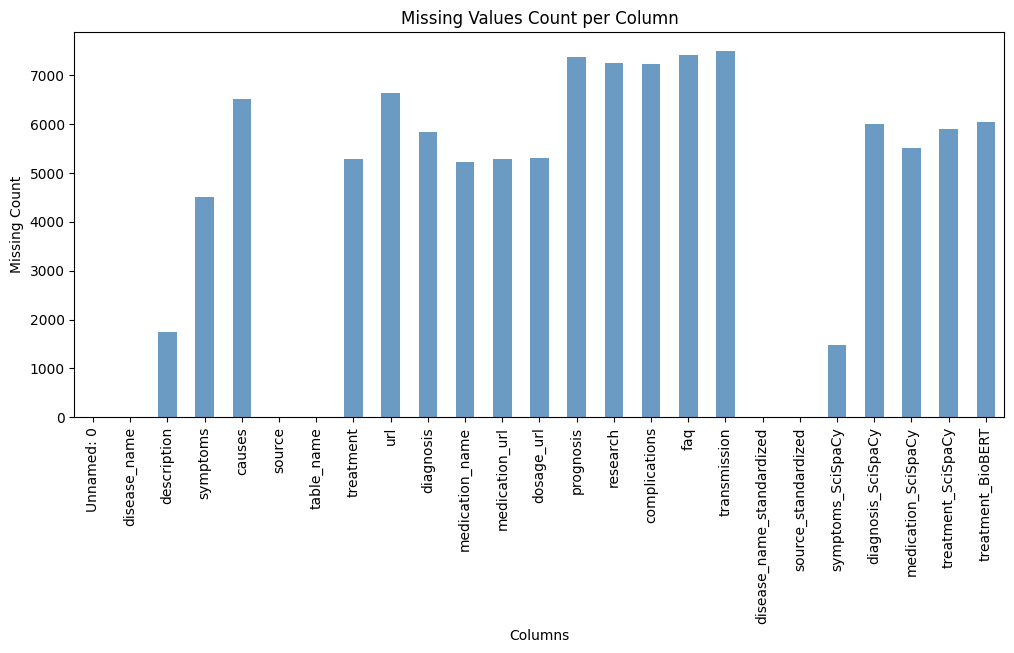

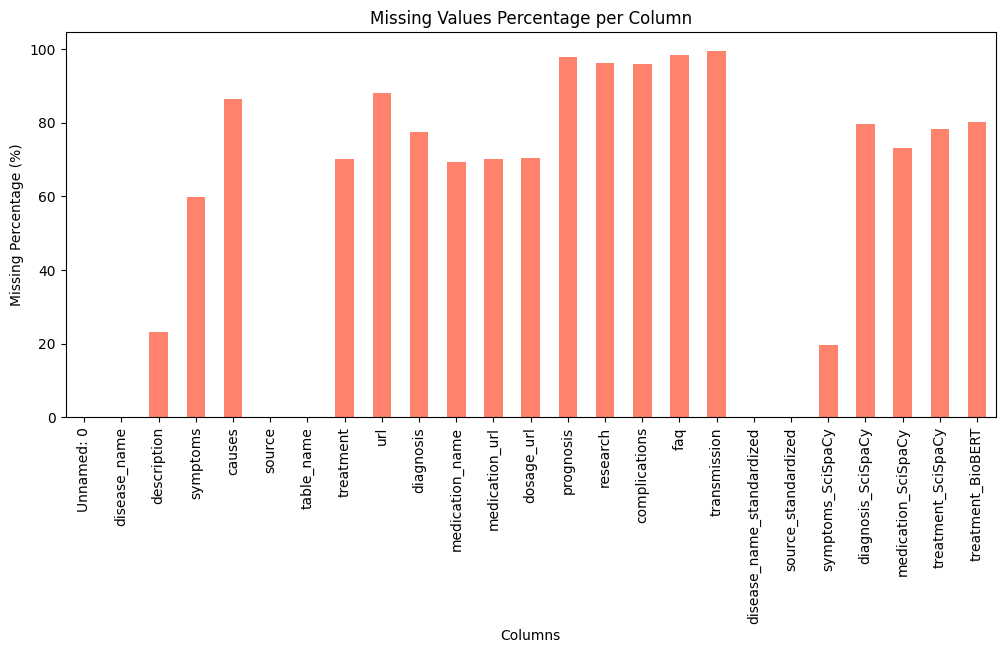

In [14]:
#@title count missing value
import matplotlib.pyplot as plt


# Function to count missing values (NaN + empty/whitespace strings)
def count_custom_missing(series):
    return (series.isna() | (series.astype(str).str.strip() == "")).sum()

# Compute missing count and percentage for each column
missing_counts = df1.apply(count_custom_missing)
missing_percentages = (missing_counts / len(df1)) * 100

# Create a DataFrame for visualization
missing_summary = pd.DataFrame({
    "Missing Count": missing_counts,
    "Missing Percentage": missing_percentages
}).sort_values(by="Missing Count", ascending=False)

# Plot missing count
plt.figure(figsize=(12, 5))
missing_counts.plot(kind="bar", color="steelblue", alpha=0.8)
plt.xlabel("Columns")
plt.ylabel("Missing Count")
plt.title("Missing Values Count per Column")
plt.xticks(rotation=90)
plt.show()

# Plot missing percentage
plt.figure(figsize=(12, 5))
missing_percentages.plot(kind="bar", color="tomato", alpha=0.8)
plt.xlabel("Columns")
plt.ylabel("Missing Percentage (%)")
plt.title("Missing Values Percentage per Column")
plt.xticks(rotation=90)
plt.show()


In [17]:
len(df1['disease_name'].unique())

6449

### Code ends here

In [ ]:
#@title temp
def clean_text1(df):
  ############Standardize names in 'Disease name'###########

  disease_mapping = {
      # --- Infectious Diseases ---
      'anthrax (bacillus anthracis)': 'anthrax',  # Bacterial infection
      'anthrax blood test': 'anthrax',
      'anthrax, cutaneous': 'anthrax',
      'anthrax, inhalation': 'anthrax',
      'anthrax, skin': 'anthrax',
      'cutaneous anthrax': 'anthrax',
      'inhalation anthrax': 'anthrax',
      'tuberculosis meningitis': 'tuberculosis',  # Mycobacterial infection
      'tuberculosis (tb)': 'tuberculosis',
      'tuberculosis, active': 'tuberculosis',
      'tuberculosis, resistant': 'tuberculosis',
      'crimean–congo hemorrhagic fever': 'viral hemorrhagic fever',  # Viral infection
      'legionella pneumonia': "legionnaires' disease",  # Bacterial respiratory infection
      'trypanosomiasis': 'sleeping sickness',  # Parasitic infection
      'ear infection, acute outer': 'otitis externa',  # ENT infection
      'hepatitis c in children': 'hepatitis c',  # Viral liver infection
      'chronic hepatitis b': 'hepatitis b',
      'vaginal candidiasis': 'candidiasis',  # Fungal infection
      'tetanus prophylaxis': 'tetanus prevention',
      'pneumonia, cytomegalovirus': 'cytomegalovirus pneumonia',
      'pneumonic plague': 'plague',
      'bourbon virus disease': 'viral hemorrhagic fever',
      'chikungunya': 'chikungunya virus',
      'covid-19': 'SARS-CoV-2 infection',
      'schistosomiasis (snail fever)': 'schistosomiasis',
      'dracunculiasis': 'guinea worm disease',
      'campylobacter gastroenteritis': 'campylobacter infection',
      'influenza with pneumonia': 'influenza-associated pneumonia',
      'bacterial eye infection': 'bacterial conjunctivitis',
      'viral infection': 'viral illness',
      'congenital zika virus': 'zika virus',
      'zika': 'zika virus',
      'zika disease': 'zika virus',
      'zika fever': 'zika virus',
      'zika virus': 'zika virus',
      'zika virus (zika fever)': 'zika virus',
      'zika virus disease': 'zika virus',
      'zika virus in adolescents': 'zika virus',
      'zika virus in children': 'zika virus',
      'zika virus infection': 'zika virus',

      # --- Cardiovascular & Blood Disorders ---
      'cardiomyopathy, alcoholic': 'alcoholic cardiomyopathy',
      'thrombocytosis': 'elevated platelet count',
      'safe use of antiplatelet medication': 'antiplatelet therapy management',

      # --- Neurological & Mental Health Disorders ---
      'obsessive compulsive neurosis': 'obsessive-compulsive disorder (OCD)',
      'persistent depressive disorder': 'dysthymia',
      'huntingtons disease': 'huntingtons disease',
      'brain metastasis': 'metastatic brain tumor',

      # --- Cancers & Related Conditions ---
      'bladder cancer': 'urothelial carcinoma',
      'cancer, renal': 'renal cell carcinoma',
      'surgery for pancreatic cancer': 'pancreatic cancer treatment',
      'folfirinox chemo regimen': 'pancreatic cancer chemotherapy',

      # --- Gastrointestinal & Endocrine Disorders ---
      'acute intermittent porphyria': 'porphyria',
      'biliary cholangitis': 'primary biliary cholangitis',
      'esophageal disorder': 'esophageal motility disorder',
      'acute diarrhea': 'gastroenteritis',
      'dka (diabetic ketoacidosis)': 'diabetic ketoacidosis',

      # --- Respiratory Diseases ---
      'upper respiratory infection (uri)': 'upper respiratory tract infection',
      'copd (chronic obstructive pulmonary disease)': 'chronic obstructive pulmonary disease',

      # --- Musculoskeletal & Joint Conditions ---
      'acromioclavicular joint reconstruction': 'shoulder joint surgery',
      'hip impingement': 'femoroacetabular impingement',
      'lumbar nerve root injection': 'lumbar epidural steroid injection',
      'knee sprain in children': 'pediatric knee sprain',
      'flatfoot in children': 'pediatric flatfoot',

      # --- Dermatological & Skin Conditions ---
      'erythrodermic psoriasis': 'severe psoriasis',
      'fungal infection, feet': 'athletes foot',
      'familial cold urticaria': 'cold induced urticaria',
      'minor burns': 'first-degree burn',

      # --- Surgical & Procedural Terms ---
      'tunneled central lines': 'central venous catheter',
      'incision and drainage': 'minor surgical procedure',
      'brow lift': 'forehead lift surgery',

      # --- Other Conditions ---
      'dissolution of dermal filler': 'cosmetic procedure complication',
      'growth retardation': 'failure to thrive',
      'fluid retention': 'edema',
      'thumb sucking': 'pediatric habit disorder',
      'bags under eyes': 'periorbital puffiness',
      'eyestrain': 'asthenopia',
      'droopy eyelid': 'ptosis',
      'p.r.i.c.e. treatment': 'injury management therapy',
      'primitive neuroectodermal tumors': 'PNET',
      'precocious puberty': 'early puberty',
  }


  # Apply mapping to standardize disease names
  df['disease_name_standardized'] = df['disease_name'].replace(disease_mapping)


  ################Standardize names in 'source'#################
  df['source_standardized'] = np.where(df['source'].isin(['https://www.cdc.gov', 'CDC-gov','https://wwwnc.cdc.gov','https://www.cdc.gov/malaria/index.html']),
                          'https://www.cdc.gov/',
                          np.where(df['source'] == 'drugs-com',
                                  'https://www.drugs.com/',
                              np.where(df['source'] == 'ncdc-gov',
                                  'https://ncdc.gov.ng',
                                np.where(df['source'] == 'Cleveland',
                                  'https://my.clevelandclinic.org/health/diseases?dFR[type][0]=diseases',
                                    np.where(df['source'] == 'mayo-clinic',
                                  'https://www.mayoclinic.org/diseases-conditions',
                                  df['source'])))))


  #########Other data cleaning:Convert to lowercase, Remove punctuation, Remove numbers, and Remove extra spaces########

  def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(f"[{string.punctuation}]", "", text)  # Remove punctuationw
    text = re.sub(r"\d+", "", text)  # Remove numbers
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text).strip()
    return text




  # Select all text columns
  text_columns = ['description', 'symptoms', 'causes', 'treatment',  'diagnosis',
                  'medication_name', 'prognosis','research', 'complications', 'faq', 'transmission']
  df[text_columns] = df[text_columns].astype(str).fillna('')
  df[text_columns] = df[text_columns].applymap(clean_text) #apply clean_text function to Convert to lowercase, Remove punctuation, Remove numbers, and Remove extra spaces


  ### Delete disease name containing vaccine|prophylaxis|prevention and Delete duplicates according to disease_name_standardized, symptoms and source

  df = df[~df["disease_name"].str.contains('vaccine|prophylaxis|prevention', case=False, na=False, regex=True)].groupby(['disease_name_standardized', 'source'], group_keys=False).apply(
      lambda group: group.loc[group['symptoms'].str.len().idxmax()] if group['symptoms'].notna().any() else group.iloc[0]
  ).reset_index(drop=True)


  #########Extract Medical Entities using SciSpaCy#######

  # Define stopwords to remove
  STOPWORDS = {"as", "the", "a", "an", "of", "for", "on", "with", "and"}  # Add more if needed

  nlp = spacy.load("en_ner_bc5cdr_md")
  # Function to extract specific medical entities
  def extract_entities(text, entity_type):
      if pd.isna(text) :  # Handle missing values
          return ""

      doc = nlp(text)
      # Extract unique entities and remove stopwords
      entities = set(ent.text.lower() for ent in doc.ents if ent.label_ in entity_type and ent.text.lower() not in STOPWORDS)
      return ", ".join(entities) if entities else ""

  # Apply entity extraction to each column with the specified entity type
  df["symptoms_SciSpaCy"] = df["symptoms"].apply(lambda x: extract_entities(x, "DISEASE"))
  df["diagnosis_SciSpaCy"] = df["diagnosis"].apply(lambda x: extract_entities(x, "DISEASE"))
  df["medication_SciSpaCy"] = df["medication_name"].apply(lambda x: extract_entities(x, "CHEMICAL"))
  df["treatment_SciSpaCy"] = df["treatment"].apply(lambda x: extract_entities(x, {"TREATMENT", "CHEMICAL"}))



  #########Extract Medical Entities using bioBert#############

  # ✅ Use a fine-tuned BioBERT model trained on the BC5CDR dataset (for drug NER)
  model_name = "alvaroalon2/biobert_chemical_ner"

  # Load tokenizer and model
  tokenizer = AutoTokenizer.from_pretrained(model_name)
  model = AutoModelForTokenClassification.from_pretrained(model_name)

  # Create a Named Entity Recognition (NER) pipeline
  nlp_ner = pipeline("ner", model=model, tokenizer=tokenizer, aggregation_strategy="simple")

  # Function to extract named entities
  def extract_entities(text):
      if isinstance(text, str):  # Ensure text is a string
          ner_results = nlp_ner(text)

          # Extract unique entities and remove stopwords
          entities = set(entity['word'].lower() for entity in ner_results if entity['word'].lower() not in STOPWORDS)
          return list(entities) if entities else None  # Convert back to list for easy processing
      return None

  # Apply function to each row in 'Treatment' column to get drug name
  df["treatment_BioBERT"] = df["treatment"].apply(extract_entities)



  return df


